In [14]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import random
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [15]:
np.random.seed(500)
Corpus = pd.read_csv(r"../input_data/drinking/labelled_drinking.csv",encoding='latin-1', skiprows=[227225])
Corpus = Corpus.rename({'alcohol_report_content':'text', 'alcohol_answer_label': 'label'}, axis=1)
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
Corpus.drop_duplicates(inplace=True)
Corpus['text'] = Corpus['text'].astype(str)

In [16]:
# Preprocessing
stemmer = SnowballStemmer("dutch")
Corpus['text'] = Corpus['text'].str.lower()
Corpus['text'] = [stemmer.stem(text) for text in Corpus['text']]
#Corpus['label'] = Corpus['label'].str.replace('Niets gevonden','Nee')
Corpus = Corpus.drop(Corpus[Corpus.label == 'Onbekend'].index)
Corpus_backup = Corpus.copy()

In [17]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [19]:
Corpus['label'].value_counts()

Niets gevonden    87941
Nee               39119
Ja                16107
Name: label, dtype: int64

# Multinomial Naive Bayes

In [20]:
class_priors = [list(item) for item in list(np.random.dirichlet(np.ones(3), size=5))]
parameter_grid = {
                  'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'clf__fit_prior': [True, False],
                  'clf__class_prior': random.sample(class_priors, k=len(class_priors)),
                  'tfidf__max_df': [0.90, 0.95],
                  'tfidf__min_df': [3, 5]
                 }

# Only negation stopwords kept

In [21]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.733 total time=  17.5s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.735 total time=  17.3s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.735 total time=  17.3s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.739 total time=  17.7s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=True, tfi

[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.5044712622283293, 0.02716256471869224, 0.46836617305297856], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.725 total time=  26.2s
[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.5044712622283293, 0.02716256471869224, 0.46836617305297856], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.729 total time=  27.8s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.5044712622283293, 0.02716256471869224, 0.46836617305297856], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.729 total time=  23.5s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.5044712622283293, 0.02716256471869224, 0.46836617305297856], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.729 total time=  24.8s
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.4551558879294493, 0.26733139642163795, 0.2775127156489128], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.734 total time=  

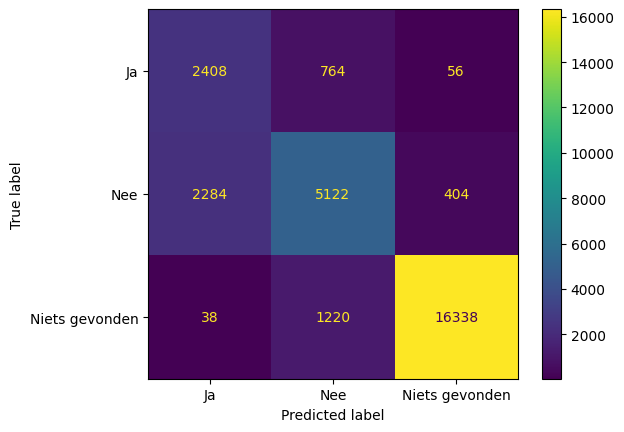

                precision    recall  f1-score   support

            Ja       0.51      0.75      0.61      3228
           Nee       0.72      0.66      0.69      7810
Niets gevonden       0.97      0.93      0.95     17596

      accuracy                           0.83     28634
     macro avg       0.73      0.78      0.75     28634
  weighted avg       0.85      0.83      0.84     28634



In [22]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Stochastic Gradient Descent

In [23]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [24]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

# Stopwords kept

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.09, NNZs: 364, Bias: 0.000000, T: 68719, Avg. loss: 0.185356
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 148.56, NNZs: 157, Bias: 0.000000, T: 137438, Avg. loss: 0.131385
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 178.99, NNZs: 131, Bias: 0.000000, T: 206157, Avg. loss: 0.118080
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 204.42, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.110128
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 226.75, NNZs: 103, Bias: 0.000000, T: 343595, Avg. loss: 0.104627
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 246.81, NNZs: 94, Bias: 0.000000, T: 412314, Avg. loss: 0.100543
Total training time: 3.45 seconds.
-- Epoch 7
Norm: 250.42, NNZs: 94, Bias: 0.000000, T: 481033, Avg. loss: 0.098262
Total training time: 4.05 seconds.
-- Epoch 8
Norm: 253.96, NNZs: 94, Bias: 0.000000, T: 549752, Avg. loss: 0.097620
Total training time: 4.71 seconds.
-- Epoch 9
Norm: 257.47, NNZs: 93, Bias: 0.000000, T: 618471

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


Norm: 128.42, NNZs: 468, Bias: 0.000000, T: 68719, Avg. loss: 0.255780
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 177.24, NNZs: 188, Bias: 0.000000, T: 137438, Avg. loss: 0.172623
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 213.54, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.150036
Total training time: 1.90 seconds.
-- Epoch 4
Norm: 243.66, NNZs: 126, Bias: 0.000000, T: 274876, Avg. loss: 0.137239
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 269.67, NNZs: 118, Bias: 0.000000, T: 343595, Avg. loss: 0.128780
Total training time: 3.19 seconds.
-- Epoch 6
Norm: 292.94, NNZs: 109, Bias: 0.000000, T: 412314, Avg. loss: 0.122891
Total training time: 3.63 seconds.
-- Epoch 7
Norm: 297.12, NNZs: 110, Bias: 0.000000, T: 481033, Avg. loss: 0.119832
Total training time: 4.16 seconds.
-- Epoch 8
Norm: 301.24, NNZs: 109, Bias: 0.000000, T: 549752, Avg. loss: 0.119008
Total training time: 4.66 seconds.
-- Epoch 9
Norm: 305.28, NNZs: 106, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.7s remaining:    0.0s


Norm: 121.39, NNZs: 465, Bias: 0.000000, T: 68719, Avg. loss: 0.186476
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 165.38, NNZs: 199, Bias: 0.000000, T: 137438, Avg. loss: 0.127711
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 198.80, NNZs: 161, Bias: 0.000000, T: 206157, Avg. loss: 0.111838
Total training time: 1.80 seconds.
-- Epoch 4
Norm: 226.89, NNZs: 143, Bias: 0.000000, T: 274876, Avg. loss: 0.102984
Total training time: 2.33 seconds.
-- Epoch 5
Norm: 251.34, NNZs: 126, Bias: 0.000000, T: 343595, Avg. loss: 0.096581
Total training time: 2.91 seconds.
-- Epoch 6
Norm: 273.23, NNZs: 114, Bias: 0.000000, T: 412314, Avg. loss: 0.092027
Total training time: 3.43 seconds.
-- Epoch 7
Norm: 277.23, NNZs: 111, Bias: 0.000000, T: 481033, Avg. loss: 0.089790
Total training time: 3.95 seconds.
-- Epoch 8
Norm: 281.16, NNZs: 108, Bias: 0.000000, T: 549752, Avg. loss: 0.089062
Total training time: 4.56 seconds.
-- Epoch 9
Norm: 285.02, NNZs: 107, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.151 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.30, NNZs: 369, Bias: 0.000000, T: 68719, Avg. loss: 0.187453
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 148.86, NNZs: 155, Bias: 0.000000, T: 137438, Avg. loss: 0.133513
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 179.52, NNZs: 133, Bias: 0.000000, T: 206157, Avg. loss: 0.119311
Total training time: 2.12 seconds.
-- Epoch 4
Norm: 205.08, NNZs: 116, Bias: 0.000000, T: 274876, Avg. loss: 0.111411
Total training time: 2.73 seconds.
-- Epoch 5
Norm: 227.45, NNZs: 103, Bias: 0.000000, T: 343595, Avg. loss: 0.105794
Total training time: 3.40 seconds.
-- Epoch 6
Norm: 247.66, NNZs: 95, Bias: 0.000000, T: 412314, Avg. loss: 0.101463
Total training time: 4.01 seconds.
-- Epoch 7
Norm: 251.30, NNZs: 95, Bias: 0.000000, T: 481033, Avg. loss: 0.099212
Total training time: 4.61 seconds.
-- Epoch 8
Norm: 254.90, NNZs: 95, Bias: 0.000000, T: 549752, Avg. loss: 0.098522
Total training time: 5.44 seconds.
-- Epoch 9
Norm: 258.41, NNZs: 95, Bias: 0.000000, T: 618471

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


Norm: 128.17, NNZs: 429, Bias: 0.000000, T: 68719, Avg. loss: 0.256395
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 177.06, NNZs: 181, Bias: 0.000000, T: 137438, Avg. loss: 0.173575
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 213.40, NNZs: 143, Bias: 0.000000, T: 206157, Avg. loss: 0.151058
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 243.56, NNZs: 130, Bias: 0.000000, T: 274876, Avg. loss: 0.138477
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 269.61, NNZs: 122, Bias: 0.000000, T: 343595, Avg. loss: 0.129902
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 292.97, NNZs: 113, Bias: 0.000000, T: 412314, Avg. loss: 0.124042
Total training time: 3.84 seconds.
-- Epoch 7
Norm: 297.14, NNZs: 112, Bias: 0.000000, T: 481033, Avg. loss: 0.120776
Total training time: 4.55 seconds.
-- Epoch 8
Norm: 301.24, NNZs: 110, Bias: 0.000000, T: 549752, Avg. loss: 0.120022
Total training time: 5.20 seconds.
-- Epoch 9
Norm: 305.29, NNZs: 109, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.6s remaining:    0.0s


Norm: 121.30, NNZs: 478, Bias: 0.000000, T: 68719, Avg. loss: 0.186953
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 165.15, NNZs: 205, Bias: 0.000000, T: 137438, Avg. loss: 0.128329
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 198.67, NNZs: 167, Bias: 0.000000, T: 206157, Avg. loss: 0.113122
Total training time: 2.10 seconds.
-- Epoch 4
Norm: 226.69, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.103891
Total training time: 2.65 seconds.
-- Epoch 5
Norm: 251.13, NNZs: 127, Bias: 0.000000, T: 343595, Avg. loss: 0.097750
Total training time: 3.24 seconds.
-- Epoch 6
Norm: 273.07, NNZs: 109, Bias: 0.000000, T: 412314, Avg. loss: 0.093270
Total training time: 3.86 seconds.
-- Epoch 7
Norm: 277.04, NNZs: 108, Bias: 0.000000, T: 481033, Avg. loss: 0.090542
Total training time: 4.47 seconds.
-- Epoch 8
Norm: 280.95, NNZs: 106, Bias: 0.000000, T: 549752, Avg. loss: 0.089855
Total training time: 4.97 seconds.
-- Epoch 9
Norm: 284.80, NNZs: 104, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.139 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.31, NNZs: 340, Bias: 0.000000, T: 68719, Avg. loss: 0.186155
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 148.70, NNZs: 157, Bias: 0.000000, T: 137438, Avg. loss: 0.132376
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 179.04, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.118900
Total training time: 1.82 seconds.
-- Epoch 4
Norm: 204.62, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.110827
Total training time: 2.41 seconds.
-- Epoch 5
Norm: 227.06, NNZs: 110, Bias: 0.000000, T: 343595, Avg. loss: 0.105334
Total training time: 3.02 seconds.
-- Epoch 6
Norm: 247.21, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.101212
Total training time: 3.65 seconds.
-- Epoch 7
Norm: 250.87, NNZs: 99, Bias: 0.000000, T: 481033, Avg. loss: 0.099031
Total training time: 4.19 seconds.
-- Epoch 8
Norm: 254.42, NNZs: 100, Bias: 0.000000, T: 549752, Avg. loss: 0.098301
Total training time: 4.78 seconds.
-- Epoch 9
Norm: 257.92, NNZs: 98, Bias: 0.000000, T: 61847

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


Norm: 128.52, NNZs: 466, Bias: 0.000000, T: 68719, Avg. loss: 0.256717
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 177.62, NNZs: 185, Bias: 0.000000, T: 137438, Avg. loss: 0.172890
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 214.08, NNZs: 149, Bias: 0.000000, T: 206157, Avg. loss: 0.150261
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 244.15, NNZs: 133, Bias: 0.000000, T: 274876, Avg. loss: 0.137665
Total training time: 2.45 seconds.
-- Epoch 5
Norm: 270.24, NNZs: 120, Bias: 0.000000, T: 343595, Avg. loss: 0.129422
Total training time: 3.00 seconds.
-- Epoch 6
Norm: 293.59, NNZs: 114, Bias: 0.000000, T: 412314, Avg. loss: 0.123611
Total training time: 3.68 seconds.
-- Epoch 7
Norm: 297.78, NNZs: 113, Bias: 0.000000, T: 481033, Avg. loss: 0.120417
Total training time: 4.35 seconds.
-- Epoch 8
Norm: 301.90, NNZs: 112, Bias: 0.000000, T: 549752, Avg. loss: 0.119663
Total training time: 4.96 seconds.
-- Epoch 9
Norm: 305.95, NNZs: 111, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.3s remaining:    0.0s


Norm: 121.61, NNZs: 470, Bias: 0.000000, T: 68719, Avg. loss: 0.187746
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 165.83, NNZs: 198, Bias: 0.000000, T: 137438, Avg. loss: 0.128656
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 199.35, NNZs: 165, Bias: 0.000000, T: 206157, Avg. loss: 0.112656
Total training time: 2.12 seconds.
-- Epoch 4
Norm: 227.46, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.103730
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 251.99, NNZs: 125, Bias: 0.000000, T: 343595, Avg. loss: 0.097622
Total training time: 3.37 seconds.
-- Epoch 6
Norm: 274.02, NNZs: 117, Bias: 0.000000, T: 412314, Avg. loss: 0.093034
Total training time: 3.91 seconds.
-- Epoch 7
Norm: 278.02, NNZs: 115, Bias: 0.000000, T: 481033, Avg. loss: 0.090517
Total training time: 4.51 seconds.
-- Epoch 8
Norm: 281.95, NNZs: 112, Bias: 0.000000, T: 549752, Avg. loss: 0.089892
Total training time: 5.14 seconds.
-- Epoch 9
Norm: 285.82, NNZs: 110, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.144 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.19, NNZs: 373, Bias: 0.000000, T: 68720, Avg. loss: 0.186681
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 148.91, NNZs: 160, Bias: 0.000000, T: 137440, Avg. loss: 0.132650
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 179.43, NNZs: 133, Bias: 0.000000, T: 206160, Avg. loss: 0.118732
Total training time: 2.20 seconds.
-- Epoch 4
Norm: 205.04, NNZs: 120, Bias: 0.000000, T: 274880, Avg. loss: 0.110634
Total training time: 2.91 seconds.
-- Epoch 5
Norm: 227.44, NNZs: 106, Bias: 0.000000, T: 343600, Avg. loss: 0.105000
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 247.64, NNZs: 96, Bias: 0.000000, T: 412320, Avg. loss: 0.100786
Total training time: 4.10 seconds.
-- Epoch 7
Norm: 251.26, NNZs: 96, Bias: 0.000000, T: 481040, Avg. loss: 0.098564
Total training time: 4.70 seconds.
-- Epoch 8
Norm: 254.81, NNZs: 95, Bias: 0.000000, T: 549760, Avg. loss: 0.097919
Total training time: 5.37 seconds.
-- Epoch 9
Norm: 258.32, NNZs: 95, Bias: 0.000000, T: 618480

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


Norm: 128.38, NNZs: 445, Bias: 0.000000, T: 68720, Avg. loss: 0.257963
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 177.34, NNZs: 189, Bias: 0.000000, T: 137440, Avg. loss: 0.174389
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 213.80, NNZs: 146, Bias: 0.000000, T: 206160, Avg. loss: 0.151653
Total training time: 1.93 seconds.
-- Epoch 4
Norm: 243.86, NNZs: 128, Bias: 0.000000, T: 274880, Avg. loss: 0.138527
Total training time: 2.42 seconds.
-- Epoch 5
Norm: 269.96, NNZs: 119, Bias: 0.000000, T: 343600, Avg. loss: 0.130302
Total training time: 3.10 seconds.
-- Epoch 6
Norm: 293.31, NNZs: 112, Bias: 0.000000, T: 412320, Avg. loss: 0.124284
Total training time: 3.81 seconds.
-- Epoch 7
Norm: 297.50, NNZs: 111, Bias: 0.000000, T: 481040, Avg. loss: 0.121211
Total training time: 4.49 seconds.
-- Epoch 8
Norm: 301.62, NNZs: 108, Bias: 0.000000, T: 549760, Avg. loss: 0.120411
Total training time: 5.17 seconds.
-- Epoch 9
Norm: 305.68, NNZs: 108, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.4s remaining:    0.0s


Norm: 121.29, NNZs: 443, Bias: 0.000000, T: 68720, Avg. loss: 0.187252
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 165.54, NNZs: 197, Bias: 0.000000, T: 137440, Avg. loss: 0.128676
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 199.03, NNZs: 166, Bias: 0.000000, T: 206160, Avg. loss: 0.112646
Total training time: 1.93 seconds.
-- Epoch 4
Norm: 227.17, NNZs: 146, Bias: 0.000000, T: 274880, Avg. loss: 0.103858
Total training time: 2.69 seconds.
-- Epoch 5
Norm: 251.67, NNZs: 129, Bias: 0.000000, T: 343600, Avg. loss: 0.097584
Total training time: 3.33 seconds.
-- Epoch 6
Norm: 273.61, NNZs: 113, Bias: 0.000000, T: 412320, Avg. loss: 0.093021
Total training time: 3.89 seconds.
-- Epoch 7
Norm: 277.60, NNZs: 111, Bias: 0.000000, T: 481040, Avg. loss: 0.090609
Total training time: 4.38 seconds.
-- Epoch 8
Norm: 281.53, NNZs: 107, Bias: 0.000000, T: 549760, Avg. loss: 0.089991
Total training time: 5.03 seconds.
-- Epoch 9
Norm: 285.40, NNZs: 106, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.146 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.24, NNZs: 358, Bias: 0.000000, T: 68720, Avg. loss: 0.187332
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 148.77, NNZs: 159, Bias: 0.000000, T: 137440, Avg. loss: 0.133559
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 179.29, NNZs: 134, Bias: 0.000000, T: 206160, Avg. loss: 0.119632
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 204.85, NNZs: 116, Bias: 0.000000, T: 274880, Avg. loss: 0.111803
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 227.38, NNZs: 103, Bias: 0.000000, T: 343600, Avg. loss: 0.106112
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 247.53, NNZs: 94, Bias: 0.000000, T: 412320, Avg. loss: 0.101598
Total training time: 2.98 seconds.
-- Epoch 7
Norm: 251.11, NNZs: 93, Bias: 0.000000, T: 481040, Avg. loss: 0.099302
Total training time: 3.51 seconds.
-- Epoch 8
Norm: 254.68, NNZs: 92, Bias: 0.000000, T: 549760, Avg. loss: 0.098804
Total training time: 4.06 seconds.
-- Epoch 9
Norm: 258.18, NNZs: 92, Bias: 0.000000, T: 618480

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


Norm: 128.41, NNZs: 485, Bias: 0.000000, T: 68720, Avg. loss: 0.256236
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 177.39, NNZs: 188, Bias: 0.000000, T: 137440, Avg. loss: 0.173374
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 213.78, NNZs: 151, Bias: 0.000000, T: 206160, Avg. loss: 0.150957
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 243.90, NNZs: 130, Bias: 0.000000, T: 274880, Avg. loss: 0.138218
Total training time: 1.97 seconds.
-- Epoch 5
Norm: 269.97, NNZs: 120, Bias: 0.000000, T: 343600, Avg. loss: 0.129799
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 293.30, NNZs: 113, Bias: 0.000000, T: 412320, Avg. loss: 0.123695
Total training time: 2.96 seconds.
-- Epoch 7
Norm: 297.50, NNZs: 112, Bias: 0.000000, T: 481040, Avg. loss: 0.120723
Total training time: 3.41 seconds.
-- Epoch 8
Norm: 301.63, NNZs: 112, Bias: 0.000000, T: 549760, Avg. loss: 0.119804
Total training time: 3.85 seconds.
-- Epoch 9
Norm: 305.69, NNZs: 112, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s


Norm: 121.49, NNZs: 512, Bias: 0.000000, T: 68720, Avg. loss: 0.186998
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 165.55, NNZs: 197, Bias: 0.000000, T: 137440, Avg. loss: 0.128388
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 199.13, NNZs: 166, Bias: 0.000000, T: 206160, Avg. loss: 0.112390
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 227.24, NNZs: 143, Bias: 0.000000, T: 274880, Avg. loss: 0.103600
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 251.71, NNZs: 130, Bias: 0.000000, T: 343600, Avg. loss: 0.097255
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 273.66, NNZs: 115, Bias: 0.000000, T: 412320, Avg. loss: 0.092592
Total training time: 2.87 seconds.
-- Epoch 7
Norm: 277.67, NNZs: 112, Bias: 0.000000, T: 481040, Avg. loss: 0.090381
Total training time: 3.34 seconds.
-- Epoch 8
Norm: 281.60, NNZs: 108, Bias: 0.000000, T: 549760, Avg. loss: 0.089617
Total training time: 3.81 seconds.
-- Epoch 9
Norm: 285.47, NNZs: 105, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.146 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 134811745412583.30, NNZs: 430264, Bias: 0.000000, T: 68719, Avg. loss: 175745931954155115511808.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 127832292579218.61, NNZs: 430264, Bias: 0.000000, T: 137438, Avg. loss: 158812780449171056361472.000000
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 124268994185696.83, NNZs: 430264, Bias: 0.000000, T: 206157, Avg. loss: 133418789713436427157504.000000
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 121916966424927.23, NNZs: 430264, Bias: 0.000000, T: 274876, Avg. loss: 121508896551434612375552.000000
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 120175966179277.73, NNZs: 430264, Bias: 0.000000, T: 343595, Avg. loss: 114146082150077618454528.000000
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 118806101914736.69, NNZs: 430264, Bias: 0.000000, T: 412314, Avg. loss: 108851547782467979051008.000000
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 120757910318273.14, NNZs: 430263, Bias: 0.000000, T: 68719, Avg. loss: 137832713733549385056256.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 114052411331192.95, NNZs: 430264, Bias: 0.000000, T: 137438, Avg. loss: 127180917590421726560256.000000
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 110637757473532.50, NNZs: 430264, Bias: 0.000000, T: 206157, Avg. loss: 105826832252554757275648.000000
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 108377719641785.33, NNZs: 430264, Bias: 0.000000, T: 274876, Avg. loss: 95952060665598350196736.000000
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 106709611498664.62, NNZs: 430264, Bias: 0.000000, T: 343595, Avg. loss: 89807014116338757009408.000000
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 105393694005101.41, NNZs: 430264, Bias: 0.000000, T: 412314, Avg. loss: 85488603479741214752768.000000
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


Norm: 123219278834246.31, NNZs: 430264, Bias: 0.000000, T: 68719, Avg. loss: 145458189247972082974720.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 116463532873901.73, NNZs: 430264, Bias: 0.000000, T: 137438, Avg. loss: 131952517409848854315008.000000
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 113017886570896.11, NNZs: 430264, Bias: 0.000000, T: 206157, Avg. loss: 110021385985759444467712.000000
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 110749268761564.97, NNZs: 430264, Bias: 0.000000, T: 274876, Avg. loss: 99776957977970411044864.000000
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 109070233200427.45, NNZs: 430264, Bias: 0.000000, T: 343595, Avg. loss: 93454015878629829902336.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 107745147805109.44, NNZs: 430264, Bias: 0.000000, T: 412314, Avg. loss: 88969322010747766571008.000000
Total training time: 2.46 seconds.
Convergence after 6 epochs took 2.50 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.302 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132690374455504.73, NNZs: 430406, Bias: 0.000000, T: 68719, Avg. loss: 172357173142061376864256.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 125616821899432.34, NNZs: 430407, Bias: 0.000000, T: 137438, Avg. loss: 155940265696297522036736.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 122013373802283.70, NNZs: 430407, Bias: 0.000000, T: 206157, Avg. loss: 130160721653029983485952.000000
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 119639491550930.69, NNZs: 430407, Bias: 0.000000, T: 274876, Avg. loss: 118245896614049289863168.000000
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 117887261168890.55, NNZs: 430407, Bias: 0.000000, T: 343595, Avg. loss: 110840301925974593765376.000000
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 116506421977761.22, NNZs: 430407, Bias: 0.000000, T: 412314, Avg. loss: 105654827115908310237184.000000
Total training time: 2.46 seconds.
Convergence after 6 epochs took 2.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 130603102490114.23, NNZs: 430407, Bias: 0.000000, T: 68719, Avg. loss: 163449329358987805589504.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 123639812879699.30, NNZs: 430407, Bias: 0.000000, T: 137438, Avg. loss: 149741788687601470799872.000000
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 120095823687778.17, NNZs: 430407, Bias: 0.000000, T: 206157, Avg. loss: 125170685772477304406016.000000
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 117757741832547.09, NNZs: 430407, Bias: 0.000000, T: 274876, Avg. loss: 113870326988568306647040.000000
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 116028872282255.06, NNZs: 430407, Bias: 0.000000, T: 343595, Avg. loss: 106810178847368951103488.000000
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 114666858970961.23, NNZs: 430407, Bias: 0.000000, T: 412314, Avg. loss: 101846555087243185225728.000000
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 125022965149859.08, NNZs: 430406, Bias: 0.000000, T: 68719, Avg. loss: 150615549988939294048256.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 118155553439166.23, NNZs: 430407, Bias: 0.000000, T: 137438, Avg. loss: 136466024689679579742208.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 114661988420932.19, NNZs: 430407, Bias: 0.000000, T: 206157, Avg. loss: 113648492392138428907520.000000
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 112359780125600.61, NNZs: 430407, Bias: 0.000000, T: 274876, Avg. loss: 103052884992933689819136.000000
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 110662099121184.64, NNZs: 430407, Bias: 0.000000, T: 343595, Avg. loss: 96553161110683121614848.000000
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 109323072790025.58, NNZs: 430407, Bias: 0.000000, T: 412314, Avg. loss: 91925557548526579220480.000000
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.51 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.303 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131899945373536.00, NNZs: 430377, Bias: 0.000000, T: 68719, Avg. loss: 172015831101585292787712.000000
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 124860692595791.36, NNZs: 430377, Bias: 0.000000, T: 137438, Avg. loss: 153931787892503858905088.000000
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 121268735593132.03, NNZs: 430377, Bias: 0.000000, T: 206157, Avg. loss: 128676409970661749948416.000000
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 118902096798750.58, NNZs: 430377, Bias: 0.000000, T: 274876, Avg. loss: 116958327357297351720960.000000
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 117157290633585.19, NNZs: 430377, Bias: 0.000000, T: 343595, Avg. loss: 109641715736759748263936.000000
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 115781583346556.03, NNZs: 430377, Bias: 0.000000, T: 412314, Avg. loss: 104498680469664189906944.000000
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 127674761260293.75, NNZs: 430376, Bias: 0.000000, T: 68719, Avg. loss: 153362053191406389821440.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 120778545526098.41, NNZs: 430377, Bias: 0.000000, T: 137438, Avg. loss: 143876023899005921525760.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 117263031574165.30, NNZs: 430377, Bias: 0.000000, T: 206157, Avg. loss: 120248779796776430338048.000000
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 114942901082950.91, NNZs: 430377, Bias: 0.000000, T: 274876, Avg. loss: 109245349461618749079552.000000
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 113224516703107.23, NNZs: 430377, Bias: 0.000000, T: 343595, Avg. loss: 102470054417851408711680.000000
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 111867808515226.86, NNZs: 430377, Bias: 0.000000, T: 412314, Avg. loss: 97698124603581477683200.000000
Total training time: 2.38 seconds.
Convergence after 6 epochs took 2.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 114711164873693.69, NNZs: 430377, Bias: 0.000000, T: 68719, Avg. loss: 123804674872480167362560.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 108193837552795.52, NNZs: 430377, Bias: 0.000000, T: 137438, Avg. loss: 113059091837248069435392.000000
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 104862232056447.33, NNZs: 430377, Bias: 0.000000, T: 206157, Avg. loss: 93871232798602020519936.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 102657861501001.98, NNZs: 430377, Bias: 0.000000, T: 274876, Avg. loss: 84972217782054598737920.000000
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 101030514434297.88, NNZs: 430377, Bias: 0.000000, T: 343595, Avg. loss: 79370022508328237662208.000000
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 99745972760891.44, NNZs: 430377, Bias: 0.000000, T: 412314, Avg. loss: 75515082699188998242304.000000
Total training time: 2.35 seconds.
Convergence after 6 epochs took 2.39 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.291 total time=  59.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 126159014029417.14, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 147871098301030934249472.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 119388138073593.73, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 139164969284129647493120.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 115920759733412.19, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 116517904077580272664576.000000
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 113626140397483.41, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 106005913871271359152128.000000
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 111928566094280.88, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 99442987030891152277504.000000
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 110590531089248.69, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 94826517722914059452416.000000
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 123851047206601.28, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 143829340395710120460288.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 117074871271241.75, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 133038021102186948198400.000000
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 113605939502804.47, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 111043738929819660845056.000000
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 111315272696857.33, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 100745946818579477299200.000000
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 109623065595857.61, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 94376869230251746525184.000000
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 108288151877824.56, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 89829241177145232850944.000000
Total training time: 2.28 seconds.
Convergence after 6 epochs took 2.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 137132057928169.20, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 178964472615605819670528.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 129971038731581.41, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 166718812257000645197824.000000
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 126335034750735.33, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 139996811189283306078208.000000
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 123938025045279.09, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 127549071205538346303488.000000
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 122164935611787.22, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 119816858349125855346688.000000
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 120771301653673.23, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 114322249132580320313344.000000
Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.33 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.298 total time=  59.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 129354086087387.09, NNZs: 430879, Bias: 0.000000, T: 68720, Avg. loss: 159038235198763831394304.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 122496476785828.48, NNZs: 430879, Bias: 0.000000, T: 137440, Avg. loss: 145591773021231485288448.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 118997981636785.53, NNZs: 430879, Bias: 0.000000, T: 206160, Avg. loss: 122011781064081581015040.000000
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 116687872852798.09, NNZs: 430879, Bias: 0.000000, T: 274880, Avg. loss: 110995460997224631107584.000000
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 114981924240629.06, NNZs: 430879, Bias: 0.000000, T: 343600, Avg. loss: 104208123484069076926464.000000
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 113635398727845.11, NNZs: 430879, Bias: 0.000000, T: 412320, Avg. loss: 99353965380993260978176.000000
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 134410117212267.88, NNZs: 430879, Bias: 0.000000, T: 68720, Avg. loss: 171302652561854897848320.000000
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 127437982515180.88, NNZs: 430879, Bias: 0.000000, T: 137440, Avg. loss: 158256501813708645728256.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 123880073539037.48, NNZs: 430879, Bias: 0.000000, T: 206160, Avg. loss: 133085654255353850757120.000000
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 121533077990060.66, NNZs: 430879, Bias: 0.000000, T: 274880, Avg. loss: 121233360764600735236096.000000
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 119797711448603.41, NNZs: 430879, Bias: 0.000000, T: 343600, Avg. loss: 113922248360661002223616.000000
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 118430188576930.64, NNZs: 430879, Bias: 0.000000, T: 412320, Avg. loss: 108754270422877540974592.000000
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 119195101339873.30, NNZs: 430878, Bias: 0.000000, T: 68720, Avg. loss: 134134768076021431271424.000000
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 112576879399936.00, NNZs: 430879, Bias: 0.000000, T: 137440, Avg. loss: 122239020864231371177984.000000
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 109200103311976.56, NNZs: 430879, Bias: 0.000000, T: 206160, Avg. loss: 101475663461730345811968.000000
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 106971570839831.00, NNZs: 430879, Bias: 0.000000, T: 274880, Avg. loss: 91972022509521019600896.000000
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 105326304128685.50, NNZs: 430879, Bias: 0.000000, T: 343600, Avg. loss: 86017110134547321716736.000000
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 104026646930644.14, NNZs: 430879, Bias: 0.000000, T: 412320, Avg. loss: 81908791723102344052736.000000
Total training time: 2.25 seconds.
Convergence after 6 epochs took 2.29 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.296 total time=  59.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 136.13, NNZs: 498, Bias: 0.000000, T: 68719, Avg. loss: 0.070532
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 175.59, NNZs: 204, Bias: 0.000000, T: 137438, Avg. loss: 0.037848
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 204.50, NNZs: 186, Bias: 0.000000, T: 206157, Avg. loss: 0.032617
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 228.36, NNZs: 171, Bias: 0.000000, T: 274876, Avg. loss: 0.030287
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 249.23, NNZs: 157, Bias: 0.000000, T: 343595, Avg. loss: 0.028572
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 267.95, NNZs: 151, Bias: 0.000000, T: 412314, Avg. loss: 0.027552
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 165.52, NNZs: 706, Bias: 0.000000, T: 68719, Avg. loss: 0.101007
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 211.00, NNZs: 220, Bias: 0.000000, T: 137438, Avg. loss: 0.051270
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 243.79, NNZs: 193, Bias: 0.000000, T: 206157, Avg. loss: 0.043006
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 270.74, NNZs: 181, Bias: 0.000000, T: 274876, Avg. loss: 0.039381
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 294.11, NNZs: 171, Bias: 0.000000, T: 343595, Avg. loss: 0.036837
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 315.17, NNZs: 159, Bias: 0.000000, T: 412314, Avg. loss: 0.035855
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 140.85, NNZs: 590, Bias: 0.000000, T: 68719, Avg. loss: 0.066638
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 180.86, NNZs: 194, Bias: 0.000000, T: 137438, Avg. loss: 0.034008
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 209.73, NNZs: 170, Bias: 0.000000, T: 206157, Avg. loss: 0.028158
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 233.32, NNZs: 157, Bias: 0.000000, T: 274876, Avg. loss: 0.025041
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 253.56, NNZs: 140, Bias: 0.000000, T: 343595, Avg. loss: 0.023026
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 271.58, NNZs: 132, Bias: 0.000000, T: 412314, Avg. loss: 0.021685
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 136.14, NNZs: 470, Bias: 0.000000, T: 68719, Avg. loss: 0.070229
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 175.32, NNZs: 200, Bias: 0.000000, T: 137438, Avg. loss: 0.037453
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 204.36, NNZs: 184, Bias: 0.000000, T: 206157, Avg. loss: 0.033240
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 228.38, NNZs: 169, Bias: 0.000000, T: 274876, Avg. loss: 0.030104
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 249.26, NNZs: 155, Bias: 0.000000, T: 343595, Avg. loss: 0.029270
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 268.17, NNZs: 152, Bias: 0.000000, T: 412314, Avg. loss: 0.027841
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 165.49, NNZs: 676, Bias: 0.000000, T: 68719, Avg. loss: 0.101283
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 211.26, NNZs: 223, Bias: 0.000000, T: 137438, Avg. loss: 0.051791
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 244.06, NNZs: 193, Bias: 0.000000, T: 206157, Avg. loss: 0.043191
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 270.89, NNZs: 180, Bias: 0.000000, T: 274876, Avg. loss: 0.039110
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 294.26, NNZs: 170, Bias: 0.000000, T: 343595, Avg. loss: 0.037038
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 315.30, NNZs: 163, Bias: 0.000000, T: 412314, Avg. loss: 0.035792
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 141.15, NNZs: 602, Bias: 0.000000, T: 68719, Avg. loss: 0.067427
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 181.36, NNZs: 202, Bias: 0.000000, T: 137438, Avg. loss: 0.034806
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 210.53, NNZs: 170, Bias: 0.000000, T: 206157, Avg. loss: 0.028791
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 234.14, NNZs: 149, Bias: 0.000000, T: 274876, Avg. loss: 0.025493
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 254.64, NNZs: 139, Bias: 0.000000, T: 343595, Avg. loss: 0.023522
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 272.80, NNZs: 138, Bias: 0.000000, T: 412314, Avg. loss: 0.022108
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 136.08, NNZs: 506, Bias: 0.000000, T: 68719, Avg. loss: 0.070556
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 175.47, NNZs: 204, Bias: 0.000000, T: 137438, Avg. loss: 0.037868
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 204.47, NNZs: 176, Bias: 0.000000, T: 206157, Avg. loss: 0.032942
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 228.35, NNZs: 169, Bias: 0.000000, T: 274876, Avg. loss: 0.030471
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 249.35, NNZs: 157, Bias: 0.000000, T: 343595, Avg. loss: 0.029104
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 268.14, NNZs: 148, Bias: 0.000000, T: 412314, Avg. loss: 0.028252
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 165.73, NNZs: 694, Bias: 0.000000, T: 68719, Avg. loss: 0.101655
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 211.31, NNZs: 217, Bias: 0.000000, T: 137438, Avg. loss: 0.051462
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 243.94, NNZs: 190, Bias: 0.000000, T: 206157, Avg. loss: 0.042668
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 270.90, NNZs: 178, Bias: 0.000000, T: 274876, Avg. loss: 0.039295
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 294.35, NNZs: 167, Bias: 0.000000, T: 343595, Avg. loss: 0.037152
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 315.41, NNZs: 161, Bias: 0.000000, T: 412314, Avg. loss: 0.035912
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 141.76, NNZs: 600, Bias: 0.000000, T: 68719, Avg. loss: 0.067608
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 182.10, NNZs: 202, Bias: 0.000000, T: 137438, Avg. loss: 0.034981
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 211.21, NNZs: 170, Bias: 0.000000, T: 206157, Avg. loss: 0.028821
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 234.92, NNZs: 158, Bias: 0.000000, T: 274876, Avg. loss: 0.025461
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 255.39, NNZs: 148, Bias: 0.000000, T: 343595, Avg. loss: 0.023549
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 273.55, NNZs: 140, Bias: 0.000000, T: 412314, Avg. loss: 0.022000
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.996 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 136.45, NNZs: 537, Bias: 0.000000, T: 68720, Avg. loss: 0.071695
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 175.89, NNZs: 186, Bias: 0.000000, T: 137440, Avg. loss: 0.038640
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 205.09, NNZs: 177, Bias: 0.000000, T: 206160, Avg. loss: 0.033019
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 229.21, NNZs: 164, Bias: 0.000000, T: 274880, Avg. loss: 0.031415
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 250.27, NNZs: 160, Bias: 0.000000, T: 343600, Avg. loss: 0.029297
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 269.17, NNZs: 146, Bias: 0.000000, T: 412320, Avg. loss: 0.028571
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 165.40, NNZs: 651, Bias: 0.000000, T: 68720, Avg. loss: 0.101064
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 210.91, NNZs: 222, Bias: 0.000000, T: 137440, Avg. loss: 0.051621
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 243.82, NNZs: 189, Bias: 0.000000, T: 206160, Avg. loss: 0.043282
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 270.69, NNZs: 177, Bias: 0.000000, T: 274880, Avg. loss: 0.039199
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 294.19, NNZs: 164, Bias: 0.000000, T: 343600, Avg. loss: 0.037469
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 315.26, NNZs: 163, Bias: 0.000000, T: 412320, Avg. loss: 0.036062
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 140.98, NNZs: 592, Bias: 0.000000, T: 68720, Avg. loss: 0.066914
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 181.38, NNZs: 201, Bias: 0.000000, T: 137440, Avg. loss: 0.034841
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 210.34, NNZs: 170, Bias: 0.000000, T: 206160, Avg. loss: 0.028644
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 234.06, NNZs: 156, Bias: 0.000000, T: 274880, Avg. loss: 0.025663
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 254.65, NNZs: 152, Bias: 0.000000, T: 343600, Avg. loss: 0.024016
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 272.88, NNZs: 138, Bias: 0.000000, T: 412320, Avg. loss: 0.022359
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 136.03, NNZs: 474, Bias: 0.000000, T: 68720, Avg. loss: 0.070611
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 175.18, NNZs: 210, Bias: 0.000000, T: 137440, Avg. loss: 0.037562
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 204.17, NNZs: 178, Bias: 0.000000, T: 206160, Avg. loss: 0.032309
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 228.16, NNZs: 172, Bias: 0.000000, T: 274880, Avg. loss: 0.029209
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 249.09, NNZs: 160, Bias: 0.000000, T: 343600, Avg. loss: 0.028133
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 267.75, NNZs: 152, Bias: 0.000000, T: 412320, Avg. loss: 0.026630
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 165.58, NNZs: 772, Bias: 0.000000, T: 68720, Avg. loss: 0.101673
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 211.31, NNZs: 218, Bias: 0.000000, T: 137440, Avg. loss: 0.051640
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 244.23, NNZs: 192, Bias: 0.000000, T: 206160, Avg. loss: 0.043682
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 271.17, NNZs: 177, Bias: 0.000000, T: 274880, Avg. loss: 0.039616
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 294.67, NNZs: 159, Bias: 0.000000, T: 343600, Avg. loss: 0.037437
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 315.82, NNZs: 164, Bias: 0.000000, T: 412320, Avg. loss: 0.036441
Total training time: 1.83 seconds.
Convergence after 6 epochs took 1.87 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 141.07, NNZs: 589, Bias: 0.000000, T: 68720, Avg. loss: 0.066838
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 181.02, NNZs: 189, Bias: 0.000000, T: 137440, Avg. loss: 0.034275
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 210.00, NNZs: 170, Bias: 0.000000, T: 206160, Avg. loss: 0.028428
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 233.52, NNZs: 153, Bias: 0.000000, T: 274880, Avg. loss: 0.025118
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 253.82, NNZs: 145, Bias: 0.000000, T: 343600, Avg. loss: 0.023170
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 271.95, NNZs: 141, Bias: 0.000000, T: 412320, Avg. loss: 0.021918
Total training time: 1.85 seconds.
Convergence after 6 epochs took 1.89 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.08, NNZs: 456, Bias: 0.000000, T: 68719, Avg. loss: 0.076165
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 108.58, NNZs: 377, Bias: 0.000000, T: 137438, Avg. loss: 0.057417
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 128.18, NNZs: 334, Bias: 0.000000, T: 206157, Avg. loss: 0.055128
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 144.61, NNZs: 319, Bias: 0.000000, T: 274876, Avg. loss: 0.054239
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 158.94, NNZs: 311, Bias: 0.000000, T: 343595, Avg. loss: 0.053961
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 171.98, NNZs: 302, Bias: 0.000000, T: 412314, Avg. loss: 0.053530
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.65 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 73.15, NNZs: 505, Bias: 0.000000, T: 68719, Avg. loss: 0.118639
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 97.89, NNZs: 380, Bias: 0.000000, T: 137438, Avg. loss: 0.089489
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 115.98, NNZs: 337, Bias: 0.000000, T: 206157, Avg. loss: 0.083622
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 131.12, NNZs: 324, Bias: 0.000000, T: 274876, Avg. loss: 0.081389
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 143.92, NNZs: 312, Bias: 0.000000, T: 343595, Avg. loss: 0.080358
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 155.78, NNZs: 302, Bias: 0.000000, T: 412314, Avg. loss: 0.079880
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


Norm: 51.79, NNZs: 392, Bias: 0.000000, T: 68719, Avg. loss: 0.115569
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 70.44, NNZs: 295, Bias: 0.000000, T: 137438, Avg. loss: 0.095582
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 84.32, NNZs: 273, Bias: 0.000000, T: 206157, Avg. loss: 0.091417
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 95.94, NNZs: 254, Bias: 0.000000, T: 274876, Avg. loss: 0.089820
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 106.11, NNZs: 246, Bias: 0.000000, T: 343595, Avg. loss: 0.089069
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 115.33, NNZs: 243, Bias: 0.000000, T: 412314, Avg. loss: 0.088659
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.53 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.79, NNZs: 460, Bias: 0.000000, T: 68719, Avg. loss: 0.076852
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 109.16, NNZs: 354, Bias: 0.000000, T: 137438, Avg. loss: 0.056588
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 128.74, NNZs: 323, Bias: 0.000000, T: 206157, Avg. loss: 0.054386
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 144.97, NNZs: 321, Bias: 0.000000, T: 274876, Avg. loss: 0.053528
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 159.43, NNZs: 316, Bias: 0.000000, T: 343595, Avg. loss: 0.053147
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 172.33, NNZs: 308, Bias: 0.000000, T: 412314, Avg. loss: 0.052804
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.61 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 73.24, NNZs: 495, Bias: 0.000000, T: 68719, Avg. loss: 0.119039
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 97.84, NNZs: 384, Bias: 0.000000, T: 137438, Avg. loss: 0.089367
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 116.29, NNZs: 340, Bias: 0.000000, T: 206157, Avg. loss: 0.083806
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 131.35, NNZs: 323, Bias: 0.000000, T: 274876, Avg. loss: 0.081338
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 144.55, NNZs: 311, Bias: 0.000000, T: 343595, Avg. loss: 0.080142
Total training time: 2.34 seconds.
-- Epoch 6
Norm: 155.99, NNZs: 308, Bias: 0.000000, T: 412314, Avg. loss: 0.079437
Total training time: 2.78 seconds.
Convergence after 6 epochs took 2.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 51.91, NNZs: 383, Bias: 0.000000, T: 68719, Avg. loss: 0.116672
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 70.42, NNZs: 295, Bias: 0.000000, T: 137438, Avg. loss: 0.096096
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 84.42, NNZs: 270, Bias: 0.000000, T: 206157, Avg. loss: 0.092056
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 96.09, NNZs: 259, Bias: 0.000000, T: 274876, Avg. loss: 0.090708
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 106.23, NNZs: 252, Bias: 0.000000, T: 343595, Avg. loss: 0.089851
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 115.37, NNZs: 246, Bias: 0.000000, T: 412314, Avg. loss: 0.089508
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.49 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.1s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.029 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.81, NNZs: 480, Bias: 0.000000, T: 68719, Avg. loss: 0.076891
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 108.80, NNZs: 358, Bias: 0.000000, T: 137438, Avg. loss: 0.056661
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 128.32, NNZs: 322, Bias: 0.000000, T: 206157, Avg. loss: 0.054726
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 144.67, NNZs: 320, Bias: 0.000000, T: 274876, Avg. loss: 0.054337
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 159.20, NNZs: 312, Bias: 0.000000, T: 343595, Avg. loss: 0.053785
Total training time: 2.44 seconds.
-- Epoch 6
Norm: 172.42, NNZs: 300, Bias: 0.000000, T: 412314, Avg. loss: 0.053432
Total training time: 2.84 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 73.34, NNZs: 490, Bias: 0.000000, T: 68719, Avg. loss: 0.118756
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 97.62, NNZs: 370, Bias: 0.000000, T: 137438, Avg. loss: 0.089008
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 115.91, NNZs: 328, Bias: 0.000000, T: 206157, Avg. loss: 0.083252
Total training time: 1.54 seconds.
-- Epoch 4
Norm: 130.86, NNZs: 314, Bias: 0.000000, T: 274876, Avg. loss: 0.080647
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 144.14, NNZs: 306, Bias: 0.000000, T: 343595, Avg. loss: 0.079381
Total training time: 2.50 seconds.
-- Epoch 6
Norm: 155.72, NNZs: 304, Bias: 0.000000, T: 412314, Avg. loss: 0.078945
Total training time: 2.96 seconds.
Convergence after 6 epochs took 3.00 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


Norm: 51.78, NNZs: 391, Bias: 0.000000, T: 68719, Avg. loss: 0.116047
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 70.36, NNZs: 296, Bias: 0.000000, T: 137438, Avg. loss: 0.095684
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 84.20, NNZs: 270, Bias: 0.000000, T: 206157, Avg. loss: 0.092005
Total training time: 1.53 seconds.
-- Epoch 4
Norm: 95.88, NNZs: 256, Bias: 0.000000, T: 274876, Avg. loss: 0.090150
Total training time: 2.09 seconds.
-- Epoch 5
Norm: 105.95, NNZs: 252, Bias: 0.000000, T: 343595, Avg. loss: 0.089509
Total training time: 2.67 seconds.
-- Epoch 6
Norm: 115.06, NNZs: 251, Bias: 0.000000, T: 412314, Avg. loss: 0.088784
Total training time: 3.07 seconds.
Convergence after 6 epochs took 3.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.033 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.55, NNZs: 497, Bias: 0.000000, T: 68720, Avg. loss: 0.076965
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 109.05, NNZs: 356, Bias: 0.000000, T: 137440, Avg. loss: 0.057090
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 128.32, NNZs: 333, Bias: 0.000000, T: 206160, Avg. loss: 0.054772
Total training time: 1.61 seconds.
-- Epoch 4
Norm: 144.53, NNZs: 320, Bias: 0.000000, T: 274880, Avg. loss: 0.054171
Total training time: 2.13 seconds.
-- Epoch 5
Norm: 159.02, NNZs: 326, Bias: 0.000000, T: 343600, Avg. loss: 0.053659
Total training time: 2.69 seconds.
-- Epoch 6
Norm: 172.16, NNZs: 324, Bias: 0.000000, T: 412320, Avg. loss: 0.053796
Total training time: 3.25 seconds.
Convergence after 6 epochs took 3.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 73.07, NNZs: 491, Bias: 0.000000, T: 68720, Avg. loss: 0.119125
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 97.81, NNZs: 388, Bias: 0.000000, T: 137440, Avg. loss: 0.089266
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 115.96, NNZs: 332, Bias: 0.000000, T: 206160, Avg. loss: 0.083562
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 131.09, NNZs: 316, Bias: 0.000000, T: 274880, Avg. loss: 0.081156
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 143.98, NNZs: 309, Bias: 0.000000, T: 343600, Avg. loss: 0.080093
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 155.65, NNZs: 300, Bias: 0.000000, T: 412320, Avg. loss: 0.079436
Total training time: 3.00 seconds.
Convergence after 6 epochs took 3.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 52.04, NNZs: 384, Bias: 0.000000, T: 68720, Avg. loss: 0.116655
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 70.52, NNZs: 292, Bias: 0.000000, T: 137440, Avg. loss: 0.096146
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 84.42, NNZs: 266, Bias: 0.000000, T: 206160, Avg. loss: 0.092035
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 96.03, NNZs: 253, Bias: 0.000000, T: 274880, Avg. loss: 0.090602
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 106.15, NNZs: 240, Bias: 0.000000, T: 343600, Avg. loss: 0.089524
Total training time: 2.40 seconds.
-- Epoch 6
Norm: 115.42, NNZs: 247, Bias: 0.000000, T: 412320, Avg. loss: 0.089207
Total training time: 2.91 seconds.
Convergence after 6 epochs took 2.95 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82.83, NNZs: 470, Bias: 0.000000, T: 68720, Avg. loss: 0.077352
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 109.11, NNZs: 375, Bias: 0.000000, T: 137440, Avg. loss: 0.056224
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 128.79, NNZs: 335, Bias: 0.000000, T: 206160, Avg. loss: 0.054225
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 144.80, NNZs: 321, Bias: 0.000000, T: 274880, Avg. loss: 0.052904
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 159.10, NNZs: 308, Bias: 0.000000, T: 343600, Avg. loss: 0.052705
Total training time: 2.52 seconds.
-- Epoch 6
Norm: 172.16, NNZs: 300, Bias: 0.000000, T: 412320, Avg. loss: 0.052396
Total training time: 3.11 seconds.
Convergence after 6 epochs took 3.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 73.38, NNZs: 503, Bias: 0.000000, T: 68720, Avg. loss: 0.119313
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 97.91, NNZs: 383, Bias: 0.000000, T: 137440, Avg. loss: 0.089367
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 116.47, NNZs: 342, Bias: 0.000000, T: 206160, Avg. loss: 0.083188
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 131.47, NNZs: 323, Bias: 0.000000, T: 274880, Avg. loss: 0.080688
Total training time: 2.38 seconds.
-- Epoch 5
Norm: 144.67, NNZs: 316, Bias: 0.000000, T: 343600, Avg. loss: 0.079330
Total training time: 2.87 seconds.
-- Epoch 6
Norm: 156.37, NNZs: 306, Bias: 0.000000, T: 412320, Avg. loss: 0.078906
Total training time: 3.43 seconds.
Convergence after 6 epochs took 3.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


Norm: 51.97, NNZs: 375, Bias: 0.000000, T: 68720, Avg. loss: 0.116636
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 70.46, NNZs: 294, Bias: 0.000000, T: 137440, Avg. loss: 0.096203
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 84.49, NNZs: 269, Bias: 0.000000, T: 206160, Avg. loss: 0.092332
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 96.11, NNZs: 261, Bias: 0.000000, T: 274880, Avg. loss: 0.090599
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 106.19, NNZs: 246, Bias: 0.000000, T: 343600, Avg. loss: 0.089680
Total training time: 2.70 seconds.
-- Epoch 6
Norm: 115.32, NNZs: 249, Bias: 0.000000, T: 412320, Avg. loss: 0.089136
Total training time: 3.20 seconds.
Convergence after 6 epochs took 3.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 705759, Bias: -0.382080, T: 68719, Avg. loss: 0.085250
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 705759, Bias: -0.441084, T: 137438, Avg. loss: 0.061767
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 705759, Bias: -0.475394, T: 206157, Avg. loss: 0.057583
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 705759, Bias: -0.499645, T: 274876, Avg. loss: 0.055453
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 4.33, NNZs: 705759, Bias: -0.518353, T: 343595, Avg. loss: 0.054088
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 705759, Bias: -0.533549, T: 412314, Avg. loss: 0.053100
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 3.67, NNZs: 705759, Bias: -0.321771, T: 68719, Avg. loss: 0.161379
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 705759, Bias: -0.396957, T: 137438, Avg. loss: 0.131147
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 705759, Bias: -0.435853, T: 206157, Avg. loss: 0.123955
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 705759, Bias: -0.462074, T: 274876, Avg. loss: 0.120027
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 4.99, NNZs: 705759, Bias: -0.482093, T: 343595, Avg. loss: 0.117271
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 5.16, NNZs: 705759, Bias: -0.498413, T: 412314, Avg. loss: 0.115112
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 4.23, NNZs: 705759, Bias: 0.220538, T: 68719, Avg. loss: 0.156344
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 705759, Bias: 0.318559, T: 137438, Avg. loss: 0.120274
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 6.21, NNZs: 705759, Bias: 0.380101, T: 206157, Avg. loss: 0.104295
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 6.72, NNZs: 705759, Bias: 0.421768, T: 274876, Avg. loss: 0.095311
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 705759, Bias: 0.451426, T: 343595, Avg. loss: 0.089608
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 7.39, NNZs: 705759, Bias: 0.473785, T: 412314, Avg. loss: 0.085568
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.598 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 706364, Bias: -0.380596, T: 68719, Avg. loss: 0.086121
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 706364, Bias: -0.440636, T: 137438, Avg. loss: 0.062078
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 4.24, NNZs: 706364, Bias: -0.475539, T: 206157, Avg. loss: 0.057774
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 706364, Bias: -0.500177, T: 274876, Avg. loss: 0.055587
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 706364, Bias: -0.519153, T: 343595, Avg. loss: 0.054189
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 706364, Bias: -0.534543, T: 412314, Avg. loss: 0.053180
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 3.67, NNZs: 706364, Bias: -0.317753, T: 68719, Avg. loss: 0.161850
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 706364, Bias: -0.393709, T: 137438, Avg. loss: 0.131293
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.59, NNZs: 706364, Bias: -0.433159, T: 206157, Avg. loss: 0.123943
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 4.82, NNZs: 706364, Bias: -0.459727, T: 274876, Avg. loss: 0.119926
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 706364, Bias: -0.479971, T: 343595, Avg. loss: 0.117117
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 5.19, NNZs: 706364, Bias: -0.496442, T: 412314, Avg. loss: 0.114924
Total training time: 1.71 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 4.23, NNZs: 706364, Bias: 0.214302, T: 68719, Avg. loss: 0.156415
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 5.47, NNZs: 706364, Bias: 0.313218, T: 137438, Avg. loss: 0.120202
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 6.22, NNZs: 706364, Bias: 0.374814, T: 206157, Avg. loss: 0.104154
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 6.73, NNZs: 706364, Bias: 0.416695, T: 274876, Avg. loss: 0.095180
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 7.11, NNZs: 706364, Bias: 0.446699, T: 343595, Avg. loss: 0.089420
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 7.40, NNZs: 706364, Bias: 0.469407, T: 412314, Avg. loss: 0.085320
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.585 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 706410, Bias: -0.380592, T: 68719, Avg. loss: 0.086231
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 706410, Bias: -0.440420, T: 137438, Avg. loss: 0.061996
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 706410, Bias: -0.475182, T: 206157, Avg. loss: 0.057717
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 706410, Bias: -0.499754, T: 274876, Avg. loss: 0.055539
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 706410, Bias: -0.518704, T: 343595, Avg. loss: 0.054144
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 706410, Bias: -0.534092, T: 412314, Avg. loss: 0.053135
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.77 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 3.67, NNZs: 706410, Bias: -0.317636, T: 68719, Avg. loss: 0.161910
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 706410, Bias: -0.393383, T: 137438, Avg. loss: 0.131394
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 706410, Bias: -0.432767, T: 206157, Avg. loss: 0.124108
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 706410, Bias: -0.459335, T: 274876, Avg. loss: 0.120139
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 5.00, NNZs: 706410, Bias: -0.479601, T: 343595, Avg. loss: 0.117360
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 5.17, NNZs: 706410, Bias: -0.496108, T: 412314, Avg. loss: 0.115190
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 4.21, NNZs: 706410, Bias: 0.213665, T: 68719, Avg. loss: 0.156480
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 5.45, NNZs: 706410, Bias: 0.312931, T: 137438, Avg. loss: 0.120512
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 6.21, NNZs: 706410, Bias: 0.374994, T: 206157, Avg. loss: 0.104406
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 706410, Bias: 0.417154, T: 274876, Avg. loss: 0.095437
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 706410, Bias: 0.447312, T: 343595, Avg. loss: 0.089735
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 7.38, NNZs: 706410, Bias: 0.470119, T: 412314, Avg. loss: 0.085702
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.88 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.588 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 707044, Bias: -0.380318, T: 68720, Avg. loss: 0.086212
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 707044, Bias: -0.440230, T: 137440, Avg. loss: 0.062076
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 707044, Bias: -0.475055, T: 206160, Avg. loss: 0.057795
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 707044, Bias: -0.499652, T: 274880, Avg. loss: 0.055619
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 707044, Bias: -0.518607, T: 343600, Avg. loss: 0.054227
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 707044, Bias: -0.533988, T: 412320, Avg. loss: 0.053224
Total training time: 1.68 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 3.67, NNZs: 707044, Bias: -0.318178, T: 68720, Avg. loss: 0.161880
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 707044, Bias: -0.394220, T: 137440, Avg. loss: 0.131483
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 707044, Bias: -0.433701, T: 206160, Avg. loss: 0.124175
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 707044, Bias: -0.460280, T: 274880, Avg. loss: 0.120206
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 4.99, NNZs: 707044, Bias: -0.480539, T: 343600, Avg. loss: 0.117432
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 5.16, NNZs: 707044, Bias: -0.497039, T: 412320, Avg. loss: 0.115265
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 4.22, NNZs: 707044, Bias: 0.215122, T: 68720, Avg. loss: 0.156047
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 5.45, NNZs: 707044, Bias: 0.314321, T: 137440, Avg. loss: 0.120080
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 6.20, NNZs: 707044, Bias: 0.376392, T: 206160, Avg. loss: 0.104101
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 707044, Bias: 0.418711, T: 274880, Avg. loss: 0.095143
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 7.07, NNZs: 707044, Bias: 0.449038, T: 343600, Avg. loss: 0.089419
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 7.37, NNZs: 707044, Bias: 0.471978, T: 412320, Avg. loss: 0.085365
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.589 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.01, NNZs: 707746, Bias: -0.380028, T: 68720, Avg. loss: 0.086392
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 707746, Bias: -0.440223, T: 137440, Avg. loss: 0.062047
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 4.24, NNZs: 707746, Bias: -0.475248, T: 206160, Avg. loss: 0.057734
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 707746, Bias: -0.499984, T: 274880, Avg. loss: 0.055543
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 707746, Bias: -0.519043, T: 343600, Avg. loss: 0.054141
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 707746, Bias: -0.534511, T: 412320, Avg. loss: 0.053131
Total training time: 1.68 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 3.66, NNZs: 707746, Bias: -0.316329, T: 68720, Avg. loss: 0.162149
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 707746, Bias: -0.392753, T: 137440, Avg. loss: 0.131431
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 4.59, NNZs: 707746, Bias: -0.432415, T: 206160, Avg. loss: 0.124073
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.81, NNZs: 707746, Bias: -0.459097, T: 274880, Avg. loss: 0.120088
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 5.00, NNZs: 707746, Bias: -0.479410, T: 343600, Avg. loss: 0.117304
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 5.18, NNZs: 707746, Bias: -0.495932, T: 412320, Avg. loss: 0.115132
Total training time: 1.63 seconds.
Convergence after 6 epochs took 1.68 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 4.21, NNZs: 707746, Bias: 0.212676, T: 68720, Avg. loss: 0.156620
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 5.45, NNZs: 707746, Bias: 0.312199, T: 137440, Avg. loss: 0.120664
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 6.21, NNZs: 707746, Bias: 0.374283, T: 206160, Avg. loss: 0.104542
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 6.72, NNZs: 707746, Bias: 0.416613, T: 274880, Avg. loss: 0.095538
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 707746, Bias: 0.447043, T: 343600, Avg. loss: 0.089762
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 7.39, NNZs: 707746, Bias: 0.470103, T: 412320, Avg. loss: 0.085656
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.601 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.73, NNZs: 481410, Bias: -0.902117, T: 68719, Avg. loss: 0.074425
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 22.56, NNZs: 522605, Bias: -0.873660, T: 137438, Avg. loss: 0.041846
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 22.35, NNZs: 539519, Bias: -0.847878, T: 206157, Avg. loss: 0.039711
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 22.20, NNZs: 548537, Bias: -0.837315, T: 274876, Avg. loss: 0.038756
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 22.19, NNZs: 553180, Bias: -0.830310, T: 343595, Avg. loss: 0.038282
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 22.21, NNZs: 556483, Bias: -0.823070, T: 412314, Avg. loss: 0.037843
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 33.54, NNZs: 623098, Bias: -1.119792, T: 68719, Avg. loss: 0.114619
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 32.00, NNZs: 643083, Bias: -1.101963, T: 137438, Avg. loss: 0.069529
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 31.85, NNZs: 647805, Bias: -1.087828, T: 206157, Avg. loss: 0.065828
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 31.71, NNZs: 649459, Bias: -1.081685, T: 274876, Avg. loss: 0.063650
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 31.68, NNZs: 650378, Bias: -1.078981, T: 343595, Avg. loss: 0.062688
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 31.65, NNZs: 650892, Bias: -1.076735, T: 412314, Avg. loss: 0.061952
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 26.41, NNZs: 569270, Bias: 1.142441, T: 68719, Avg. loss: 0.079306
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 24.78, NNZs: 594689, Bias: 1.112883, T: 137438, Avg. loss: 0.041794
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 24.45, NNZs: 600763, Bias: 1.100265, T: 206157, Avg. loss: 0.039105
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 24.37, NNZs: 603700, Bias: 1.095126, T: 274876, Avg. loss: 0.037944
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 24.22, NNZs: 604796, Bias: 1.096980, T: 343595, Avg. loss: 0.037164
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 24.23, NNZs: 605551, Bias: 1.095792, T: 412314, Avg. loss: 0.036744
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.943 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.59, NNZs: 485327, Bias: -0.893030, T: 68719, Avg. loss: 0.074409
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 22.47, NNZs: 526713, Bias: -0.870685, T: 137438, Avg. loss: 0.042459
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 22.25, NNZs: 544083, Bias: -0.850810, T: 206157, Avg. loss: 0.040202
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 22.15, NNZs: 551370, Bias: -0.842231, T: 274876, Avg. loss: 0.039232
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 22.12, NNZs: 556244, Bias: -0.835624, T: 343595, Avg. loss: 0.038685
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 22.14, NNZs: 559447, Bias: -0.829847, T: 412314, Avg. loss: 0.038291
Total training time: 1.59 seconds.
Convergence after 6 epochs took 1.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 33.48, NNZs: 623834, Bias: -1.141194, T: 68719, Avg. loss: 0.116569
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 32.11, NNZs: 645422, Bias: -1.099333, T: 137438, Avg. loss: 0.069982
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 31.72, NNZs: 649681, Bias: -1.090576, T: 206157, Avg. loss: 0.066200
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 31.63, NNZs: 651535, Bias: -1.084530, T: 274876, Avg. loss: 0.064489
Total training time: 1.49 seconds.
-- Epoch 5
Norm: 31.55, NNZs: 652297, Bias: -1.083266, T: 343595, Avg. loss: 0.063334
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 31.53, NNZs: 652847, Bias: -1.076157, T: 412314, Avg. loss: 0.062675
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 26.60, NNZs: 573359, Bias: 1.132368, T: 68719, Avg. loss: 0.080996
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 24.79, NNZs: 597342, Bias: 1.109555, T: 137438, Avg. loss: 0.042141
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 24.45, NNZs: 603508, Bias: 1.102702, T: 206157, Avg. loss: 0.039368
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 24.36, NNZs: 605788, Bias: 1.090170, T: 274876, Avg. loss: 0.038215
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 24.29, NNZs: 607020, Bias: 1.092807, T: 343595, Avg. loss: 0.037565
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 24.24, NNZs: 607774, Bias: 1.088361, T: 412314, Avg. loss: 0.037047
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.95 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.942 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.78, NNZs: 484494, Bias: -0.909154, T: 68719, Avg. loss: 0.074101
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 22.45, NNZs: 525663, Bias: -0.873502, T: 137438, Avg. loss: 0.042454
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 22.14, NNZs: 542081, Bias: -0.855774, T: 206157, Avg. loss: 0.040370
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 22.05, NNZs: 550522, Bias: -0.845136, T: 274876, Avg. loss: 0.039384
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 22.06, NNZs: 555649, Bias: -0.838768, T: 343595, Avg. loss: 0.038816
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 22.07, NNZs: 558662, Bias: -0.830304, T: 412314, Avg. loss: 0.038374
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 33.62, NNZs: 621276, Bias: -1.106974, T: 68719, Avg. loss: 0.115498
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 32.13, NNZs: 643089, Bias: -1.099447, T: 137438, Avg. loss: 0.070263
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 31.85, NNZs: 648089, Bias: -1.086179, T: 206157, Avg. loss: 0.066407
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 31.69, NNZs: 649965, Bias: -1.088050, T: 274876, Avg. loss: 0.064617
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 31.64, NNZs: 650878, Bias: -1.074601, T: 343595, Avg. loss: 0.063438
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 31.64, NNZs: 651473, Bias: -1.078035, T: 412314, Avg. loss: 0.062807
Total training time: 1.83 seconds.
Convergence after 6 epochs took 1.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 26.54, NNZs: 572710, Bias: 1.152497, T: 68719, Avg. loss: 0.081311
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 24.97, NNZs: 597069, Bias: 1.117676, T: 137438, Avg. loss: 0.042607
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 24.67, NNZs: 602889, Bias: 1.098878, T: 206157, Avg. loss: 0.039715
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 24.50, NNZs: 604947, Bias: 1.097089, T: 274876, Avg. loss: 0.038511
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 24.44, NNZs: 606168, Bias: 1.096995, T: 343595, Avg. loss: 0.037783
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 24.39, NNZs: 606812, Bias: 1.094514, T: 412314, Avg. loss: 0.037357
Total training time: 1.61 seconds.
Convergence after 6 epochs took 1.65 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.942 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.80, NNZs: 486715, Bias: -0.919921, T: 68720, Avg. loss: 0.074614
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 22.51, NNZs: 528478, Bias: -0.878627, T: 137440, Avg. loss: 0.041926
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 22.20, NNZs: 544273, Bias: -0.863353, T: 206160, Avg. loss: 0.039815
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 22.15, NNZs: 552138, Bias: -0.848195, T: 274880, Avg. loss: 0.038875
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 22.12, NNZs: 557191, Bias: -0.840093, T: 343600, Avg. loss: 0.038224
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 22.09, NNZs: 560178, Bias: -0.834439, T: 412320, Avg. loss: 0.037879
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 33.57, NNZs: 625233, Bias: -1.161143, T: 68720, Avg. loss: 0.115788
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 32.18, NNZs: 645471, Bias: -1.106229, T: 137440, Avg. loss: 0.069766
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 31.91, NNZs: 650062, Bias: -1.095620, T: 206160, Avg. loss: 0.065821
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 31.71, NNZs: 651798, Bias: -1.087195, T: 274880, Avg. loss: 0.063806
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 31.70, NNZs: 652723, Bias: -1.077595, T: 343600, Avg. loss: 0.062836
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 31.67, NNZs: 653251, Bias: -1.075885, T: 412320, Avg. loss: 0.062073
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 26.42, NNZs: 573408, Bias: 1.154549, T: 68720, Avg. loss: 0.079894
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 24.90, NNZs: 598012, Bias: 1.106399, T: 137440, Avg. loss: 0.042305
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 24.53, NNZs: 604157, Bias: 1.102087, T: 206160, Avg. loss: 0.039565
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 24.37, NNZs: 606450, Bias: 1.096399, T: 274880, Avg. loss: 0.038451
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 24.35, NNZs: 607615, Bias: 1.093515, T: 343600, Avg. loss: 0.037793
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 24.27, NNZs: 608307, Bias: 1.095260, T: 412320, Avg. loss: 0.037246
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.97 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.943 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.64, NNZs: 484309, Bias: -0.908199, T: 68720, Avg. loss: 0.072764
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 22.46, NNZs: 524584, Bias: -0.875808, T: 137440, Avg. loss: 0.041992
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 22.24, NNZs: 540382, Bias: -0.855536, T: 206160, Avg. loss: 0.039883
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 22.12, NNZs: 549040, Bias: -0.848205, T: 274880, Avg. loss: 0.038777
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 22.09, NNZs: 553910, Bias: -0.838434, T: 343600, Avg. loss: 0.038236
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 22.09, NNZs: 557077, Bias: -0.830731, T: 412320, Avg. loss: 0.037891
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 33.58, NNZs: 625879, Bias: -1.158884, T: 68720, Avg. loss: 0.116356
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 32.13, NNZs: 646440, Bias: -1.116200, T: 137440, Avg. loss: 0.070620
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 31.80, NNZs: 650828, Bias: -1.105191, T: 206160, Avg. loss: 0.066454
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 31.68, NNZs: 652445, Bias: -1.096737, T: 274880, Avg. loss: 0.064789
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 31.70, NNZs: 653457, Bias: -1.086777, T: 343600, Avg. loss: 0.063637
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 31.60, NNZs: 653882, Bias: -1.086201, T: 412320, Avg. loss: 0.062827
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 26.51, NNZs: 573495, Bias: 1.154889, T: 68720, Avg. loss: 0.081199
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 24.81, NNZs: 598406, Bias: 1.116978, T: 137440, Avg. loss: 0.043017
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 24.52, NNZs: 604236, Bias: 1.101555, T: 206160, Avg. loss: 0.040119
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 24.40, NNZs: 606817, Bias: 1.100803, T: 274880, Avg. loss: 0.038852
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 24.30, NNZs: 607924, Bias: 1.101368, T: 343600, Avg. loss: 0.038222
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 24.26, NNZs: 608521, Bias: 1.100089, T: 412320, Avg. loss: 0.037688
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.29, NNZs: 260, Bias: 0.000000, T: 68719, Avg. loss: 0.063206
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 269.58, NNZs: 205, Bias: 0.000000, T: 137438, Avg. loss: 0.030072
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 314.06, NNZs: 180, Bias: 0.000000, T: 206157, Avg. loss: 0.025419
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 350.09, NNZs: 173, Bias: 0.000000, T: 274876, Avg. loss: 0.023638
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 381.29, NNZs: 164, Bias: 0.000000, T: 343595, Avg. loss: 0.022591
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 409.31, NNZs: 148, Bias: 0.000000, T: 412314, Avg. loss: 0.021856
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 192.80, NNZs: 281, Bias: 0.000000, T: 68719, Avg. loss: 0.116562
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 253.94, NNZs: 198, Bias: 0.000000, T: 137438, Avg. loss: 0.062418
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 298.54, NNZs: 169, Bias: 0.000000, T: 206157, Avg. loss: 0.049979
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 334.96, NNZs: 160, Bias: 0.000000, T: 274876, Avg. loss: 0.044158
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 366.40, NNZs: 154, Bias: 0.000000, T: 343595, Avg. loss: 0.040889
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 394.51, NNZs: 147, Bias: 0.000000, T: 412314, Avg. loss: 0.038756
Total training time: 2.00 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 138.67, NNZs: 219, Bias: 0.000000, T: 68719, Avg. loss: 0.107833
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 185.85, NNZs: 145, Bias: 0.000000, T: 137438, Avg. loss: 0.060786
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 220.40, NNZs: 122, Bias: 0.000000, T: 206157, Avg. loss: 0.050006
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 248.68, NNZs: 116, Bias: 0.000000, T: 274876, Avg. loss: 0.044612
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 273.18, NNZs: 105, Bias: 0.000000, T: 343595, Avg. loss: 0.041455
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 295.07, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.039169
Total training time: 1.92 seconds.
Convergence after 6 epochs took 1.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.95, NNZs: 276, Bias: 0.000000, T: 68719, Avg. loss: 0.063975
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 270.16, NNZs: 208, Bias: 0.000000, T: 137438, Avg. loss: 0.030127
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 314.89, NNZs: 181, Bias: 0.000000, T: 206157, Avg. loss: 0.025315
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 350.86, NNZs: 165, Bias: 0.000000, T: 274876, Avg. loss: 0.023276
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 381.95, NNZs: 157, Bias: 0.000000, T: 343595, Avg. loss: 0.022088
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 409.81, NNZs: 147, Bias: 0.000000, T: 412314, Avg. loss: 0.021360
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 192.71, NNZs: 278, Bias: 0.000000, T: 68719, Avg. loss: 0.117223
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 253.69, NNZs: 199, Bias: 0.000000, T: 137438, Avg. loss: 0.062872
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 298.64, NNZs: 176, Bias: 0.000000, T: 206157, Avg. loss: 0.050666
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 335.29, NNZs: 168, Bias: 0.000000, T: 274876, Avg. loss: 0.044763
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 366.84, NNZs: 155, Bias: 0.000000, T: 343595, Avg. loss: 0.041480
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 394.94, NNZs: 149, Bias: 0.000000, T: 412314, Avg. loss: 0.039453
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 138.89, NNZs: 220, Bias: 0.000000, T: 68719, Avg. loss: 0.108335
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 186.13, NNZs: 150, Bias: 0.000000, T: 137438, Avg. loss: 0.060417
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 220.66, NNZs: 130, Bias: 0.000000, T: 206157, Avg. loss: 0.050060
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 248.96, NNZs: 122, Bias: 0.000000, T: 274876, Avg. loss: 0.044809
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 273.48, NNZs: 118, Bias: 0.000000, T: 343595, Avg. loss: 0.041640
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 295.42, NNZs: 108, Bias: 0.000000, T: 412314, Avg. loss: 0.039363
Total training time: 1.68 seconds.
Convergence after 6 epochs took 1.72 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.08, NNZs: 273, Bias: 0.000000, T: 68719, Avg. loss: 0.064077
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 269.35, NNZs: 201, Bias: 0.000000, T: 137438, Avg. loss: 0.030398
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 313.78, NNZs: 183, Bias: 0.000000, T: 206157, Avg. loss: 0.025924
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 350.12, NNZs: 167, Bias: 0.000000, T: 274876, Avg. loss: 0.023962
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 381.52, NNZs: 157, Bias: 0.000000, T: 343595, Avg. loss: 0.022812
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 409.36, NNZs: 150, Bias: 0.000000, T: 412314, Avg. loss: 0.022024
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 192.95, NNZs: 276, Bias: 0.000000, T: 68719, Avg. loss: 0.117414
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 253.86, NNZs: 189, Bias: 0.000000, T: 137438, Avg. loss: 0.062467
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 298.63, NNZs: 173, Bias: 0.000000, T: 206157, Avg. loss: 0.050202
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 335.11, NNZs: 159, Bias: 0.000000, T: 274876, Avg. loss: 0.044395
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 366.67, NNZs: 149, Bias: 0.000000, T: 343595, Avg. loss: 0.041195
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 394.78, NNZs: 146, Bias: 0.000000, T: 412314, Avg. loss: 0.039081
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 138.89, NNZs: 223, Bias: 0.000000, T: 68719, Avg. loss: 0.109201
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 186.32, NNZs: 150, Bias: 0.000000, T: 137438, Avg. loss: 0.061267
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 221.15, NNZs: 128, Bias: 0.000000, T: 206157, Avg. loss: 0.050232
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 249.45, NNZs: 118, Bias: 0.000000, T: 274876, Avg. loss: 0.044649
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 274.01, NNZs: 111, Bias: 0.000000, T: 343595, Avg. loss: 0.041553
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 295.99, NNZs: 108, Bias: 0.000000, T: 412314, Avg. loss: 0.039098
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.59, NNZs: 281, Bias: 0.000000, T: 68720, Avg. loss: 0.064170
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 269.43, NNZs: 207, Bias: 0.000000, T: 137440, Avg. loss: 0.030641
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 314.29, NNZs: 182, Bias: 0.000000, T: 206160, Avg. loss: 0.025900
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 350.66, NNZs: 172, Bias: 0.000000, T: 274880, Avg. loss: 0.024065
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 382.01, NNZs: 159, Bias: 0.000000, T: 343600, Avg. loss: 0.022881
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 409.87, NNZs: 154, Bias: 0.000000, T: 412320, Avg. loss: 0.022203
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 193.18, NNZs: 281, Bias: 0.000000, T: 68720, Avg. loss: 0.117087
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 253.85, NNZs: 191, Bias: 0.000000, T: 137440, Avg. loss: 0.062852
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 298.74, NNZs: 166, Bias: 0.000000, T: 206160, Avg. loss: 0.050661
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 335.26, NNZs: 155, Bias: 0.000000, T: 274880, Avg. loss: 0.044738
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 366.83, NNZs: 153, Bias: 0.000000, T: 343600, Avg. loss: 0.041568
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 394.92, NNZs: 148, Bias: 0.000000, T: 412320, Avg. loss: 0.039465
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


Norm: 139.00, NNZs: 214, Bias: 0.000000, T: 68720, Avg. loss: 0.108983
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 186.46, NNZs: 145, Bias: 0.000000, T: 137440, Avg. loss: 0.060837
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 221.17, NNZs: 128, Bias: 0.000000, T: 206160, Avg. loss: 0.050271
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 249.49, NNZs: 117, Bias: 0.000000, T: 274880, Avg. loss: 0.044927
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 274.08, NNZs: 108, Bias: 0.000000, T: 343600, Avg. loss: 0.041747
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 295.99, NNZs: 107, Bias: 0.000000, T: 412320, Avg. loss: 0.039335
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.05 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.74, NNZs: 285, Bias: 0.000000, T: 68720, Avg. loss: 0.063124
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 269.92, NNZs: 201, Bias: 0.000000, T: 137440, Avg. loss: 0.029784
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 314.86, NNZs: 175, Bias: 0.000000, T: 206160, Avg. loss: 0.025086
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 351.20, NNZs: 162, Bias: 0.000000, T: 274880, Avg. loss: 0.023114
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 382.40, NNZs: 154, Bias: 0.000000, T: 343600, Avg. loss: 0.022074
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 410.28, NNZs: 149, Bias: 0.000000, T: 412320, Avg. loss: 0.021383
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 193.24, NNZs: 293, Bias: 0.000000, T: 68720, Avg. loss: 0.117401
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 254.01, NNZs: 198, Bias: 0.000000, T: 137440, Avg. loss: 0.062990
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 298.91, NNZs: 175, Bias: 0.000000, T: 206160, Avg. loss: 0.050600
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 335.57, NNZs: 162, Bias: 0.000000, T: 274880, Avg. loss: 0.044622
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 367.13, NNZs: 160, Bias: 0.000000, T: 343600, Avg. loss: 0.041372
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 395.33, NNZs: 149, Bias: 0.000000, T: 412320, Avg. loss: 0.039312
Total training time: 2.14 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 138.80, NNZs: 217, Bias: 0.000000, T: 68720, Avg. loss: 0.109127
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 186.17, NNZs: 146, Bias: 0.000000, T: 137440, Avg. loss: 0.060767
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 220.82, NNZs: 127, Bias: 0.000000, T: 206160, Avg. loss: 0.049903
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 249.19, NNZs: 121, Bias: 0.000000, T: 274880, Avg. loss: 0.044455
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 273.87, NNZs: 117, Bias: 0.000000, T: 343600, Avg. loss: 0.041222
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 295.82, NNZs: 107, Bias: 0.000000, T: 412320, Avg. loss: 0.038901
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.02 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 430238, Bias: 0.000000, T: 68719, Avg. loss: 0.657704
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.46, NNZs: 430238, Bias: 0.000000, T: 137438, Avg. loss: 0.615441
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 430238, Bias: 0.000000, T: 206157, Avg. loss: 0.589720
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.01, NNZs: 430238, Bias: 0.000000, T: 274876, Avg. loss: 0.569043
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 430238, Bias: 0.000000, T: 343595, Avg. loss: 0.551327
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.41, NNZs: 430238, Bias: 0.000000, T: 412314, Avg. loss: 0.535880
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1
Norm: 0.61, NNZs: 430238, Bias: 0.000000, T: 68719, Avg. loss: 0.690220
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


-- Epoch 2
Norm: 0.83, NNZs: 430238, Bias: 0.000000, T: 137438, Avg. loss: 0.673669
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 430238, Bias: 0.000000, T: 206157, Avg. loss: 0.663482
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 430238, Bias: 0.000000, T: 274876, Avg. loss: 0.655355
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 430238, Bias: 0.000000, T: 343595, Avg. loss: 0.648437
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 430238, Bias: 0.000000, T: 412314, Avg. loss: 0.642364
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 1.03, NNZs: 430238, Bias: 0.000000, T: 68719, Avg. loss: 0.660601
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 430238, Bias: 0.000000, T: 137438, Avg. loss: 0.622056
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 430238, Bias: 0.000000, T: 206157, Avg. loss: 0.606333
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 430238, Bias: 0.000000, T: 274876, Avg. loss: 0.599268
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 430238, Bias: 0.000000, T: 343595, Avg. loss: 0.594752
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 430238, Bias: 0.000000, T: 412314, Avg. loss: 0.591367
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.637 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.05, NNZs: 430395, Bias: 0.000000, T: 68719, Avg. loss: 0.657897
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 430395, Bias: 0.000000, T: 137438, Avg. loss: 0.615731
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 430395, Bias: 0.000000, T: 206157, Avg. loss: 0.589626
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 1.99, NNZs: 430395, Bias: 0.000000, T: 274876, Avg. loss: 0.568968
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 430395, Bias: 0.000000, T: 343595, Avg. loss: 0.551171
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 430395, Bias: 0.000000, T: 412314, Avg. loss: 0.535660
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 0.60, NNZs: 430395, Bias: 0.000000, T: 68719, Avg. loss: 0.691676
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.81, NNZs: 430395, Bias: 0.000000, T: 137438, Avg. loss: 0.674990
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 430395, Bias: 0.000000, T: 206157, Avg. loss: 0.664676
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 430395, Bias: 0.000000, T: 274876, Avg. loss: 0.656480
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 430395, Bias: 0.000000, T: 343595, Avg. loss: 0.649536
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 430395, Bias: 0.000000, T: 412314, Avg. loss: 0.643402
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 1.06, NNZs: 430395, Bias: 0.000000, T: 68719, Avg. loss: 0.658465
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 430395, Bias: 0.000000, T: 137438, Avg. loss: 0.620513
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 430395, Bias: 0.000000, T: 206157, Avg. loss: 0.606099
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 430395, Bias: 0.000000, T: 274876, Avg. loss: 0.599300
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 430395, Bias: 0.000000, T: 343595, Avg. loss: 0.594841
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 430395, Bias: 0.000000, T: 412314, Avg. loss: 0.591468
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.631 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.10, NNZs: 430379, Bias: 0.000000, T: 68719, Avg. loss: 0.657779
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.50, NNZs: 430379, Bias: 0.000000, T: 137438, Avg. loss: 0.615702
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 430379, Bias: 0.000000, T: 206157, Avg. loss: 0.589777
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 2.05, NNZs: 430379, Bias: 0.000000, T: 274876, Avg. loss: 0.569179
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 2.26, NNZs: 430379, Bias: 0.000000, T: 343595, Avg. loss: 0.551672
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 2.46, NNZs: 430379, Bias: 0.000000, T: 412314, Avg. loss: 0.535940
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 0.59, NNZs: 430379, Bias: 0.000000, T: 68719, Avg. loss: 0.692164
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.81, NNZs: 430379, Bias: 0.000000, T: 137438, Avg. loss: 0.675440
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 430379, Bias: 0.000000, T: 206157, Avg. loss: 0.665148
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 430379, Bias: 0.000000, T: 274876, Avg. loss: 0.656917
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 430379, Bias: 0.000000, T: 343595, Avg. loss: 0.649952
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 430379, Bias: 0.000000, T: 412314, Avg. loss: 0.643798
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.10 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 1.04, NNZs: 430379, Bias: 0.000000, T: 68719, Avg. loss: 0.659511
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 430379, Bias: 0.000000, T: 137438, Avg. loss: 0.620795
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 430379, Bias: 0.000000, T: 206157, Avg. loss: 0.605465
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 430379, Bias: 0.000000, T: 274876, Avg. loss: 0.598460
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 430379, Bias: 0.000000, T: 343595, Avg. loss: 0.593900
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 1.87, NNZs: 430379, Bias: 0.000000, T: 412314, Avg. loss: 0.590527
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.635 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 0.657061
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 1.47, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 0.614953
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 0.588929
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 0.568558
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 0.551026
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 2.43, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 0.535574
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 0.61, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 0.690053
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 0.673465
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 0.663161
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 0.655008
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 0.648060
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 0.641944
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 1.05, NNZs: 430681, Bias: 0.000000, T: 68720, Avg. loss: 0.658912
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.40, NNZs: 430681, Bias: 0.000000, T: 137440, Avg. loss: 0.620091
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 430681, Bias: 0.000000, T: 206160, Avg. loss: 0.605062
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 430681, Bias: 0.000000, T: 274880, Avg. loss: 0.598116
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 430681, Bias: 0.000000, T: 343600, Avg. loss: 0.593677
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 430681, Bias: 0.000000, T: 412320, Avg. loss: 0.590380
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.645 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.10, NNZs: 430842, Bias: 0.000000, T: 68720, Avg. loss: 0.658910
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.49, NNZs: 430842, Bias: 0.000000, T: 137440, Avg. loss: 0.616919
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 430842, Bias: 0.000000, T: 206160, Avg. loss: 0.590836
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 2.04, NNZs: 430842, Bias: 0.000000, T: 274880, Avg. loss: 0.570126
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 2.25, NNZs: 430842, Bias: 0.000000, T: 343600, Avg. loss: 0.552519
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 2.44, NNZs: 430842, Bias: 0.000000, T: 412320, Avg. loss: 0.536970
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 0.61, NNZs: 430842, Bias: 0.000000, T: 68720, Avg. loss: 0.690414
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 430842, Bias: 0.000000, T: 137440, Avg. loss: 0.673694
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 430842, Bias: 0.000000, T: 206160, Avg. loss: 0.663372
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 430842, Bias: 0.000000, T: 274880, Avg. loss: 0.655165
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 430842, Bias: 0.000000, T: 343600, Avg. loss: 0.648184
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 430842, Bias: 0.000000, T: 412320, Avg. loss: 0.642009
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 1.04, NNZs: 430842, Bias: 0.000000, T: 68720, Avg. loss: 0.660028
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 430842, Bias: 0.000000, T: 137440, Avg. loss: 0.621659
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 430842, Bias: 0.000000, T: 206160, Avg. loss: 0.606164
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 430842, Bias: 0.000000, T: 274880, Avg. loss: 0.599099
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 430842, Bias: 0.000000, T: 343600, Avg. loss: 0.594536
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 1.87, NNZs: 430842, Bias: 0.000000, T: 412320, Avg. loss: 0.591162
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.642 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.26, NNZs: 430260, Bias: 0.000000, T: 68719, Avg. loss: 0.208666
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 48.31, NNZs: 430260, Bias: 0.000000, T: 137438, Avg. loss: 0.191716
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 48.31, NNZs: 430260, Bias: 0.000000, T: 206157, Avg. loss: 0.191720
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 48.31, NNZs: 430260, Bias: 0.000000, T: 274876, Avg. loss: 0.191720
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 48.31, NNZs: 430260, Bias: 0.000000, T: 343595, Avg. loss: 0.191720
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 48.31, NNZs: 430260, Bias: 0.000000, T: 412314, Avg. loss: 0.191720
Total training time: 1.65 seconds.
-- Epoch 7
Norm: 45.68, NNZs: 430260, Bias: 0.000000, T: 481033, Avg. loss: 0.185579
Total training time: 1.91 seconds.
-- Epoch 8
Norm: 45.19, NNZs: 430260, Bias: 0.000000, T: 549752, Avg. loss: 0.185374
Total training time: 2.24 seconds.
-- Epoch 9
Norm: 45.07, NNZs: 430260, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


Norm: 46.12, NNZs: 430260, Bias: 0.000000, T: 68719, Avg. loss: 0.276102
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 46.15, NNZs: 430260, Bias: 0.000000, T: 137438, Avg. loss: 0.255393
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 46.15, NNZs: 430260, Bias: 0.000000, T: 206157, Avg. loss: 0.255390
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 46.15, NNZs: 430260, Bias: 0.000000, T: 274876, Avg. loss: 0.255390
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 46.15, NNZs: 430260, Bias: 0.000000, T: 343595, Avg. loss: 0.255390
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 46.15, NNZs: 430260, Bias: 0.000000, T: 412314, Avg. loss: 0.255390
Total training time: 2.04 seconds.
-- Epoch 7
Norm: 44.63, NNZs: 430260, Bias: 0.000000, T: 481033, Avg. loss: 0.250464
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 44.37, NNZs: 430260, Bias: 0.000000, T: 549752, Avg. loss: 0.250514
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 44.32, NNZs: 430260, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s


Norm: 35.34, NNZs: 430260, Bias: 0.000000, T: 68719, Avg. loss: 0.231582
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 35.36, NNZs: 430260, Bias: 0.000000, T: 137438, Avg. loss: 0.212147
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 35.36, NNZs: 430260, Bias: 0.000000, T: 206157, Avg. loss: 0.212144
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 35.36, NNZs: 430260, Bias: 0.000000, T: 274876, Avg. loss: 0.212144
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 35.36, NNZs: 430260, Bias: 0.000000, T: 343595, Avg. loss: 0.212144
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 35.36, NNZs: 430260, Bias: 0.000000, T: 412314, Avg. loss: 0.212144
Total training time: 1.56 seconds.
-- Epoch 7
Norm: 34.77, NNZs: 430260, Bias: 0.000000, T: 481033, Avg. loss: 0.210066
Total training time: 1.77 seconds.
-- Epoch 8
Norm: 34.68, NNZs: 430260, Bias: 0.000000, T: 549752, Avg. loss: 0.209977
Total training time: 2.05 seconds.
-- Epoch 9
Norm: 34.66, NNZs: 430260, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.921 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.11, NNZs: 430400, Bias: 0.000000, T: 68719, Avg. loss: 0.207382
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 48.16, NNZs: 430400, Bias: 0.000000, T: 137438, Avg. loss: 0.190575
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 48.16, NNZs: 430400, Bias: 0.000000, T: 206157, Avg. loss: 0.190578
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 48.16, NNZs: 430400, Bias: 0.000000, T: 274876, Avg. loss: 0.190578
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 48.16, NNZs: 430400, Bias: 0.000000, T: 343595, Avg. loss: 0.190578
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 48.16, NNZs: 430400, Bias: 0.000000, T: 412314, Avg. loss: 0.190578
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 45.54, NNZs: 430400, Bias: 0.000000, T: 481033, Avg. loss: 0.184906
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 45.09, NNZs: 430400, Bias: 0.000000, T: 549752, Avg. loss: 0.184608
Total training time: 2.08 seconds.
-- Epoch 9
Norm: 44.99, NNZs: 430400, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


Norm: 46.08, NNZs: 430400, Bias: 0.000000, T: 68719, Avg. loss: 0.274629
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 46.11, NNZs: 430400, Bias: 0.000000, T: 137438, Avg. loss: 0.254011
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 46.11, NNZs: 430400, Bias: 0.000000, T: 206157, Avg. loss: 0.254009
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 46.11, NNZs: 430400, Bias: 0.000000, T: 274876, Avg. loss: 0.254009
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 46.11, NNZs: 430400, Bias: 0.000000, T: 343595, Avg. loss: 0.254009
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 46.11, NNZs: 430400, Bias: 0.000000, T: 412314, Avg. loss: 0.254009
Total training time: 1.73 seconds.
-- Epoch 7
Norm: 44.58, NNZs: 430400, Bias: 0.000000, T: 481033, Avg. loss: 0.249178
Total training time: 1.92 seconds.
-- Epoch 8
Norm: 44.35, NNZs: 430400, Bias: 0.000000, T: 549752, Avg. loss: 0.249204
Total training time: 2.24 seconds.
-- Epoch 9
Norm: 44.29, NNZs: 430400, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.9s remaining:    0.0s


Norm: 35.40, NNZs: 430400, Bias: 0.000000, T: 68719, Avg. loss: 0.230800
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 35.42, NNZs: 430400, Bias: 0.000000, T: 137438, Avg. loss: 0.211326
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 35.42, NNZs: 430400, Bias: 0.000000, T: 206157, Avg. loss: 0.211322
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 35.42, NNZs: 430400, Bias: 0.000000, T: 274876, Avg. loss: 0.211322
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 35.42, NNZs: 430400, Bias: 0.000000, T: 343595, Avg. loss: 0.211322
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 35.42, NNZs: 430400, Bias: 0.000000, T: 412314, Avg. loss: 0.211322
Total training time: 1.95 seconds.
-- Epoch 7
Norm: 34.81, NNZs: 430400, Bias: 0.000000, T: 481033, Avg. loss: 0.209190
Total training time: 2.18 seconds.
-- Epoch 8
Norm: 34.73, NNZs: 430400, Bias: 0.000000, T: 549752, Avg. loss: 0.209204
Total training time: 2.43 seconds.
-- Epoch 9
Norm: 34.71, NNZs: 430400, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.920 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.19, NNZs: 430371, Bias: 0.000000, T: 68719, Avg. loss: 0.208392
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 48.24, NNZs: 430371, Bias: 0.000000, T: 137438, Avg. loss: 0.191568
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 48.24, NNZs: 430371, Bias: 0.000000, T: 206157, Avg. loss: 0.191570
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 48.24, NNZs: 430371, Bias: 0.000000, T: 274876, Avg. loss: 0.191570
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 48.24, NNZs: 430371, Bias: 0.000000, T: 343595, Avg. loss: 0.191570
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 48.24, NNZs: 430371, Bias: 0.000000, T: 412314, Avg. loss: 0.191570
Total training time: 1.66 seconds.
-- Epoch 7
Norm: 45.58, NNZs: 430371, Bias: 0.000000, T: 481033, Avg. loss: 0.185409
Total training time: 1.92 seconds.
-- Epoch 8
Norm: 45.08, NNZs: 430371, Bias: 0.000000, T: 549752, Avg. loss: 0.185344
Total training time: 2.29 seconds.
-- Epoch 9
Norm: 44.97, NNZs: 430371, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


Norm: 46.06, NNZs: 430371, Bias: 0.000000, T: 68719, Avg. loss: 0.274902
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 46.09, NNZs: 430371, Bias: 0.000000, T: 137438, Avg. loss: 0.254356
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 46.09, NNZs: 430371, Bias: 0.000000, T: 206157, Avg. loss: 0.254354
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 46.09, NNZs: 430371, Bias: 0.000000, T: 274876, Avg. loss: 0.254354
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 46.09, NNZs: 430371, Bias: 0.000000, T: 343595, Avg. loss: 0.254354
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 46.09, NNZs: 430371, Bias: 0.000000, T: 412314, Avg. loss: 0.254354
Total training time: 2.02 seconds.
-- Epoch 7
Norm: 44.61, NNZs: 430371, Bias: 0.000000, T: 481033, Avg. loss: 0.249590
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 44.38, NNZs: 430371, Bias: 0.000000, T: 549752, Avg. loss: 0.249492
Total training time: 2.62 seconds.
-- Epoch 9
Norm: 44.32, NNZs: 430371, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s


Norm: 35.36, NNZs: 430371, Bias: 0.000000, T: 68719, Avg. loss: 0.231866
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 35.38, NNZs: 430371, Bias: 0.000000, T: 137438, Avg. loss: 0.212411
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 35.38, NNZs: 430371, Bias: 0.000000, T: 206157, Avg. loss: 0.212407
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 35.38, NNZs: 430371, Bias: 0.000000, T: 274876, Avg. loss: 0.212407
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 35.38, NNZs: 430371, Bias: 0.000000, T: 343595, Avg. loss: 0.212407
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 35.38, NNZs: 430371, Bias: 0.000000, T: 412314, Avg. loss: 0.212407
Total training time: 1.40 seconds.
-- Epoch 7
Norm: 34.78, NNZs: 430371, Bias: 0.000000, T: 481033, Avg. loss: 0.210341
Total training time: 1.62 seconds.
-- Epoch 8
Norm: 34.70, NNZs: 430371, Bias: 0.000000, T: 549752, Avg. loss: 0.210254
Total training time: 1.83 seconds.
-- Epoch 9
Norm: 34.69, NNZs: 430371, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.920 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.06, NNZs: 430688, Bias: 0.000000, T: 68720, Avg. loss: 0.208787
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 48.11, NNZs: 430688, Bias: 0.000000, T: 137440, Avg. loss: 0.191952
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 48.11, NNZs: 430688, Bias: 0.000000, T: 206160, Avg. loss: 0.191955
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 48.11, NNZs: 430688, Bias: 0.000000, T: 274880, Avg. loss: 0.191955
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 48.11, NNZs: 430688, Bias: 0.000000, T: 343600, Avg. loss: 0.191955
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 48.11, NNZs: 430688, Bias: 0.000000, T: 412320, Avg. loss: 0.191955
Total training time: 1.75 seconds.
-- Epoch 7
Norm: 45.53, NNZs: 430688, Bias: 0.000000, T: 481040, Avg. loss: 0.185993
Total training time: 1.99 seconds.
-- Epoch 8
Norm: 45.05, NNZs: 430688, Bias: 0.000000, T: 549760, Avg. loss: 0.185725
Total training time: 2.25 seconds.
-- Epoch 9
Norm: 44.94, NNZs: 430688, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


Norm: 46.21, NNZs: 430688, Bias: 0.000000, T: 68720, Avg. loss: 0.275833
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 46.25, NNZs: 430688, Bias: 0.000000, T: 137440, Avg. loss: 0.255236
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 46.25, NNZs: 430688, Bias: 0.000000, T: 206160, Avg. loss: 0.255233
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 46.25, NNZs: 430688, Bias: 0.000000, T: 274880, Avg. loss: 0.255233
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 46.25, NNZs: 430688, Bias: 0.000000, T: 343600, Avg. loss: 0.255233
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 46.25, NNZs: 430688, Bias: 0.000000, T: 412320, Avg. loss: 0.255233
Total training time: 1.77 seconds.
-- Epoch 7
Norm: 44.63, NNZs: 430688, Bias: 0.000000, T: 481040, Avg. loss: 0.250372
Total training time: 2.08 seconds.
-- Epoch 8
Norm: 44.39, NNZs: 430688, Bias: 0.000000, T: 549760, Avg. loss: 0.250450
Total training time: 2.34 seconds.
-- Epoch 9
Norm: 44.34, NNZs: 430688, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s


Norm: 35.38, NNZs: 430688, Bias: 0.000000, T: 68720, Avg. loss: 0.231853
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 35.40, NNZs: 430688, Bias: 0.000000, T: 137440, Avg. loss: 0.212424
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 35.40, NNZs: 430688, Bias: 0.000000, T: 206160, Avg. loss: 0.212420
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 35.40, NNZs: 430688, Bias: 0.000000, T: 274880, Avg. loss: 0.212420
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 35.40, NNZs: 430688, Bias: 0.000000, T: 343600, Avg. loss: 0.212420
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 35.40, NNZs: 430688, Bias: 0.000000, T: 412320, Avg. loss: 0.212420
Total training time: 1.59 seconds.
-- Epoch 7
Norm: 34.78, NNZs: 430688, Bias: 0.000000, T: 481040, Avg. loss: 0.210340
Total training time: 1.88 seconds.
-- Epoch 8
Norm: 34.70, NNZs: 430688, Bias: 0.000000, T: 549760, Avg. loss: 0.210269
Total training time: 2.10 seconds.
-- Epoch 9
Norm: 34.68, NNZs: 430688, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.922 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.27, NNZs: 430857, Bias: 0.000000, T: 68720, Avg. loss: 0.208144
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 48.33, NNZs: 430857, Bias: 0.000000, T: 137440, Avg. loss: 0.191608
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 48.33, NNZs: 430857, Bias: 0.000000, T: 206160, Avg. loss: 0.191610
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 48.33, NNZs: 430857, Bias: 0.000000, T: 274880, Avg. loss: 0.191610
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 48.33, NNZs: 430857, Bias: 0.000000, T: 343600, Avg. loss: 0.191610
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 48.33, NNZs: 430857, Bias: 0.000000, T: 412320, Avg. loss: 0.191610
Total training time: 1.49 seconds.
-- Epoch 7
Norm: 45.59, NNZs: 430857, Bias: 0.000000, T: 481040, Avg. loss: 0.186656
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 45.05, NNZs: 430857, Bias: 0.000000, T: 549760, Avg. loss: 0.185376
Total training time: 2.10 seconds.
-- Epoch 9
Norm: 44.93, NNZs: 430857, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


Norm: 45.75, NNZs: 430857, Bias: 0.000000, T: 68720, Avg. loss: 0.275086
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 45.78, NNZs: 430857, Bias: 0.000000, T: 137440, Avg. loss: 0.254807
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 45.79, NNZs: 430857, Bias: 0.000000, T: 206160, Avg. loss: 0.254804
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 45.79, NNZs: 430857, Bias: 0.000000, T: 274880, Avg. loss: 0.254804
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 45.79, NNZs: 430857, Bias: 0.000000, T: 343600, Avg. loss: 0.254804
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 430857, Bias: 0.000000, T: 412320, Avg. loss: 0.254804
Total training time: 1.73 seconds.
-- Epoch 7
Norm: 44.47, NNZs: 430857, Bias: 0.000000, T: 481040, Avg. loss: 0.250685
Total training time: 1.96 seconds.
-- Epoch 8
Norm: 44.25, NNZs: 430857, Bias: 0.000000, T: 549760, Avg. loss: 0.250080
Total training time: 2.24 seconds.
-- Epoch 9
Norm: 44.19, NNZs: 430857, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


Norm: 35.35, NNZs: 430857, Bias: 0.000000, T: 68720, Avg. loss: 0.231796
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 35.37, NNZs: 430857, Bias: 0.000000, T: 137440, Avg. loss: 0.212536
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 35.37, NNZs: 430857, Bias: 0.000000, T: 206160, Avg. loss: 0.212532
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 35.37, NNZs: 430857, Bias: 0.000000, T: 274880, Avg. loss: 0.212532
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 35.37, NNZs: 430857, Bias: 0.000000, T: 343600, Avg. loss: 0.212532
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 35.37, NNZs: 430857, Bias: 0.000000, T: 412320, Avg. loss: 0.212532
Total training time: 1.50 seconds.
-- Epoch 7
Norm: 34.75, NNZs: 430857, Bias: 0.000000, T: 481040, Avg. loss: 0.210518
Total training time: 1.71 seconds.
-- Epoch 8
Norm: 34.67, NNZs: 430857, Bias: 0.000000, T: 549760, Avg. loss: 0.210386
Total training time: 1.92 seconds.
-- Epoch 9
Norm: 34.65, NNZs: 430857, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.922 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.29, NNZs: 208946, Bias: -0.293619, T: 68719, Avg. loss: 0.007970
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 6.50, NNZs: 235054, Bias: -0.214476, T: 137438, Avg. loss: 0.000157
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 4.69, NNZs: 246437, Bias: -0.176223, T: 206157, Avg. loss: 0.000041
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 3.69, NNZs: 251466, Bias: -0.154183, T: 274876, Avg. loss: 0.000014
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 3.08, NNZs: 255793, Bias: -0.139145, T: 343595, Avg. loss: 0.000009
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 2.65, NNZs: 258403, Bias: -0.130000, T: 412314, Avg. loss: 0.000005
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 7.54, NNZs: 216677, Bias: -0.161075, T: 68719, Avg. loss: 0.004849
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 237260, Bias: -0.112365, T: 137438, Avg. loss: 0.000082
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.00, NNZs: 245515, Bias: -0.090294, T: 206157, Avg. loss: 0.000019
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 250841, Bias: -0.075363, T: 274876, Avg. loss: 0.000008
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.93, NNZs: 253646, Bias: -0.067789, T: 343595, Avg. loss: 0.000003
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 256139, Bias: -0.061654, T: 412314, Avg. loss: 0.000003
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.78, NNZs: 133228, Bias: 0.120113, T: 68719, Avg. loss: 0.001295
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 2.20, NNZs: 152302, Bias: 0.084098, T: 137438, Avg. loss: 0.000031
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 159718, Bias: 0.069426, T: 206157, Avg. loss: 0.000008
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 164182, Bias: 0.059276, T: 274876, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 166947, Bias: 0.053370, T: 343595, Avg. loss: 0.000002
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 169916, Bias: 0.048981, T: 412314, Avg. loss: 0.000001
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.78 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.980 total time=  59.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.45, NNZs: 212528, Bias: -0.290340, T: 68719, Avg. loss: 0.009299
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 6.61, NNZs: 238225, Bias: -0.211738, T: 137438, Avg. loss: 0.000156
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 4.71, NNZs: 247705, Bias: -0.178620, T: 206157, Avg. loss: 0.000033
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 3.72, NNZs: 253411, Bias: -0.154940, T: 274876, Avg. loss: 0.000014
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 3.09, NNZs: 257351, Bias: -0.141568, T: 343595, Avg. loss: 0.000006
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 2.66, NNZs: 260041, Bias: -0.132331, T: 412314, Avg. loss: 0.000004
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 7.49, NNZs: 218447, Bias: -0.164077, T: 68719, Avg. loss: 0.005349
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 242096, Bias: -0.107160, T: 137438, Avg. loss: 0.000088
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.01, NNZs: 250940, Bias: -0.085396, T: 206157, Avg. loss: 0.000020
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 255905, Bias: -0.073172, T: 274876, Avg. loss: 0.000008
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 1.93, NNZs: 258755, Bias: -0.065354, T: 343595, Avg. loss: 0.000004
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 261630, Bias: -0.058854, T: 412314, Avg. loss: 0.000002
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.82, NNZs: 135844, Bias: 0.104861, T: 68719, Avg. loss: 0.001377
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 153985, Bias: 0.075247, T: 137438, Avg. loss: 0.000029
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 160713, Bias: 0.062050, T: 206157, Avg. loss: 0.000006
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.24, NNZs: 165031, Bias: 0.052974, T: 274876, Avg. loss: 0.000003
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 168471, Bias: 0.048173, T: 343595, Avg. loss: 0.000001
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 170805, Bias: 0.043537, T: 412314, Avg. loss: 0.000001
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  53.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.51, NNZs: 211982, Bias: -0.304298, T: 68719, Avg. loss: 0.009143
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 6.57, NNZs: 235185, Bias: -0.228466, T: 137438, Avg. loss: 0.000146
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 4.72, NNZs: 245361, Bias: -0.191141, T: 206157, Avg. loss: 0.000037
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 3.73, NNZs: 251534, Bias: -0.169665, T: 274876, Avg. loss: 0.000017
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 3.12, NNZs: 255662, Bias: -0.154447, T: 343595, Avg. loss: 0.000008
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 2.70, NNZs: 258197, Bias: -0.142607, T: 412314, Avg. loss: 0.000005
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 7.54, NNZs: 218065, Bias: -0.158883, T: 68719, Avg. loss: 0.005267
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 239079, Bias: -0.109494, T: 137438, Avg. loss: 0.000089
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 248181, Bias: -0.088881, T: 206157, Avg. loss: 0.000020
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.36, NNZs: 253769, Bias: -0.074486, T: 274876, Avg. loss: 0.000008
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 1.94, NNZs: 256857, Bias: -0.067573, T: 343595, Avg. loss: 0.000004
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.66, NNZs: 259341, Bias: -0.061480, T: 412314, Avg. loss: 0.000003
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.86, NNZs: 141712, Bias: 0.114872, T: 68719, Avg. loss: 0.001352
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 2.22, NNZs: 158827, Bias: 0.080798, T: 137438, Avg. loss: 0.000027
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 165843, Bias: 0.066159, T: 206157, Avg. loss: 0.000008
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 169918, Bias: 0.058055, T: 274876, Avg. loss: 0.000003
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 172797, Bias: 0.051682, T: 343595, Avg. loss: 0.000002
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 175816, Bias: 0.046655, T: 412314, Avg. loss: 0.000001
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.82 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.981 total time=  54.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.73, NNZs: 214881, Bias: -0.317487, T: 68720, Avg. loss: 0.009331
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 6.66, NNZs: 236151, Bias: -0.235913, T: 137440, Avg. loss: 0.000141
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 4.78, NNZs: 246844, Bias: -0.199029, T: 206160, Avg. loss: 0.000039
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 3.79, NNZs: 252895, Bias: -0.175466, T: 274880, Avg. loss: 0.000018
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 3.18, NNZs: 257315, Bias: -0.158790, T: 343600, Avg. loss: 0.000009
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 260248, Bias: -0.147919, T: 412320, Avg. loss: 0.000006
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 7.59, NNZs: 219121, Bias: -0.172984, T: 68720, Avg. loss: 0.005474
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.31, NNZs: 241825, Bias: -0.118716, T: 137440, Avg. loss: 0.000090
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.05, NNZs: 250461, Bias: -0.095965, T: 206160, Avg. loss: 0.000018
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 254974, Bias: -0.081931, T: 274880, Avg. loss: 0.000007
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.97, NNZs: 258733, Bias: -0.072751, T: 343600, Avg. loss: 0.000005
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 1.69, NNZs: 261564, Bias: -0.066248, T: 412320, Avg. loss: 0.000002
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.78, NNZs: 136491, Bias: 0.109446, T: 68720, Avg. loss: 0.001336
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 153371, Bias: 0.079361, T: 137440, Avg. loss: 0.000027
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 160104, Bias: 0.065242, T: 206160, Avg. loss: 0.000006
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 164732, Bias: 0.055639, T: 274880, Avg. loss: 0.000003
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 167962, Bias: 0.048933, T: 343600, Avg. loss: 0.000002
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 170316, Bias: 0.045161, T: 412320, Avg. loss: 0.000001
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.81 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.980 total time=  54.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.62, NNZs: 216738, Bias: -0.315178, T: 68720, Avg. loss: 0.008842
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 6.71, NNZs: 240444, Bias: -0.228623, T: 137440, Avg. loss: 0.000150
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 4.78, NNZs: 249289, Bias: -0.193219, T: 206160, Avg. loss: 0.000033
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 3.78, NNZs: 255233, Bias: -0.171667, T: 274880, Avg. loss: 0.000017
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 258818, Bias: -0.157651, T: 343600, Avg. loss: 0.000007
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 261423, Bias: -0.145695, T: 412320, Avg. loss: 0.000006
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 7.55, NNZs: 219510, Bias: -0.164869, T: 68720, Avg. loss: 0.005331
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 240865, Bias: -0.110897, T: 137440, Avg. loss: 0.000086
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.03, NNZs: 250680, Bias: -0.088389, T: 206160, Avg. loss: 0.000021
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 2.36, NNZs: 255503, Bias: -0.076132, T: 274880, Avg. loss: 0.000008
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 1.94, NNZs: 258294, Bias: -0.067879, T: 343600, Avg. loss: 0.000003
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 1.66, NNZs: 261059, Bias: -0.061040, T: 412320, Avg. loss: 0.000003
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.90, NNZs: 143051, Bias: 0.120893, T: 68720, Avg. loss: 0.001443
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.25, NNZs: 160716, Bias: 0.085566, T: 137440, Avg. loss: 0.000031
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 167003, Bias: 0.070465, T: 206160, Avg. loss: 0.000008
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 171135, Bias: 0.060485, T: 274880, Avg. loss: 0.000003
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 173330, Bias: 0.054171, T: 343600, Avg. loss: 0.000001
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 174782, Bias: 0.050189, T: 412320, Avg. loss: 0.000001
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.82 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.979 total time=  53.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 148.37, NNZs: 475, Bias: 0.000000, T: 85899, Avg. loss: 0.065422
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 191.74, NNZs: 186, Bias: 0.000000, T: 171798, Avg. loss: 0.035771
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 223.84, NNZs: 175, Bias: 0.000000, T: 257697, Avg. loss: 0.031240
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 250.39, NNZs: 155, Bias: 0.000000, T: 343596, Avg. loss: 0.029329
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 273.59, NNZs: 144, Bias: 0.000000, T: 429495, Avg. loss: 0.028370
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 294.50, NNZs: 141, Bias: 0.000000, T: 515394, Avg. loss: 0.027633
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.57 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 180.24, NNZs: 659, Bias: 0.000000, T: 85899, Avg. loss: 0.094244
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 230.18, NNZs: 201, Bias: 0.000000, T: 171798, Avg. loss: 0.048779
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 266.29, NNZs: 167, Bias: 0.000000, T: 257697, Avg. loss: 0.041576
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 296.39, NNZs: 167, Bias: 0.000000, T: 343596, Avg. loss: 0.038630
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 322.83, NNZs: 159, Bias: 0.000000, T: 429495, Avg. loss: 0.037060
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 346.51, NNZs: 150, Bias: 0.000000, T: 515394, Avg. loss: 0.035904
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.65 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


Norm: 154.09, NNZs: 494, Bias: 0.000000, T: 85899, Avg. loss: 0.062303
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 198.25, NNZs: 174, Bias: 0.000000, T: 171798, Avg. loss: 0.032466
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 230.15, NNZs: 162, Bias: 0.000000, T: 257697, Avg. loss: 0.026966
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 256.29, NNZs: 141, Bias: 0.000000, T: 343596, Avg. loss: 0.024168
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 278.92, NNZs: 139, Bias: 0.000000, T: 429495, Avg. loss: 0.022518
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 298.88, NNZs: 127, Bias: 0.000000, T: 515394, Avg. loss: 0.021038
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.48 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


0.9966822658378152


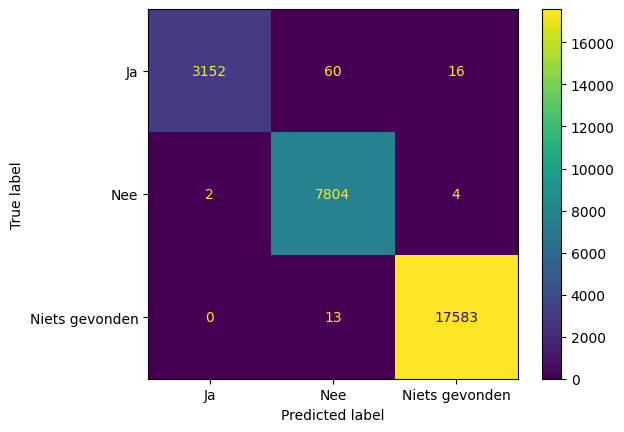

                precision    recall  f1-score   support

            Ja       1.00      0.98      0.99      3228
           Nee       0.99      1.00      0.99      7810
Niets gevonden       1.00      1.00      1.00     17596

      accuracy                           1.00     28634
     macro avg       1.00      0.99      0.99     28634
  weighted avg       1.00      1.00      1.00     28634



In [26]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.79, NNZs: 475, Bias: 0.000000, T: 68719, Avg. loss: 0.191652
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 153.49, NNZs: 174, Bias: 0.000000, T: 137438, Avg. loss: 0.138321
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 184.46, NNZs: 138, Bias: 0.000000, T: 206157, Avg. loss: 0.126146
Total training time: 2.50 seconds.
-- Epoch 4
Norm: 210.41, NNZs: 118, Bias: 0.000000, T: 274876, Avg. loss: 0.118925
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 233.12, NNZs: 110, Bias: 0.000000, T: 343595, Avg. loss: 0.114349
Total training time: 4.22 seconds.
-- Epoch 6
Norm: 253.67, NNZs: 105, Bias: 0.000000, T: 412314, Avg. loss: 0.110828
Total training time: 5.12 seconds.
-- Epoch 7
Norm: 257.41, NNZs: 105, Bias: 0.000000, T: 481033, Avg. loss: 0.108999
Total training time: 6.05 seconds.
-- Epoch 8
Norm: 261.06, NNZs: 105, Bias: 0.000000, T: 549752, Avg. loss: 0.108396
Total training time: 7.00 seconds.
-- Epoch 9
Norm: 264.68, NNZs: 104, Bias: 0.000000, T: 61

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


Norm: 131.90, NNZs: 669, Bias: 0.000000, T: 68719, Avg. loss: 0.271053
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 181.40, NNZs: 197, Bias: 0.000000, T: 137438, Avg. loss: 0.187441
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 218.38, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.166021
Total training time: 2.59 seconds.
-- Epoch 4
Norm: 249.15, NNZs: 145, Bias: 0.000000, T: 274876, Avg. loss: 0.153851
Total training time: 3.44 seconds.
-- Epoch 5
Norm: 276.08, NNZs: 131, Bias: 0.000000, T: 343595, Avg. loss: 0.145775
Total training time: 4.30 seconds.
-- Epoch 6
Norm: 300.32, NNZs: 121, Bias: 0.000000, T: 412314, Avg. loss: 0.140290
Total training time: 5.15 seconds.
-- Epoch 7
Norm: 304.65, NNZs: 119, Bias: 0.000000, T: 481033, Avg. loss: 0.137191
Total training time: 6.02 seconds.
-- Epoch 8
Norm: 308.93, NNZs: 118, Bias: 0.000000, T: 549752, Avg. loss: 0.136402
Total training time: 6.88 seconds.
-- Epoch 9
Norm: 313.13, NNZs: 115, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.1s remaining:    0.0s


Norm: 126.47, NNZs: 633, Bias: 0.000000, T: 68719, Avg. loss: 0.211333
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 172.36, NNZs: 221, Bias: 0.000000, T: 137438, Avg. loss: 0.147926
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 207.33, NNZs: 172, Bias: 0.000000, T: 206157, Avg. loss: 0.131210
Total training time: 2.58 seconds.
-- Epoch 4
Norm: 236.61, NNZs: 146, Bias: 0.000000, T: 274876, Avg. loss: 0.121185
Total training time: 3.44 seconds.
-- Epoch 5
Norm: 262.41, NNZs: 137, Bias: 0.000000, T: 343595, Avg. loss: 0.114206
Total training time: 4.30 seconds.
-- Epoch 6
Norm: 285.56, NNZs: 118, Bias: 0.000000, T: 412314, Avg. loss: 0.108915
Total training time: 5.17 seconds.
-- Epoch 7
Norm: 289.73, NNZs: 116, Bias: 0.000000, T: 481033, Avg. loss: 0.106097
Total training time: 6.01 seconds.
-- Epoch 8
Norm: 293.84, NNZs: 113, Bias: 0.000000, T: 549752, Avg. loss: 0.105379
Total training time: 6.89 seconds.
-- Epoch 9
Norm: 297.89, NNZs: 108, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.135 total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.25, NNZs: 565, Bias: 0.000000, T: 68719, Avg. loss: 0.193143
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 153.44, NNZs: 171, Bias: 0.000000, T: 137438, Avg. loss: 0.140026
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 184.31, NNZs: 142, Bias: 0.000000, T: 206157, Avg. loss: 0.127268
Total training time: 2.57 seconds.
-- Epoch 4
Norm: 210.08, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.120248
Total training time: 3.45 seconds.
-- Epoch 5
Norm: 233.01, NNZs: 111, Bias: 0.000000, T: 343595, Avg. loss: 0.115455
Total training time: 4.37 seconds.
-- Epoch 6
Norm: 253.77, NNZs: 104, Bias: 0.000000, T: 412314, Avg. loss: 0.111723
Total training time: 5.25 seconds.
-- Epoch 7
Norm: 257.50, NNZs: 104, Bias: 0.000000, T: 481033, Avg. loss: 0.109910
Total training time: 6.09 seconds.
-- Epoch 8
Norm: 261.15, NNZs: 104, Bias: 0.000000, T: 549752, Avg. loss: 0.109304
Total training time: 6.93 seconds.
-- Epoch 9
Norm: 264.78, NNZs: 104, Bias: 0.000000, T: 61

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


Norm: 131.89, NNZs: 627, Bias: 0.000000, T: 68719, Avg. loss: 0.270859
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 181.29, NNZs: 204, Bias: 0.000000, T: 137438, Avg. loss: 0.187655
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 218.35, NNZs: 161, Bias: 0.000000, T: 206157, Avg. loss: 0.166461
Total training time: 2.41 seconds.
-- Epoch 4
Norm: 249.13, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.154344
Total training time: 3.24 seconds.
-- Epoch 5
Norm: 276.15, NNZs: 133, Bias: 0.000000, T: 343595, Avg. loss: 0.146555
Total training time: 4.03 seconds.
-- Epoch 6
Norm: 300.47, NNZs: 124, Bias: 0.000000, T: 412314, Avg. loss: 0.141004
Total training time: 4.80 seconds.
-- Epoch 7
Norm: 304.83, NNZs: 123, Bias: 0.000000, T: 481033, Avg. loss: 0.138144
Total training time: 5.57 seconds.
-- Epoch 8
Norm: 309.11, NNZs: 117, Bias: 0.000000, T: 549752, Avg. loss: 0.137284
Total training time: 6.34 seconds.
-- Epoch 9
Norm: 313.33, NNZs: 117, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.4s remaining:    0.0s


Norm: 126.57, NNZs: 648, Bias: 0.000000, T: 68719, Avg. loss: 0.211184
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 172.41, NNZs: 226, Bias: 0.000000, T: 137438, Avg. loss: 0.147482
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 207.24, NNZs: 176, Bias: 0.000000, T: 206157, Avg. loss: 0.131058
Total training time: 2.57 seconds.
-- Epoch 4
Norm: 236.58, NNZs: 151, Bias: 0.000000, T: 274876, Avg. loss: 0.121698
Total training time: 3.40 seconds.
-- Epoch 5
Norm: 262.30, NNZs: 128, Bias: 0.000000, T: 343595, Avg. loss: 0.114701
Total training time: 4.22 seconds.
-- Epoch 6
Norm: 285.40, NNZs: 115, Bias: 0.000000, T: 412314, Avg. loss: 0.109363
Total training time: 5.03 seconds.
-- Epoch 7
Norm: 289.58, NNZs: 114, Bias: 0.000000, T: 481033, Avg. loss: 0.106672
Total training time: 5.88 seconds.
-- Epoch 8
Norm: 293.69, NNZs: 114, Bias: 0.000000, T: 549752, Avg. loss: 0.105813
Total training time: 6.77 seconds.
-- Epoch 9
Norm: 297.74, NNZs: 112, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.117 total time= 2.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.42, NNZs: 515, Bias: 0.000000, T: 68719, Avg. loss: 0.191701
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 153.62, NNZs: 170, Bias: 0.000000, T: 137438, Avg. loss: 0.137964
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 184.54, NNZs: 141, Bias: 0.000000, T: 206157, Avg. loss: 0.125150
Total training time: 2.37 seconds.
-- Epoch 4
Norm: 210.55, NNZs: 118, Bias: 0.000000, T: 274876, Avg. loss: 0.118212
Total training time: 3.17 seconds.
-- Epoch 5
Norm: 233.34, NNZs: 113, Bias: 0.000000, T: 343595, Avg. loss: 0.113273
Total training time: 3.97 seconds.
-- Epoch 6
Norm: 254.20, NNZs: 107, Bias: 0.000000, T: 412314, Avg. loss: 0.109811
Total training time: 4.76 seconds.
-- Epoch 7
Norm: 257.91, NNZs: 106, Bias: 0.000000, T: 481033, Avg. loss: 0.107733
Total training time: 5.57 seconds.
-- Epoch 8
Norm: 261.58, NNZs: 105, Bias: 0.000000, T: 549752, Avg. loss: 0.107269
Total training time: 6.39 seconds.
-- Epoch 9
Norm: 265.19, NNZs: 105, Bias: 0.000000, T: 61

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s remaining:    0.0s


Norm: 132.19, NNZs: 656, Bias: 0.000000, T: 68719, Avg. loss: 0.271104
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 181.68, NNZs: 193, Bias: 0.000000, T: 137438, Avg. loss: 0.187103
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 218.64, NNZs: 154, Bias: 0.000000, T: 206157, Avg. loss: 0.165752
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 249.43, NNZs: 146, Bias: 0.000000, T: 274876, Avg. loss: 0.153621
Total training time: 3.31 seconds.
-- Epoch 5
Norm: 276.46, NNZs: 133, Bias: 0.000000, T: 343595, Avg. loss: 0.145929
Total training time: 4.18 seconds.
-- Epoch 6
Norm: 300.80, NNZs: 126, Bias: 0.000000, T: 412314, Avg. loss: 0.140375
Total training time: 5.05 seconds.
-- Epoch 7
Norm: 305.14, NNZs: 122, Bias: 0.000000, T: 481033, Avg. loss: 0.137361
Total training time: 5.90 seconds.
-- Epoch 8
Norm: 309.42, NNZs: 121, Bias: 0.000000, T: 549752, Avg. loss: 0.136618
Total training time: 6.75 seconds.
-- Epoch 9
Norm: 313.64, NNZs: 114, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.4s remaining:    0.0s


Norm: 126.56, NNZs: 627, Bias: 0.000000, T: 68719, Avg. loss: 0.211991
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 172.54, NNZs: 227, Bias: 0.000000, T: 137438, Avg. loss: 0.147815
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 207.38, NNZs: 176, Bias: 0.000000, T: 206157, Avg. loss: 0.131336
Total training time: 2.57 seconds.
-- Epoch 4
Norm: 236.76, NNZs: 150, Bias: 0.000000, T: 274876, Avg. loss: 0.121912
Total training time: 3.44 seconds.
-- Epoch 5
Norm: 262.52, NNZs: 137, Bias: 0.000000, T: 343595, Avg. loss: 0.115089
Total training time: 4.38 seconds.
-- Epoch 6
Norm: 285.65, NNZs: 120, Bias: 0.000000, T: 412314, Avg. loss: 0.109690
Total training time: 5.24 seconds.
-- Epoch 7
Norm: 289.83, NNZs: 120, Bias: 0.000000, T: 481033, Avg. loss: 0.106995
Total training time: 6.04 seconds.
-- Epoch 8
Norm: 293.95, NNZs: 114, Bias: 0.000000, T: 549752, Avg. loss: 0.106221
Total training time: 6.84 seconds.
-- Epoch 9
Norm: 298.01, NNZs: 114, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.130 total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.37, NNZs: 512, Bias: 0.000000, T: 68720, Avg. loss: 0.191935
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 153.51, NNZs: 175, Bias: 0.000000, T: 137440, Avg. loss: 0.138073
Total training time: 1.74 seconds.
-- Epoch 3
Norm: 184.40, NNZs: 140, Bias: 0.000000, T: 206160, Avg. loss: 0.125688
Total training time: 2.53 seconds.
-- Epoch 4
Norm: 210.36, NNZs: 125, Bias: 0.000000, T: 274880, Avg. loss: 0.118738
Total training time: 3.37 seconds.
-- Epoch 5
Norm: 233.21, NNZs: 111, Bias: 0.000000, T: 343600, Avg. loss: 0.113933
Total training time: 4.24 seconds.
-- Epoch 6
Norm: 253.86, NNZs: 106, Bias: 0.000000, T: 412320, Avg. loss: 0.110366
Total training time: 5.12 seconds.
-- Epoch 7
Norm: 257.64, NNZs: 106, Bias: 0.000000, T: 481040, Avg. loss: 0.108647
Total training time: 5.97 seconds.
-- Epoch 8
Norm: 261.33, NNZs: 106, Bias: 0.000000, T: 549760, Avg. loss: 0.108026
Total training time: 6.81 seconds.
-- Epoch 9
Norm: 264.95, NNZs: 105, Bias: 0.000000, T: 61

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s remaining:    0.0s


Norm: 131.98, NNZs: 643, Bias: 0.000000, T: 68720, Avg. loss: 0.271131
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 181.40, NNZs: 199, Bias: 0.000000, T: 137440, Avg. loss: 0.187450
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 218.32, NNZs: 162, Bias: 0.000000, T: 206160, Avg. loss: 0.165963
Total training time: 2.63 seconds.
-- Epoch 4
Norm: 249.16, NNZs: 139, Bias: 0.000000, T: 274880, Avg. loss: 0.153960
Total training time: 3.55 seconds.
-- Epoch 5
Norm: 276.16, NNZs: 129, Bias: 0.000000, T: 343600, Avg. loss: 0.146055
Total training time: 4.42 seconds.
-- Epoch 6
Norm: 300.44, NNZs: 124, Bias: 0.000000, T: 412320, Avg. loss: 0.140576
Total training time: 5.33 seconds.
-- Epoch 7
Norm: 304.78, NNZs: 123, Bias: 0.000000, T: 481040, Avg. loss: 0.137499
Total training time: 6.22 seconds.
-- Epoch 8
Norm: 309.05, NNZs: 119, Bias: 0.000000, T: 549760, Avg. loss: 0.136665
Total training time: 7.13 seconds.
-- Epoch 9
Norm: 313.26, NNZs: 118, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.8s remaining:    0.0s


Norm: 126.30, NNZs: 597, Bias: 0.000000, T: 68720, Avg. loss: 0.211671
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 172.12, NNZs: 218, Bias: 0.000000, T: 137440, Avg. loss: 0.148014
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 206.97, NNZs: 175, Bias: 0.000000, T: 206160, Avg. loss: 0.131871
Total training time: 2.52 seconds.
-- Epoch 4
Norm: 236.31, NNZs: 149, Bias: 0.000000, T: 274880, Avg. loss: 0.122026
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 262.03, NNZs: 134, Bias: 0.000000, T: 343600, Avg. loss: 0.115118
Total training time: 4.20 seconds.
-- Epoch 6
Norm: 285.11, NNZs: 116, Bias: 0.000000, T: 412320, Avg. loss: 0.109989
Total training time: 5.07 seconds.
-- Epoch 7
Norm: 289.29, NNZs: 114, Bias: 0.000000, T: 481040, Avg. loss: 0.107142
Total training time: 5.95 seconds.
-- Epoch 8
Norm: 293.40, NNZs: 113, Bias: 0.000000, T: 549760, Avg. loss: 0.106340
Total training time: 6.84 seconds.
-- Epoch 9
Norm: 297.45, NNZs: 112, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   51.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.128 total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.34, NNZs: 513, Bias: 0.000000, T: 68720, Avg. loss: 0.193523
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 153.53, NNZs: 168, Bias: 0.000000, T: 137440, Avg. loss: 0.139861
Total training time: 1.74 seconds.
-- Epoch 3
Norm: 184.42, NNZs: 139, Bias: 0.000000, T: 206160, Avg. loss: 0.127231
Total training time: 2.56 seconds.
-- Epoch 4
Norm: 210.55, NNZs: 121, Bias: 0.000000, T: 274880, Avg. loss: 0.120207
Total training time: 3.40 seconds.
-- Epoch 5
Norm: 233.35, NNZs: 110, Bias: 0.000000, T: 343600, Avg. loss: 0.115255
Total training time: 4.26 seconds.
-- Epoch 6
Norm: 254.12, NNZs: 105, Bias: 0.000000, T: 412320, Avg. loss: 0.111559
Total training time: 5.13 seconds.
-- Epoch 7
Norm: 257.87, NNZs: 104, Bias: 0.000000, T: 481040, Avg. loss: 0.109605
Total training time: 6.03 seconds.
-- Epoch 8
Norm: 261.54, NNZs: 103, Bias: 0.000000, T: 549760, Avg. loss: 0.109070
Total training time: 6.98 seconds.
-- Epoch 9
Norm: 265.15, NNZs: 103, Bias: 0.000000, T: 61

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s remaining:    0.0s


Norm: 131.78, NNZs: 602, Bias: 0.000000, T: 68720, Avg. loss: 0.272261
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 181.22, NNZs: 201, Bias: 0.000000, T: 137440, Avg. loss: 0.188255
Total training time: 1.64 seconds.
-- Epoch 3
Norm: 218.29, NNZs: 160, Bias: 0.000000, T: 206160, Avg. loss: 0.166944
Total training time: 2.45 seconds.
-- Epoch 4
Norm: 249.15, NNZs: 146, Bias: 0.000000, T: 274880, Avg. loss: 0.155056
Total training time: 3.25 seconds.
-- Epoch 5
Norm: 276.21, NNZs: 134, Bias: 0.000000, T: 343600, Avg. loss: 0.146974
Total training time: 4.05 seconds.
-- Epoch 6
Norm: 300.50, NNZs: 124, Bias: 0.000000, T: 412320, Avg. loss: 0.141258
Total training time: 4.88 seconds.
-- Epoch 7
Norm: 304.85, NNZs: 123, Bias: 0.000000, T: 481040, Avg. loss: 0.138339
Total training time: 5.68 seconds.
-- Epoch 8
Norm: 309.13, NNZs: 118, Bias: 0.000000, T: 549760, Avg. loss: 0.137516
Total training time: 6.49 seconds.
-- Epoch 9
Norm: 313.34, NNZs: 115, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.8s remaining:    0.0s


Norm: 126.39, NNZs: 608, Bias: 0.000000, T: 68720, Avg. loss: 0.211786
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 172.21, NNZs: 220, Bias: 0.000000, T: 137440, Avg. loss: 0.148319
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 207.18, NNZs: 176, Bias: 0.000000, T: 206160, Avg. loss: 0.132043
Total training time: 2.56 seconds.
-- Epoch 4
Norm: 236.53, NNZs: 155, Bias: 0.000000, T: 274880, Avg. loss: 0.122235
Total training time: 3.39 seconds.
-- Epoch 5
Norm: 262.33, NNZs: 133, Bias: 0.000000, T: 343600, Avg. loss: 0.115419
Total training time: 4.23 seconds.
-- Epoch 6
Norm: 285.46, NNZs: 123, Bias: 0.000000, T: 412320, Avg. loss: 0.110138
Total training time: 5.07 seconds.
-- Epoch 7
Norm: 289.63, NNZs: 120, Bias: 0.000000, T: 481040, Avg. loss: 0.107220
Total training time: 5.91 seconds.
-- Epoch 8
Norm: 293.74, NNZs: 119, Bias: 0.000000, T: 549760, Avg. loss: 0.106476
Total training time: 6.75 seconds.
-- Epoch 9
Norm: 297.79, NNZs: 117, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.123 total time= 2.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120075926958356.30, NNZs: 789299, Bias: 0.000000, T: 68719, Avg. loss: 114726903316989305946112.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 113654200464727.55, NNZs: 789300, Bias: 0.000000, T: 137438, Avg. loss: 128030047336014398095360.000000
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 110351593858565.89, NNZs: 789300, Bias: 0.000000, T: 206157, Avg. loss: 107980727012863135186944.000000
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 108154748048965.81, NNZs: 789300, Bias: 0.000000, T: 274876, Avg. loss: 98579307701968742383616.000000
Total training time: 2.32 seconds.
-- Epoch 5
Norm: 106525712555111.86, NNZs: 789300, Bias: 0.000000, T: 343595, Avg. loss: 92690124225924336451584.000000
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 105238840467915.80, NNZs: 789300, Bias: 0.000000, T: 412314, Avg. loss: 88517012995381332541440.000000
Total training time: 3.48 seconds.
Convergence after 6 epochs took 3.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 105710555343900.53, NNZs: 789297, Bias: 0.000000, T: 68719, Avg. loss: 86287785294544301457408.000000
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 99671071891750.64, NNZs: 789300, Bias: 0.000000, T: 137438, Avg. loss: 97859426570473956179968.000000
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 96552738516676.47, NNZs: 789300, Bias: 0.000000, T: 206157, Avg. loss: 81892668005811493011456.000000
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 94482780321320.33, NNZs: 789300, Bias: 0.000000, T: 274876, Avg. loss: 74391770543063792877568.000000
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 92947623091528.78, NNZs: 789300, Bias: 0.000000, T: 343595, Avg. loss: 69681817348983891165184.000000
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 91729457565509.64, NNZs: 789300, Bias: 0.000000, T: 412314, Avg. loss: 66389047634995217170432.000000
Total training time: 3.50 seconds.
Convergence after 6 epochs took 3.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


Norm: 1511641942.47, NNZs: 789254, Bias: 0.000000, T: 68719, Avg. loss: 56613415963039.843750
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1370954559.67, NNZs: 789297, Bias: 0.000000, T: 137438, Avg. loss: 16319615891764.546875
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 1306499142.12, NNZs: 789293, Bias: 0.000000, T: 206157, Avg. loss: 11397513351287.316406
Total training time: 1.65 seconds.
-- Epoch 4
Norm: 1265979404.86, NNZs: 789288, Bias: 0.000000, T: 274876, Avg. loss: 9550216593015.046875
Total training time: 2.23 seconds.
-- Epoch 5
Norm: 1236692743.37, NNZs: 789288, Bias: 0.000000, T: 343595, Avg. loss: 8478227703556.271484
Total training time: 2.83 seconds.
-- Epoch 6
Norm: 1214305434.94, NNZs: 789277, Bias: 0.000000, T: 412314, Avg. loss: 7757741151987.956055
Total training time: 3.44 seconds.
Convergence after 6 epochs took 3.49 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.279 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 110963044183125.12, NNZs: 789145, Bias: 0.000000, T: 68719, Avg. loss: 95077743299979397562368.000000
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 104754683726473.83, NNZs: 789147, Bias: 0.000000, T: 137438, Avg. loss: 108069246455398969376768.000000
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 101540116676374.47, NNZs: 789147, Bias: 0.000000, T: 206157, Avg. loss: 90564278475025192845312.000000
Total training time: 1.65 seconds.
-- Epoch 4
Norm: 99400320576067.59, NNZs: 789147, Bias: 0.000000, T: 274876, Avg. loss: 82348717605206523641856.000000
Total training time: 2.22 seconds.
-- Epoch 5
Norm: 97809852933598.36, NNZs: 789147, Bias: 0.000000, T: 343595, Avg. loss: 77228499744700065906688.000000
Total training time: 2.78 seconds.
-- Epoch 6
Norm: 96551507244612.56, NNZs: 789147, Bias: 0.000000, T: 412314, Avg. loss: 73598920835357606936576.000000
Total training time: 3.34 seconds.
Convergence after 6 epochs took 3.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


Norm: 120638644616477.77, NNZs: 789143, Bias: 0.000000, T: 68719, Avg. loss: 113668762204893136027648.000000
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 114192066590135.16, NNZs: 789147, Bias: 0.000000, T: 137438, Avg. loss: 129051072295267351920640.000000
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 110871920996298.23, NNZs: 789147, Bias: 0.000000, T: 206157, Avg. loss: 108913900902327766745088.000000
Total training time: 1.62 seconds.
-- Epoch 4
Norm: 108664355179403.06, NNZs: 789147, Bias: 0.000000, T: 274876, Avg. loss: 99498707833644635914240.000000
Total training time: 2.21 seconds.
-- Epoch 5
Norm: 107029226862574.59, NNZs: 789147, Bias: 0.000000, T: 343595, Avg. loss: 93576504137642881843200.000000
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 105733117708801.61, NNZs: 789147, Bias: 0.000000, T: 412314, Avg. loss: 89400682931538398019584.000000
Total training time: 3.38 seconds.
Convergence after 6 epochs took 3.43 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


Norm: 71.13, NNZs: 78, Bias: 0.000000, T: 68719, Avg. loss: 0.005126
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 71.85, NNZs: 76, Bias: 0.000000, T: 137438, Avg. loss: 0.004637
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 72.24, NNZs: 75, Bias: 0.000000, T: 206157, Avg. loss: 0.004599
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 72.50, NNZs: 76, Bias: 0.000000, T: 274876, Avg. loss: 0.004590
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 72.70, NNZs: 76, Bias: 0.000000, T: 343595, Avg. loss: 0.004571
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 72.86, NNZs: 74, Bias: 0.000000, T: 412314, Avg. loss: 0.004561
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.280 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119469786798444.45, NNZs: 789194, Bias: 0.000000, T: 68719, Avg. loss: 111841772288209661722624.000000
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 113057162639658.80, NNZs: 789197, Bias: 0.000000, T: 137438, Avg. loss: 127154857265052883353600.000000
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 109750112183660.34, NNZs: 789197, Bias: 0.000000, T: 206157, Avg. loss: 107247895495653615206400.000000
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 107554405668479.09, NNZs: 789197, Bias: 0.000000, T: 274876, Avg. loss: 97926406056346763919360.000000
Total training time: 2.48 seconds.
-- Epoch 5
Norm: 105922727714369.03, NNZs: 789197, Bias: 0.000000, T: 343595, Avg. loss: 92056543684775653670912.000000
Total training time: 3.14 seconds.
-- Epoch 6
Norm: 104632822042410.20, NNZs: 789197, Bias: 0.000000, T: 412314, Avg. loss: 87936449676334805811200.000000
Total training time: 3.80 seconds.
Convergence after 6 epochs took 3.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


Norm: 84791629951623.75, NNZs: 789192, Bias: 0.000000, T: 68719, Avg. loss: 56270600463515652194304.000000
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 79246359481408.03, NNZs: 789197, Bias: 0.000000, T: 137438, Avg. loss: 61743397123084221677568.000000
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 76393161243098.47, NNZs: 789197, Bias: 0.000000, T: 206157, Avg. loss: 50341907644928443285504.000000
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 74493176294944.50, NNZs: 789197, Bias: 0.000000, T: 274876, Avg. loss: 45106505544920115183616.000000
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 73083169898771.81, NNZs: 789197, Bias: 0.000000, T: 343595, Avg. loss: 41861333572155617574912.000000
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 71970187555011.62, NNZs: 789197, Bias: 0.000000, T: 412314, Avg. loss: 39561179318650455195648.000000
Total training time: 3.94 seconds.
Convergence after 6 epochs took 4.00 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


Norm: 70.71, NNZs: 80, Bias: 0.000000, T: 68719, Avg. loss: 0.005092
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 71.42, NNZs: 81, Bias: 0.000000, T: 137438, Avg. loss: 0.004607
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 71.81, NNZs: 80, Bias: 0.000000, T: 206157, Avg. loss: 0.004568
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 72.08, NNZs: 81, Bias: 0.000000, T: 274876, Avg. loss: 0.004537
Total training time: 2.07 seconds.
-- Epoch 5
Norm: 72.28, NNZs: 81, Bias: 0.000000, T: 343595, Avg. loss: 0.004527
Total training time: 2.56 seconds.
-- Epoch 6
Norm: 72.45, NNZs: 81, Bias: 0.000000, T: 412314, Avg. loss: 0.004527
Total training time: 3.08 seconds.
Convergence after 6 epochs took 3.14 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.273 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120380560567667.33, NNZs: 789681, Bias: 0.000000, T: 68720, Avg. loss: 114239299497931657183232.000000
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 113942915993484.55, NNZs: 789681, Bias: 0.000000, T: 137440, Avg. loss: 128788546090439458947072.000000
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 110615403686466.98, NNZs: 789681, Bias: 0.000000, T: 206160, Avg. loss: 108638560020894916280320.000000
Total training time: 1.82 seconds.
-- Epoch 4
Norm: 108407936608910.69, NNZs: 789681, Bias: 0.000000, T: 274880, Avg. loss: 99158933512939773100032.000000
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 106768894092592.28, NNZs: 789681, Bias: 0.000000, T: 343600, Avg. loss: 93233930495179643420672.000000
Total training time: 3.12 seconds.
-- Epoch 6
Norm: 105472556365958.17, NNZs: 789681, Bias: 0.000000, T: 412320, Avg. loss: 89044296031680780566528.000000
Total training time: 3.76 seconds.
Convergence after 6 epochs took 3.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


Norm: 126783689334132.36, NNZs: 789680, Bias: 0.000000, T: 68720, Avg. loss: 125653154288965959811072.000000
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 120195064334121.25, NNZs: 789681, Bias: 0.000000, T: 137440, Avg. loss: 143027488101243681767424.000000
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 116801283781492.62, NNZs: 789681, Bias: 0.000000, T: 206160, Avg. loss: 121055829109819748384768.000000
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 114550124063848.84, NNZs: 789681, Bias: 0.000000, T: 274880, Avg. loss: 110714548036238458224640.000000
Total training time: 2.51 seconds.
-- Epoch 5
Norm: 112879681469032.48, NNZs: 789681, Bias: 0.000000, T: 343600, Avg. loss: 104279232865060924686336.000000
Total training time: 3.14 seconds.
-- Epoch 6
Norm: 111559620020168.52, NNZs: 789681, Bias: 0.000000, T: 412320, Avg. loss: 99717101472170429644800.000000
Total training time: 3.77 seconds.
Convergence after 6 epochs took 3.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


Norm: 102216327578047.42, NNZs: 789677, Bias: 0.000000, T: 68720, Avg. loss: 80484549865194339172352.000000
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 96272470491503.02, NNZs: 789681, Bias: 0.000000, T: 137440, Avg. loss: 91219274724832977092608.000000
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 93202690131525.95, NNZs: 789681, Bias: 0.000000, T: 206160, Avg. loss: 76002310496688478879744.000000
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 91157409764792.64, NNZs: 789681, Bias: 0.000000, T: 274880, Avg. loss: 68903629818797616005120.000000
Total training time: 2.50 seconds.
-- Epoch 5
Norm: 89639192223818.31, NNZs: 789681, Bias: 0.000000, T: 343600, Avg. loss: 64458393885755825979392.000000
Total training time: 3.13 seconds.
-- Epoch 6
Norm: 88439024588849.67, NNZs: 789681, Bias: 0.000000, T: 412320, Avg. loss: 61309249024467247562752.000000
Total training time: 3.77 seconds.
Convergence after 6 epochs took 3.83 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.293 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119631895688699.64, NNZs: 789990, Bias: 0.000000, T: 68720, Avg. loss: 111331681499658699407360.000000
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 113233074035139.05, NNZs: 789991, Bias: 0.000000, T: 137440, Avg. loss: 126550354555721488531456.000000
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 109918085442813.66, NNZs: 789991, Bias: 0.000000, T: 206160, Avg. loss: 106780874807096939380736.000000
Total training time: 1.78 seconds.
-- Epoch 4
Norm: 107718755582728.20, NNZs: 789991, Bias: 0.000000, T: 274880, Avg. loss: 97376886273737014378496.000000
Total training time: 2.38 seconds.
-- Epoch 5
Norm: 106084516593850.80, NNZs: 789991, Bias: 0.000000, T: 343600, Avg. loss: 91537071226047338381312.000000
Total training time: 2.99 seconds.
-- Epoch 6
Norm: 104789798037177.80, NNZs: 789991, Bias: 0.000000, T: 412320, Avg. loss: 87396359066751351128064.000000
Total training time: 3.58 seconds.
Convergence after 6 epochs took 3.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Norm: 132771741947316.42, NNZs: 789990, Bias: 0.000000, T: 68720, Avg. loss: 135782352638204864102400.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 126155580399929.62, NNZs: 789991, Bias: 0.000000, T: 137440, Avg. loss: 158153662900123662811136.000000
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 122735333523967.61, NNZs: 789991, Bias: 0.000000, T: 206160, Avg. loss: 134982810427623127121920.000000
Total training time: 1.74 seconds.
-- Epoch 4
Norm: 120468880137455.36, NNZs: 789991, Bias: 0.000000, T: 274880, Avg. loss: 123927596361057061306368.000000
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 118785124636106.44, NNZs: 789991, Bias: 0.000000, T: 343600, Avg. loss: 116980192381006629568512.000000
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 117453548820969.73, NNZs: 789991, Bias: 0.000000, T: 412320, Avg. loss: 112048562691074238185472.000000
Total training time: 3.60 seconds.
Convergence after 6 epochs took 3.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


Norm: 121085804338350.64, NNZs: 789991, Bias: 0.000000, T: 68720, Avg. loss: 110921493334533211160576.000000
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 114688429496727.19, NNZs: 789991, Bias: 0.000000, T: 137440, Avg. loss: 130544748080799613452288.000000
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 111381352700771.42, NNZs: 789991, Bias: 0.000000, T: 206160, Avg. loss: 110564797283147228119040.000000
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 109178977446955.08, NNZs: 789991, Bias: 0.000000, T: 274880, Avg. loss: 101122802790190756659200.000000
Total training time: 2.48 seconds.
-- Epoch 5
Norm: 107541074182112.69, NNZs: 789991, Bias: 0.000000, T: 343600, Avg. loss: 95208201420167180189696.000000
Total training time: 3.08 seconds.
-- Epoch 6
Norm: 106244999007765.67, NNZs: 789991, Bias: 0.000000, T: 412320, Avg. loss: 91014831449893819645952.000000
Total training time: 3.68 seconds.
Convergence after 6 epochs took 3.73 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.305 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 138.83, NNZs: 794, Bias: 0.000000, T: 68719, Avg. loss: 0.072068
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 181.11, NNZs: 216, Bias: 0.000000, T: 137438, Avg. loss: 0.041407
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 212.13, NNZs: 184, Bias: 0.000000, T: 206157, Avg. loss: 0.035457
Total training time: 1.62 seconds.
-- Epoch 4
Norm: 237.84, NNZs: 165, Bias: 0.000000, T: 274876, Avg. loss: 0.033022
Total training time: 2.13 seconds.
-- Epoch 5
Norm: 260.46, NNZs: 149, Bias: 0.000000, T: 343595, Avg. loss: 0.031553
Total training time: 2.68 seconds.
-- Epoch 6
Norm: 280.38, NNZs: 145, Bias: 0.000000, T: 412314, Avg. loss: 0.029974
Total training time: 3.23 seconds.
Convergence after 6 epochs took 3.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 172.37, NNZs: 1257, Bias: 0.000000, T: 68719, Avg. loss: 0.109725
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 222.41, NNZs: 244, Bias: 0.000000, T: 137438, Avg. loss: 0.060464
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 258.66, NNZs: 213, Bias: 0.000000, T: 206157, Avg. loss: 0.051465
Total training time: 1.64 seconds.
-- Epoch 4
Norm: 288.38, NNZs: 191, Bias: 0.000000, T: 274876, Avg. loss: 0.046558
Total training time: 2.20 seconds.
-- Epoch 5
Norm: 314.21, NNZs: 181, Bias: 0.000000, T: 343595, Avg. loss: 0.044191
Total training time: 2.77 seconds.
-- Epoch 6
Norm: 337.37, NNZs: 160, Bias: 0.000000, T: 412314, Avg. loss: 0.042490
Total training time: 3.35 seconds.
Convergence after 6 epochs took 3.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


Norm: 151.90, NNZs: 933, Bias: 0.000000, T: 68719, Avg. loss: 0.078407
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 196.12, NNZs: 203, Bias: 0.000000, T: 137438, Avg. loss: 0.042099
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 227.86, NNZs: 175, Bias: 0.000000, T: 206157, Avg. loss: 0.034742
Total training time: 1.64 seconds.
-- Epoch 4
Norm: 253.67, NNZs: 161, Bias: 0.000000, T: 274876, Avg. loss: 0.030922
Total training time: 2.19 seconds.
-- Epoch 5
Norm: 275.89, NNZs: 150, Bias: 0.000000, T: 343595, Avg. loss: 0.028390
Total training time: 2.74 seconds.
-- Epoch 6
Norm: 295.63, NNZs: 136, Bias: 0.000000, T: 412314, Avg. loss: 0.026663
Total training time: 3.29 seconds.
Convergence after 6 epochs took 3.36 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.993 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 139.21, NNZs: 803, Bias: 0.000000, T: 68719, Avg. loss: 0.072335
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 181.50, NNZs: 220, Bias: 0.000000, T: 137438, Avg. loss: 0.041566
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 212.60, NNZs: 183, Bias: 0.000000, T: 206157, Avg. loss: 0.035873
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 238.34, NNZs: 182, Bias: 0.000000, T: 274876, Avg. loss: 0.033405
Total training time: 2.00 seconds.
-- Epoch 5
Norm: 260.77, NNZs: 161, Bias: 0.000000, T: 343595, Avg. loss: 0.031732
Total training time: 2.53 seconds.
-- Epoch 6
Norm: 280.87, NNZs: 153, Bias: 0.000000, T: 412314, Avg. loss: 0.030837
Total training time: 3.07 seconds.
Convergence after 6 epochs took 3.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 172.37, NNZs: 1101, Bias: 0.000000, T: 68719, Avg. loss: 0.109209
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 222.20, NNZs: 245, Bias: 0.000000, T: 137438, Avg. loss: 0.060195
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 258.37, NNZs: 207, Bias: 0.000000, T: 206157, Avg. loss: 0.051166
Total training time: 1.61 seconds.
-- Epoch 4
Norm: 288.19, NNZs: 188, Bias: 0.000000, T: 274876, Avg. loss: 0.046870
Total training time: 2.15 seconds.
-- Epoch 5
Norm: 314.01, NNZs: 180, Bias: 0.000000, T: 343595, Avg. loss: 0.044277
Total training time: 2.72 seconds.
-- Epoch 6
Norm: 337.30, NNZs: 171, Bias: 0.000000, T: 412314, Avg. loss: 0.042835
Total training time: 3.25 seconds.
Convergence after 6 epochs took 3.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 151.60, NNZs: 979, Bias: 0.000000, T: 68719, Avg. loss: 0.077978
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 195.81, NNZs: 223, Bias: 0.000000, T: 137438, Avg. loss: 0.042153
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 227.62, NNZs: 182, Bias: 0.000000, T: 206157, Avg. loss: 0.034884
Total training time: 1.57 seconds.
-- Epoch 4
Norm: 253.59, NNZs: 161, Bias: 0.000000, T: 274876, Avg. loss: 0.031020
Total training time: 2.13 seconds.
-- Epoch 5
Norm: 275.88, NNZs: 151, Bias: 0.000000, T: 343595, Avg. loss: 0.028553
Total training time: 2.68 seconds.
-- Epoch 6
Norm: 295.64, NNZs: 134, Bias: 0.000000, T: 412314, Avg. loss: 0.026734
Total training time: 3.24 seconds.
Convergence after 6 epochs took 3.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.994 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 138.92, NNZs: 712, Bias: 0.000000, T: 68719, Avg. loss: 0.072152
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 181.13, NNZs: 217, Bias: 0.000000, T: 137438, Avg. loss: 0.041861
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 212.44, NNZs: 180, Bias: 0.000000, T: 206157, Avg. loss: 0.035957
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 238.10, NNZs: 169, Bias: 0.000000, T: 274876, Avg. loss: 0.033626
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 260.65, NNZs: 158, Bias: 0.000000, T: 343595, Avg. loss: 0.032290
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 280.80, NNZs: 141, Bias: 0.000000, T: 412314, Avg. loss: 0.030893
Total training time: 2.85 seconds.
Convergence after 6 epochs took 2.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 172.23, NNZs: 1149, Bias: 0.000000, T: 68719, Avg. loss: 0.109487
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 222.22, NNZs: 243, Bias: 0.000000, T: 137438, Avg. loss: 0.060441
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 258.28, NNZs: 201, Bias: 0.000000, T: 206157, Avg. loss: 0.050722
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 288.08, NNZs: 189, Bias: 0.000000, T: 274876, Avg. loss: 0.046875
Total training time: 2.05 seconds.
-- Epoch 5
Norm: 313.92, NNZs: 183, Bias: 0.000000, T: 343595, Avg. loss: 0.043906
Total training time: 2.56 seconds.
-- Epoch 6
Norm: 337.04, NNZs: 181, Bias: 0.000000, T: 412314, Avg. loss: 0.042315
Total training time: 3.04 seconds.
Convergence after 6 epochs took 3.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


Norm: 152.01, NNZs: 946, Bias: 0.000000, T: 68719, Avg. loss: 0.078274
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 196.46, NNZs: 217, Bias: 0.000000, T: 137438, Avg. loss: 0.042728
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 228.45, NNZs: 180, Bias: 0.000000, T: 206157, Avg. loss: 0.035211
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 254.37, NNZs: 163, Bias: 0.000000, T: 274876, Avg. loss: 0.031166
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 276.58, NNZs: 137, Bias: 0.000000, T: 343595, Avg. loss: 0.028489
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 296.42, NNZs: 143, Bias: 0.000000, T: 412314, Avg. loss: 0.026930
Total training time: 2.91 seconds.
Convergence after 6 epochs took 2.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.994 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 138.63, NNZs: 758, Bias: 0.000000, T: 68720, Avg. loss: 0.071854
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 180.87, NNZs: 209, Bias: 0.000000, T: 137440, Avg. loss: 0.041274
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 211.92, NNZs: 185, Bias: 0.000000, T: 206160, Avg. loss: 0.035955
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 237.78, NNZs: 169, Bias: 0.000000, T: 274880, Avg. loss: 0.033734
Total training time: 1.99 seconds.
-- Epoch 5
Norm: 260.40, NNZs: 162, Bias: 0.000000, T: 343600, Avg. loss: 0.032271
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 280.50, NNZs: 151, Bias: 0.000000, T: 412320, Avg. loss: 0.030979
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


Norm: 172.43, NNZs: 1107, Bias: 0.000000, T: 68720, Avg. loss: 0.110045
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 222.48, NNZs: 231, Bias: 0.000000, T: 137440, Avg. loss: 0.060605
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 258.84, NNZs: 215, Bias: 0.000000, T: 206160, Avg. loss: 0.051430
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 288.55, NNZs: 198, Bias: 0.000000, T: 274880, Avg. loss: 0.046438
Total training time: 1.84 seconds.
-- Epoch 5
Norm: 314.59, NNZs: 182, Bias: 0.000000, T: 343600, Avg. loss: 0.044284
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 337.77, NNZs: 176, Bias: 0.000000, T: 412320, Avg. loss: 0.042093
Total training time: 2.80 seconds.
Convergence after 6 epochs took 2.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 152.00, NNZs: 968, Bias: 0.000000, T: 68720, Avg. loss: 0.078562
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 196.32, NNZs: 215, Bias: 0.000000, T: 137440, Avg. loss: 0.042422
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 228.30, NNZs: 183, Bias: 0.000000, T: 206160, Avg. loss: 0.035199
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 254.25, NNZs: 160, Bias: 0.000000, T: 274880, Avg. loss: 0.031265
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 276.63, NNZs: 143, Bias: 0.000000, T: 343600, Avg. loss: 0.028677
Total training time: 2.48 seconds.
-- Epoch 6
Norm: 296.41, NNZs: 132, Bias: 0.000000, T: 412320, Avg. loss: 0.026913
Total training time: 2.99 seconds.
Convergence after 6 epochs took 3.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.993 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 139.15, NNZs: 682, Bias: 0.000000, T: 68720, Avg. loss: 0.072281
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 181.46, NNZs: 216, Bias: 0.000000, T: 137440, Avg. loss: 0.040627
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 212.82, NNZs: 195, Bias: 0.000000, T: 206160, Avg. loss: 0.036138
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 238.74, NNZs: 181, Bias: 0.000000, T: 274880, Avg. loss: 0.033136
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 261.24, NNZs: 165, Bias: 0.000000, T: 343600, Avg. loss: 0.031008
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 281.17, NNZs: 146, Bias: 0.000000, T: 412320, Avg. loss: 0.030516
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


Norm: 172.50, NNZs: 1118, Bias: 0.000000, T: 68720, Avg. loss: 0.110101
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 222.50, NNZs: 247, Bias: 0.000000, T: 137440, Avg. loss: 0.060495
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 258.75, NNZs: 203, Bias: 0.000000, T: 206160, Avg. loss: 0.051120
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 288.54, NNZs: 187, Bias: 0.000000, T: 274880, Avg. loss: 0.046812
Total training time: 1.96 seconds.
-- Epoch 5
Norm: 314.44, NNZs: 171, Bias: 0.000000, T: 343600, Avg. loss: 0.044534
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 337.67, NNZs: 167, Bias: 0.000000, T: 412320, Avg. loss: 0.042597
Total training time: 2.97 seconds.
Convergence after 6 epochs took 3.03 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


Norm: 151.91, NNZs: 918, Bias: 0.000000, T: 68720, Avg. loss: 0.077938
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 196.15, NNZs: 206, Bias: 0.000000, T: 137440, Avg. loss: 0.042318
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 228.10, NNZs: 176, Bias: 0.000000, T: 206160, Avg. loss: 0.034881
Total training time: 1.53 seconds.
-- Epoch 4
Norm: 254.07, NNZs: 161, Bias: 0.000000, T: 274880, Avg. loss: 0.030997
Total training time: 2.05 seconds.
-- Epoch 5
Norm: 276.25, NNZs: 151, Bias: 0.000000, T: 343600, Avg. loss: 0.028412
Total training time: 2.56 seconds.
-- Epoch 6
Norm: 296.05, NNZs: 142, Bias: 0.000000, T: 412320, Avg. loss: 0.026663
Total training time: 3.09 seconds.
Convergence after 6 epochs took 3.15 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.994 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.74, NNZs: 523, Bias: 0.000000, T: 68719, Avg. loss: 0.074948
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 111.22, NNZs: 382, Bias: 0.000000, T: 137438, Avg. loss: 0.056725
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 131.47, NNZs: 348, Bias: 0.000000, T: 206157, Avg. loss: 0.053926
Total training time: 1.78 seconds.
-- Epoch 4
Norm: 149.03, NNZs: 331, Bias: 0.000000, T: 274876, Avg. loss: 0.053210
Total training time: 2.39 seconds.
-- Epoch 5
Norm: 163.84, NNZs: 307, Bias: 0.000000, T: 343595, Avg. loss: 0.052346
Total training time: 3.01 seconds.
-- Epoch 6
Norm: 177.70, NNZs: 311, Bias: 0.000000, T: 412314, Avg. loss: 0.052138
Total training time: 3.60 seconds.
Convergence after 6 epochs took 3.66 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Norm: 75.14, NNZs: 544, Bias: 0.000000, T: 68719, Avg. loss: 0.118905
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 100.42, NNZs: 396, Bias: 0.000000, T: 137438, Avg. loss: 0.090201
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 119.70, NNZs: 348, Bias: 0.000000, T: 206157, Avg. loss: 0.084409
Total training time: 1.69 seconds.
-- Epoch 4
Norm: 135.80, NNZs: 322, Bias: 0.000000, T: 274876, Avg. loss: 0.080928
Total training time: 2.28 seconds.
-- Epoch 5
Norm: 149.73, NNZs: 305, Bias: 0.000000, T: 343595, Avg. loss: 0.079708
Total training time: 2.84 seconds.
-- Epoch 6
Norm: 162.13, NNZs: 292, Bias: 0.000000, T: 412314, Avg. loss: 0.078413
Total training time: 3.53 seconds.
Convergence after 6 epochs took 3.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


Norm: 55.03, NNZs: 390, Bias: 0.000000, T: 68719, Avg. loss: 0.120607
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 74.19, NNZs: 275, Bias: 0.000000, T: 137438, Avg. loss: 0.096790
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 88.77, NNZs: 254, Bias: 0.000000, T: 206157, Avg. loss: 0.092291
Total training time: 1.79 seconds.
-- Epoch 4
Norm: 100.93, NNZs: 244, Bias: 0.000000, T: 274876, Avg. loss: 0.089800
Total training time: 2.39 seconds.
-- Epoch 5
Norm: 111.58, NNZs: 233, Bias: 0.000000, T: 343595, Avg. loss: 0.088910
Total training time: 2.98 seconds.
-- Epoch 6
Norm: 121.12, NNZs: 232, Bias: 0.000000, T: 412314, Avg. loss: 0.087869
Total training time: 3.52 seconds.
Convergence after 6 epochs took 3.57 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.034 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.69, NNZs: 506, Bias: 0.000000, T: 68719, Avg. loss: 0.074866
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 111.35, NNZs: 364, Bias: 0.000000, T: 137438, Avg. loss: 0.056470
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 131.67, NNZs: 329, Bias: 0.000000, T: 206157, Avg. loss: 0.053647
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 149.10, NNZs: 313, Bias: 0.000000, T: 274876, Avg. loss: 0.052805
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 164.08, NNZs: 304, Bias: 0.000000, T: 343595, Avg. loss: 0.052178
Total training time: 2.94 seconds.
-- Epoch 6
Norm: 177.62, NNZs: 295, Bias: 0.000000, T: 412314, Avg. loss: 0.051803
Total training time: 3.56 seconds.
Convergence after 6 epochs took 3.61 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 75.09, NNZs: 552, Bias: 0.000000, T: 68719, Avg. loss: 0.119217
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 100.48, NNZs: 389, Bias: 0.000000, T: 137438, Avg. loss: 0.090531
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 119.79, NNZs: 340, Bias: 0.000000, T: 206157, Avg. loss: 0.084607
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 135.83, NNZs: 326, Bias: 0.000000, T: 274876, Avg. loss: 0.081651
Total training time: 2.28 seconds.
-- Epoch 5
Norm: 149.90, NNZs: 307, Bias: 0.000000, T: 343595, Avg. loss: 0.079797
Total training time: 2.86 seconds.
-- Epoch 6
Norm: 162.26, NNZs: 303, Bias: 0.000000, T: 412314, Avg. loss: 0.078988
Total training time: 3.40 seconds.
Convergence after 6 epochs took 3.45 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


Norm: 55.08, NNZs: 390, Bias: 0.000000, T: 68719, Avg. loss: 0.120570
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 74.20, NNZs: 289, Bias: 0.000000, T: 137438, Avg. loss: 0.096872
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 88.59, NNZs: 259, Bias: 0.000000, T: 206157, Avg. loss: 0.092364
Total training time: 1.60 seconds.
-- Epoch 4
Norm: 100.88, NNZs: 248, Bias: 0.000000, T: 274876, Avg. loss: 0.090094
Total training time: 2.23 seconds.
-- Epoch 5
Norm: 111.55, NNZs: 243, Bias: 0.000000, T: 343595, Avg. loss: 0.088696
Total training time: 2.83 seconds.
-- Epoch 6
Norm: 121.10, NNZs: 230, Bias: 0.000000, T: 412314, Avg. loss: 0.088296
Total training time: 3.39 seconds.
Convergence after 6 epochs took 3.44 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.029 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.58, NNZs: 514, Bias: 0.000000, T: 68719, Avg. loss: 0.074896
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 111.00, NNZs: 379, Bias: 0.000000, T: 137438, Avg. loss: 0.056770
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 131.58, NNZs: 348, Bias: 0.000000, T: 206157, Avg. loss: 0.054268
Total training time: 1.80 seconds.
-- Epoch 4
Norm: 148.51, NNZs: 334, Bias: 0.000000, T: 274876, Avg. loss: 0.052955
Total training time: 2.37 seconds.
-- Epoch 5
Norm: 163.67, NNZs: 316, Bias: 0.000000, T: 343595, Avg. loss: 0.052775
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 177.31, NNZs: 308, Bias: 0.000000, T: 412314, Avg. loss: 0.052349
Total training time: 3.54 seconds.
Convergence after 6 epochs took 3.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 75.17, NNZs: 542, Bias: 0.000000, T: 68719, Avg. loss: 0.118690
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 100.27, NNZs: 388, Bias: 0.000000, T: 137438, Avg. loss: 0.090712
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 119.69, NNZs: 327, Bias: 0.000000, T: 206157, Avg. loss: 0.084706
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 135.77, NNZs: 311, Bias: 0.000000, T: 274876, Avg. loss: 0.081615
Total training time: 2.41 seconds.
-- Epoch 5
Norm: 149.66, NNZs: 300, Bias: 0.000000, T: 343595, Avg. loss: 0.079755
Total training time: 3.05 seconds.
-- Epoch 6
Norm: 162.22, NNZs: 292, Bias: 0.000000, T: 412314, Avg. loss: 0.078718
Total training time: 3.63 seconds.
Convergence after 6 epochs took 3.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


Norm: 54.92, NNZs: 380, Bias: 0.000000, T: 68719, Avg. loss: 0.121788
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 74.22, NNZs: 284, Bias: 0.000000, T: 137438, Avg. loss: 0.097600
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 88.83, NNZs: 259, Bias: 0.000000, T: 206157, Avg. loss: 0.093237
Total training time: 1.66 seconds.
-- Epoch 4
Norm: 101.01, NNZs: 245, Bias: 0.000000, T: 274876, Avg. loss: 0.090858
Total training time: 2.22 seconds.
-- Epoch 5
Norm: 111.59, NNZs: 236, Bias: 0.000000, T: 343595, Avg. loss: 0.089453
Total training time: 2.76 seconds.
-- Epoch 6
Norm: 121.20, NNZs: 232, Bias: 0.000000, T: 412314, Avg. loss: 0.088710
Total training time: 3.30 seconds.
Convergence after 6 epochs took 3.36 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.53, NNZs: 530, Bias: 0.000000, T: 68720, Avg. loss: 0.074297
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 110.80, NNZs: 384, Bias: 0.000000, T: 137440, Avg. loss: 0.056230
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 131.27, NNZs: 346, Bias: 0.000000, T: 206160, Avg. loss: 0.053712
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 148.47, NNZs: 329, Bias: 0.000000, T: 274880, Avg. loss: 0.052510
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 163.67, NNZs: 322, Bias: 0.000000, T: 343600, Avg. loss: 0.052114
Total training time: 2.94 seconds.
-- Epoch 6
Norm: 177.08, NNZs: 321, Bias: 0.000000, T: 412320, Avg. loss: 0.051743
Total training time: 3.54 seconds.
Convergence after 6 epochs took 3.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 75.10, NNZs: 536, Bias: 0.000000, T: 68720, Avg. loss: 0.119055
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 100.26, NNZs: 389, Bias: 0.000000, T: 137440, Avg. loss: 0.090538
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 119.73, NNZs: 340, Bias: 0.000000, T: 206160, Avg. loss: 0.084485
Total training time: 1.81 seconds.
-- Epoch 4
Norm: 135.74, NNZs: 316, Bias: 0.000000, T: 274880, Avg. loss: 0.081360
Total training time: 2.51 seconds.
-- Epoch 5
Norm: 149.70, NNZs: 299, Bias: 0.000000, T: 343600, Avg. loss: 0.079731
Total training time: 3.13 seconds.
-- Epoch 6
Norm: 162.19, NNZs: 293, Bias: 0.000000, T: 412320, Avg. loss: 0.078470
Total training time: 3.74 seconds.
Convergence after 6 epochs took 3.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


Norm: 54.94, NNZs: 380, Bias: 0.000000, T: 68720, Avg. loss: 0.121681
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 74.10, NNZs: 283, Bias: 0.000000, T: 137440, Avg. loss: 0.097714
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 88.68, NNZs: 260, Bias: 0.000000, T: 206160, Avg. loss: 0.093341
Total training time: 1.89 seconds.
-- Epoch 4
Norm: 100.90, NNZs: 243, Bias: 0.000000, T: 274880, Avg. loss: 0.090807
Total training time: 2.50 seconds.
-- Epoch 5
Norm: 111.54, NNZs: 237, Bias: 0.000000, T: 343600, Avg. loss: 0.089654
Total training time: 3.11 seconds.
-- Epoch 6
Norm: 121.22, NNZs: 230, Bias: 0.000000, T: 412320, Avg. loss: 0.088785
Total training time: 3.73 seconds.
Convergence after 6 epochs took 3.78 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.99, NNZs: 510, Bias: 0.000000, T: 68720, Avg. loss: 0.074802
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 111.36, NNZs: 379, Bias: 0.000000, T: 137440, Avg. loss: 0.056617
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 131.96, NNZs: 340, Bias: 0.000000, T: 206160, Avg. loss: 0.054027
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 149.19, NNZs: 324, Bias: 0.000000, T: 274880, Avg. loss: 0.052815
Total training time: 2.28 seconds.
-- Epoch 5
Norm: 164.39, NNZs: 310, Bias: 0.000000, T: 343600, Avg. loss: 0.052540
Total training time: 2.86 seconds.
-- Epoch 6
Norm: 177.98, NNZs: 301, Bias: 0.000000, T: 412320, Avg. loss: 0.051921
Total training time: 3.43 seconds.
Convergence after 6 epochs took 3.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


Norm: 75.00, NNZs: 564, Bias: 0.000000, T: 68720, Avg. loss: 0.118864
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 100.56, NNZs: 385, Bias: 0.000000, T: 137440, Avg. loss: 0.089787
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 120.00, NNZs: 339, Bias: 0.000000, T: 206160, Avg. loss: 0.083851
Total training time: 1.64 seconds.
-- Epoch 4
Norm: 136.11, NNZs: 305, Bias: 0.000000, T: 274880, Avg. loss: 0.080710
Total training time: 2.21 seconds.
-- Epoch 5
Norm: 150.13, NNZs: 298, Bias: 0.000000, T: 343600, Avg. loss: 0.078862
Total training time: 2.81 seconds.
-- Epoch 6
Norm: 162.58, NNZs: 286, Bias: 0.000000, T: 412320, Avg. loss: 0.077674
Total training time: 3.39 seconds.
Convergence after 6 epochs took 3.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


Norm: 55.10, NNZs: 384, Bias: 0.000000, T: 68720, Avg. loss: 0.121273
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 74.38, NNZs: 284, Bias: 0.000000, T: 137440, Avg. loss: 0.096990
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 88.94, NNZs: 259, Bias: 0.000000, T: 206160, Avg. loss: 0.092130
Total training time: 1.59 seconds.
-- Epoch 4
Norm: 101.24, NNZs: 251, Bias: 0.000000, T: 274880, Avg. loss: 0.089831
Total training time: 2.19 seconds.
-- Epoch 5
Norm: 111.94, NNZs: 237, Bias: 0.000000, T: 343600, Avg. loss: 0.088407
Total training time: 2.79 seconds.
-- Epoch 6
Norm: 121.55, NNZs: 232, Bias: 0.000000, T: 412320, Avg. loss: 0.087787
Total training time: 3.38 seconds.
Convergence after 6 epochs took 3.44 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 1404077, Bias: -0.432179, T: 68719, Avg. loss: 0.090691
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 1404077, Bias: -0.495114, T: 137438, Avg. loss: 0.061642
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 1404077, Bias: -0.529654, T: 206157, Avg. loss: 0.057064
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 4.31, NNZs: 1404077, Bias: -0.553643, T: 274876, Avg. loss: 0.054737
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 4.34, NNZs: 1404077, Bias: -0.571958, T: 343595, Avg. loss: 0.053246
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 1404077, Bias: -0.586703, T: 412314, Avg. loss: 0.052173
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 3.39, NNZs: 1404077, Bias: -0.340972, T: 68719, Avg. loss: 0.168665
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 1404077, Bias: -0.439565, T: 137438, Avg. loss: 0.134036
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 4.50, NNZs: 1404077, Bias: -0.485533, T: 206157, Avg. loss: 0.125203
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 4.70, NNZs: 1404077, Bias: -0.513891, T: 274876, Avg. loss: 0.121021
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 4.88, NNZs: 1404077, Bias: -0.534425, T: 343595, Avg. loss: 0.118229
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 5.03, NNZs: 1404077, Bias: -0.550632, T: 412314, Avg. loss: 0.116086
Total training time: 2.30 seconds.
Convergence after 6 epochs took 2.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 4.00, NNZs: 1404077, Bias: 0.217992, T: 68719, Avg. loss: 0.162957
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 5.17, NNZs: 1404077, Bias: 0.324291, T: 137438, Avg. loss: 0.129624
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 5.95, NNZs: 1404077, Bias: 0.396367, T: 206157, Avg. loss: 0.112583
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 6.50, NNZs: 1404077, Bias: 0.447395, T: 274876, Avg. loss: 0.102413
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1404077, Bias: 0.484452, T: 343595, Avg. loss: 0.095871
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 7.21, NNZs: 1404077, Bias: 0.511930, T: 412314, Avg. loss: 0.091388
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.595 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.09, NNZs: 1406003, Bias: -0.428082, T: 68719, Avg. loss: 0.091646
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 1406003, Bias: -0.492295, T: 137438, Avg. loss: 0.062091
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 1406003, Bias: -0.527526, T: 206157, Avg. loss: 0.057335
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 4.31, NNZs: 1406003, Bias: -0.551967, T: 274876, Avg. loss: 0.054924
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 4.33, NNZs: 1406003, Bias: -0.570606, T: 343595, Avg. loss: 0.053387
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 1406003, Bias: -0.585588, T: 412314, Avg. loss: 0.052286
Total training time: 2.28 seconds.
Convergence after 6 epochs took 2.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 3.38, NNZs: 1406003, Bias: -0.333652, T: 68719, Avg. loss: 0.169574
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 4.19, NNZs: 1406003, Bias: -0.434238, T: 137438, Avg. loss: 0.134558
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 4.51, NNZs: 1406003, Bias: -0.481464, T: 206157, Avg. loss: 0.125439
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 4.72, NNZs: 1406003, Bias: -0.510583, T: 274876, Avg. loss: 0.121112
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 4.90, NNZs: 1406003, Bias: -0.531612, T: 343595, Avg. loss: 0.118237
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 5.06, NNZs: 1406003, Bias: -0.548176, T: 412314, Avg. loss: 0.116044
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 3.99, NNZs: 1406003, Bias: 0.209090, T: 68719, Avg. loss: 0.162996
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 5.17, NNZs: 1406003, Bias: 0.316140, T: 137438, Avg. loss: 0.130089
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 5.96, NNZs: 1406003, Bias: 0.388652, T: 206157, Avg. loss: 0.112787
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 6.50, NNZs: 1406003, Bias: 0.439936, T: 274876, Avg. loss: 0.102584
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 6.91, NNZs: 1406003, Bias: 0.477420, T: 343595, Avg. loss: 0.096003
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 1406003, Bias: 0.505416, T: 412314, Avg. loss: 0.091453
Total training time: 2.25 seconds.
Convergence after 6 epochs took 2.31 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.583 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 1406190, Bias: -0.429433, T: 68719, Avg. loss: 0.091871
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 1406190, Bias: -0.493577, T: 137438, Avg. loss: 0.061941
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 1406190, Bias: -0.528795, T: 206157, Avg. loss: 0.057204
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 4.31, NNZs: 1406190, Bias: -0.553244, T: 274876, Avg. loss: 0.054797
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 4.34, NNZs: 1406190, Bias: -0.571894, T: 343595, Avg. loss: 0.053261
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 1406190, Bias: -0.586896, T: 412314, Avg. loss: 0.052160
Total training time: 2.14 seconds.
Convergence after 6 epochs took 2.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 3.40, NNZs: 1406190, Bias: -0.337183, T: 68719, Avg. loss: 0.168661
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 1406190, Bias: -0.434948, T: 137438, Avg. loss: 0.134638
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 4.49, NNZs: 1406190, Bias: -0.482119, T: 206157, Avg. loss: 0.125593
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 4.70, NNZs: 1406190, Bias: -0.511337, T: 274876, Avg. loss: 0.121274
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 4.88, NNZs: 1406190, Bias: -0.532408, T: 343595, Avg. loss: 0.118420
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 5.03, NNZs: 1406190, Bias: -0.548985, T: 412314, Avg. loss: 0.116245
Total training time: 2.07 seconds.
Convergence after 6 epochs took 2.13 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 3.98, NNZs: 1406190, Bias: 0.210679, T: 68719, Avg. loss: 0.163331
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 5.15, NNZs: 1406190, Bias: 0.317613, T: 137438, Avg. loss: 0.130479
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 1406190, Bias: 0.390583, T: 206157, Avg. loss: 0.113187
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 6.49, NNZs: 1406190, Bias: 0.442324, T: 274876, Avg. loss: 0.102884
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1406190, Bias: 0.480010, T: 343595, Avg. loss: 0.096269
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 7.21, NNZs: 1406190, Bias: 0.508065, T: 412314, Avg. loss: 0.091737
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.28 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.608 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 1407789, Bias: -0.428679, T: 68720, Avg. loss: 0.091333
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 4.24, NNZs: 1407789, Bias: -0.492549, T: 137440, Avg. loss: 0.061921
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 1407789, Bias: -0.527671, T: 206160, Avg. loss: 0.057196
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 4.32, NNZs: 1407789, Bias: -0.552070, T: 274880, Avg. loss: 0.054791
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 4.35, NNZs: 1407789, Bias: -0.570698, T: 343600, Avg. loss: 0.053255
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 1407789, Bias: -0.585683, T: 412320, Avg. loss: 0.052153
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 3.38, NNZs: 1407789, Bias: -0.333842, T: 68720, Avg. loss: 0.169658
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 1407789, Bias: -0.434192, T: 137440, Avg. loss: 0.134748
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 4.50, NNZs: 1407789, Bias: -0.481661, T: 206160, Avg. loss: 0.125617
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 4.71, NNZs: 1407789, Bias: -0.510930, T: 274880, Avg. loss: 0.121306
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 4.89, NNZs: 1407789, Bias: -0.532022, T: 343600, Avg. loss: 0.118454
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 5.04, NNZs: 1407789, Bias: -0.548615, T: 412320, Avg. loss: 0.116280
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 3.98, NNZs: 1407789, Bias: 0.209248, T: 68720, Avg. loss: 0.163220
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 5.15, NNZs: 1407789, Bias: 0.316232, T: 137440, Avg. loss: 0.130321
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 1407789, Bias: 0.389144, T: 206160, Avg. loss: 0.113069
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 6.49, NNZs: 1407789, Bias: 0.441001, T: 274880, Avg. loss: 0.102767
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1407789, Bias: 0.478928, T: 343600, Avg. loss: 0.096113
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 7.21, NNZs: 1407789, Bias: 0.507207, T: 412320, Avg. loss: 0.091538
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.29 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.605 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.09, NNZs: 1408211, Bias: -0.428174, T: 68720, Avg. loss: 0.091439
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 1408211, Bias: -0.492220, T: 137440, Avg. loss: 0.061935
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 1408211, Bias: -0.527404, T: 206160, Avg. loss: 0.057225
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 4.31, NNZs: 1408211, Bias: -0.551813, T: 274880, Avg. loss: 0.054840
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 4.34, NNZs: 1408211, Bias: -0.570437, T: 343600, Avg. loss: 0.053316
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 1408211, Bias: -0.585422, T: 412320, Avg. loss: 0.052223
Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.43 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 3.40, NNZs: 1408211, Bias: -0.334828, T: 68720, Avg. loss: 0.169240
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 4.19, NNZs: 1408211, Bias: -0.434148, T: 137440, Avg. loss: 0.134479
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 4.51, NNZs: 1408211, Bias: -0.480859, T: 206160, Avg. loss: 0.125494
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 4.72, NNZs: 1408211, Bias: -0.509774, T: 274880, Avg. loss: 0.121226
Total training time: 1.49 seconds.
-- Epoch 5
Norm: 4.89, NNZs: 1408211, Bias: -0.530707, T: 343600, Avg. loss: 0.118386
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 5.05, NNZs: 1408211, Bias: -0.547224, T: 412320, Avg. loss: 0.116215
Total training time: 2.27 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 3.99, NNZs: 1408211, Bias: 0.210396, T: 68720, Avg. loss: 0.163036
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 5.17, NNZs: 1408211, Bias: 0.317697, T: 137440, Avg. loss: 0.130053
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 5.96, NNZs: 1408211, Bias: 0.390484, T: 206160, Avg. loss: 0.112703
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 6.51, NNZs: 1408211, Bias: 0.441865, T: 274880, Avg. loss: 0.102485
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 6.91, NNZs: 1408211, Bias: 0.479281, T: 343600, Avg. loss: 0.095940
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 7.22, NNZs: 1408211, Bias: 0.507140, T: 412320, Avg. loss: 0.091446
Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.43 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.594 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.83, NNZs: 877534, Bias: -0.849131, T: 68719, Avg. loss: 0.061147
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 21.64, NNZs: 974488, Bias: -0.820543, T: 137438, Avg. loss: 0.036576
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 21.41, NNZs: 1019169, Bias: -0.796837, T: 206157, Avg. loss: 0.034784
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 21.29, NNZs: 1041765, Bias: -0.792247, T: 274876, Avg. loss: 0.033934
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 21.24, NNZs: 1056716, Bias: -0.786465, T: 343595, Avg. loss: 0.033487
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 21.23, NNZs: 1066103, Bias: -0.779267, T: 412314, Avg. loss: 0.033133
Total training time: 2.12 seconds.
-- Epoch 7
Norm: 21.22, NNZs: 1071928, Bias: -0.778985, T: 481033, Avg. loss: 0.032906
Total training time: 2.48 seconds.
Convergence after 7 epochs took 2.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 33.60, NNZs: 1190922, Bias: -1.086779, T: 68719, Avg. loss: 0.102240
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 32.16, NNZs: 1239213, Bias: -1.051655, T: 137438, Avg. loss: 0.063467
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 31.82, NNZs: 1250664, Bias: -1.051256, T: 206157, Avg. loss: 0.059764
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 31.70, NNZs: 1255029, Bias: -1.048129, T: 274876, Avg. loss: 0.058193
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 31.60, NNZs: 1257364, Bias: -1.037648, T: 343595, Avg. loss: 0.057076
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 31.59, NNZs: 1258689, Bias: -1.034259, T: 412314, Avg. loss: 0.056488
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 27.45, NNZs: 1063642, Bias: 1.091536, T: 68719, Avg. loss: 0.071421
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 25.81, NNZs: 1118135, Bias: 1.073612, T: 137438, Avg. loss: 0.039991
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 25.45, NNZs: 1132669, Bias: 1.048474, T: 206157, Avg. loss: 0.037637
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 25.28, NNZs: 1138340, Bias: 1.047720, T: 274876, Avg. loss: 0.036343
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 25.27, NNZs: 1141492, Bias: 1.047182, T: 343595, Avg. loss: 0.035719
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 25.20, NNZs: 1143203, Bias: 1.046649, T: 412314, Avg. loss: 0.035234
Total training time: 2.14 seconds.
Convergence after 6 epochs took 2.20 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.00, NNZs: 880514, Bias: -0.842246, T: 68719, Avg. loss: 0.060779
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 21.73, NNZs: 979791, Bias: -0.814315, T: 137438, Avg. loss: 0.036956
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 21.37, NNZs: 1023587, Bias: -0.801146, T: 206157, Avg. loss: 0.034998
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 21.33, NNZs: 1045736, Bias: -0.795248, T: 274876, Avg. loss: 0.034131
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 21.26, NNZs: 1058965, Bias: -0.787627, T: 343595, Avg. loss: 0.033616
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 21.21, NNZs: 1068344, Bias: -0.780809, T: 412314, Avg. loss: 0.033344
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 33.63, NNZs: 1191667, Bias: -1.092284, T: 68719, Avg. loss: 0.103820
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 32.11, NNZs: 1241036, Bias: -1.048762, T: 137438, Avg. loss: 0.064599
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 31.81, NNZs: 1251411, Bias: -1.045189, T: 206157, Avg. loss: 0.060892
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 31.69, NNZs: 1256246, Bias: -1.038247, T: 274876, Avg. loss: 0.059068
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 31.62, NNZs: 1258519, Bias: -1.029049, T: 343595, Avg. loss: 0.058057
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 31.57, NNZs: 1259774, Bias: -1.030492, T: 412314, Avg. loss: 0.057272
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 27.49, NNZs: 1072645, Bias: 1.091941, T: 68719, Avg. loss: 0.072055
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 25.90, NNZs: 1125383, Bias: 1.069618, T: 137438, Avg. loss: 0.040512
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 25.52, NNZs: 1138995, Bias: 1.055107, T: 206157, Avg. loss: 0.038001
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 25.42, NNZs: 1143694, Bias: 1.043503, T: 274876, Avg. loss: 0.036816
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 25.31, NNZs: 1146601, Bias: 1.040816, T: 343595, Avg. loss: 0.036065
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 25.26, NNZs: 1148224, Bias: 1.039354, T: 412314, Avg. loss: 0.035620
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.39 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.80, NNZs: 871637, Bias: -0.866584, T: 68719, Avg. loss: 0.060399
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 21.57, NNZs: 969297, Bias: -0.823689, T: 137438, Avg. loss: 0.036540
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 21.31, NNZs: 1014401, Bias: -0.805722, T: 206157, Avg. loss: 0.034665
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 21.18, NNZs: 1038523, Bias: -0.799222, T: 274876, Avg. loss: 0.033754
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 21.12, NNZs: 1052927, Bias: -0.793429, T: 343595, Avg. loss: 0.033279
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 21.13, NNZs: 1061810, Bias: -0.789201, T: 412314, Avg. loss: 0.033013
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 33.54, NNZs: 1186766, Bias: -1.070067, T: 68719, Avg. loss: 0.102886
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 32.02, NNZs: 1236525, Bias: -1.047063, T: 137438, Avg. loss: 0.064241
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 31.75, NNZs: 1247827, Bias: -1.039762, T: 206157, Avg. loss: 0.060616
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 31.57, NNZs: 1251997, Bias: -1.026257, T: 274876, Avg. loss: 0.058736
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 31.56, NNZs: 1255253, Bias: -1.028335, T: 343595, Avg. loss: 0.057971
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 31.51, NNZs: 1256422, Bias: -1.022942, T: 412314, Avg. loss: 0.057182
Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 27.54, NNZs: 1072211, Bias: 1.095700, T: 68719, Avg. loss: 0.071627
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 25.96, NNZs: 1126104, Bias: 1.063157, T: 137438, Avg. loss: 0.040819
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 25.59, NNZs: 1138973, Bias: 1.057345, T: 206157, Avg. loss: 0.038228
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 25.35, NNZs: 1143769, Bias: 1.050212, T: 274876, Avg. loss: 0.036914
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 25.32, NNZs: 1146657, Bias: 1.044097, T: 343595, Avg. loss: 0.036320
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 25.29, NNZs: 1147740, Bias: 1.038641, T: 412314, Avg. loss: 0.035834
Total training time: 2.35 seconds.
Convergence after 6 epochs took 2.42 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.942 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.95, NNZs: 877701, Bias: -0.852575, T: 68720, Avg. loss: 0.060762
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 21.73, NNZs: 979694, Bias: -0.823733, T: 137440, Avg. loss: 0.037015
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 21.43, NNZs: 1023062, Bias: -0.806758, T: 206160, Avg. loss: 0.035076
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 21.37, NNZs: 1046266, Bias: -0.798103, T: 274880, Avg. loss: 0.034284
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 21.29, NNZs: 1059852, Bias: -0.793473, T: 343600, Avg. loss: 0.033648
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 21.29, NNZs: 1069770, Bias: -0.785537, T: 412320, Avg. loss: 0.033371
Total training time: 2.00 seconds.
Convergence after 6 epochs took 2.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 33.74, NNZs: 1190311, Bias: -1.068780, T: 68720, Avg. loss: 0.103023
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 32.13, NNZs: 1237792, Bias: -1.057334, T: 137440, Avg. loss: 0.064266
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 31.80, NNZs: 1250590, Bias: -1.046833, T: 206160, Avg. loss: 0.060424
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 31.70, NNZs: 1255010, Bias: -1.030250, T: 274880, Avg. loss: 0.058798
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 31.62, NNZs: 1257173, Bias: -1.023700, T: 343600, Avg. loss: 0.057781
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 31.57, NNZs: 1258235, Bias: -1.024281, T: 412320, Avg. loss: 0.057085
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 27.63, NNZs: 1071811, Bias: 1.087351, T: 68720, Avg. loss: 0.072725
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 25.88, NNZs: 1125328, Bias: 1.063991, T: 137440, Avg. loss: 0.040736
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 25.48, NNZs: 1138053, Bias: 1.056515, T: 206160, Avg. loss: 0.038217
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 25.30, NNZs: 1144011, Bias: 1.048612, T: 274880, Avg. loss: 0.037129
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 25.26, NNZs: 1146530, Bias: 1.046339, T: 343600, Avg. loss: 0.036370
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 25.21, NNZs: 1148209, Bias: 1.045162, T: 412320, Avg. loss: 0.035954
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.19 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.06, NNZs: 881910, Bias: -0.858016, T: 68720, Avg. loss: 0.060721
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 21.77, NNZs: 981340, Bias: -0.823742, T: 137440, Avg. loss: 0.036819
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 21.38, NNZs: 1022184, Bias: -0.810971, T: 206160, Avg. loss: 0.034813
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 21.28, NNZs: 1044923, Bias: -0.799841, T: 274880, Avg. loss: 0.034121
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 21.27, NNZs: 1058497, Bias: -0.793413, T: 343600, Avg. loss: 0.033667
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 21.22, NNZs: 1067587, Bias: -0.786682, T: 412320, Avg. loss: 0.033218
Total training time: 2.14 seconds.
Convergence after 6 epochs took 2.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 33.67, NNZs: 1196138, Bias: -1.092603, T: 68720, Avg. loss: 0.103353
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 32.04, NNZs: 1242161, Bias: -1.058372, T: 137440, Avg. loss: 0.064188
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 31.80, NNZs: 1253784, Bias: -1.042872, T: 206160, Avg. loss: 0.060835
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 31.65, NNZs: 1258503, Bias: -1.033299, T: 274880, Avg. loss: 0.059064
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 31.59, NNZs: 1261017, Bias: -1.035841, T: 343600, Avg. loss: 0.058135
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 31.58, NNZs: 1262006, Bias: -1.030260, T: 412320, Avg. loss: 0.057431
Total training time: 2.10 seconds.
Convergence after 6 epochs took 2.16 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 27.45, NNZs: 1076193, Bias: 1.096512, T: 68720, Avg. loss: 0.072620
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 25.88, NNZs: 1127588, Bias: 1.063517, T: 137440, Avg. loss: 0.040949
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 25.57, NNZs: 1141508, Bias: 1.050738, T: 206160, Avg. loss: 0.038418
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 25.36, NNZs: 1146140, Bias: 1.041945, T: 274880, Avg. loss: 0.037145
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 25.29, NNZs: 1149273, Bias: 1.046959, T: 343600, Avg. loss: 0.036566
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 25.27, NNZs: 1151165, Bias: 1.041800, T: 412320, Avg. loss: 0.036145
Total training time: 2.03 seconds.
Convergence after 6 epochs took 2.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.95, NNZs: 296, Bias: 0.000000, T: 68719, Avg. loss: 0.060839
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 275.99, NNZs: 227, Bias: 0.000000, T: 137438, Avg. loss: 0.031295
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 324.36, NNZs: 189, Bias: 0.000000, T: 206157, Avg. loss: 0.026344
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 363.53, NNZs: 171, Bias: 0.000000, T: 274876, Avg. loss: 0.024279
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 396.96, NNZs: 159, Bias: 0.000000, T: 343595, Avg. loss: 0.023127
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 426.92, NNZs: 145, Bias: 0.000000, T: 412314, Avg. loss: 0.022280
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 198.96, NNZs: 327, Bias: 0.000000, T: 68719, Avg. loss: 0.122921
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 264.01, NNZs: 209, Bias: 0.000000, T: 137438, Avg. loss: 0.071413
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 312.43, NNZs: 186, Bias: 0.000000, T: 206157, Avg. loss: 0.058777
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 352.45, NNZs: 175, Bias: 0.000000, T: 274876, Avg. loss: 0.051952
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 386.74, NNZs: 161, Bias: 0.000000, T: 343595, Avg. loss: 0.047966
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 417.37, NNZs: 155, Bias: 0.000000, T: 412314, Avg. loss: 0.045578
Total training time: 2.09 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 145.85, NNZs: 240, Bias: 0.000000, T: 68719, Avg. loss: 0.123525
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 196.49, NNZs: 163, Bias: 0.000000, T: 137438, Avg. loss: 0.071785
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 233.71, NNZs: 139, Bias: 0.000000, T: 206157, Avg. loss: 0.059474
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 264.11, NNZs: 124, Bias: 0.000000, T: 274876, Avg. loss: 0.052833
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 290.45, NNZs: 115, Bias: 0.000000, T: 343595, Avg. loss: 0.049058
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 313.91, NNZs: 114, Bias: 0.000000, T: 412314, Avg. loss: 0.046252
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.02 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.92, NNZs: 316, Bias: 0.000000, T: 68719, Avg. loss: 0.061489
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 276.21, NNZs: 226, Bias: 0.000000, T: 137438, Avg. loss: 0.031589
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 324.38, NNZs: 192, Bias: 0.000000, T: 206157, Avg. loss: 0.026576
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 363.26, NNZs: 175, Bias: 0.000000, T: 274876, Avg. loss: 0.024604
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 396.62, NNZs: 164, Bias: 0.000000, T: 343595, Avg. loss: 0.023519
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 426.36, NNZs: 153, Bias: 0.000000, T: 412314, Avg. loss: 0.022733
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 198.37, NNZs: 332, Bias: 0.000000, T: 68719, Avg. loss: 0.122512
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 263.30, NNZs: 216, Bias: 0.000000, T: 137438, Avg. loss: 0.072023
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 311.48, NNZs: 194, Bias: 0.000000, T: 206157, Avg. loss: 0.059307
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 351.30, NNZs: 177, Bias: 0.000000, T: 274876, Avg. loss: 0.052623
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 385.73, NNZs: 163, Bias: 0.000000, T: 343595, Avg. loss: 0.048789
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 416.55, NNZs: 157, Bias: 0.000000, T: 412314, Avg. loss: 0.046112
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 145.73, NNZs: 245, Bias: 0.000000, T: 68719, Avg. loss: 0.124842
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 196.50, NNZs: 164, Bias: 0.000000, T: 137438, Avg. loss: 0.072176
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 233.77, NNZs: 139, Bias: 0.000000, T: 206157, Avg. loss: 0.059778
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 264.46, NNZs: 122, Bias: 0.000000, T: 274876, Avg. loss: 0.053167
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 290.91, NNZs: 115, Bias: 0.000000, T: 343595, Avg. loss: 0.049223
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 314.49, NNZs: 108, Bias: 0.000000, T: 412314, Avg. loss: 0.046418
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.39, NNZs: 310, Bias: 0.000000, T: 68719, Avg. loss: 0.060667
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 274.56, NNZs: 226, Bias: 0.000000, T: 137438, Avg. loss: 0.031667
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 323.10, NNZs: 199, Bias: 0.000000, T: 206157, Avg. loss: 0.026752
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 362.17, NNZs: 177, Bias: 0.000000, T: 274876, Avg. loss: 0.024714
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 395.79, NNZs: 165, Bias: 0.000000, T: 343595, Avg. loss: 0.023567
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 425.63, NNZs: 155, Bias: 0.000000, T: 412314, Avg. loss: 0.022917
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 199.22, NNZs: 344, Bias: 0.000000, T: 68719, Avg. loss: 0.122989
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 263.96, NNZs: 217, Bias: 0.000000, T: 137438, Avg. loss: 0.071304
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 312.33, NNZs: 193, Bias: 0.000000, T: 206157, Avg. loss: 0.058489
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 352.00, NNZs: 184, Bias: 0.000000, T: 274876, Avg. loss: 0.051689
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 386.41, NNZs: 173, Bias: 0.000000, T: 343595, Avg. loss: 0.047751
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 417.19, NNZs: 165, Bias: 0.000000, T: 412314, Avg. loss: 0.045242
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 146.60, NNZs: 254, Bias: 0.000000, T: 68719, Avg. loss: 0.124731
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 197.56, NNZs: 162, Bias: 0.000000, T: 137438, Avg. loss: 0.071657
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 234.91, NNZs: 139, Bias: 0.000000, T: 206157, Avg. loss: 0.058783
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 265.46, NNZs: 118, Bias: 0.000000, T: 274876, Avg. loss: 0.052229
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 291.78, NNZs: 110, Bias: 0.000000, T: 343595, Avg. loss: 0.048089
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 315.18, NNZs: 109, Bias: 0.000000, T: 412314, Avg. loss: 0.045307
Total training time: 2.03 seconds.
Convergence after 6 epochs took 2.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.63, NNZs: 305, Bias: 0.000000, T: 68720, Avg. loss: 0.060722
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 275.45, NNZs: 229, Bias: 0.000000, T: 137440, Avg. loss: 0.031320
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 323.69, NNZs: 196, Bias: 0.000000, T: 206160, Avg. loss: 0.026617
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 362.75, NNZs: 180, Bias: 0.000000, T: 274880, Avg. loss: 0.024691
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 396.80, NNZs: 173, Bias: 0.000000, T: 343600, Avg. loss: 0.023611
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 426.84, NNZs: 158, Bias: 0.000000, T: 412320, Avg. loss: 0.022793
Total training time: 2.00 seconds.
Convergence after 6 epochs took 2.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 199.17, NNZs: 346, Bias: 0.000000, T: 68720, Avg. loss: 0.124567
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 264.56, NNZs: 216, Bias: 0.000000, T: 137440, Avg. loss: 0.073207
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 313.10, NNZs: 193, Bias: 0.000000, T: 206160, Avg. loss: 0.060259
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 353.11, NNZs: 179, Bias: 0.000000, T: 274880, Avg. loss: 0.053439
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 387.64, NNZs: 167, Bias: 0.000000, T: 343600, Avg. loss: 0.049472
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 418.42, NNZs: 154, Bias: 0.000000, T: 412320, Avg. loss: 0.046935
Total training time: 2.03 seconds.
Convergence after 6 epochs took 2.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


Norm: 146.26, NNZs: 241, Bias: 0.000000, T: 68720, Avg. loss: 0.125985
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 197.07, NNZs: 161, Bias: 0.000000, T: 137440, Avg. loss: 0.073119
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 234.27, NNZs: 136, Bias: 0.000000, T: 206160, Avg. loss: 0.060521
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 265.01, NNZs: 127, Bias: 0.000000, T: 274880, Avg. loss: 0.054005
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 291.48, NNZs: 120, Bias: 0.000000, T: 343600, Avg. loss: 0.049842
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 315.09, NNZs: 115, Bias: 0.000000, T: 412320, Avg. loss: 0.046953
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.993 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.55, NNZs: 307, Bias: 0.000000, T: 68720, Avg. loss: 0.061218
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 275.32, NNZs: 227, Bias: 0.000000, T: 137440, Avg. loss: 0.031316
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 323.88, NNZs: 191, Bias: 0.000000, T: 206160, Avg. loss: 0.026644
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 363.03, NNZs: 175, Bias: 0.000000, T: 274880, Avg. loss: 0.024494
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 396.49, NNZs: 161, Bias: 0.000000, T: 343600, Avg. loss: 0.023317
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 426.21, NNZs: 148, Bias: 0.000000, T: 412320, Avg. loss: 0.022476
Total training time: 2.18 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 198.49, NNZs: 327, Bias: 0.000000, T: 68720, Avg. loss: 0.123878
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 263.41, NNZs: 209, Bias: 0.000000, T: 137440, Avg. loss: 0.072850
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 312.04, NNZs: 181, Bias: 0.000000, T: 206160, Avg. loss: 0.060117
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 352.10, NNZs: 167, Bias: 0.000000, T: 274880, Avg. loss: 0.053266
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 386.62, NNZs: 162, Bias: 0.000000, T: 343600, Avg. loss: 0.049325
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 417.51, NNZs: 158, Bias: 0.000000, T: 412320, Avg. loss: 0.046551
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


Norm: 146.02, NNZs: 247, Bias: 0.000000, T: 68720, Avg. loss: 0.123991
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 196.90, NNZs: 160, Bias: 0.000000, T: 137440, Avg. loss: 0.072095
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 234.11, NNZs: 135, Bias: 0.000000, T: 206160, Avg. loss: 0.059208
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 264.69, NNZs: 123, Bias: 0.000000, T: 274880, Avg. loss: 0.052879
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 291.18, NNZs: 117, Bias: 0.000000, T: 343600, Avg. loss: 0.048686
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 314.82, NNZs: 112, Bias: 0.000000, T: 412320, Avg. loss: 0.045911
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.17 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.00, NNZs: 789278, Bias: 0.000000, T: 68719, Avg. loss: 0.669688
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 789278, Bias: 0.000000, T: 137438, Avg. loss: 0.638045
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 1.64, NNZs: 789278, Bias: 0.000000, T: 206157, Avg. loss: 0.618300
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 789278, Bias: 0.000000, T: 274876, Avg. loss: 0.602702
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 2.07, NNZs: 789278, Bias: 0.000000, T: 343595, Avg. loss: 0.589314
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 2.25, NNZs: 789278, Bias: 0.000000, T: 412314, Avg. loss: 0.577728
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.45 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 0.53, NNZs: 789278, Bias: 0.000000, T: 68719, Avg. loss: 0.696811
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 789278, Bias: 0.000000, T: 137438, Avg. loss: 0.684056
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 789278, Bias: 0.000000, T: 206157, Avg. loss: 0.676168
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 789278, Bias: 0.000000, T: 274876, Avg. loss: 0.669925
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 789278, Bias: 0.000000, T: 343595, Avg. loss: 0.664620
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 789278, Bias: 0.000000, T: 412314, Avg. loss: 0.659922
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 0.94, NNZs: 789278, Bias: 0.000000, T: 68719, Avg. loss: 0.668282
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 789278, Bias: 0.000000, T: 137438, Avg. loss: 0.633831
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 789278, Bias: 0.000000, T: 206157, Avg. loss: 0.614742
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 789278, Bias: 0.000000, T: 274876, Avg. loss: 0.605179
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 1.76, NNZs: 789278, Bias: 0.000000, T: 343595, Avg. loss: 0.599685
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 789278, Bias: 0.000000, T: 412314, Avg. loss: 0.595770
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.45 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.625 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.99, NNZs: 789634, Bias: 0.000000, T: 68719, Avg. loss: 0.668040
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 789634, Bias: 0.000000, T: 137438, Avg. loss: 0.636623
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 1.63, NNZs: 789634, Bias: 0.000000, T: 206157, Avg. loss: 0.616863
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 1.86, NNZs: 789634, Bias: 0.000000, T: 274876, Avg. loss: 0.601294
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 2.06, NNZs: 789634, Bias: 0.000000, T: 343595, Avg. loss: 0.587944
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 789634, Bias: 0.000000, T: 412314, Avg. loss: 0.576095
Total training time: 1.44 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 0.54, NNZs: 789634, Bias: 0.000000, T: 68719, Avg. loss: 0.695769
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.74, NNZs: 789634, Bias: 0.000000, T: 137438, Avg. loss: 0.682848
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 789634, Bias: 0.000000, T: 206157, Avg. loss: 0.674854
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 789634, Bias: 0.000000, T: 274876, Avg. loss: 0.668498
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 1.11, NNZs: 789634, Bias: 0.000000, T: 343595, Avg. loss: 0.663103
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 789634, Bias: 0.000000, T: 412314, Avg. loss: 0.658332
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 0.93, NNZs: 789634, Bias: 0.000000, T: 68719, Avg. loss: 0.668355
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 789634, Bias: 0.000000, T: 137438, Avg. loss: 0.634263
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 789634, Bias: 0.000000, T: 206157, Avg. loss: 0.615198
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 789634, Bias: 0.000000, T: 274876, Avg. loss: 0.605509
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 789634, Bias: 0.000000, T: 343595, Avg. loss: 0.599939
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 1.84, NNZs: 789634, Bias: 0.000000, T: 412314, Avg. loss: 0.595955
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.44 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.637 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.02, NNZs: 789209, Bias: 0.000000, T: 68719, Avg. loss: 0.669882
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 789209, Bias: 0.000000, T: 137438, Avg. loss: 0.638001
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 1.67, NNZs: 789209, Bias: 0.000000, T: 206157, Avg. loss: 0.618064
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 789209, Bias: 0.000000, T: 274876, Avg. loss: 0.602235
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 2.10, NNZs: 789209, Bias: 0.000000, T: 343595, Avg. loss: 0.588946
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 2.27, NNZs: 789209, Bias: 0.000000, T: 412314, Avg. loss: 0.577248
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 0.54, NNZs: 789209, Bias: 0.000000, T: 68719, Avg. loss: 0.696744
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 789209, Bias: 0.000000, T: 137438, Avg. loss: 0.683886
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 789209, Bias: 0.000000, T: 206157, Avg. loss: 0.675966
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 789209, Bias: 0.000000, T: 274876, Avg. loss: 0.669665
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 789209, Bias: 0.000000, T: 343595, Avg. loss: 0.664348
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 789209, Bias: 0.000000, T: 412314, Avg. loss: 0.659609
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 0.95, NNZs: 789209, Bias: 0.000000, T: 68719, Avg. loss: 0.667274
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 789209, Bias: 0.000000, T: 137438, Avg. loss: 0.632796
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 789209, Bias: 0.000000, T: 206157, Avg. loss: 0.613954
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 789209, Bias: 0.000000, T: 274876, Avg. loss: 0.604705
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.76, NNZs: 789209, Bias: 0.000000, T: 343595, Avg. loss: 0.599285
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 789209, Bias: 0.000000, T: 412314, Avg. loss: 0.595388
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.41 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.629 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.99, NNZs: 789688, Bias: 0.000000, T: 68720, Avg. loss: 0.669694
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 789688, Bias: 0.000000, T: 137440, Avg. loss: 0.637976
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.64, NNZs: 789688, Bias: 0.000000, T: 206160, Avg. loss: 0.618425
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.86, NNZs: 789688, Bias: 0.000000, T: 274880, Avg. loss: 0.602808
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 2.06, NNZs: 789688, Bias: 0.000000, T: 343600, Avg. loss: 0.589740
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 789688, Bias: 0.000000, T: 412320, Avg. loss: 0.577988
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 0.53, NNZs: 789688, Bias: 0.000000, T: 68720, Avg. loss: 0.696661
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 789688, Bias: 0.000000, T: 137440, Avg. loss: 0.683968
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 789688, Bias: 0.000000, T: 206160, Avg. loss: 0.676148
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 789688, Bias: 0.000000, T: 274880, Avg. loss: 0.669945
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 789688, Bias: 0.000000, T: 343600, Avg. loss: 0.664642
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 789688, Bias: 0.000000, T: 412320, Avg. loss: 0.659970
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 0.96, NNZs: 789688, Bias: 0.000000, T: 68720, Avg. loss: 0.666906
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 789688, Bias: 0.000000, T: 137440, Avg. loss: 0.632487
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 789688, Bias: 0.000000, T: 206160, Avg. loss: 0.613753
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 789688, Bias: 0.000000, T: 274880, Avg. loss: 0.604411
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 789688, Bias: 0.000000, T: 343600, Avg. loss: 0.599007
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 1.86, NNZs: 789688, Bias: 0.000000, T: 412320, Avg. loss: 0.595114
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.40 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.630 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.99, NNZs: 789992, Bias: 0.000000, T: 68720, Avg. loss: 0.670603
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 789992, Bias: 0.000000, T: 137440, Avg. loss: 0.638732
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.64, NNZs: 789992, Bias: 0.000000, T: 206160, Avg. loss: 0.619027
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 789992, Bias: 0.000000, T: 274880, Avg. loss: 0.603518
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 2.06, NNZs: 789992, Bias: 0.000000, T: 343600, Avg. loss: 0.590416
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 789992, Bias: 0.000000, T: 412320, Avg. loss: 0.578589
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 0.54, NNZs: 789992, Bias: 0.000000, T: 68720, Avg. loss: 0.696465
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 789992, Bias: 0.000000, T: 137440, Avg. loss: 0.683634
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 789992, Bias: 0.000000, T: 206160, Avg. loss: 0.675674
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 789992, Bias: 0.000000, T: 274880, Avg. loss: 0.669396
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 789992, Bias: 0.000000, T: 343600, Avg. loss: 0.664060
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 789992, Bias: 0.000000, T: 412320, Avg. loss: 0.659325
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 0.97, NNZs: 789992, Bias: 0.000000, T: 68720, Avg. loss: 0.665824
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 789992, Bias: 0.000000, T: 137440, Avg. loss: 0.631304
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 789992, Bias: 0.000000, T: 206160, Avg. loss: 0.612998
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 789992, Bias: 0.000000, T: 274880, Avg. loss: 0.604057
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 789992, Bias: 0.000000, T: 343600, Avg. loss: 0.598733
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 1.86, NNZs: 789992, Bias: 0.000000, T: 412320, Avg. loss: 0.594900
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.41 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.634 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.02, NNZs: 789315, Bias: 0.000000, T: 68719, Avg. loss: 0.204677
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 49.06, NNZs: 789315, Bias: 0.000000, T: 137438, Avg. loss: 0.187016
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 49.06, NNZs: 789315, Bias: 0.000000, T: 206157, Avg. loss: 0.187022
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 49.06, NNZs: 789315, Bias: 0.000000, T: 274876, Avg. loss: 0.187022
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 49.06, NNZs: 789315, Bias: 0.000000, T: 343595, Avg. loss: 0.187022
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 49.06, NNZs: 789315, Bias: 0.000000, T: 412314, Avg. loss: 0.187022
Total training time: 1.81 seconds.
-- Epoch 7
Norm: 46.72, NNZs: 789315, Bias: 0.000000, T: 481033, Avg. loss: 0.181891
Total training time: 2.12 seconds.
-- Epoch 8
Norm: 46.27, NNZs: 789315, Bias: 0.000000, T: 549752, Avg. loss: 0.181513
Total training time: 2.42 seconds.
-- Epoch 9
Norm: 46.17, NNZs: 789315, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


Norm: 47.47, NNZs: 789315, Bias: 0.000000, T: 68719, Avg. loss: 0.277236
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 47.50, NNZs: 789315, Bias: 0.000000, T: 137438, Avg. loss: 0.255202
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 47.50, NNZs: 789315, Bias: 0.000000, T: 206157, Avg. loss: 0.255202
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 47.50, NNZs: 789315, Bias: 0.000000, T: 274876, Avg. loss: 0.255202
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 47.50, NNZs: 789315, Bias: 0.000000, T: 343595, Avg. loss: 0.255202
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 47.50, NNZs: 789315, Bias: 0.000000, T: 412314, Avg. loss: 0.255202
Total training time: 1.74 seconds.
-- Epoch 7
Norm: 45.94, NNZs: 789315, Bias: 0.000000, T: 481033, Avg. loss: 0.250591
Total training time: 2.04 seconds.
-- Epoch 8
Norm: 45.70, NNZs: 789315, Bias: 0.000000, T: 549752, Avg. loss: 0.250754
Total training time: 2.33 seconds.
-- Epoch 9
Norm: 45.64, NNZs: 789315, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


Norm: 36.09, NNZs: 789315, Bias: 0.000000, T: 68719, Avg. loss: 0.246697
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 36.11, NNZs: 789315, Bias: 0.000000, T: 137438, Avg. loss: 0.225645
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 36.11, NNZs: 789315, Bias: 0.000000, T: 206157, Avg. loss: 0.225642
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 36.11, NNZs: 789315, Bias: 0.000000, T: 274876, Avg. loss: 0.225642
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 36.11, NNZs: 789315, Bias: 0.000000, T: 343595, Avg. loss: 0.225642
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 36.11, NNZs: 789315, Bias: 0.000000, T: 412314, Avg. loss: 0.225642
Total training time: 1.99 seconds.
-- Epoch 7
Norm: 35.52, NNZs: 789315, Bias: 0.000000, T: 481033, Avg. loss: 0.223356
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 35.43, NNZs: 789315, Bias: 0.000000, T: 549752, Avg. loss: 0.223385
Total training time: 2.66 seconds.
-- Epoch 9
Norm: 35.41, NNZs: 789315, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.14, NNZs: 789636, Bias: 0.000000, T: 68719, Avg. loss: 0.205367
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 49.19, NNZs: 789636, Bias: 0.000000, T: 137438, Avg. loss: 0.187824
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 49.19, NNZs: 789636, Bias: 0.000000, T: 206157, Avg. loss: 0.187830
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 49.19, NNZs: 789636, Bias: 0.000000, T: 274876, Avg. loss: 0.187830
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 49.19, NNZs: 789636, Bias: 0.000000, T: 343595, Avg. loss: 0.187830
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 49.19, NNZs: 789636, Bias: 0.000000, T: 412314, Avg. loss: 0.187830
Total training time: 1.87 seconds.
-- Epoch 7
Norm: 46.72, NNZs: 789636, Bias: 0.000000, T: 481033, Avg. loss: 0.182690
Total training time: 2.18 seconds.
-- Epoch 8
Norm: 46.25, NNZs: 789636, Bias: 0.000000, T: 549752, Avg. loss: 0.182360
Total training time: 2.49 seconds.
-- Epoch 9
Norm: 46.14, NNZs: 789636, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


Norm: 47.50, NNZs: 789636, Bias: 0.000000, T: 68719, Avg. loss: 0.277332
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 47.54, NNZs: 789636, Bias: 0.000000, T: 137438, Avg. loss: 0.255400
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 47.54, NNZs: 789636, Bias: 0.000000, T: 206157, Avg. loss: 0.255400
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 47.54, NNZs: 789636, Bias: 0.000000, T: 274876, Avg. loss: 0.255400
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 47.54, NNZs: 789636, Bias: 0.000000, T: 343595, Avg. loss: 0.255400
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 47.54, NNZs: 789636, Bias: 0.000000, T: 412314, Avg. loss: 0.255400
Total training time: 1.79 seconds.
-- Epoch 7
Norm: 45.95, NNZs: 789636, Bias: 0.000000, T: 481033, Avg. loss: 0.250582
Total training time: 2.10 seconds.
-- Epoch 8
Norm: 45.70, NNZs: 789636, Bias: 0.000000, T: 549752, Avg. loss: 0.250843
Total training time: 2.40 seconds.
-- Epoch 9
Norm: 45.65, NNZs: 789636, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s


Norm: 36.17, NNZs: 789636, Bias: 0.000000, T: 68719, Avg. loss: 0.246956
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 36.19, NNZs: 789636, Bias: 0.000000, T: 137438, Avg. loss: 0.225968
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 36.19, NNZs: 789636, Bias: 0.000000, T: 206157, Avg. loss: 0.225965
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 36.19, NNZs: 789636, Bias: 0.000000, T: 274876, Avg. loss: 0.225965
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 36.19, NNZs: 789636, Bias: 0.000000, T: 343595, Avg. loss: 0.225965
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 36.19, NNZs: 789636, Bias: 0.000000, T: 412314, Avg. loss: 0.225965
Total training time: 1.89 seconds.
-- Epoch 7
Norm: 35.52, NNZs: 789636, Bias: 0.000000, T: 481033, Avg. loss: 0.223527
Total training time: 2.21 seconds.
-- Epoch 8
Norm: 35.42, NNZs: 789636, Bias: 0.000000, T: 549752, Avg. loss: 0.223683
Total training time: 2.50 seconds.
-- Epoch 9
Norm: 35.40, NNZs: 789636, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.11, NNZs: 789214, Bias: 0.000000, T: 68719, Avg. loss: 0.205123
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 49.16, NNZs: 789214, Bias: 0.000000, T: 137438, Avg. loss: 0.187397
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 49.16, NNZs: 789214, Bias: 0.000000, T: 206157, Avg. loss: 0.187403
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 49.16, NNZs: 789214, Bias: 0.000000, T: 274876, Avg. loss: 0.187403
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 49.16, NNZs: 789214, Bias: 0.000000, T: 343595, Avg. loss: 0.187403
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 49.16, NNZs: 789214, Bias: 0.000000, T: 412314, Avg. loss: 0.187403
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 46.72, NNZs: 789214, Bias: 0.000000, T: 481033, Avg. loss: 0.182248
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 46.28, NNZs: 789214, Bias: 0.000000, T: 549752, Avg. loss: 0.182056
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 46.18, NNZs: 789214, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


Norm: 47.45, NNZs: 789214, Bias: 0.000000, T: 68719, Avg. loss: 0.277706
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 47.48, NNZs: 789214, Bias: 0.000000, T: 137438, Avg. loss: 0.255797
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 47.48, NNZs: 789214, Bias: 0.000000, T: 206157, Avg. loss: 0.255797
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 47.48, NNZs: 789214, Bias: 0.000000, T: 274876, Avg. loss: 0.255797
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 47.48, NNZs: 789214, Bias: 0.000000, T: 343595, Avg. loss: 0.255797
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 47.48, NNZs: 789214, Bias: 0.000000, T: 412314, Avg. loss: 0.255797
Total training time: 1.77 seconds.
-- Epoch 7
Norm: 45.96, NNZs: 789214, Bias: 0.000000, T: 481033, Avg. loss: 0.251057
Total training time: 2.07 seconds.
-- Epoch 8
Norm: 45.72, NNZs: 789214, Bias: 0.000000, T: 549752, Avg. loss: 0.251237
Total training time: 2.37 seconds.
-- Epoch 9
Norm: 45.67, NNZs: 789214, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.7s remaining:    0.0s


Norm: 36.14, NNZs: 789214, Bias: 0.000000, T: 68719, Avg. loss: 0.247900
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 36.16, NNZs: 789214, Bias: 0.000000, T: 137438, Avg. loss: 0.226940
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 36.16, NNZs: 789214, Bias: 0.000000, T: 206157, Avg. loss: 0.226937
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 36.16, NNZs: 789214, Bias: 0.000000, T: 274876, Avg. loss: 0.226937
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 36.16, NNZs: 789214, Bias: 0.000000, T: 343595, Avg. loss: 0.226937
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 36.16, NNZs: 789214, Bias: 0.000000, T: 412314, Avg. loss: 0.226937
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 35.53, NNZs: 789214, Bias: 0.000000, T: 481033, Avg. loss: 0.224590
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 35.43, NNZs: 789214, Bias: 0.000000, T: 549752, Avg. loss: 0.224617
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 35.41, NNZs: 789214, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.08, NNZs: 789705, Bias: 0.000000, T: 68720, Avg. loss: 0.205582
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 49.13, NNZs: 789705, Bias: 0.000000, T: 137440, Avg. loss: 0.187932
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 49.13, NNZs: 789705, Bias: 0.000000, T: 206160, Avg. loss: 0.187938
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 49.13, NNZs: 789705, Bias: 0.000000, T: 274880, Avg. loss: 0.187938
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 49.13, NNZs: 789705, Bias: 0.000000, T: 343600, Avg. loss: 0.187938
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 49.13, NNZs: 789705, Bias: 0.000000, T: 412320, Avg. loss: 0.187938
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 46.78, NNZs: 789705, Bias: 0.000000, T: 481040, Avg. loss: 0.182918
Total training time: 2.32 seconds.
-- Epoch 8
Norm: 46.35, NNZs: 789705, Bias: 0.000000, T: 549760, Avg. loss: 0.182575
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 46.26, NNZs: 789705, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


Norm: 47.45, NNZs: 789705, Bias: 0.000000, T: 68720, Avg. loss: 0.277891
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 47.49, NNZs: 789705, Bias: 0.000000, T: 137440, Avg. loss: 0.255858
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 47.49, NNZs: 789705, Bias: 0.000000, T: 206160, Avg. loss: 0.255858
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 47.49, NNZs: 789705, Bias: 0.000000, T: 274880, Avg. loss: 0.255858
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 47.49, NNZs: 789705, Bias: 0.000000, T: 343600, Avg. loss: 0.255858
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 47.49, NNZs: 789705, Bias: 0.000000, T: 412320, Avg. loss: 0.255858
Total training time: 1.94 seconds.
-- Epoch 7
Norm: 45.95, NNZs: 789705, Bias: 0.000000, T: 481040, Avg. loss: 0.251245
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 45.70, NNZs: 789705, Bias: 0.000000, T: 549760, Avg. loss: 0.251378
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 45.65, NNZs: 789705, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.3s remaining:    0.0s


Norm: 36.11, NNZs: 789705, Bias: 0.000000, T: 68720, Avg. loss: 0.247007
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 36.13, NNZs: 789705, Bias: 0.000000, T: 137440, Avg. loss: 0.226003
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 36.13, NNZs: 789705, Bias: 0.000000, T: 206160, Avg. loss: 0.226000
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 36.13, NNZs: 789705, Bias: 0.000000, T: 274880, Avg. loss: 0.226000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 36.13, NNZs: 789705, Bias: 0.000000, T: 343600, Avg. loss: 0.226000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 36.13, NNZs: 789705, Bias: 0.000000, T: 412320, Avg. loss: 0.226000
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 35.51, NNZs: 789705, Bias: 0.000000, T: 481040, Avg. loss: 0.223719
Total training time: 2.25 seconds.
-- Epoch 8
Norm: 35.42, NNZs: 789705, Bias: 0.000000, T: 549760, Avg. loss: 0.223710
Total training time: 2.56 seconds.
-- Epoch 9
Norm: 35.39, NNZs: 789705, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.927 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.31, NNZs: 790009, Bias: 0.000000, T: 68720, Avg. loss: 0.205008
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 49.36, NNZs: 790009, Bias: 0.000000, T: 137440, Avg. loss: 0.187805
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 49.36, NNZs: 790009, Bias: 0.000000, T: 206160, Avg. loss: 0.187810
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 49.36, NNZs: 790009, Bias: 0.000000, T: 274880, Avg. loss: 0.187810
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 49.36, NNZs: 790009, Bias: 0.000000, T: 343600, Avg. loss: 0.187810
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 49.36, NNZs: 790009, Bias: 0.000000, T: 412320, Avg. loss: 0.187810
Total training time: 1.86 seconds.
-- Epoch 7
Norm: 46.74, NNZs: 790009, Bias: 0.000000, T: 481040, Avg. loss: 0.183756
Total training time: 2.17 seconds.
-- Epoch 8
Norm: 46.22, NNZs: 790009, Bias: 0.000000, T: 549760, Avg. loss: 0.182280
Total training time: 2.49 seconds.
-- Epoch 9
Norm: 46.10, NNZs: 790009, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


Norm: 47.17, NNZs: 790009, Bias: 0.000000, T: 68720, Avg. loss: 0.277465
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 47.20, NNZs: 790009, Bias: 0.000000, T: 137440, Avg. loss: 0.255635
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 47.20, NNZs: 790009, Bias: 0.000000, T: 206160, Avg. loss: 0.255635
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 47.20, NNZs: 790009, Bias: 0.000000, T: 274880, Avg. loss: 0.255635
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 47.20, NNZs: 790009, Bias: 0.000000, T: 343600, Avg. loss: 0.255635
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 47.20, NNZs: 790009, Bias: 0.000000, T: 412320, Avg. loss: 0.255635
Total training time: 1.79 seconds.
-- Epoch 7
Norm: 45.89, NNZs: 790009, Bias: 0.000000, T: 481040, Avg. loss: 0.251487
Total training time: 2.09 seconds.
-- Epoch 8
Norm: 45.65, NNZs: 790009, Bias: 0.000000, T: 549760, Avg. loss: 0.251140
Total training time: 2.39 seconds.
-- Epoch 9
Norm: 45.60, NNZs: 790009, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


Norm: 36.26, NNZs: 790009, Bias: 0.000000, T: 68720, Avg. loss: 0.247635
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 36.28, NNZs: 790009, Bias: 0.000000, T: 137440, Avg. loss: 0.226651
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 36.28, NNZs: 790009, Bias: 0.000000, T: 206160, Avg. loss: 0.226648
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 36.28, NNZs: 790009, Bias: 0.000000, T: 274880, Avg. loss: 0.226648
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 36.28, NNZs: 790009, Bias: 0.000000, T: 343600, Avg. loss: 0.226648
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 36.28, NNZs: 790009, Bias: 0.000000, T: 412320, Avg. loss: 0.226648
Total training time: 1.84 seconds.
-- Epoch 7
Norm: 35.57, NNZs: 790009, Bias: 0.000000, T: 481040, Avg. loss: 0.224527
Total training time: 2.13 seconds.
-- Epoch 8
Norm: 35.47, NNZs: 790009, Bias: 0.000000, T: 549760, Avg. loss: 0.224353
Total training time: 2.44 seconds.
-- Epoch 9
Norm: 35.45, NNZs: 790009, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.927 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.64, NNZs: 333392, Bias: -0.226457, T: 68719, Avg. loss: 0.005721
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 6.02, NNZs: 372409, Bias: -0.169136, T: 137438, Avg. loss: 0.000100
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 391532, Bias: -0.140528, T: 206157, Avg. loss: 0.000024
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 401870, Bias: -0.123705, T: 274876, Avg. loss: 0.000011
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 2.79, NNZs: 409940, Bias: -0.110591, T: 343595, Avg. loss: 0.000006
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 2.38, NNZs: 414346, Bias: -0.102707, T: 412314, Avg. loss: 0.000003
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 7.25, NNZs: 350922, Bias: -0.124180, T: 68719, Avg. loss: 0.003720
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.10, NNZs: 394518, Bias: -0.087164, T: 137438, Avg. loss: 0.000077
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 409006, Bias: -0.069427, T: 206157, Avg. loss: 0.000016
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 418114, Bias: -0.059947, T: 274876, Avg. loss: 0.000007
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 422259, Bias: -0.053210, T: 343595, Avg. loss: 0.000003
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 426372, Bias: -0.048243, T: 412314, Avg. loss: 0.000002
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 3.81, NNZs: 224291, Bias: 0.084838, T: 68719, Avg. loss: 0.001111
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 251114, Bias: 0.061554, T: 137438, Avg. loss: 0.000029
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 264923, Bias: 0.049564, T: 206157, Avg. loss: 0.000009
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 272089, Bias: 0.042374, T: 274876, Avg. loss: 0.000004
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 275827, Bias: 0.038116, T: 343595, Avg. loss: 0.000001
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 0.86, NNZs: 280126, Bias: 0.033971, T: 412314, Avg. loss: 0.000001
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.55, NNZs: 333819, Bias: -0.222697, T: 68719, Avg. loss: 0.006404
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 6.02, NNZs: 375340, Bias: -0.158880, T: 137438, Avg. loss: 0.000100
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 392226, Bias: -0.130510, T: 206157, Avg. loss: 0.000028
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 401863, Bias: -0.115162, T: 274876, Avg. loss: 0.000009
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 2.76, NNZs: 408492, Bias: -0.104165, T: 343595, Avg. loss: 0.000004
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 2.36, NNZs: 412811, Bias: -0.095978, T: 412314, Avg. loss: 0.000002
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 7.33, NNZs: 357922, Bias: -0.131814, T: 68719, Avg. loss: 0.003980
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.10, NNZs: 394763, Bias: -0.089559, T: 137438, Avg. loss: 0.000072
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.88, NNZs: 409153, Bias: -0.071912, T: 206157, Avg. loss: 0.000016
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 416597, Bias: -0.061635, T: 274876, Avg. loss: 0.000005
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 421857, Bias: -0.054387, T: 343595, Avg. loss: 0.000003
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 425985, Bias: -0.049229, T: 412314, Avg. loss: 0.000002
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 3.85, NNZs: 228982, Bias: 0.092972, T: 68719, Avg. loss: 0.001298
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 255832, Bias: 0.066419, T: 137438, Avg. loss: 0.000024
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 1.54, NNZs: 267115, Bias: 0.052964, T: 206157, Avg. loss: 0.000006
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 274948, Bias: 0.044924, T: 274876, Avg. loss: 0.000003
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 279961, Bias: 0.040087, T: 343595, Avg. loss: 0.000002
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 282841, Bias: 0.036199, T: 412314, Avg. loss: 0.000001
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.05 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.986 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.62, NNZs: 333800, Bias: -0.233607, T: 68719, Avg. loss: 0.006476
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 6.03, NNZs: 373338, Bias: -0.168365, T: 137438, Avg. loss: 0.000096
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 4.26, NNZs: 388560, Bias: -0.142791, T: 206157, Avg. loss: 0.000023
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 398969, Bias: -0.125048, T: 274876, Avg. loss: 0.000011
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 2.78, NNZs: 408831, Bias: -0.113737, T: 343595, Avg. loss: 0.000008
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 415145, Bias: -0.103793, T: 412314, Avg. loss: 0.000005
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 7.32, NNZs: 356184, Bias: -0.129793, T: 68719, Avg. loss: 0.004119
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.09, NNZs: 393876, Bias: -0.088656, T: 137438, Avg. loss: 0.000075
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 2.88, NNZs: 408289, Bias: -0.070363, T: 206157, Avg. loss: 0.000014
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 415058, Bias: -0.060064, T: 274876, Avg. loss: 0.000005
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 421072, Bias: -0.053545, T: 343595, Avg. loss: 0.000002
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 425696, Bias: -0.048282, T: 412314, Avg. loss: 0.000002
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 3.84, NNZs: 226053, Bias: 0.088650, T: 68719, Avg. loss: 0.001260
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 257946, Bias: 0.064680, T: 137438, Avg. loss: 0.000032
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 271730, Bias: 0.051331, T: 206157, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 278354, Bias: 0.044746, T: 274876, Avg. loss: 0.000003
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 284942, Bias: 0.039553, T: 343595, Avg. loss: 0.000002
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 288260, Bias: 0.036047, T: 412314, Avg. loss: 0.000001
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.05 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.984 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.45, NNZs: 333491, Bias: -0.220132, T: 68720, Avg. loss: 0.006553
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 5.90, NNZs: 373014, Bias: -0.169363, T: 137440, Avg. loss: 0.000098
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 389952, Bias: -0.138636, T: 206160, Avg. loss: 0.000025
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 3.31, NNZs: 401041, Bias: -0.118391, T: 274880, Avg. loss: 0.000012
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 2.73, NNZs: 407281, Bias: -0.108874, T: 343600, Avg. loss: 0.000005
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 2.35, NNZs: 413690, Bias: -0.100204, T: 412320, Avg. loss: 0.000004
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 7.31, NNZs: 353166, Bias: -0.124152, T: 68720, Avg. loss: 0.004078
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.11, NNZs: 393638, Bias: -0.085970, T: 137440, Avg. loss: 0.000081
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 408038, Bias: -0.070642, T: 206160, Avg. loss: 0.000014
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 415688, Bias: -0.059707, T: 274880, Avg. loss: 0.000006
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 1.83, NNZs: 421184, Bias: -0.053066, T: 343600, Avg. loss: 0.000003
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 426543, Bias: -0.047247, T: 412320, Avg. loss: 0.000002
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 3.88, NNZs: 229575, Bias: 0.095377, T: 68720, Avg. loss: 0.001365
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.22, NNZs: 259282, Bias: 0.065236, T: 137440, Avg. loss: 0.000033
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 268927, Bias: 0.053481, T: 206160, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 276347, Bias: 0.046062, T: 274880, Avg. loss: 0.000003
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 280672, Bias: 0.041094, T: 343600, Avg. loss: 0.000001
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 283662, Bias: 0.037061, T: 412320, Avg. loss: 0.000001
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.981 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.61, NNZs: 332671, Bias: -0.229097, T: 68720, Avg. loss: 0.006471
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 5.98, NNZs: 370857, Bias: -0.171845, T: 137440, Avg. loss: 0.000097
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 388218, Bias: -0.141246, T: 206160, Avg. loss: 0.000022
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 3.33, NNZs: 397502, Bias: -0.123786, T: 274880, Avg. loss: 0.000009
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 404583, Bias: -0.113693, T: 343600, Avg. loss: 0.000005
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 2.37, NNZs: 411753, Bias: -0.104263, T: 412320, Avg. loss: 0.000005
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 7.29, NNZs: 350001, Bias: -0.131686, T: 68720, Avg. loss: 0.003967
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.09, NNZs: 389199, Bias: -0.087293, T: 137440, Avg. loss: 0.000072
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.86, NNZs: 402796, Bias: -0.070432, T: 206160, Avg. loss: 0.000014
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 411448, Bias: -0.059538, T: 274880, Avg. loss: 0.000006
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 416480, Bias: -0.052423, T: 343600, Avg. loss: 0.000002
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 420550, Bias: -0.047633, T: 412320, Avg. loss: 0.000002
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 3.86, NNZs: 221229, Bias: 0.089579, T: 68720, Avg. loss: 0.001380
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.20, NNZs: 252759, Bias: 0.064239, T: 137440, Avg. loss: 0.000032
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 264882, Bias: 0.051338, T: 206160, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 272785, Bias: 0.045126, T: 274880, Avg. loss: 0.000003
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 278280, Bias: 0.039645, T: 343600, Avg. loss: 0.000002
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 281441, Bias: 0.036137, T: 412320, Avg. loss: 0.000001
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.983 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 229.31, NNZs: 283, Bias: 0.000000, T: 85899, Avg. loss: 0.056956
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 303.84, NNZs: 199, Bias: 0.000000, T: 171798, Avg. loss: 0.030113
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 356.98, NNZs: 180, Bias: 0.000000, T: 257697, Avg. loss: 0.025813
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 400.16, NNZs: 159, Bias: 0.000000, T: 343596, Avg. loss: 0.024035
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 437.48, NNZs: 147, Bias: 0.000000, T: 429495, Avg. loss: 0.022972
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 470.45, NNZs: 138, Bias: 0.000000, T: 515394, Avg. loss: 0.022129
Total training time: 2.77 seconds.
Convergence after 6 epochs took 2.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 218.93, NNZs: 291, Bias: 0.000000, T: 85899, Avg. loss: 0.116570
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 291.13, NNZs: 200, Bias: 0.000000, T: 171798, Avg. loss: 0.068301
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 345.15, NNZs: 180, Bias: 0.000000, T: 257697, Avg. loss: 0.056295
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 389.33, NNZs: 159, Bias: 0.000000, T: 343596, Avg. loss: 0.050250
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 427.60, NNZs: 152, Bias: 0.000000, T: 429495, Avg. loss: 0.046962
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 461.97, NNZs: 147, Bias: 0.000000, T: 515394, Avg. loss: 0.044653
Total training time: 2.74 seconds.
Convergence after 6 epochs took 2.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


Norm: 161.52, NNZs: 216, Bias: 0.000000, T: 85899, Avg. loss: 0.118398
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 217.72, NNZs: 143, Bias: 0.000000, T: 171798, Avg. loss: 0.068484
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 259.02, NNZs: 127, Bias: 0.000000, T: 257697, Avg. loss: 0.056650
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 292.97, NNZs: 119, Bias: 0.000000, T: 343596, Avg. loss: 0.050820
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 322.40, NNZs: 109, Bias: 0.000000, T: 429495, Avg. loss: 0.047256
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 348.52, NNZs: 96, Bias: 0.000000, T: 515394, Avg. loss: 0.044583
Total training time: 2.68 seconds.
Convergence after 6 epochs took 2.74 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished


0.9958790249353915


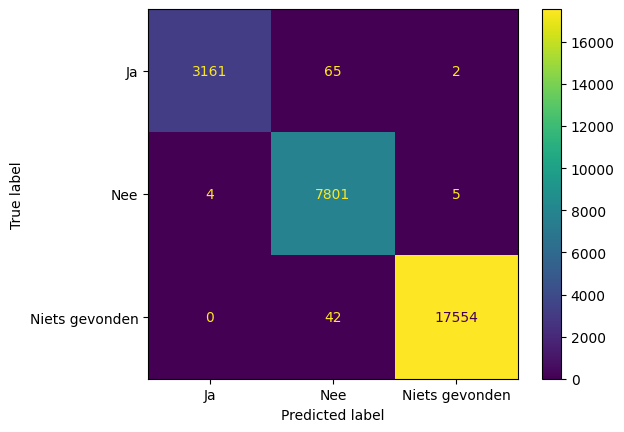

                precision    recall  f1-score   support

            Ja       1.00      0.98      0.99      3228
           Nee       0.99      1.00      0.99      7810
Niets gevonden       1.00      1.00      1.00     17596

      accuracy                           1.00     28634
     macro avg       0.99      0.99      0.99     28634
  weighted avg       1.00      1.00      1.00     28634



In [27]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [28]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.01, NNZs: 342, Bias: 0.000000, T: 68719, Avg. loss: 0.175721
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 148.50, NNZs: 143, Bias: 0.000000, T: 137438, Avg. loss: 0.122661
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 178.01, NNZs: 115, Bias: 0.000000, T: 206157, Avg. loss: 0.109726
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 202.64, NNZs: 101, Bias: 0.000000, T: 274876, Avg. loss: 0.102184
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 224.36, NNZs: 92, Bias: 0.000000, T: 343595, Avg. loss: 0.097069
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 243.84, NNZs: 84, Bias: 0.000000, T: 412314, Avg. loss: 0.093144
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 247.42, NNZs: 84, Bias: 0.000000, T: 481033, Avg. loss: 0.091318
Total training time: 2.64 seconds.
-- Epoch 8
Norm: 250.92, NNZs: 83, Bias: 0.000000, T: 549752, Avg. loss: 0.090633
Total training time: 3.02 seconds.
-- Epoch 9
Norm: 254.35, NNZs: 83, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Norm: 128.24, NNZs: 460, Bias: 0.000000, T: 68719, Avg. loss: 0.241590
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 175.98, NNZs: 179, Bias: 0.000000, T: 137438, Avg. loss: 0.160384
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 211.40, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.139723
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 240.63, NNZs: 117, Bias: 0.000000, T: 274876, Avg. loss: 0.128109
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 265.94, NNZs: 104, Bias: 0.000000, T: 343595, Avg. loss: 0.120246
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 288.68, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.114727
Total training time: 2.29 seconds.
-- Epoch 7
Norm: 292.76, NNZs: 98, Bias: 0.000000, T: 481033, Avg. loss: 0.111709
Total training time: 2.66 seconds.
-- Epoch 8
Norm: 296.78, NNZs: 96, Bias: 0.000000, T: 549752, Avg. loss: 0.111013
Total training time: 3.07 seconds.
-- Epoch 9
Norm: 300.74, NNZs: 94, Bias: 0.000000, T: 618471, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


Norm: 120.54, NNZs: 470, Bias: 0.000000, T: 68719, Avg. loss: 0.179613
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 164.29, NNZs: 184, Bias: 0.000000, T: 137438, Avg. loss: 0.120721
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 197.26, NNZs: 157, Bias: 0.000000, T: 206157, Avg. loss: 0.104890
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 224.80, NNZs: 143, Bias: 0.000000, T: 274876, Avg. loss: 0.096196
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 248.83, NNZs: 126, Bias: 0.000000, T: 343595, Avg. loss: 0.090699
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 270.38, NNZs: 111, Bias: 0.000000, T: 412314, Avg. loss: 0.086269
Total training time: 2.21 seconds.
-- Epoch 7
Norm: 274.30, NNZs: 107, Bias: 0.000000, T: 481033, Avg. loss: 0.084102
Total training time: 2.60 seconds.
-- Epoch 8
Norm: 278.16, NNZs: 107, Bias: 0.000000, T: 549752, Avg. loss: 0.083428
Total training time: 3.02 seconds.
-- Epoch 9
Norm: 281.95, NNZs: 103, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.134 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.06, NNZs: 371, Bias: 0.000000, T: 68719, Avg. loss: 0.175006
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 148.33, NNZs: 140, Bias: 0.000000, T: 137438, Avg. loss: 0.123115
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 177.57, NNZs: 113, Bias: 0.000000, T: 206157, Avg. loss: 0.110266
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 202.20, NNZs: 101, Bias: 0.000000, T: 274876, Avg. loss: 0.102897
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 223.76, NNZs: 92, Bias: 0.000000, T: 343595, Avg. loss: 0.097721
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 243.30, NNZs: 84, Bias: 0.000000, T: 412314, Avg. loss: 0.093850
Total training time: 2.19 seconds.
-- Epoch 7
Norm: 246.77, NNZs: 83, Bias: 0.000000, T: 481033, Avg. loss: 0.091786
Total training time: 2.56 seconds.
-- Epoch 8
Norm: 250.23, NNZs: 82, Bias: 0.000000, T: 549752, Avg. loss: 0.091346
Total training time: 2.91 seconds.
-- Epoch 9
Norm: 253.64, NNZs: 81, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


Norm: 128.08, NNZs: 454, Bias: 0.000000, T: 68719, Avg. loss: 0.241743
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 175.67, NNZs: 176, Bias: 0.000000, T: 137438, Avg. loss: 0.160575
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 210.98, NNZs: 138, Bias: 0.000000, T: 206157, Avg. loss: 0.140195
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 240.11, NNZs: 119, Bias: 0.000000, T: 274876, Avg. loss: 0.128606
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 265.38, NNZs: 106, Bias: 0.000000, T: 343595, Avg. loss: 0.120976
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 288.00, NNZs: 101, Bias: 0.000000, T: 412314, Avg. loss: 0.115594
Total training time: 2.47 seconds.
-- Epoch 7
Norm: 292.08, NNZs: 101, Bias: 0.000000, T: 481033, Avg. loss: 0.112919
Total training time: 2.88 seconds.
-- Epoch 8
Norm: 296.10, NNZs: 99, Bias: 0.000000, T: 549752, Avg. loss: 0.112153
Total training time: 3.32 seconds.
-- Epoch 9
Norm: 300.04, NNZs: 98, Bias: 0.000000, T: 618471, Avg. lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s


Norm: 120.45, NNZs: 466, Bias: 0.000000, T: 68719, Avg. loss: 0.178973
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 163.97, NNZs: 196, Bias: 0.000000, T: 137438, Avg. loss: 0.120699
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 197.04, NNZs: 156, Bias: 0.000000, T: 206157, Avg. loss: 0.105226
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 224.46, NNZs: 138, Bias: 0.000000, T: 274876, Avg. loss: 0.096661
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 248.42, NNZs: 124, Bias: 0.000000, T: 343595, Avg. loss: 0.091160
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 269.90, NNZs: 107, Bias: 0.000000, T: 412314, Avg. loss: 0.086800
Total training time: 2.29 seconds.
-- Epoch 7
Norm: 273.82, NNZs: 101, Bias: 0.000000, T: 481033, Avg. loss: 0.084581
Total training time: 2.67 seconds.
-- Epoch 8
Norm: 277.68, NNZs: 100, Bias: 0.000000, T: 549752, Avg. loss: 0.083819
Total training time: 3.06 seconds.
-- Epoch 9
Norm: 281.47, NNZs: 99, Bias: 0.000000, T: 618471, Avg. l

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.128 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.21, NNZs: 361, Bias: 0.000000, T: 68719, Avg. loss: 0.175109
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 148.26, NNZs: 137, Bias: 0.000000, T: 137438, Avg. loss: 0.122852
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 177.66, NNZs: 112, Bias: 0.000000, T: 206157, Avg. loss: 0.110119
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 202.24, NNZs: 104, Bias: 0.000000, T: 274876, Avg. loss: 0.102801
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 223.97, NNZs: 94, Bias: 0.000000, T: 343595, Avg. loss: 0.097659
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 243.52, NNZs: 91, Bias: 0.000000, T: 412314, Avg. loss: 0.093791
Total training time: 2.30 seconds.
-- Epoch 7
Norm: 247.04, NNZs: 89, Bias: 0.000000, T: 481033, Avg. loss: 0.091662
Total training time: 2.68 seconds.
-- Epoch 8
Norm: 250.49, NNZs: 87, Bias: 0.000000, T: 549752, Avg. loss: 0.091134
Total training time: 3.04 seconds.
-- Epoch 9
Norm: 253.90, NNZs: 85, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Norm: 128.24, NNZs: 455, Bias: 0.000000, T: 68719, Avg. loss: 0.241349
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 175.94, NNZs: 172, Bias: 0.000000, T: 137438, Avg. loss: 0.160248
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 211.25, NNZs: 135, Bias: 0.000000, T: 206157, Avg. loss: 0.139384
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 240.41, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.127896
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 265.73, NNZs: 108, Bias: 0.000000, T: 343595, Avg. loss: 0.120393
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 288.37, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.114830
Total training time: 2.45 seconds.
-- Epoch 7
Norm: 292.44, NNZs: 98, Bias: 0.000000, T: 481033, Avg. loss: 0.112137
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 296.45, NNZs: 98, Bias: 0.000000, T: 549752, Avg. loss: 0.111258
Total training time: 3.25 seconds.
-- Epoch 9
Norm: 300.40, NNZs: 97, Bias: 0.000000, T: 618471, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


Norm: 120.62, NNZs: 468, Bias: 0.000000, T: 68719, Avg. loss: 0.179639
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 164.28, NNZs: 191, Bias: 0.000000, T: 137438, Avg. loss: 0.120865
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 197.32, NNZs: 157, Bias: 0.000000, T: 206157, Avg. loss: 0.105305
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 224.91, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.096709
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 248.91, NNZs: 123, Bias: 0.000000, T: 343595, Avg. loss: 0.090851
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 270.43, NNZs: 108, Bias: 0.000000, T: 412314, Avg. loss: 0.086574
Total training time: 2.45 seconds.
-- Epoch 7
Norm: 274.36, NNZs: 106, Bias: 0.000000, T: 481033, Avg. loss: 0.084286
Total training time: 2.86 seconds.
-- Epoch 8
Norm: 278.21, NNZs: 105, Bias: 0.000000, T: 549752, Avg. loss: 0.083574
Total training time: 3.26 seconds.
-- Epoch 9
Norm: 282.01, NNZs: 105, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.135 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.10, NNZs: 387, Bias: 0.000000, T: 68720, Avg. loss: 0.176214
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 148.51, NNZs: 140, Bias: 0.000000, T: 137440, Avg. loss: 0.123743
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 177.92, NNZs: 113, Bias: 0.000000, T: 206160, Avg. loss: 0.110766
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 202.51, NNZs: 103, Bias: 0.000000, T: 274880, Avg. loss: 0.103115
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 224.16, NNZs: 93, Bias: 0.000000, T: 343600, Avg. loss: 0.097876
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 243.85, NNZs: 88, Bias: 0.000000, T: 412320, Avg. loss: 0.094027
Total training time: 2.34 seconds.
-- Epoch 7
Norm: 247.32, NNZs: 87, Bias: 0.000000, T: 481040, Avg. loss: 0.091900
Total training time: 2.75 seconds.
-- Epoch 8
Norm: 250.77, NNZs: 83, Bias: 0.000000, T: 549760, Avg. loss: 0.091412
Total training time: 3.14 seconds.
-- Epoch 9
Norm: 254.19, NNZs: 83, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


Norm: 128.01, NNZs: 455, Bias: 0.000000, T: 68720, Avg. loss: 0.242530
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 175.93, NNZs: 171, Bias: 0.000000, T: 137440, Avg. loss: 0.161407
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 211.20, NNZs: 137, Bias: 0.000000, T: 206160, Avg. loss: 0.140409
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 240.41, NNZs: 122, Bias: 0.000000, T: 274880, Avg. loss: 0.128868
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 265.77, NNZs: 105, Bias: 0.000000, T: 343600, Avg. loss: 0.121270
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 288.44, NNZs: 97, Bias: 0.000000, T: 412320, Avg. loss: 0.115600
Total training time: 2.40 seconds.
-- Epoch 7
Norm: 292.52, NNZs: 96, Bias: 0.000000, T: 481040, Avg. loss: 0.112684
Total training time: 2.79 seconds.
-- Epoch 8
Norm: 296.53, NNZs: 96, Bias: 0.000000, T: 549760, Avg. loss: 0.111852
Total training time: 3.18 seconds.
-- Epoch 9
Norm: 300.49, NNZs: 94, Bias: 0.000000, T: 618480, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.9s remaining:    0.0s


Norm: 120.49, NNZs: 464, Bias: 0.000000, T: 68720, Avg. loss: 0.180252
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 164.34, NNZs: 189, Bias: 0.000000, T: 137440, Avg. loss: 0.121714
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 197.34, NNZs: 160, Bias: 0.000000, T: 206160, Avg. loss: 0.105964
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 224.91, NNZs: 140, Bias: 0.000000, T: 274880, Avg. loss: 0.097284
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 248.97, NNZs: 124, Bias: 0.000000, T: 343600, Avg. loss: 0.091572
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 270.49, NNZs: 110, Bias: 0.000000, T: 412320, Avg. loss: 0.087168
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 274.43, NNZs: 109, Bias: 0.000000, T: 481040, Avg. loss: 0.085055
Total training time: 2.62 seconds.
-- Epoch 8
Norm: 278.29, NNZs: 106, Bias: 0.000000, T: 549760, Avg. loss: 0.084367
Total training time: 2.98 seconds.
-- Epoch 9
Norm: 282.09, NNZs: 102, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.132 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.22, NNZs: 368, Bias: 0.000000, T: 68720, Avg. loss: 0.176024
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 148.69, NNZs: 144, Bias: 0.000000, T: 137440, Avg. loss: 0.123688
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 178.20, NNZs: 115, Bias: 0.000000, T: 206160, Avg. loss: 0.110584
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 202.91, NNZs: 100, Bias: 0.000000, T: 274880, Avg. loss: 0.102816
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 224.75, NNZs: 90, Bias: 0.000000, T: 343600, Avg. loss: 0.097521
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 244.47, NNZs: 85, Bias: 0.000000, T: 412320, Avg. loss: 0.093575
Total training time: 2.13 seconds.
-- Epoch 7
Norm: 248.00, NNZs: 84, Bias: 0.000000, T: 481040, Avg. loss: 0.091487
Total training time: 2.49 seconds.
-- Epoch 8
Norm: 251.49, NNZs: 84, Bias: 0.000000, T: 549760, Avg. loss: 0.090907
Total training time: 2.84 seconds.
-- Epoch 9
Norm: 254.94, NNZs: 82, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


Norm: 128.13, NNZs: 449, Bias: 0.000000, T: 68720, Avg. loss: 0.241813
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 175.79, NNZs: 176, Bias: 0.000000, T: 137440, Avg. loss: 0.161114
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 211.12, NNZs: 139, Bias: 0.000000, T: 206160, Avg. loss: 0.140323
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 240.34, NNZs: 118, Bias: 0.000000, T: 274880, Avg. loss: 0.128632
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 265.66, NNZs: 104, Bias: 0.000000, T: 343600, Avg. loss: 0.121001
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 288.38, NNZs: 96, Bias: 0.000000, T: 412320, Avg. loss: 0.115505
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 292.47, NNZs: 96, Bias: 0.000000, T: 481040, Avg. loss: 0.112553
Total training time: 2.82 seconds.
-- Epoch 8
Norm: 296.49, NNZs: 95, Bias: 0.000000, T: 549760, Avg. loss: 0.111777
Total training time: 3.23 seconds.
-- Epoch 9
Norm: 300.45, NNZs: 94, Bias: 0.000000, T: 618480, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s remaining:    0.0s


Norm: 120.58, NNZs: 483, Bias: 0.000000, T: 68720, Avg. loss: 0.178737
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 164.16, NNZs: 187, Bias: 0.000000, T: 137440, Avg. loss: 0.120481
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 197.22, NNZs: 161, Bias: 0.000000, T: 206160, Avg. loss: 0.104939
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 224.76, NNZs: 136, Bias: 0.000000, T: 274880, Avg. loss: 0.096365
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 248.80, NNZs: 121, Bias: 0.000000, T: 343600, Avg. loss: 0.090616
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 270.29, NNZs: 107, Bias: 0.000000, T: 412320, Avg. loss: 0.086210
Total training time: 2.21 seconds.
-- Epoch 7
Norm: 274.21, NNZs: 105, Bias: 0.000000, T: 481040, Avg. loss: 0.083944
Total training time: 2.55 seconds.
-- Epoch 8
Norm: 278.06, NNZs: 102, Bias: 0.000000, T: 549760, Avg. loss: 0.083294
Total training time: 2.91 seconds.
-- Epoch 9
Norm: 281.86, NNZs: 99, Bias: 0.000000, T: 618480, Avg. l

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.134 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 124998626694650.30, NNZs: 382348, Bias: 0.000000, T: 68719, Avg. loss: 159744325982215030702080.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 118065893597168.56, NNZs: 382352, Bias: 0.000000, T: 137438, Avg. loss: 135221538465627825504256.000000
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 114547777421134.84, NNZs: 382352, Bias: 0.000000, T: 206157, Avg. loss: 112165357647250023514112.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 112232376712608.52, NNZs: 382352, Bias: 0.000000, T: 274876, Avg. loss: 101517932124006699237376.000000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 110522604727957.08, NNZs: 382352, Bias: 0.000000, T: 343595, Avg. loss: 94911405925062309576704.000000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 109175672727840.78, NNZs: 382352, Bias: 0.000000, T: 412314, Avg. loss: 90280482622936530812928.000000
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 128027342786237.69, NNZs: 382352, Bias: 0.000000, T: 68719, Avg. loss: 172047632538139522760704.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 120900124231423.62, NNZs: 382352, Bias: 0.000000, T: 137438, Avg. loss: 143685733385212339945472.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 117297685117553.88, NNZs: 382352, Bias: 0.000000, T: 206157, Avg. loss: 119001534667730532171776.000000
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 114922022059879.25, NNZs: 382352, Bias: 0.000000, T: 274876, Avg. loss: 107679434453059329064960.000000
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 113170656924284.55, NNZs: 382352, Bias: 0.000000, T: 343595, Avg. loss: 100632576002496500072448.000000
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 111793145273944.00, NNZs: 382352, Bias: 0.000000, T: 412314, Avg. loss: 95661633218917848580096.000000
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 99452317227851.16, NNZs: 382349, Bias: 0.000000, T: 68719, Avg. loss: 98180287931037742268416.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 93264765788959.62, NNZs: 382352, Bias: 0.000000, T: 137438, Avg. loss: 82877652473585049010176.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 90101024672495.77, NNZs: 382352, Bias: 0.000000, T: 206157, Avg. loss: 67522776424636529770496.000000
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 88011025576421.91, NNZs: 382352, Bias: 0.000000, T: 274876, Avg. loss: 60459760409639450050560.000000
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 86466839904721.22, NNZs: 382352, Bias: 0.000000, T: 343595, Avg. loss: 56164687260511908134912.000000
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 85247860689028.42, NNZs: 382352, Bias: 0.000000, T: 412314, Avg. loss: 53119403094056158363648.000000
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.92 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.297 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 126295979747536.33, NNZs: 382659, Bias: 0.000000, T: 68719, Avg. loss: 164228031800211033554944.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 119284035817346.47, NNZs: 382659, Bias: 0.000000, T: 137438, Avg. loss: 138840975571297601847296.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 115721627617979.33, NNZs: 382659, Bias: 0.000000, T: 206157, Avg. loss: 115121496390345691234304.000000
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 113375344305951.58, NNZs: 382659, Bias: 0.000000, T: 274876, Avg. loss: 104096642780706300231680.000000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 111643359630604.09, NNZs: 382659, Bias: 0.000000, T: 343595, Avg. loss: 97345695959568753885184.000000
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 110279380119148.06, NNZs: 382659, Bias: 0.000000, T: 412314, Avg. loss: 92585251679682607185920.000000
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 132473536182566.41, NNZs: 382659, Bias: 0.000000, T: 68719, Avg. loss: 175860986328357265211392.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 125378791923101.11, NNZs: 382659, Bias: 0.000000, T: 137438, Avg. loss: 153565188965770622664704.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 121775874826676.41, NNZs: 382659, Bias: 0.000000, T: 206157, Avg. loss: 127986531257680853467136.000000
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 119401755107448.14, NNZs: 382659, Bias: 0.000000, T: 274876, Avg. loss: 116206048084520591163392.000000
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 117649651878325.73, NNZs: 382659, Bias: 0.000000, T: 343595, Avg. loss: 108905154312844756385792.000000
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 116270300089227.88, NNZs: 382659, Bias: 0.000000, T: 412314, Avg. loss: 103734853784912261021696.000000
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 111698437823144.73, NNZs: 382656, Bias: 0.000000, T: 68719, Avg. loss: 127571519899568688857088.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 105131106610173.22, NNZs: 382659, Bias: 0.000000, T: 137438, Avg. loss: 106607311898840295014400.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 101783546681592.75, NNZs: 382659, Bias: 0.000000, T: 206157, Avg. loss: 87571984156799921029120.000000
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 99578700031255.20, NNZs: 382659, Bias: 0.000000, T: 274876, Avg. loss: 78811082168165667438592.000000
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 97950995691115.06, NNZs: 382659, Bias: 0.000000, T: 343595, Avg. loss: 73465034991672420728832.000000
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 96667265165954.50, NNZs: 382659, Bias: 0.000000, T: 412314, Avg. loss: 69654767630468486529024.000000
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.00 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.295 total time=  49.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128005531635595.30, NNZs: 382622, Bias: 0.000000, T: 68719, Avg. loss: 168674211304537946324992.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 120980166043848.52, NNZs: 382622, Bias: 0.000000, T: 137438, Avg. loss: 142729916970580387561472.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 117404983587813.50, NNZs: 382622, Bias: 0.000000, T: 206157, Avg. loss: 118659310370137755877376.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 115053833543360.52, NNZs: 382622, Bias: 0.000000, T: 274876, Avg. loss: 107324219681454589739008.000000
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 113318941231937.86, NNZs: 382622, Bias: 0.000000, T: 343595, Avg. loss: 100385303755878024871936.000000
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 111952148732672.69, NNZs: 382622, Bias: 0.000000, T: 412314, Avg. loss: 95510441481233493917696.000000
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 126617495783918.31, NNZs: 382622, Bias: 0.000000, T: 68719, Avg. loss: 165368040361649065951232.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 119622215882366.58, NNZs: 382622, Bias: 0.000000, T: 137438, Avg. loss: 139476478864305655119872.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 116063403735507.31, NNZs: 382622, Bias: 0.000000, T: 206157, Avg. loss: 115717067621332888322048.000000
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 113717828143413.67, NNZs: 382622, Bias: 0.000000, T: 274876, Avg. loss: 104774006792488004616192.000000
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 111989215980087.84, NNZs: 382622, Bias: 0.000000, T: 343595, Avg. loss: 97902401982684828008448.000000
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 110626103153631.81, NNZs: 382622, Bias: 0.000000, T: 412314, Avg. loss: 93088105304529355931648.000000
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 131844838442748.36, NNZs: 382622, Bias: 0.000000, T: 68719, Avg. loss: 182023041364101901058048.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 124667400523268.48, NNZs: 382622, Bias: 0.000000, T: 137438, Avg. loss: 152235829021861809750016.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 121009736744607.80, NNZs: 382622, Bias: 0.000000, T: 206157, Avg. loss: 126260116757793455734784.000000
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 118608189913978.27, NNZs: 382622, Bias: 0.000000, T: 274876, Avg. loss: 114286844751508926365696.000000
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 116837891549130.52, NNZs: 382622, Bias: 0.000000, T: 343595, Avg. loss: 106862971999749756944384.000000
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 115444267198339.75, NNZs: 382622, Bias: 0.000000, T: 412314, Avg. loss: 101707967597008354541568.000000
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.98 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.304 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 135258043213711.22, NNZs: 382909, Bias: 0.000000, T: 68720, Avg. loss: 191645892587240946663424.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 127949765018294.14, NNZs: 382909, Bias: 0.000000, T: 137440, Avg. loss: 161275645484562015846400.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 124236066763985.88, NNZs: 382909, Bias: 0.000000, T: 206160, Avg. loss: 134158159013500243935232.000000
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 121800368733690.70, NNZs: 382909, Bias: 0.000000, T: 274880, Avg. loss: 121579921639302712262656.000000
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 120000530600908.72, NNZs: 382909, Bias: 0.000000, T: 343600, Avg. loss: 113809305618796303613952.000000
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 118583907962728.67, NNZs: 382909, Bias: 0.000000, T: 412320, Avg. loss: 108353679788319673679872.000000
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 125482763420755.48, NNZs: 382908, Bias: 0.000000, T: 68720, Avg. loss: 166135620304274068602880.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 118426834224423.14, NNZs: 382909, Bias: 0.000000, T: 137440, Avg. loss: 136970582967751993720832.000000
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 114846094452355.44, NNZs: 382909, Bias: 0.000000, T: 206160, Avg. loss: 113280155186407114014720.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 112485609679545.02, NNZs: 382909, Bias: 0.000000, T: 274880, Avg. loss: 102271986324555308204032.000000
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 110746818162509.42, NNZs: 382909, Bias: 0.000000, T: 343600, Avg. loss: 95479501793544282046464.000000
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 109375856525411.62, NNZs: 382909, Bias: 0.000000, T: 412320, Avg. loss: 90714600731838815141888.000000
Total training time: 1.96 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 105299427063045.30, NNZs: 382905, Bias: 0.000000, T: 68720, Avg. loss: 112778363736271137800192.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 98900129748517.48, NNZs: 382909, Bias: 0.000000, T: 137440, Avg. loss: 93039028172836982226944.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 95638045625182.14, NNZs: 382909, Bias: 0.000000, T: 206160, Avg. loss: 76069352244586821451776.000000
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 93486315953963.67, NNZs: 382909, Bias: 0.000000, T: 274880, Avg. loss: 68204020693160540766208.000000
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 91894791112801.00, NNZs: 382909, Bias: 0.000000, T: 343600, Avg. loss: 63434395420936873443328.000000
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 90640116424991.16, NNZs: 382909, Bias: 0.000000, T: 412320, Avg. loss: 60042106750178028421120.000000
Total training time: 1.96 seconds.
Convergence after 6 epochs took 1.99 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.293 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131096163309955.84, NNZs: 383171, Bias: 0.000000, T: 68720, Avg. loss: 181128109974440575500288.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 123902137581774.78, NNZs: 383171, Bias: 0.000000, T: 137440, Avg. loss: 151588732784013704429568.000000
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 120240749718236.39, NNZs: 383171, Bias: 0.000000, T: 206160, Avg. loss: 125729925876252699262976.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 117839438495472.22, NNZs: 383171, Bias: 0.000000, T: 274880, Avg. loss: 113735500211570299895808.000000
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 116068719793006.39, NNZs: 383171, Bias: 0.000000, T: 343600, Avg. loss: 106307117036026002931712.000000
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 114675490037683.86, NNZs: 383171, Bias: 0.000000, T: 412320, Avg. loss: 101084230704754619056128.000000
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 126908349162052.42, NNZs: 383169, Bias: 0.000000, T: 68720, Avg. loss: 168195161237578649174016.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 119851684070702.45, NNZs: 383171, Bias: 0.000000, T: 137440, Avg. loss: 141677016699104711933952.000000
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 116271413887787.89, NNZs: 383171, Bias: 0.000000, T: 206160, Avg. loss: 117266489611618288140288.000000
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 113919553301892.28, NNZs: 383171, Bias: 0.000000, T: 274880, Avg. loss: 106046648025574522486784.000000
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 112181860954197.45, NNZs: 383171, Bias: 0.000000, T: 343600, Avg. loss: 99102492418454851682304.000000
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 110815175808712.97, NNZs: 383171, Bias: 0.000000, T: 412320, Avg. loss: 94251596242591951093760.000000
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 107275494234579.62, NNZs: 383170, Bias: 0.000000, T: 68720, Avg. loss: 116747829593981241524224.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 100850493326928.09, NNZs: 383171, Bias: 0.000000, T: 137440, Avg. loss: 97101115425774515519488.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 97572210710280.48, NNZs: 383171, Bias: 0.000000, T: 206160, Avg. loss: 79609809947368861204480.000000
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 95408809657746.09, NNZs: 383171, Bias: 0.000000, T: 274880, Avg. loss: 71557542195336719630336.000000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 93809639433964.08, NNZs: 383171, Bias: 0.000000, T: 343600, Avg. loss: 66612539480644576608256.000000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 92548802816082.12, NNZs: 383171, Bias: 0.000000, T: 412320, Avg. loss: 63116934490737612947456.000000
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.96 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.298 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132.04, NNZs: 478, Bias: 0.000000, T: 68719, Avg. loss: 0.065610
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 170.50, NNZs: 186, Bias: 0.000000, T: 137438, Avg. loss: 0.035175
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 198.70, NNZs: 166, Bias: 0.000000, T: 206157, Avg. loss: 0.030616
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 222.08, NNZs: 155, Bias: 0.000000, T: 274876, Avg. loss: 0.027746
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 242.32, NNZs: 151, Bias: 0.000000, T: 343595, Avg. loss: 0.026570
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 260.67, NNZs: 147, Bias: 0.000000, T: 412314, Avg. loss: 0.025758
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 159.65, NNZs: 649, Bias: 0.000000, T: 68719, Avg. loss: 0.093648
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 203.73, NNZs: 205, Bias: 0.000000, T: 137438, Avg. loss: 0.047600
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 235.51, NNZs: 186, Bias: 0.000000, T: 206157, Avg. loss: 0.040092
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 261.67, NNZs: 164, Bias: 0.000000, T: 274876, Avg. loss: 0.036931
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 284.65, NNZs: 164, Bias: 0.000000, T: 343595, Avg. loss: 0.035115
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 305.21, NNZs: 149, Bias: 0.000000, T: 412314, Avg. loss: 0.033876
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.57 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 136.45, NNZs: 591, Bias: 0.000000, T: 68719, Avg. loss: 0.060887
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 175.12, NNZs: 178, Bias: 0.000000, T: 137438, Avg. loss: 0.031408
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 202.80, NNZs: 150, Bias: 0.000000, T: 206157, Avg. loss: 0.025594
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 225.44, NNZs: 134, Bias: 0.000000, T: 274876, Avg. loss: 0.022942
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 244.94, NNZs: 131, Bias: 0.000000, T: 343595, Avg. loss: 0.021112
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 262.35, NNZs: 128, Bias: 0.000000, T: 412314, Avg. loss: 0.019965
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.52 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132.14, NNZs: 512, Bias: 0.000000, T: 68719, Avg. loss: 0.065666
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 170.55, NNZs: 181, Bias: 0.000000, T: 137438, Avg. loss: 0.035581
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 198.55, NNZs: 165, Bias: 0.000000, T: 206157, Avg. loss: 0.029723
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 221.83, NNZs: 155, Bias: 0.000000, T: 274876, Avg. loss: 0.027834
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 241.98, NNZs: 140, Bias: 0.000000, T: 343595, Avg. loss: 0.026611
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 260.30, NNZs: 139, Bias: 0.000000, T: 412314, Avg. loss: 0.025121
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 159.75, NNZs: 683, Bias: 0.000000, T: 68719, Avg. loss: 0.093461
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 203.90, NNZs: 210, Bias: 0.000000, T: 137438, Avg. loss: 0.048018
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 235.79, NNZs: 175, Bias: 0.000000, T: 206157, Avg. loss: 0.040318
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 262.24, NNZs: 178, Bias: 0.000000, T: 274876, Avg. loss: 0.037532
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 285.23, NNZs: 166, Bias: 0.000000, T: 343595, Avg. loss: 0.035510
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 305.92, NNZs: 160, Bias: 0.000000, T: 412314, Avg. loss: 0.034216
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 136.57, NNZs: 601, Bias: 0.000000, T: 68719, Avg. loss: 0.061090
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 175.12, NNZs: 183, Bias: 0.000000, T: 137438, Avg. loss: 0.031483
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 203.09, NNZs: 159, Bias: 0.000000, T: 206157, Avg. loss: 0.026060
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 225.90, NNZs: 146, Bias: 0.000000, T: 274876, Avg. loss: 0.023083
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 245.52, NNZs: 133, Bias: 0.000000, T: 343595, Avg. loss: 0.021351
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 263.03, NNZs: 127, Bias: 0.000000, T: 412314, Avg. loss: 0.020274
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.57 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.996 total time=  49.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.42, NNZs: 522, Bias: 0.000000, T: 68719, Avg. loss: 0.064997
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 169.97, NNZs: 184, Bias: 0.000000, T: 137438, Avg. loss: 0.034855
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 198.03, NNZs: 170, Bias: 0.000000, T: 206157, Avg. loss: 0.029964
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 221.37, NNZs: 151, Bias: 0.000000, T: 274876, Avg. loss: 0.027899
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 241.62, NNZs: 141, Bias: 0.000000, T: 343595, Avg. loss: 0.026269
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 259.89, NNZs: 143, Bias: 0.000000, T: 412314, Avg. loss: 0.025558
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 159.75, NNZs: 774, Bias: 0.000000, T: 68719, Avg. loss: 0.093100
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 203.74, NNZs: 208, Bias: 0.000000, T: 137438, Avg. loss: 0.047724
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 235.59, NNZs: 184, Bias: 0.000000, T: 206157, Avg. loss: 0.039780
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 261.85, NNZs: 172, Bias: 0.000000, T: 274876, Avg. loss: 0.036906
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 284.70, NNZs: 162, Bias: 0.000000, T: 343595, Avg. loss: 0.034956
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 305.36, NNZs: 154, Bias: 0.000000, T: 412314, Avg. loss: 0.033645
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 137.31, NNZs: 562, Bias: 0.000000, T: 68719, Avg. loss: 0.062078
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 175.86, NNZs: 185, Bias: 0.000000, T: 137438, Avg. loss: 0.031440
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 203.77, NNZs: 155, Bias: 0.000000, T: 206157, Avg. loss: 0.025995
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 226.51, NNZs: 145, Bias: 0.000000, T: 274876, Avg. loss: 0.023099
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 246.06, NNZs: 132, Bias: 0.000000, T: 343595, Avg. loss: 0.021278
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 263.43, NNZs: 132, Bias: 0.000000, T: 412314, Avg. loss: 0.019986
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  50.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132.06, NNZs: 502, Bias: 0.000000, T: 68720, Avg. loss: 0.065489
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 170.43, NNZs: 187, Bias: 0.000000, T: 137440, Avg. loss: 0.035101
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 198.54, NNZs: 166, Bias: 0.000000, T: 206160, Avg. loss: 0.029867
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 221.70, NNZs: 150, Bias: 0.000000, T: 274880, Avg. loss: 0.027907
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 241.99, NNZs: 146, Bias: 0.000000, T: 343600, Avg. loss: 0.026661
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 260.15, NNZs: 134, Bias: 0.000000, T: 412320, Avg. loss: 0.025883
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 160.18, NNZs: 758, Bias: 0.000000, T: 68720, Avg. loss: 0.093495
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 204.26, NNZs: 218, Bias: 0.000000, T: 137440, Avg. loss: 0.047601
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 236.16, NNZs: 185, Bias: 0.000000, T: 206160, Avg. loss: 0.039726
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 262.30, NNZs: 170, Bias: 0.000000, T: 274880, Avg. loss: 0.036684
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 285.10, NNZs: 160, Bias: 0.000000, T: 343600, Avg. loss: 0.034413
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 305.66, NNZs: 149, Bias: 0.000000, T: 412320, Avg. loss: 0.033296
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 137.48, NNZs: 588, Bias: 0.000000, T: 68720, Avg. loss: 0.062307
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 176.19, NNZs: 192, Bias: 0.000000, T: 137440, Avg. loss: 0.031652
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 204.21, NNZs: 156, Bias: 0.000000, T: 206160, Avg. loss: 0.026189
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 226.99, NNZs: 145, Bias: 0.000000, T: 274880, Avg. loss: 0.023203
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 246.70, NNZs: 140, Bias: 0.000000, T: 343600, Avg. loss: 0.021485
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 264.15, NNZs: 131, Bias: 0.000000, T: 412320, Avg. loss: 0.020152
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.46 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.996 total time=  49.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132.08, NNZs: 487, Bias: 0.000000, T: 68720, Avg. loss: 0.065687
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 170.47, NNZs: 183, Bias: 0.000000, T: 137440, Avg. loss: 0.035156
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 198.60, NNZs: 161, Bias: 0.000000, T: 206160, Avg. loss: 0.029885
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 221.82, NNZs: 150, Bias: 0.000000, T: 274880, Avg. loss: 0.027409
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 242.06, NNZs: 143, Bias: 0.000000, T: 343600, Avg. loss: 0.026314
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 260.18, NNZs: 141, Bias: 0.000000, T: 412320, Avg. loss: 0.025161
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 159.80, NNZs: 685, Bias: 0.000000, T: 68720, Avg. loss: 0.093908
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 204.13, NNZs: 212, Bias: 0.000000, T: 137440, Avg. loss: 0.048420
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 236.23, NNZs: 182, Bias: 0.000000, T: 206160, Avg. loss: 0.040628
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 262.53, NNZs: 169, Bias: 0.000000, T: 274880, Avg. loss: 0.037515
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 285.54, NNZs: 164, Bias: 0.000000, T: 343600, Avg. loss: 0.035494
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 306.25, NNZs: 158, Bias: 0.000000, T: 412320, Avg. loss: 0.034596
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 137.28, NNZs: 598, Bias: 0.000000, T: 68720, Avg. loss: 0.062092
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 175.91, NNZs: 176, Bias: 0.000000, T: 137440, Avg. loss: 0.031676
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 203.81, NNZs: 149, Bias: 0.000000, T: 206160, Avg. loss: 0.026053
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 226.57, NNZs: 144, Bias: 0.000000, T: 274880, Avg. loss: 0.023249
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 246.16, NNZs: 134, Bias: 0.000000, T: 343600, Avg. loss: 0.021427
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 263.53, NNZs: 129, Bias: 0.000000, T: 412320, Avg. loss: 0.020030
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.49 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 79.94, NNZs: 494, Bias: 0.000000, T: 68719, Avg. loss: 0.072582
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 105.68, NNZs: 379, Bias: 0.000000, T: 137438, Avg. loss: 0.054932
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 124.76, NNZs: 354, Bias: 0.000000, T: 206157, Avg. loss: 0.052983
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 140.65, NNZs: 342, Bias: 0.000000, T: 274876, Avg. loss: 0.052212
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 154.65, NNZs: 332, Bias: 0.000000, T: 343595, Avg. loss: 0.051734
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 167.47, NNZs: 330, Bias: 0.000000, T: 412314, Avg. loss: 0.051663
Total training time: 1.99 seconds.
Convergence after 6 epochs took 2.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 71.00, NNZs: 498, Bias: 0.000000, T: 68719, Avg. loss: 0.112616
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 95.11, NNZs: 372, Bias: 0.000000, T: 137438, Avg. loss: 0.085114
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 112.79, NNZs: 344, Bias: 0.000000, T: 206157, Avg. loss: 0.080115
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 127.52, NNZs: 327, Bias: 0.000000, T: 274876, Avg. loss: 0.077921
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 140.34, NNZs: 318, Bias: 0.000000, T: 343595, Avg. loss: 0.076644
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 151.82, NNZs: 308, Bias: 0.000000, T: 412314, Avg. loss: 0.076032
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 51.02, NNZs: 381, Bias: 0.000000, T: 68719, Avg. loss: 0.110737
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 68.87, NNZs: 296, Bias: 0.000000, T: 137438, Avg. loss: 0.090989
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 82.57, NNZs: 270, Bias: 0.000000, T: 206157, Avg. loss: 0.087518
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 93.88, NNZs: 259, Bias: 0.000000, T: 274876, Avg. loss: 0.085932
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 103.77, NNZs: 251, Bias: 0.000000, T: 343595, Avg. loss: 0.085201
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 112.79, NNZs: 247, Bias: 0.000000, T: 412314, Avg. loss: 0.084649
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.94 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.26, NNZs: 490, Bias: 0.000000, T: 68719, Avg. loss: 0.073520
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 106.01, NNZs: 364, Bias: 0.000000, T: 137438, Avg. loss: 0.055321
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 125.34, NNZs: 341, Bias: 0.000000, T: 206157, Avg. loss: 0.053540
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 141.11, NNZs: 323, Bias: 0.000000, T: 274876, Avg. loss: 0.052595
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 155.43, NNZs: 323, Bias: 0.000000, T: 343595, Avg. loss: 0.052316
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 168.09, NNZs: 317, Bias: 0.000000, T: 412314, Avg. loss: 0.051912
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 71.38, NNZs: 484, Bias: 0.000000, T: 68719, Avg. loss: 0.112517
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 94.99, NNZs: 372, Bias: 0.000000, T: 137438, Avg. loss: 0.085192
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 113.00, NNZs: 336, Bias: 0.000000, T: 206157, Avg. loss: 0.080463
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 127.63, NNZs: 320, Bias: 0.000000, T: 274876, Avg. loss: 0.078228
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 140.50, NNZs: 319, Bias: 0.000000, T: 343595, Avg. loss: 0.077440
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 151.98, NNZs: 310, Bias: 0.000000, T: 412314, Avg. loss: 0.076753
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 51.15, NNZs: 371, Bias: 0.000000, T: 68719, Avg. loss: 0.110828
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 69.20, NNZs: 280, Bias: 0.000000, T: 137438, Avg. loss: 0.090912
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 82.77, NNZs: 263, Bias: 0.000000, T: 206157, Avg. loss: 0.087554
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 94.02, NNZs: 257, Bias: 0.000000, T: 274876, Avg. loss: 0.086297
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 103.97, NNZs: 248, Bias: 0.000000, T: 343595, Avg. loss: 0.085466
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 112.93, NNZs: 242, Bias: 0.000000, T: 412314, Avg. loss: 0.084985
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.00 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.029 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.06, NNZs: 480, Bias: 0.000000, T: 68719, Avg. loss: 0.072851
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 105.73, NNZs: 394, Bias: 0.000000, T: 137438, Avg. loss: 0.055085
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 124.66, NNZs: 356, Bias: 0.000000, T: 206157, Avg. loss: 0.053065
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 140.44, NNZs: 345, Bias: 0.000000, T: 274876, Avg. loss: 0.052488
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 154.73, NNZs: 331, Bias: 0.000000, T: 343595, Avg. loss: 0.051971
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 167.49, NNZs: 326, Bias: 0.000000, T: 412314, Avg. loss: 0.051908
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 71.16, NNZs: 486, Bias: 0.000000, T: 68719, Avg. loss: 0.111865
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 95.12, NNZs: 381, Bias: 0.000000, T: 137438, Avg. loss: 0.084298
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 112.82, NNZs: 338, Bias: 0.000000, T: 206157, Avg. loss: 0.079238
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 127.74, NNZs: 320, Bias: 0.000000, T: 274876, Avg. loss: 0.076890
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 140.75, NNZs: 309, Bias: 0.000000, T: 343595, Avg. loss: 0.075823
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 152.21, NNZs: 305, Bias: 0.000000, T: 412314, Avg. loss: 0.075158
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 51.11, NNZs: 372, Bias: 0.000000, T: 68719, Avg. loss: 0.110830
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 69.14, NNZs: 287, Bias: 0.000000, T: 137438, Avg. loss: 0.090842
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 82.68, NNZs: 268, Bias: 0.000000, T: 206157, Avg. loss: 0.087469
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 94.03, NNZs: 259, Bias: 0.000000, T: 274876, Avg. loss: 0.085925
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 103.91, NNZs: 258, Bias: 0.000000, T: 343595, Avg. loss: 0.085310
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 112.88, NNZs: 255, Bias: 0.000000, T: 412314, Avg. loss: 0.084653
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time=  48.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.29, NNZs: 478, Bias: 0.000000, T: 68720, Avg. loss: 0.072789
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 105.94, NNZs: 380, Bias: 0.000000, T: 137440, Avg. loss: 0.055110
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 124.90, NNZs: 357, Bias: 0.000000, T: 206160, Avg. loss: 0.053014
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 140.83, NNZs: 338, Bias: 0.000000, T: 274880, Avg. loss: 0.052481
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 155.14, NNZs: 339, Bias: 0.000000, T: 343600, Avg. loss: 0.052296
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 167.78, NNZs: 333, Bias: 0.000000, T: 412320, Avg. loss: 0.051662
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 71.25, NNZs: 477, Bias: 0.000000, T: 68720, Avg. loss: 0.112212
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 95.14, NNZs: 363, Bias: 0.000000, T: 137440, Avg. loss: 0.085612
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 113.01, NNZs: 331, Bias: 0.000000, T: 206160, Avg. loss: 0.080393
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 127.74, NNZs: 324, Bias: 0.000000, T: 274880, Avg. loss: 0.077951
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 140.59, NNZs: 302, Bias: 0.000000, T: 343600, Avg. loss: 0.077030
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 152.11, NNZs: 300, Bias: 0.000000, T: 412320, Avg. loss: 0.076390
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 51.01, NNZs: 381, Bias: 0.000000, T: 68720, Avg. loss: 0.111429
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 69.05, NNZs: 286, Bias: 0.000000, T: 137440, Avg. loss: 0.091704
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 82.61, NNZs: 262, Bias: 0.000000, T: 206160, Avg. loss: 0.087974
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 93.97, NNZs: 251, Bias: 0.000000, T: 274880, Avg. loss: 0.086649
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 103.92, NNZs: 246, Bias: 0.000000, T: 343600, Avg. loss: 0.085720
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 112.89, NNZs: 243, Bias: 0.000000, T: 412320, Avg. loss: 0.085526
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.77 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.15, NNZs: 481, Bias: 0.000000, T: 68720, Avg. loss: 0.073303
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 105.97, NNZs: 379, Bias: 0.000000, T: 137440, Avg. loss: 0.056187
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 125.24, NNZs: 348, Bias: 0.000000, T: 206160, Avg. loss: 0.054387
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 141.03, NNZs: 339, Bias: 0.000000, T: 274880, Avg. loss: 0.053492
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 155.50, NNZs: 324, Bias: 0.000000, T: 343600, Avg. loss: 0.053145
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 168.33, NNZs: 332, Bias: 0.000000, T: 412320, Avg. loss: 0.052913
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 71.33, NNZs: 492, Bias: 0.000000, T: 68720, Avg. loss: 0.112882
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 95.08, NNZs: 380, Bias: 0.000000, T: 137440, Avg. loss: 0.085564
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 113.13, NNZs: 348, Bias: 0.000000, T: 206160, Avg. loss: 0.081035
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 127.80, NNZs: 321, Bias: 0.000000, T: 274880, Avg. loss: 0.078423
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 140.54, NNZs: 319, Bias: 0.000000, T: 343600, Avg. loss: 0.077801
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 151.97, NNZs: 309, Bias: 0.000000, T: 412320, Avg. loss: 0.077259
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.77 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 51.26, NNZs: 368, Bias: 0.000000, T: 68720, Avg. loss: 0.111174
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 69.27, NNZs: 290, Bias: 0.000000, T: 137440, Avg. loss: 0.091259
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 82.93, NNZs: 266, Bias: 0.000000, T: 206160, Avg. loss: 0.088076
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 94.22, NNZs: 263, Bias: 0.000000, T: 274880, Avg. loss: 0.086627
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 104.03, NNZs: 250, Bias: 0.000000, T: 343600, Avg. loss: 0.085692
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 112.99, NNZs: 244, Bias: 0.000000, T: 412320, Avg. loss: 0.085400
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.85 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.030 total time=  48.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 653025, Bias: -0.410725, T: 68719, Avg. loss: 0.087628
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 653025, Bias: -0.470523, T: 137438, Avg. loss: 0.060753
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 653025, Bias: -0.503805, T: 206157, Avg. loss: 0.056493
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 653025, Bias: -0.526791, T: 274876, Avg. loss: 0.054386
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 653025, Bias: -0.544260, T: 343595, Avg. loss: 0.053043
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 4.42, NNZs: 653025, Bias: -0.558317, T: 412314, Avg. loss: 0.052068
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 3.67, NNZs: 653025, Bias: -0.331058, T: 68719, Avg. loss: 0.162374
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 4.35, NNZs: 653025, Bias: -0.412388, T: 137438, Avg. loss: 0.130017
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 653025, Bias: -0.452310, T: 206157, Avg. loss: 0.122340
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 653025, Bias: -0.478375, T: 274876, Avg. loss: 0.118294
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 5.09, NNZs: 653025, Bias: -0.497854, T: 343595, Avg. loss: 0.115468
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 5.27, NNZs: 653025, Bias: -0.513508, T: 412314, Avg. loss: 0.113249
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 4.32, NNZs: 653025, Bias: 0.223026, T: 68719, Avg. loss: 0.154269
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 2
Norm: 5.55, NNZs: 653025, Bias: 0.320141, T: 137438, Avg. loss: 0.117181
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 653025, Bias: 0.379649, T: 206157, Avg. loss: 0.101437
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 6.79, NNZs: 653025, Bias: 0.419269, T: 274876, Avg. loss: 0.092741
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 7.16, NNZs: 653025, Bias: 0.447188, T: 343595, Avg. loss: 0.087203
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 7.45, NNZs: 653025, Bias: 0.468090, T: 412314, Avg. loss: 0.083241
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.596 total time=  48.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.09, NNZs: 654425, Bias: -0.406163, T: 68719, Avg. loss: 0.088652
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 654425, Bias: -0.467373, T: 137438, Avg. loss: 0.061250
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 4.32, NNZs: 654425, Bias: -0.501507, T: 206157, Avg. loss: 0.056784
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 654425, Bias: -0.525036, T: 274876, Avg. loss: 0.054597
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 4.39, NNZs: 654425, Bias: -0.542883, T: 343595, Avg. loss: 0.053219
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 4.42, NNZs: 654425, Bias: -0.557210, T: 412314, Avg. loss: 0.052228
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 3.67, NNZs: 654425, Bias: -0.325509, T: 68719, Avg. loss: 0.162763
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 654425, Bias: -0.407329, T: 137438, Avg. loss: 0.130532
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 654425, Bias: -0.448343, T: 206157, Avg. loss: 0.122633
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 654425, Bias: -0.475167, T: 274876, Avg. loss: 0.118460
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 654425, Bias: -0.495169, T: 343595, Avg. loss: 0.115573
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 5.28, NNZs: 654425, Bias: -0.511195, T: 412314, Avg. loss: 0.113324
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.18 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 4.31, NNZs: 654425, Bias: 0.214549, T: 68719, Avg. loss: 0.154697
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 5.55, NNZs: 654425, Bias: 0.311932, T: 137438, Avg. loss: 0.117895
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 6.30, NNZs: 654425, Bias: 0.371773, T: 206157, Avg. loss: 0.102060
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 6.80, NNZs: 654425, Bias: 0.412086, T: 274876, Avg. loss: 0.093230
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 7.18, NNZs: 654425, Bias: 0.440774, T: 343595, Avg. loss: 0.087538
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 7.49, NNZs: 654425, Bias: 0.462342, T: 412314, Avg. loss: 0.083454
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.598 total time=  48.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 653923, Bias: -0.407622, T: 68719, Avg. loss: 0.088506
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 653923, Bias: -0.468707, T: 137438, Avg. loss: 0.060987
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 4.34, NNZs: 653923, Bias: -0.502680, T: 206157, Avg. loss: 0.056514
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 4.38, NNZs: 653923, Bias: -0.526095, T: 274876, Avg. loss: 0.054327
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 4.42, NNZs: 653923, Bias: -0.543860, T: 343595, Avg. loss: 0.052946
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 4.44, NNZs: 653923, Bias: -0.558128, T: 412314, Avg. loss: 0.051949
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 3.65, NNZs: 653923, Bias: -0.324632, T: 68719, Avg. loss: 0.163369
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 653923, Bias: -0.407474, T: 137438, Avg. loss: 0.130658
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 653923, Bias: -0.448684, T: 206157, Avg. loss: 0.122697
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 653923, Bias: -0.475538, T: 274876, Avg. loss: 0.118539
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 653923, Bias: -0.495509, T: 343595, Avg. loss: 0.115669
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 5.28, NNZs: 653923, Bias: -0.511492, T: 412314, Avg. loss: 0.113434
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 4.29, NNZs: 653923, Bias: 0.213841, T: 68719, Avg. loss: 0.155180
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 653923, Bias: 0.312002, T: 137438, Avg. loss: 0.118461
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 653923, Bias: 0.372593, T: 206157, Avg. loss: 0.102502
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 653923, Bias: 0.413352, T: 274876, Avg. loss: 0.093618
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 7.16, NNZs: 653923, Bias: 0.442296, T: 343595, Avg. loss: 0.087931
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 7.47, NNZs: 653923, Bias: 0.464025, T: 412314, Avg. loss: 0.083874
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.614 total time=  48.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 654350, Bias: -0.407435, T: 68720, Avg. loss: 0.088553
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 654350, Bias: -0.468549, T: 137440, Avg. loss: 0.061123
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 654350, Bias: -0.502627, T: 206160, Avg. loss: 0.056659
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 654350, Bias: -0.526143, T: 274880, Avg. loss: 0.054463
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 654350, Bias: -0.543992, T: 343600, Avg. loss: 0.053074
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 654350, Bias: -0.558329, T: 412320, Avg. loss: 0.052072
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1
Norm: 3.67, NNZs: 654350, Bias: -0.325276, T: 68720, Avg. loss: 0.163024
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 4.36, NNZs: 654350, Bias: -0.407850, T: 137440, Avg. loss: 0.130564
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.68, NNZs: 654350, Bias: -0.448952, T: 206160, Avg. loss: 0.122638
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 4.91, NNZs: 654350, Bias: -0.475785, T: 274880, Avg. loss: 0.118477
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 5.11, NNZs: 654350, Bias: -0.495781, T: 343600, Avg. loss: 0.115593
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 5.28, NNZs: 654350, Bias: -0.511803, T: 412320, Avg. loss: 0.113343
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 4.31, NNZs: 654350, Bias: 0.215192, T: 68720, Avg. loss: 0.154391
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.55, NNZs: 654350, Bias: 0.313536, T: 137440, Avg. loss: 0.117550
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 654350, Bias: 0.374002, T: 206160, Avg. loss: 0.101706
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 6.79, NNZs: 654350, Bias: 0.414640, T: 274880, Avg. loss: 0.092914
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 7.16, NNZs: 654350, Bias: 0.443529, T: 343600, Avg. loss: 0.087278
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 7.46, NNZs: 654350, Bias: 0.465246, T: 412320, Avg. loss: 0.083250
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.609 total time=  48.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.09, NNZs: 655201, Bias: -0.406702, T: 68720, Avg. loss: 0.088593
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 655201, Bias: -0.467828, T: 137440, Avg. loss: 0.061096
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 655201, Bias: -0.501896, T: 206160, Avg. loss: 0.056672
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 655201, Bias: -0.525386, T: 274880, Avg. loss: 0.054495
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 655201, Bias: -0.543207, T: 343600, Avg. loss: 0.053117
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 4.42, NNZs: 655201, Bias: -0.557524, T: 412320, Avg. loss: 0.052121
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1
Norm: 3.66, NNZs: 655201, Bias: -0.325757, T: 68720, Avg. loss: 0.163188
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.35, NNZs: 655201, Bias: -0.408577, T: 137440, Avg. loss: 0.130653
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 655201, Bias: -0.449658, T: 206160, Avg. loss: 0.122738
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 655201, Bias: -0.476514, T: 274880, Avg. loss: 0.118570
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 655201, Bias: -0.496545, T: 343600, Avg. loss: 0.115679
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 5.27, NNZs: 655201, Bias: -0.512612, T: 412320, Avg. loss: 0.113423
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 4.30, NNZs: 655201, Bias: 0.215354, T: 68720, Avg. loss: 0.154717
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 655201, Bias: 0.313941, T: 137440, Avg. loss: 0.118064
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 655201, Bias: 0.374681, T: 206160, Avg. loss: 0.102127
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 655201, Bias: 0.415486, T: 274880, Avg. loss: 0.093304
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 7.15, NNZs: 655201, Bias: 0.444449, T: 343600, Avg. loss: 0.087670
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 7.45, NNZs: 655201, Bias: 0.466181, T: 412320, Avg. loss: 0.083653
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.598 total time=  48.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.02, NNZs: 429914, Bias: -0.887559, T: 68719, Avg. loss: 0.067699
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 21.51, NNZs: 471473, Bias: -0.856457, T: 137438, Avg. loss: 0.037602
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 21.33, NNZs: 487971, Bias: -0.836912, T: 206157, Avg. loss: 0.035794
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 21.22, NNZs: 496684, Bias: -0.822906, T: 274876, Avg. loss: 0.034850
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 21.12, NNZs: 501588, Bias: -0.814977, T: 343595, Avg. loss: 0.034386
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 21.13, NNZs: 504522, Bias: -0.809127, T: 412314, Avg. loss: 0.034047
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 32.54, NNZs: 565932, Bias: -1.081961, T: 68719, Avg. loss: 0.107662
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 31.20, NNZs: 587576, Bias: -1.067373, T: 137438, Avg. loss: 0.064325
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 30.87, NNZs: 592262, Bias: -1.044973, T: 206157, Avg. loss: 0.060378
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 30.71, NNZs: 594145, Bias: -1.043363, T: 274876, Avg. loss: 0.058730
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 30.63, NNZs: 595042, Bias: -1.040330, T: 343595, Avg. loss: 0.057702
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 30.62, NNZs: 595546, Bias: -1.037730, T: 412314, Avg. loss: 0.057191
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1
Norm: 26.32, NNZs: 514755, Bias: 1.109347, T: 68719, Avg. loss: 0.077406
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 2
Norm: 24.68, NNZs: 539185, Bias: 1.065051, T: 137438, Avg. loss: 0.039842
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 24.22, NNZs: 545395, Bias: 1.062648, T: 206157, Avg. loss: 0.037336
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 24.23, NNZs: 547960, Bias: 1.052101, T: 274876, Avg. loss: 0.036267
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 24.09, NNZs: 548976, Bias: 1.052446, T: 343595, Avg. loss: 0.035463
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 24.07, NNZs: 549525, Bias: 1.046883, T: 412314, Avg. loss: 0.035014
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.946 total time=  47.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.15, NNZs: 432444, Bias: -0.892557, T: 68719, Avg. loss: 0.068493
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 21.69, NNZs: 472752, Bias: -0.851101, T: 137438, Avg. loss: 0.037895
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 21.49, NNZs: 488786, Bias: -0.831136, T: 206157, Avg. loss: 0.036010
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 21.40, NNZs: 497410, Bias: -0.821596, T: 274876, Avg. loss: 0.035179
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 21.31, NNZs: 502576, Bias: -0.810473, T: 343595, Avg. loss: 0.034656
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 21.28, NNZs: 505718, Bias: -0.809757, T: 412314, Avg. loss: 0.034294
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 32.95, NNZs: 567461, Bias: -1.083571, T: 68719, Avg. loss: 0.109708
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 31.18, NNZs: 588525, Bias: -1.060395, T: 137438, Avg. loss: 0.064335
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 30.91, NNZs: 593723, Bias: -1.059631, T: 206157, Avg. loss: 0.061006
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 30.77, NNZs: 595701, Bias: -1.051939, T: 274876, Avg. loss: 0.059186
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 30.80, NNZs: 596691, Bias: -1.042419, T: 343595, Avg. loss: 0.058234
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 30.76, NNZs: 597288, Bias: -1.038073, T: 412314, Avg. loss: 0.057581
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.18 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 26.42, NNZs: 517853, Bias: 1.092656, T: 68719, Avg. loss: 0.077789
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 24.81, NNZs: 541688, Bias: 1.066519, T: 137438, Avg. loss: 0.040104
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 24.31, NNZs: 547155, Bias: 1.055482, T: 206157, Avg. loss: 0.037466
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 24.24, NNZs: 549474, Bias: 1.045517, T: 274876, Avg. loss: 0.036405
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 24.18, NNZs: 550655, Bias: 1.047074, T: 343595, Avg. loss: 0.035619
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 24.14, NNZs: 551332, Bias: 1.042588, T: 412314, Avg. loss: 0.035182
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.14 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.947 total time=  47.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.89, NNZs: 433369, Bias: -0.891008, T: 68719, Avg. loss: 0.068505
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 21.68, NNZs: 474770, Bias: -0.864204, T: 137438, Avg. loss: 0.037766
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 21.38, NNZs: 490927, Bias: -0.846027, T: 206157, Avg. loss: 0.035696
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 21.31, NNZs: 499064, Bias: -0.833543, T: 274876, Avg. loss: 0.034945
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 21.27, NNZs: 504139, Bias: -0.827537, T: 343595, Avg. loss: 0.034367
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 21.28, NNZs: 507569, Bias: -0.822533, T: 412314, Avg. loss: 0.034121
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1
Norm: 32.90, NNZs: 566426, Bias: -1.083807, T: 68719, Avg. loss: 0.108417
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 31.36, NNZs: 587483, Bias: -1.054080, T: 137438, Avg. loss: 0.063882
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 31.07, NNZs: 592077, Bias: -1.046263, T: 206157, Avg. loss: 0.060237
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 30.92, NNZs: 593973, Bias: -1.036916, T: 274876, Avg. loss: 0.058648
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 30.85, NNZs: 594961, Bias: -1.042412, T: 343595, Avg. loss: 0.057527
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 30.85, NNZs: 595696, Bias: -1.033912, T: 412314, Avg. loss: 0.056901
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 26.48, NNZs: 515505, Bias: 1.093039, T: 68719, Avg. loss: 0.077039
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 24.87, NNZs: 540835, Bias: 1.065555, T: 137438, Avg. loss: 0.039737
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 24.41, NNZs: 546752, Bias: 1.057167, T: 206157, Avg. loss: 0.037207
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 24.34, NNZs: 549127, Bias: 1.053983, T: 274876, Avg. loss: 0.036061
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 24.29, NNZs: 550329, Bias: 1.046486, T: 343595, Avg. loss: 0.035260
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 24.25, NNZs: 551006, Bias: 1.047732, T: 412314, Avg. loss: 0.034883
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.943 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.84, NNZs: 431405, Bias: -0.901519, T: 68720, Avg. loss: 0.067383
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 21.49, NNZs: 470859, Bias: -0.863184, T: 137440, Avg. loss: 0.037482
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 21.27, NNZs: 488280, Bias: -0.836056, T: 206160, Avg. loss: 0.035645
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 21.16, NNZs: 497007, Bias: -0.822764, T: 274880, Avg. loss: 0.034728
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 21.08, NNZs: 501789, Bias: -0.817287, T: 343600, Avg. loss: 0.034164
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 21.10, NNZs: 504840, Bias: -0.813567, T: 412320, Avg. loss: 0.033902
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 32.72, NNZs: 567016, Bias: -1.102834, T: 68720, Avg. loss: 0.108589
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 31.22, NNZs: 587986, Bias: -1.082439, T: 137440, Avg. loss: 0.064110
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 30.88, NNZs: 592630, Bias: -1.065915, T: 206160, Avg. loss: 0.060424
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 30.77, NNZs: 594473, Bias: -1.064439, T: 274880, Avg. loss: 0.058827
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 30.77, NNZs: 595275, Bias: -1.052409, T: 343600, Avg. loss: 0.057789
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 30.74, NNZs: 596115, Bias: -1.047883, T: 412320, Avg. loss: 0.057051
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 26.38, NNZs: 517595, Bias: 1.106272, T: 68720, Avg. loss: 0.077552
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 24.72, NNZs: 541843, Bias: 1.069624, T: 137440, Avg. loss: 0.040267
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 24.41, NNZs: 548212, Bias: 1.068267, T: 206160, Avg. loss: 0.037707
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 24.29, NNZs: 550725, Bias: 1.059909, T: 274880, Avg. loss: 0.036490
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 24.21, NNZs: 551835, Bias: 1.057081, T: 343600, Avg. loss: 0.035775
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 24.18, NNZs: 552560, Bias: 1.052828, T: 412320, Avg. loss: 0.035309
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.944 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.88, NNZs: 433503, Bias: -0.905233, T: 68720, Avg. loss: 0.068536
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 21.60, NNZs: 473832, Bias: -0.857390, T: 137440, Avg. loss: 0.037976
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 21.44, NNZs: 490704, Bias: -0.831866, T: 206160, Avg. loss: 0.036106
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 21.28, NNZs: 499471, Bias: -0.823292, T: 274880, Avg. loss: 0.035183
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 21.25, NNZs: 504197, Bias: -0.820401, T: 343600, Avg. loss: 0.034705
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 21.24, NNZs: 507234, Bias: -0.812612, T: 412320, Avg. loss: 0.034379
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 32.83, NNZs: 568684, Bias: -1.096669, T: 68720, Avg. loss: 0.108649
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 31.24, NNZs: 589910, Bias: -1.072870, T: 137440, Avg. loss: 0.064563
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 30.97, NNZs: 594377, Bias: -1.055254, T: 206160, Avg. loss: 0.060774
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 30.77, NNZs: 596189, Bias: -1.051655, T: 274880, Avg. loss: 0.059007
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 30.77, NNZs: 597124, Bias: -1.041617, T: 343600, Avg. loss: 0.058198
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 30.73, NNZs: 597723, Bias: -1.044922, T: 412320, Avg. loss: 0.057525
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 26.40, NNZs: 518129, Bias: 1.120635, T: 68720, Avg. loss: 0.077199
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 24.68, NNZs: 541760, Bias: 1.073887, T: 137440, Avg. loss: 0.039895
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 24.39, NNZs: 547680, Bias: 1.068474, T: 206160, Avg. loss: 0.037376
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 24.21, NNZs: 550299, Bias: 1.057111, T: 274880, Avg. loss: 0.036193
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 24.16, NNZs: 551631, Bias: 1.055176, T: 343600, Avg. loss: 0.035468
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 24.12, NNZs: 552384, Bias: 1.054981, T: 412320, Avg. loss: 0.035034
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.946 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.84, NNZs: 247, Bias: 0.000000, T: 68719, Avg. loss: 0.057273
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 260.19, NNZs: 194, Bias: 0.000000, T: 137438, Avg. loss: 0.027197
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 303.15, NNZs: 171, Bias: 0.000000, T: 206157, Avg. loss: 0.022691
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 337.70, NNZs: 156, Bias: 0.000000, T: 274876, Avg. loss: 0.020970
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 367.49, NNZs: 150, Bias: 0.000000, T: 343595, Avg. loss: 0.019984
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 394.11, NNZs: 142, Bias: 0.000000, T: 412314, Avg. loss: 0.019459
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 185.98, NNZs: 271, Bias: 0.000000, T: 68719, Avg. loss: 0.106524
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 245.39, NNZs: 188, Bias: 0.000000, T: 137438, Avg. loss: 0.056833
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 288.62, NNZs: 175, Bias: 0.000000, T: 206157, Avg. loss: 0.045374
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 323.83, NNZs: 161, Bias: 0.000000, T: 274876, Avg. loss: 0.040594
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 354.14, NNZs: 155, Bias: 0.000000, T: 343595, Avg. loss: 0.037871
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 381.23, NNZs: 150, Bias: 0.000000, T: 412314, Avg. loss: 0.036248
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 135.69, NNZs: 202, Bias: 0.000000, T: 68719, Avg. loss: 0.098639
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 181.20, NNZs: 136, Bias: 0.000000, T: 137438, Avg. loss: 0.054797
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 214.29, NNZs: 122, Bias: 0.000000, T: 206157, Avg. loss: 0.045114
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 241.54, NNZs: 109, Bias: 0.000000, T: 274876, Avg. loss: 0.040445
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 265.02, NNZs: 100, Bias: 0.000000, T: 343595, Avg. loss: 0.037502
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 286.05, NNZs: 95, Bias: 0.000000, T: 412314, Avg. loss: 0.035328
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time=  47.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.93, NNZs: 266, Bias: 0.000000, T: 68719, Avg. loss: 0.058662
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 261.72, NNZs: 193, Bias: 0.000000, T: 137438, Avg. loss: 0.028689
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 304.64, NNZs: 173, Bias: 0.000000, T: 206157, Avg. loss: 0.024385
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 339.36, NNZs: 159, Bias: 0.000000, T: 274876, Avg. loss: 0.022639
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 369.34, NNZs: 148, Bias: 0.000000, T: 343595, Avg. loss: 0.021511
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 396.02, NNZs: 141, Bias: 0.000000, T: 412314, Avg. loss: 0.021007
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 186.15, NNZs: 268, Bias: 0.000000, T: 68719, Avg. loss: 0.107373
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 245.28, NNZs: 185, Bias: 0.000000, T: 137438, Avg. loss: 0.057670
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 288.57, NNZs: 169, Bias: 0.000000, T: 206157, Avg. loss: 0.046379
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 323.97, NNZs: 162, Bias: 0.000000, T: 274876, Avg. loss: 0.041424
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 354.50, NNZs: 151, Bias: 0.000000, T: 343595, Avg. loss: 0.038684
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 381.71, NNZs: 154, Bias: 0.000000, T: 412314, Avg. loss: 0.037005
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 135.48, NNZs: 211, Bias: 0.000000, T: 68719, Avg. loss: 0.099325
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 181.01, NNZs: 139, Bias: 0.000000, T: 137438, Avg. loss: 0.054886
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 214.20, NNZs: 125, Bias: 0.000000, T: 206157, Avg. loss: 0.045643
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 241.46, NNZs: 114, Bias: 0.000000, T: 274876, Avg. loss: 0.041240
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 265.03, NNZs: 107, Bias: 0.000000, T: 343595, Avg. loss: 0.038311
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 286.00, NNZs: 100, Bias: 0.000000, T: 412314, Avg. loss: 0.036170
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.996 total time=  46.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.09, NNZs: 260, Bias: 0.000000, T: 68719, Avg. loss: 0.057389
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 259.92, NNZs: 190, Bias: 0.000000, T: 137438, Avg. loss: 0.027981
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 302.44, NNZs: 173, Bias: 0.000000, T: 206157, Avg. loss: 0.023580
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 337.38, NNZs: 160, Bias: 0.000000, T: 274876, Avg. loss: 0.021905
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 367.32, NNZs: 152, Bias: 0.000000, T: 343595, Avg. loss: 0.020747
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 394.20, NNZs: 142, Bias: 0.000000, T: 412314, Avg. loss: 0.020157
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 185.57, NNZs: 265, Bias: 0.000000, T: 68719, Avg. loss: 0.106232
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 244.35, NNZs: 191, Bias: 0.000000, T: 137438, Avg. loss: 0.057702
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 287.51, NNZs: 172, Bias: 0.000000, T: 206157, Avg. loss: 0.046565
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 322.77, NNZs: 162, Bias: 0.000000, T: 274876, Avg. loss: 0.041527
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 353.16, NNZs: 152, Bias: 0.000000, T: 343595, Avg. loss: 0.038699
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 380.41, NNZs: 149, Bias: 0.000000, T: 412314, Avg. loss: 0.036739
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


-- Epoch 1
Norm: 135.93, NNZs: 213, Bias: 0.000000, T: 68719, Avg. loss: 0.100658
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 181.57, NNZs: 140, Bias: 0.000000, T: 137438, Avg. loss: 0.055167
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 214.88, NNZs: 123, Bias: 0.000000, T: 206157, Avg. loss: 0.045668
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 242.19, NNZs: 113, Bias: 0.000000, T: 274876, Avg. loss: 0.040847
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 265.80, NNZs: 100, Bias: 0.000000, T: 343595, Avg. loss: 0.037971
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 286.88, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.035799
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.996 total time=  46.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.15, NNZs: 271, Bias: 0.000000, T: 68720, Avg. loss: 0.058750
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 261.30, NNZs: 199, Bias: 0.000000, T: 137440, Avg. loss: 0.028388
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 304.38, NNZs: 168, Bias: 0.000000, T: 206160, Avg. loss: 0.023980
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 338.96, NNZs: 152, Bias: 0.000000, T: 274880, Avg. loss: 0.022162
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 368.81, NNZs: 150, Bias: 0.000000, T: 343600, Avg. loss: 0.021273
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 395.63, NNZs: 138, Bias: 0.000000, T: 412320, Avg. loss: 0.020595
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 185.98, NNZs: 277, Bias: 0.000000, T: 68720, Avg. loss: 0.106700
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 245.01, NNZs: 190, Bias: 0.000000, T: 137440, Avg. loss: 0.057482
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 288.27, NNZs: 172, Bias: 0.000000, T: 206160, Avg. loss: 0.046307
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 323.40, NNZs: 159, Bias: 0.000000, T: 274880, Avg. loss: 0.041258
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 353.89, NNZs: 150, Bias: 0.000000, T: 343600, Avg. loss: 0.038488
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 381.26, NNZs: 143, Bias: 0.000000, T: 412320, Avg. loss: 0.036526
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 135.63, NNZs: 201, Bias: 0.000000, T: 68720, Avg. loss: 0.099310
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 181.07, NNZs: 144, Bias: 0.000000, T: 137440, Avg. loss: 0.055093
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 214.54, NNZs: 128, Bias: 0.000000, T: 206160, Avg. loss: 0.045568
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 242.01, NNZs: 116, Bias: 0.000000, T: 274880, Avg. loss: 0.041069
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 265.62, NNZs: 104, Bias: 0.000000, T: 343600, Avg. loss: 0.038111
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 286.66, NNZs: 97, Bias: 0.000000, T: 412320, Avg. loss: 0.035833
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  47.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.70, NNZs: 257, Bias: 0.000000, T: 68720, Avg. loss: 0.057554
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 259.71, NNZs: 181, Bias: 0.000000, T: 137440, Avg. loss: 0.027504
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 302.30, NNZs: 163, Bias: 0.000000, T: 206160, Avg. loss: 0.023127
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 336.98, NNZs: 145, Bias: 0.000000, T: 274880, Avg. loss: 0.021405
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 366.82, NNZs: 133, Bias: 0.000000, T: 343600, Avg. loss: 0.020479
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 393.34, NNZs: 127, Bias: 0.000000, T: 412320, Avg. loss: 0.019893
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 185.68, NNZs: 243, Bias: 0.000000, T: 68720, Avg. loss: 0.107177
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 244.60, NNZs: 182, Bias: 0.000000, T: 137440, Avg. loss: 0.057574
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 288.05, NNZs: 160, Bias: 0.000000, T: 206160, Avg. loss: 0.046118
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 323.41, NNZs: 151, Bias: 0.000000, T: 274880, Avg. loss: 0.041239
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 353.90, NNZs: 144, Bias: 0.000000, T: 343600, Avg. loss: 0.038457
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 381.20, NNZs: 134, Bias: 0.000000, T: 412320, Avg. loss: 0.036705
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


-- Epoch 1
Norm: 135.66, NNZs: 215, Bias: 0.000000, T: 68720, Avg. loss: 0.099962
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 181.26, NNZs: 143, Bias: 0.000000, T: 137440, Avg. loss: 0.054361
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 214.56, NNZs: 122, Bias: 0.000000, T: 206160, Avg. loss: 0.044917
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 241.71, NNZs: 113, Bias: 0.000000, T: 274880, Avg. loss: 0.040161
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 265.17, NNZs: 102, Bias: 0.000000, T: 343600, Avg. loss: 0.037468
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 286.18, NNZs: 100, Bias: 0.000000, T: 412320, Avg. loss: 0.035422
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 382354, Bias: 0.000000, T: 68719, Avg. loss: 0.663546
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.46, NNZs: 382354, Bias: 0.000000, T: 137438, Avg. loss: 0.627063
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 382354, Bias: 0.000000, T: 206157, Avg. loss: 0.604237
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 2.00, NNZs: 382354, Bias: 0.000000, T: 274876, Avg. loss: 0.586223
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 382354, Bias: 0.000000, T: 343595, Avg. loss: 0.570976
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 382354, Bias: 0.000000, T: 412314, Avg. loss: 0.557336
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 0.60, NNZs: 382354, Bias: 0.000000, T: 68719, Avg. loss: 0.692268
Total training time: 0.11 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.82, NNZs: 382354, Bias: 0.000000, T: 137438, Avg. loss: 0.676077
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 382354, Bias: 0.000000, T: 206157, Avg. loss: 0.666058
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 382354, Bias: 0.000000, T: 274876, Avg. loss: 0.658115
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 382354, Bias: 0.000000, T: 343595, Avg. loss: 0.651358
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 382354, Bias: 0.000000, T: 412314, Avg. loss: 0.645393
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 1.02, NNZs: 382354, Bias: 0.000000, T: 68719, Avg. loss: 0.659888
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 382354, Bias: 0.000000, T: 137438, Avg. loss: 0.620911
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 382354, Bias: 0.000000, T: 206157, Avg. loss: 0.603415
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 382354, Bias: 0.000000, T: 274876, Avg. loss: 0.595019
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 382354, Bias: 0.000000, T: 343595, Avg. loss: 0.589434
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 382354, Bias: 0.000000, T: 412314, Avg. loss: 0.585203
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.649 total time=  46.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.08, NNZs: 382651, Bias: 0.000000, T: 68719, Avg. loss: 0.662366
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 382651, Bias: 0.000000, T: 137438, Avg. loss: 0.625795
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 382651, Bias: 0.000000, T: 206157, Avg. loss: 0.602668
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 382651, Bias: 0.000000, T: 274876, Avg. loss: 0.584552
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 382651, Bias: 0.000000, T: 343595, Avg. loss: 0.569243
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 2.42, NNZs: 382651, Bias: 0.000000, T: 412314, Avg. loss: 0.555386
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 0.60, NNZs: 382651, Bias: 0.000000, T: 68719, Avg. loss: 0.692050
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.82, NNZs: 382651, Bias: 0.000000, T: 137438, Avg. loss: 0.675747
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 382651, Bias: 0.000000, T: 206157, Avg. loss: 0.665643
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 382651, Bias: 0.000000, T: 274876, Avg. loss: 0.657619
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 382651, Bias: 0.000000, T: 343595, Avg. loss: 0.650785
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 382651, Bias: 0.000000, T: 412314, Avg. loss: 0.644771
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 1.00, NNZs: 382651, Bias: 0.000000, T: 68719, Avg. loss: 0.660343
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.36, NNZs: 382651, Bias: 0.000000, T: 137438, Avg. loss: 0.621021
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 382651, Bias: 0.000000, T: 206157, Avg. loss: 0.603206
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 382651, Bias: 0.000000, T: 274876, Avg. loss: 0.594769
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 382651, Bias: 0.000000, T: 343595, Avg. loss: 0.589164
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 382651, Bias: 0.000000, T: 412314, Avg. loss: 0.584901
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.656 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.10, NNZs: 382632, Bias: 0.000000, T: 68719, Avg. loss: 0.664610
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.50, NNZs: 382632, Bias: 0.000000, T: 137438, Avg. loss: 0.627776
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 382632, Bias: 0.000000, T: 206157, Avg. loss: 0.604796
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 2.04, NNZs: 382632, Bias: 0.000000, T: 274876, Avg. loss: 0.586490
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 2.25, NNZs: 382632, Bias: 0.000000, T: 343595, Avg. loss: 0.571099
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 2.44, NNZs: 382632, Bias: 0.000000, T: 412314, Avg. loss: 0.557355
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.61, NNZs: 382632, Bias: 0.000000, T: 68719, Avg. loss: 0.691872
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.83, NNZs: 382632, Bias: 0.000000, T: 137438, Avg. loss: 0.675684
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 382632, Bias: 0.000000, T: 206157, Avg. loss: 0.665653
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 382632, Bias: 0.000000, T: 274876, Avg. loss: 0.657725
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 382632, Bias: 0.000000, T: 343595, Avg. loss: 0.650968
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 382632, Bias: 0.000000, T: 412314, Avg. loss: 0.644997
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 1.05, NNZs: 382632, Bias: 0.000000, T: 68719, Avg. loss: 0.657916
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.39, NNZs: 382632, Bias: 0.000000, T: 137438, Avg. loss: 0.618896
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 382632, Bias: 0.000000, T: 206157, Avg. loss: 0.602386
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 382632, Bias: 0.000000, T: 274876, Avg. loss: 0.594406
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 382632, Bias: 0.000000, T: 343595, Avg. loss: 0.589036
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 382632, Bias: 0.000000, T: 412314, Avg. loss: 0.584929
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.657 total time=  45.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 382924, Bias: 0.000000, T: 68720, Avg. loss: 0.666954
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.46, NNZs: 382924, Bias: 0.000000, T: 137440, Avg. loss: 0.629908
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 382924, Bias: 0.000000, T: 206160, Avg. loss: 0.607185
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 2.00, NNZs: 382924, Bias: 0.000000, T: 274880, Avg. loss: 0.589077
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 382924, Bias: 0.000000, T: 343600, Avg. loss: 0.573611
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 382924, Bias: 0.000000, T: 412320, Avg. loss: 0.559986
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.61, NNZs: 382924, Bias: 0.000000, T: 68720, Avg. loss: 0.691630
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.83, NNZs: 382924, Bias: 0.000000, T: 137440, Avg. loss: 0.675490
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 382924, Bias: 0.000000, T: 206160, Avg. loss: 0.665470
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 382924, Bias: 0.000000, T: 274880, Avg. loss: 0.657562
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 382924, Bias: 0.000000, T: 343600, Avg. loss: 0.650801
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 382924, Bias: 0.000000, T: 412320, Avg. loss: 0.644846
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 1.04, NNZs: 382924, Bias: 0.000000, T: 68720, Avg. loss: 0.658476
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.39, NNZs: 382924, Bias: 0.000000, T: 137440, Avg. loss: 0.619214
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 382924, Bias: 0.000000, T: 206160, Avg. loss: 0.602464
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 382924, Bias: 0.000000, T: 274880, Avg. loss: 0.594300
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 382924, Bias: 0.000000, T: 343600, Avg. loss: 0.588861
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 382924, Bias: 0.000000, T: 412320, Avg. loss: 0.584699
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.658 total time=  46.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.08, NNZs: 383205, Bias: 0.000000, T: 68720, Avg. loss: 0.664227
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.47, NNZs: 383205, Bias: 0.000000, T: 137440, Avg. loss: 0.627311
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 383205, Bias: 0.000000, T: 206160, Avg. loss: 0.604309
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 2.01, NNZs: 383205, Bias: 0.000000, T: 274880, Avg. loss: 0.586200
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 383205, Bias: 0.000000, T: 343600, Avg. loss: 0.570947
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 2.41, NNZs: 383205, Bias: 0.000000, T: 412320, Avg. loss: 0.557068
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 0.61, NNZs: 383205, Bias: 0.000000, T: 68720, Avg. loss: 0.691336
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.83, NNZs: 383205, Bias: 0.000000, T: 137440, Avg. loss: 0.675009
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 383205, Bias: 0.000000, T: 206160, Avg. loss: 0.664892
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 383205, Bias: 0.000000, T: 274880, Avg. loss: 0.656923
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 383205, Bias: 0.000000, T: 343600, Avg. loss: 0.650108
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 383205, Bias: 0.000000, T: 412320, Avg. loss: 0.644088
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 0.99, NNZs: 383205, Bias: 0.000000, T: 68720, Avg. loss: 0.661673
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 383205, Bias: 0.000000, T: 137440, Avg. loss: 0.622461
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 383205, Bias: 0.000000, T: 206160, Avg. loss: 0.603942
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 383205, Bias: 0.000000, T: 274880, Avg. loss: 0.595218
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 383205, Bias: 0.000000, T: 343600, Avg. loss: 0.589542
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 383205, Bias: 0.000000, T: 412320, Avg. loss: 0.585238
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.88 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.663 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.26, NNZs: 382364, Bias: 0.000000, T: 68719, Avg. loss: 0.198035
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 48.30, NNZs: 382364, Bias: 0.000000, T: 137438, Avg. loss: 0.181186
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 48.30, NNZs: 382364, Bias: 0.000000, T: 206157, Avg. loss: 0.181190
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 48.30, NNZs: 382364, Bias: 0.000000, T: 274876, Avg. loss: 0.181190
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 48.30, NNZs: 382364, Bias: 0.000000, T: 343595, Avg. loss: 0.181190
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 48.30, NNZs: 382364, Bias: 0.000000, T: 412314, Avg. loss: 0.181190
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 45.89, NNZs: 382364, Bias: 0.000000, T: 481033, Avg. loss: 0.175950
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 45.46, NNZs: 382364, Bias: 0.000000, T: 549752, Avg. loss: 0.175656
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 45.37, NNZs: 382364, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


-- Epoch 2
Norm: 46.29, NNZs: 382364, Bias: 0.000000, T: 137438, Avg. loss: 0.242031
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 46.29, NNZs: 382364, Bias: 0.000000, T: 206157, Avg. loss: 0.242030
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 46.29, NNZs: 382364, Bias: 0.000000, T: 274876, Avg. loss: 0.242030
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 46.29, NNZs: 382364, Bias: 0.000000, T: 343595, Avg. loss: 0.242030
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 46.29, NNZs: 382364, Bias: 0.000000, T: 412314, Avg. loss: 0.242030
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 44.84, NNZs: 382364, Bias: 0.000000, T: 481033, Avg. loss: 0.237612
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 44.60, NNZs: 382364, Bias: 0.000000, T: 549752, Avg. loss: 0.237723
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 44.55, NNZs: 382364, Bias: 0.000000, T: 618471, Avg. loss: 0.237634
Total training time: 1.45 seconds.
-- Epoch 10
Norm: 44.54, NNZs: 382364, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


-- Epoch 2
Norm: 35.27, NNZs: 382364, Bias: 0.000000, T: 137438, Avg. loss: 0.204860
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 35.27, NNZs: 382364, Bias: 0.000000, T: 206157, Avg. loss: 0.204856
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 35.27, NNZs: 382364, Bias: 0.000000, T: 274876, Avg. loss: 0.204856
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 35.27, NNZs: 382364, Bias: 0.000000, T: 343595, Avg. loss: 0.204856
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 35.27, NNZs: 382364, Bias: 0.000000, T: 412314, Avg. loss: 0.204856
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 382364, Bias: 0.000000, T: 481033, Avg. loss: 0.202971
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 382364, Bias: 0.000000, T: 549752, Avg. loss: 0.202857
Total training time: 1.31 seconds.
-- Epoch 9
Norm: 34.57, NNZs: 382364, Bias: 0.000000, T: 618471, Avg. loss: 0.202771
Total training time: 1.47 seconds.
-- Epoch 10
Norm: 34.57, NNZs: 382364, B

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.926 total time=  53.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.15, NNZs: 382636, Bias: 0.000000, T: 68719, Avg. loss: 0.197748
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 48.19, NNZs: 382636, Bias: 0.000000, T: 137438, Avg. loss: 0.180908
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 48.19, NNZs: 382636, Bias: 0.000000, T: 206157, Avg. loss: 0.180912
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 48.19, NNZs: 382636, Bias: 0.000000, T: 274876, Avg. loss: 0.180912
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 48.19, NNZs: 382636, Bias: 0.000000, T: 343595, Avg. loss: 0.180912
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 48.19, NNZs: 382636, Bias: 0.000000, T: 412314, Avg. loss: 0.180912
Total training time: 0.99 seconds.
-- Epoch 7
Norm: 45.87, NNZs: 382636, Bias: 0.000000, T: 481033, Avg. loss: 0.175746
Total training time: 1.17 seconds.
-- Epoch 8
Norm: 45.45, NNZs: 382636, Bias: 0.000000, T: 549752, Avg. loss: 0.175498
Total training time: 1.34 seconds.
-- Epoch 9
Norm: 45.36, NNZs: 382636, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


-- Epoch 1
Norm: 46.28, NNZs: 382636, Bias: 0.000000, T: 68719, Avg. loss: 0.262452
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 46.31, NNZs: 382636, Bias: 0.000000, T: 137438, Avg. loss: 0.241809
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 46.31, NNZs: 382636, Bias: 0.000000, T: 206157, Avg. loss: 0.241808
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 46.31, NNZs: 382636, Bias: 0.000000, T: 274876, Avg. loss: 0.241808
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 46.31, NNZs: 382636, Bias: 0.000000, T: 343595, Avg. loss: 0.241808
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 46.31, NNZs: 382636, Bias: 0.000000, T: 412314, Avg. loss: 0.241808
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 44.84, NNZs: 382636, Bias: 0.000000, T: 481033, Avg. loss: 0.237225
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 44.60, NNZs: 382636, Bias: 0.000000, T: 549752, Avg. loss: 0.237430
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 44.55, NNZs: 382636, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


Norm: 35.22, NNZs: 382636, Bias: 0.000000, T: 68719, Avg. loss: 0.224279
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 35.24, NNZs: 382636, Bias: 0.000000, T: 137438, Avg. loss: 0.205046
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 35.24, NNZs: 382636, Bias: 0.000000, T: 206157, Avg. loss: 0.205042
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 35.24, NNZs: 382636, Bias: 0.000000, T: 274876, Avg. loss: 0.205042
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 35.24, NNZs: 382636, Bias: 0.000000, T: 343595, Avg. loss: 0.205042
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 35.24, NNZs: 382636, Bias: 0.000000, T: 412314, Avg. loss: 0.205042
Total training time: 1.00 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 382636, Bias: 0.000000, T: 481033, Avg. loss: 0.202953
Total training time: 1.16 seconds.
-- Epoch 8
Norm: 34.58, NNZs: 382636, Bias: 0.000000, T: 549752, Avg. loss: 0.202974
Total training time: 1.33 seconds.
-- Epoch 9
Norm: 34.56, NNZs: 382636, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time=  53.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.28, NNZs: 382617, Bias: 0.000000, T: 68719, Avg. loss: 0.197464
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 48.32, NNZs: 382617, Bias: 0.000000, T: 137438, Avg. loss: 0.180804
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 48.32, NNZs: 382617, Bias: 0.000000, T: 206157, Avg. loss: 0.180808
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 48.32, NNZs: 382617, Bias: 0.000000, T: 274876, Avg. loss: 0.180808
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 48.32, NNZs: 382617, Bias: 0.000000, T: 343595, Avg. loss: 0.180808
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 48.32, NNZs: 382617, Bias: 0.000000, T: 412314, Avg. loss: 0.180808
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 45.80, NNZs: 382617, Bias: 0.000000, T: 481033, Avg. loss: 0.175557
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 45.34, NNZs: 382617, Bias: 0.000000, T: 549752, Avg. loss: 0.175389
Total training time: 1.48 seconds.
-- Epoch 9
Norm: 45.24, NNZs: 382617, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


-- Epoch 2
Norm: 46.21, NNZs: 382617, Bias: 0.000000, T: 137438, Avg. loss: 0.242717
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 46.21, NNZs: 382617, Bias: 0.000000, T: 206157, Avg. loss: 0.242716
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 46.21, NNZs: 382617, Bias: 0.000000, T: 274876, Avg. loss: 0.242716
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 46.21, NNZs: 382617, Bias: 0.000000, T: 343595, Avg. loss: 0.242716
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 46.21, NNZs: 382617, Bias: 0.000000, T: 412314, Avg. loss: 0.242716
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 44.82, NNZs: 382617, Bias: 0.000000, T: 481033, Avg. loss: 0.238482
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 44.61, NNZs: 382617, Bias: 0.000000, T: 549752, Avg. loss: 0.238369
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 44.57, NNZs: 382617, Bias: 0.000000, T: 618471, Avg. loss: 0.238227
Total training time: 1.48 seconds.
-- Epoch 10
Norm: 44.56, NNZs: 382617, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


-- Epoch 2
Norm: 35.27, NNZs: 382617, Bias: 0.000000, T: 137438, Avg. loss: 0.206922
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 35.27, NNZs: 382617, Bias: 0.000000, T: 206157, Avg. loss: 0.206918
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 35.27, NNZs: 382617, Bias: 0.000000, T: 274876, Avg. loss: 0.206918
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 35.27, NNZs: 382617, Bias: 0.000000, T: 343595, Avg. loss: 0.206918
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 35.27, NNZs: 382617, Bias: 0.000000, T: 412314, Avg. loss: 0.206918
Total training time: 1.01 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 382617, Bias: 0.000000, T: 481033, Avg. loss: 0.204829
Total training time: 1.19 seconds.
-- Epoch 8
Norm: 34.60, NNZs: 382617, Bias: 0.000000, T: 549752, Avg. loss: 0.204891
Total training time: 1.36 seconds.
-- Epoch 9
Norm: 34.58, NNZs: 382617, Bias: 0.000000, T: 618471, Avg. loss: 0.204783
Total training time: 1.53 seconds.
-- Epoch 10
Norm: 34.58, NNZs: 382617, B

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.924 total time=  54.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.33, NNZs: 382902, Bias: 0.000000, T: 68720, Avg. loss: 0.198300
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 48.38, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.181358
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 48.38, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.181363
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 48.38, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.181363
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 48.38, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.181363
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 48.38, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.181363
Total training time: 1.01 seconds.
-- Epoch 7
Norm: 45.90, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.175800
Total training time: 1.18 seconds.
-- Epoch 8
Norm: 45.46, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.175778
Total training time: 1.35 seconds.
-- Epoch 9
Norm: 45.36, NNZs: 382902, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


-- Epoch 2
Norm: 46.34, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.243478
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 46.34, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.243477
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 46.34, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.243477
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 46.34, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.243477
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 46.34, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.243477
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 44.84, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.238901
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 44.61, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.239076
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 44.56, NNZs: 382902, Bias: 0.000000, T: 618480, Avg. loss: 0.238979
Total training time: 1.46 seconds.
-- Epoch 10
Norm: 44.54, NNZs: 382902, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


-- Epoch 1
Norm: 35.19, NNZs: 382902, Bias: 0.000000, T: 68720, Avg. loss: 0.225927
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 35.21, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.206643
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 35.21, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.206639
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 35.21, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.206639
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 35.21, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.206639
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 35.21, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.206639
Total training time: 0.98 seconds.
-- Epoch 7
Norm: 34.66, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.204535
Total training time: 1.15 seconds.
-- Epoch 8
Norm: 34.58, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.204552
Total training time: 1.32 seconds.
-- Epoch 9
Norm: 34.56, NNZs: 382902, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.927 total time=  53.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.28, NNZs: 383194, Bias: 0.000000, T: 68720, Avg. loss: 0.198914
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 48.33, NNZs: 383194, Bias: 0.000000, T: 137440, Avg. loss: 0.182301
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 48.33, NNZs: 383194, Bias: 0.000000, T: 206160, Avg. loss: 0.182305
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 48.33, NNZs: 383194, Bias: 0.000000, T: 274880, Avg. loss: 0.182305
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 48.33, NNZs: 383194, Bias: 0.000000, T: 343600, Avg. loss: 0.182305
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 48.33, NNZs: 383194, Bias: 0.000000, T: 412320, Avg. loss: 0.182305
Total training time: 1.02 seconds.
-- Epoch 7
Norm: 45.92, NNZs: 383194, Bias: 0.000000, T: 481040, Avg. loss: 0.178117
Total training time: 1.19 seconds.
-- Epoch 8
Norm: 45.41, NNZs: 383194, Bias: 0.000000, T: 549760, Avg. loss: 0.176638
Total training time: 1.37 seconds.
-- Epoch 9
Norm: 45.29, NNZs: 383194, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


-- Epoch 1
Norm: 46.07, NNZs: 383194, Bias: 0.000000, T: 68720, Avg. loss: 0.264075
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 46.11, NNZs: 383194, Bias: 0.000000, T: 137440, Avg. loss: 0.243574
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 46.11, NNZs: 383194, Bias: 0.000000, T: 206160, Avg. loss: 0.243572
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 46.11, NNZs: 383194, Bias: 0.000000, T: 274880, Avg. loss: 0.243572
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 46.11, NNZs: 383194, Bias: 0.000000, T: 343600, Avg. loss: 0.243572
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 46.11, NNZs: 383194, Bias: 0.000000, T: 412320, Avg. loss: 0.243572
Total training time: 0.98 seconds.
-- Epoch 7
Norm: 44.77, NNZs: 383194, Bias: 0.000000, T: 481040, Avg. loss: 0.239363
Total training time: 1.15 seconds.
-- Epoch 8
Norm: 44.55, NNZs: 383194, Bias: 0.000000, T: 549760, Avg. loss: 0.239166
Total training time: 1.31 seconds.
-- Epoch 9
Norm: 44.51, NNZs: 383194, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


-- Epoch 2
Norm: 35.36, NNZs: 383194, Bias: 0.000000, T: 137440, Avg. loss: 0.206861
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 35.36, NNZs: 383194, Bias: 0.000000, T: 206160, Avg. loss: 0.206857
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 35.36, NNZs: 383194, Bias: 0.000000, T: 274880, Avg. loss: 0.206857
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 35.36, NNZs: 383194, Bias: 0.000000, T: 343600, Avg. loss: 0.206857
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 35.36, NNZs: 383194, Bias: 0.000000, T: 412320, Avg. loss: 0.206857
Total training time: 0.99 seconds.
-- Epoch 7
Norm: 34.71, NNZs: 383194, Bias: 0.000000, T: 481040, Avg. loss: 0.205023
Total training time: 1.15 seconds.
-- Epoch 8
Norm: 34.63, NNZs: 383194, Bias: 0.000000, T: 549760, Avg. loss: 0.204837
Total training time: 1.32 seconds.
-- Epoch 9
Norm: 34.62, NNZs: 383194, Bias: 0.000000, T: 618480, Avg. loss: 0.204725
Total training time: 1.49 seconds.
-- Epoch 10
Norm: 34.61, NNZs: 383194, B

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.928 total time=  54.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.96, NNZs: 174649, Bias: -0.288434, T: 68719, Avg. loss: 0.007086
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 6.27, NNZs: 194746, Bias: -0.209151, T: 137438, Avg. loss: 0.000133
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.47, NNZs: 203128, Bias: -0.178319, T: 206157, Avg. loss: 0.000031
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 208818, Bias: -0.156198, T: 274876, Avg. loss: 0.000017
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.96, NNZs: 212342, Bias: -0.141586, T: 343595, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 2.54, NNZs: 214278, Bias: -0.131839, T: 412314, Avg. loss: 0.000003
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 7.36, NNZs: 180306, Bias: -0.168995, T: 68719, Avg. loss: 0.004531
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 198375, Bias: -0.115599, T: 137438, Avg. loss: 0.000083
Total training time: 0.17 secon

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 2.94, NNZs: 206663, Bias: -0.094333, T: 206157, Avg. loss: 0.000020
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.31, NNZs: 211692, Bias: -0.080939, T: 274876, Avg. loss: 0.000007
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.91, NNZs: 214415, Bias: -0.071763, T: 343595, Avg. loss: 0.000003
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.63, NNZs: 216758, Bias: -0.065091, T: 412314, Avg. loss: 0.000003
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 3.73, NNZs: 112631, Bias: 0.112889, T: 68719, Avg. loss: 0.001280
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.13, NNZs: 126337, Bias: 0.079920, T: 137438, Avg. loss: 0.000026
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 132559, Bias: 0.063513, T: 206157, Avg. loss: 0.000007
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 135694, Bias: 0.056007, T: 274876, Avg. loss: 0.000002
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 138058, Bias: 0.049915, T: 343595, Avg. loss: 0.000002
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 139878, Bias: 0.045538, T: 412314, Avg. loss: 0.000001
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.980 total time=  45.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.06, NNZs: 176017, Bias: -0.306560, T: 68719, Avg. loss: 0.008058
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 6.35, NNZs: 196180, Bias: -0.223654, T: 137438, Avg. loss: 0.000133
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 205164, Bias: -0.183286, T: 206157, Avg. loss: 0.000034
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 210265, Bias: -0.163024, T: 274876, Avg. loss: 0.000017
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 3.01, NNZs: 213573, Bias: -0.149049, T: 343595, Avg. loss: 0.000007
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 2.61, NNZs: 216621, Bias: -0.137095, T: 412314, Avg. loss: 0.000006
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 7.21, NNZs: 179659, Bias: -0.159468, T: 68719, Avg. loss: 0.004861
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 2
Norm: 4.07, NNZs: 197874, Bias: -0.112315, T: 137438, Avg. loss: 0.000083
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 2.89, NNZs: 206319, Bias: -0.089146, T: 206157, Avg. loss: 0.000019
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.25, NNZs: 210544, Bias: -0.076139, T: 274876, Avg. loss: 0.000006
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.86, NNZs: 213890, Bias: -0.067822, T: 343595, Avg. loss: 0.000004
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.60, NNZs: 216387, Bias: -0.060557, T: 412314, Avg. loss: 0.000003
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 3.82, NNZs: 114182, Bias: 0.122951, T: 68719, Avg. loss: 0.001471
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 126875, Bias: 0.088400, T: 137438, Avg. loss: 0.000022
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 133267, Bias: 0.071260, T: 206157, Avg. loss: 0.000007
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 137505, Bias: 0.061493, T: 274876, Avg. loss: 0.000003
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 140184, Bias: 0.055463, T: 343595, Avg. loss: 0.000002
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 142175, Bias: 0.050470, T: 412314, Avg. loss: 0.000001
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.983 total time=  45.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.98, NNZs: 174952, Bias: -0.281267, T: 68719, Avg. loss: 0.008232
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 6.32, NNZs: 196199, Bias: -0.204273, T: 137438, Avg. loss: 0.000130
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.49, NNZs: 204184, Bias: -0.174610, T: 206157, Avg. loss: 0.000027
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 209116, Bias: -0.153710, T: 274876, Avg. loss: 0.000012
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.95, NNZs: 212801, Bias: -0.140439, T: 343595, Avg. loss: 0.000007
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 2.55, NNZs: 215165, Bias: -0.129041, T: 412314, Avg. loss: 0.000005
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 7.32, NNZs: 181910, Bias: -0.165156, T: 68719, Avg. loss: 0.005205
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.13, NNZs: 200465, Bias: -0.114130, T: 137438, Avg. loss: 0.000075
Total training time: 0.18 secon

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 2.93, NNZs: 207970, Bias: -0.089428, T: 206157, Avg. loss: 0.000018
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.29, NNZs: 212394, Bias: -0.077113, T: 274876, Avg. loss: 0.000008
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 214868, Bias: -0.068807, T: 343595, Avg. loss: 0.000003
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 217315, Bias: -0.061958, T: 412314, Avg. loss: 0.000003
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 3.79, NNZs: 115425, Bias: 0.116580, T: 68719, Avg. loss: 0.001546
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 129944, Bias: 0.085522, T: 137438, Avg. loss: 0.000031
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 1.57, NNZs: 135836, Bias: 0.069529, T: 206157, Avg. loss: 0.000007
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 139276, Bias: 0.060547, T: 274876, Avg. loss: 0.000003
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 142575, Bias: 0.053561, T: 343595, Avg. loss: 0.000002
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 144540, Bias: 0.049551, T: 412314, Avg. loss: 0.000001
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  45.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 11.09, NNZs: 177384, Bias: -0.296605, T: 68720, Avg. loss: 0.008340
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 6.33, NNZs: 196954, Bias: -0.225871, T: 137440, Avg. loss: 0.000129
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.55, NNZs: 204991, Bias: -0.189069, T: 206160, Avg. loss: 0.000034
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.62, NNZs: 210529, Bias: -0.164446, T: 274880, Avg. loss: 0.000014
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 3.03, NNZs: 214496, Bias: -0.150316, T: 343600, Avg. loss: 0.000009
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 2.61, NNZs: 217032, Bias: -0.138874, T: 412320, Avg. loss: 0.000005
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 1
Norm: 7.32, NNZs: 182111, Bias: -0.162752, T: 68720, Avg. loss: 0.005026
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.13, NNZs: 200360, Bias: -0.115688, T: 137440, Avg. loss: 0.000076
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 207540, Bias: -0.091790, T: 206160, Avg. loss: 0.000020
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 212173, Bias: -0.078273, T: 274880, Avg. loss: 0.000006
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 214079, Bias: -0.070048, T: 343600, Avg. loss: 0.000003
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 216364, Bias: -0.063272, T: 412320, Avg. loss: 0.000003
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 3.74, NNZs: 111643, Bias: 0.117228, T: 68720, Avg. loss: 0.001481
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.13, NNZs: 123976, Bias: 0.084629, T: 137440, Avg. loss: 0.000024
Total training time: 0.17 seconds.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 1.56, NNZs: 131397, Bias: 0.067992, T: 206160, Avg. loss: 0.000009
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 135286, Bias: 0.059983, T: 274880, Avg. loss: 0.000003
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 138134, Bias: 0.052908, T: 343600, Avg. loss: 0.000002
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 139898, Bias: 0.048495, T: 412320, Avg. loss: 0.000001
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  45.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.78, NNZs: 172599, Bias: -0.275133, T: 68720, Avg. loss: 0.008013
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 6.23, NNZs: 193044, Bias: -0.196129, T: 137440, Avg. loss: 0.000125
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.41, NNZs: 201010, Bias: -0.169057, T: 206160, Avg. loss: 0.000029
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.49, NNZs: 206174, Bias: -0.148990, T: 274880, Avg. loss: 0.000014
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 2.90, NNZs: 209420, Bias: -0.134628, T: 343600, Avg. loss: 0.000007
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 2.51, NNZs: 212217, Bias: -0.124002, T: 412320, Avg. loss: 0.000005
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 7.27, NNZs: 181205, Bias: -0.165118, T: 68720, Avg. loss: 0.004798
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.11, NNZs: 199430, Bias: -0.115741, T: 137440, Avg. loss: 0.000079
Total training time: 0.18 secon

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 2.93, NNZs: 207967, Bias: -0.091993, T: 206160, Avg. loss: 0.000020
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 211205, Bias: -0.079343, T: 274880, Avg. loss: 0.000005
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.89, NNZs: 214670, Bias: -0.070532, T: 343600, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 216672, Bias: -0.064246, T: 412320, Avg. loss: 0.000002
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 3.77, NNZs: 115651, Bias: 0.110308, T: 68720, Avg. loss: 0.001410
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 128072, Bias: 0.080146, T: 137440, Avg. loss: 0.000025
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 1.55, NNZs: 133762, Bias: 0.064412, T: 206160, Avg. loss: 0.000006
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 136882, Bias: 0.057069, T: 274880, Avg. loss: 0.000003
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 138963, Bias: 0.050708, T: 343600, Avg. loss: 0.000002
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 141180, Bias: 0.046264, T: 412320, Avg. loss: 0.000001
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.981 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 143.93, NNZs: 449, Bias: 0.000000, T: 85899, Avg. loss: 0.060780
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 185.97, NNZs: 166, Bias: 0.000000, T: 171798, Avg. loss: 0.033063
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 217.06, NNZs: 151, Bias: 0.000000, T: 257697, Avg. loss: 0.029320
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 243.05, NNZs: 144, Bias: 0.000000, T: 343596, Avg. loss: 0.027724
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 265.72, NNZs: 136, Bias: 0.000000, T: 429495, Avg. loss: 0.025658
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 286.22, NNZs: 137, Bias: 0.000000, T: 515394, Avg. loss: 0.026138
Total training time: 2.06 seconds.
Convergence after 6 epochs took 2.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 173.76, NNZs: 659, Bias: 0.000000, T: 85899, Avg. loss: 0.086401
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 222.05, NNZs: 195, Bias: 0.000000, T: 171798, Avg. loss: 0.045114
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 257.43, NNZs: 174, Bias: 0.000000, T: 257697, Avg. loss: 0.038681
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 286.75, NNZs: 166, Bias: 0.000000, T: 343596, Avg. loss: 0.035961
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 312.42, NNZs: 148, Bias: 0.000000, T: 429495, Avg. loss: 0.034435
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 335.53, NNZs: 144, Bias: 0.000000, T: 515394, Avg. loss: 0.033328
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 149.44, NNZs: 529, Bias: 0.000000, T: 85899, Avg. loss: 0.057480
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 191.86, NNZs: 165, Bias: 0.000000, T: 171798, Avg. loss: 0.029695
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 222.62, NNZs: 150, Bias: 0.000000, T: 257697, Avg. loss: 0.024589
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 247.72, NNZs: 137, Bias: 0.000000, T: 343596, Avg. loss: 0.021961
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 269.36, NNZs: 123, Bias: 0.000000, T: 429495, Avg. loss: 0.020446
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 288.66, NNZs: 111, Bias: 0.000000, T: 515394, Avg. loss: 0.019119
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.01 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


0.9968568834252985


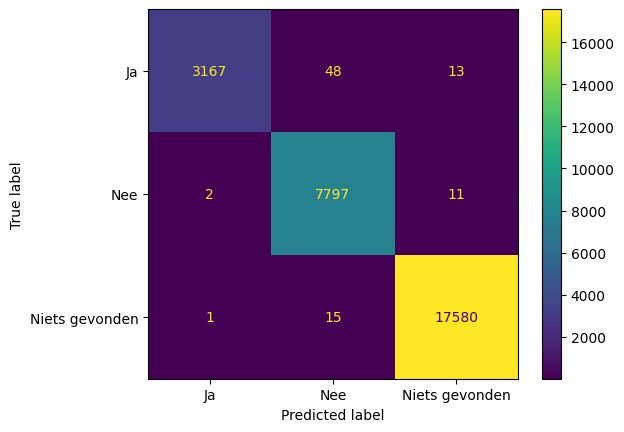

                precision    recall  f1-score   support

            Ja       1.00      0.98      0.99      3228
           Nee       0.99      1.00      1.00      7810
Niets gevonden       1.00      1.00      1.00     17596

      accuracy                           1.00     28634
     macro avg       1.00      0.99      0.99     28634
  weighted avg       1.00      1.00      1.00     28634



In [29]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [30]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.30, NNZs: 383, Bias: 0.000000, T: 68719, Avg. loss: 0.188090
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 148.38, NNZs: 153, Bias: 0.000000, T: 137438, Avg. loss: 0.138438
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 177.73, NNZs: 125, Bias: 0.000000, T: 206157, Avg. loss: 0.126676
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 202.10, NNZs: 108, Bias: 0.000000, T: 274876, Avg. loss: 0.119464
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 223.67, NNZs: 98, Bias: 0.000000, T: 343595, Avg. loss: 0.114476
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 243.01, NNZs: 88, Bias: 0.000000, T: 412314, Avg. loss: 0.110598
Total training time: 2.04 seconds.
-- Epoch 7
Norm: 246.48, NNZs: 89, Bias: 0.000000, T: 481033, Avg. loss: 0.108747
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 249.89, NNZs: 87, Bias: 0.000000, T: 549752, Avg. loss: 0.108071
Total training time: 2.72 seconds.
-- Epoch 9
Norm: 253.22, NNZs: 87, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 125.31, NNZs: 475, Bias: 0.000000, T: 68719, Avg. loss: 0.268798
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 172.41, NNZs: 205, Bias: 0.000000, T: 137438, Avg. loss: 0.196560
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 207.77, NNZs: 159, Bias: 0.000000, T: 206157, Avg. loss: 0.177833
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 236.75, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.167247
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 262.16, NNZs: 124, Bias: 0.000000, T: 343595, Avg. loss: 0.160894
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 284.89, NNZs: 114, Bias: 0.000000, T: 412314, Avg. loss: 0.155470
Total training time: 2.01 seconds.
-- Epoch 7
Norm: 288.90, NNZs: 115, Bias: 0.000000, T: 481033, Avg. loss: 0.153221
Total training time: 2.35 seconds.
-- Epoch 8
Norm: 292.84, NNZs: 114, Bias: 0.000000, T: 549752, Avg. loss: 0.152364
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 296.72, NNZs: 113, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


Norm: 120.61, NNZs: 489, Bias: 0.000000, T: 68719, Avg. loss: 0.181154
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 164.02, NNZs: 200, Bias: 0.000000, T: 137438, Avg. loss: 0.124331
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 196.84, NNZs: 155, Bias: 0.000000, T: 206157, Avg. loss: 0.109409
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 224.39, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.100937
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 248.46, NNZs: 120, Bias: 0.000000, T: 343595, Avg. loss: 0.094858
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 270.03, NNZs: 111, Bias: 0.000000, T: 412314, Avg. loss: 0.090171
Total training time: 2.11 seconds.
-- Epoch 7
Norm: 273.96, NNZs: 110, Bias: 0.000000, T: 481033, Avg. loss: 0.087719
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 277.84, NNZs: 107, Bias: 0.000000, T: 549752, Avg. loss: 0.087026
Total training time: 2.77 seconds.
-- Epoch 9
Norm: 281.65, NNZs: 105, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.116 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.20, NNZs: 385, Bias: 0.000000, T: 68719, Avg. loss: 0.190087
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 148.16, NNZs: 153, Bias: 0.000000, T: 137438, Avg. loss: 0.140491
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 177.46, NNZs: 118, Bias: 0.000000, T: 206157, Avg. loss: 0.128369
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 201.88, NNZs: 103, Bias: 0.000000, T: 274876, Avg. loss: 0.121185
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 223.39, NNZs: 90, Bias: 0.000000, T: 343595, Avg. loss: 0.116190
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 242.77, NNZs: 86, Bias: 0.000000, T: 412314, Avg. loss: 0.112161
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 246.22, NNZs: 86, Bias: 0.000000, T: 481033, Avg. loss: 0.110315
Total training time: 2.57 seconds.
-- Epoch 8
Norm: 249.62, NNZs: 86, Bias: 0.000000, T: 549752, Avg. loss: 0.109750
Total training time: 3.02 seconds.
-- Epoch 9
Norm: 252.96, NNZs: 86, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


Norm: 125.12, NNZs: 504, Bias: 0.000000, T: 68719, Avg. loss: 0.270662
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 172.10, NNZs: 213, Bias: 0.000000, T: 137438, Avg. loss: 0.198524
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 207.24, NNZs: 173, Bias: 0.000000, T: 206157, Avg. loss: 0.180144
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 236.37, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.169936
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 261.72, NNZs: 128, Bias: 0.000000, T: 343595, Avg. loss: 0.163230
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 284.42, NNZs: 121, Bias: 0.000000, T: 412314, Avg. loss: 0.158162
Total training time: 2.04 seconds.
-- Epoch 7
Norm: 288.44, NNZs: 119, Bias: 0.000000, T: 481033, Avg. loss: 0.155616
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 292.38, NNZs: 117, Bias: 0.000000, T: 549752, Avg. loss: 0.154885
Total training time: 2.71 seconds.
-- Epoch 9
Norm: 296.27, NNZs: 117, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s


Norm: 120.69, NNZs: 487, Bias: 0.000000, T: 68719, Avg. loss: 0.181829
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 164.23, NNZs: 204, Bias: 0.000000, T: 137438, Avg. loss: 0.125298
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 197.22, NNZs: 160, Bias: 0.000000, T: 206157, Avg. loss: 0.109855
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 224.75, NNZs: 139, Bias: 0.000000, T: 274876, Avg. loss: 0.101072
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 248.90, NNZs: 124, Bias: 0.000000, T: 343595, Avg. loss: 0.095222
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 270.58, NNZs: 115, Bias: 0.000000, T: 412314, Avg. loss: 0.090568
Total training time: 2.05 seconds.
-- Epoch 7
Norm: 274.52, NNZs: 111, Bias: 0.000000, T: 481033, Avg. loss: 0.088067
Total training time: 2.39 seconds.
-- Epoch 8
Norm: 278.39, NNZs: 108, Bias: 0.000000, T: 549752, Avg. loss: 0.087459
Total training time: 2.72 seconds.
-- Epoch 9
Norm: 282.21, NNZs: 105, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.111 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.31, NNZs: 376, Bias: 0.000000, T: 68719, Avg. loss: 0.188219
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 148.08, NNZs: 144, Bias: 0.000000, T: 137438, Avg. loss: 0.139222
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 177.24, NNZs: 119, Bias: 0.000000, T: 206157, Avg. loss: 0.127175
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 201.68, NNZs: 107, Bias: 0.000000, T: 274876, Avg. loss: 0.120116
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 223.13, NNZs: 97, Bias: 0.000000, T: 343595, Avg. loss: 0.115450
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 242.51, NNZs: 93, Bias: 0.000000, T: 412314, Avg. loss: 0.111597
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 245.92, NNZs: 93, Bias: 0.000000, T: 481033, Avg. loss: 0.109505
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 249.29, NNZs: 93, Bias: 0.000000, T: 549752, Avg. loss: 0.109058
Total training time: 2.72 seconds.
-- Epoch 9
Norm: 252.61, NNZs: 92, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


Norm: 125.52, NNZs: 522, Bias: 0.000000, T: 68719, Avg. loss: 0.270189
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 172.50, NNZs: 203, Bias: 0.000000, T: 137438, Avg. loss: 0.197300
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 207.66, NNZs: 159, Bias: 0.000000, T: 206157, Avg. loss: 0.179668
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 236.70, NNZs: 140, Bias: 0.000000, T: 274876, Avg. loss: 0.169063
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 262.05, NNZs: 127, Bias: 0.000000, T: 343595, Avg. loss: 0.162362
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 284.80, NNZs: 122, Bias: 0.000000, T: 412314, Avg. loss: 0.157480
Total training time: 2.22 seconds.
-- Epoch 7
Norm: 288.79, NNZs: 120, Bias: 0.000000, T: 481033, Avg. loss: 0.154951
Total training time: 2.56 seconds.
-- Epoch 8
Norm: 292.72, NNZs: 118, Bias: 0.000000, T: 549752, Avg. loss: 0.154216
Total training time: 2.91 seconds.
-- Epoch 9
Norm: 296.59, NNZs: 119, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.4s remaining:    0.0s


Norm: 120.59, NNZs: 476, Bias: 0.000000, T: 68719, Avg. loss: 0.183294
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 164.31, NNZs: 207, Bias: 0.000000, T: 137438, Avg. loss: 0.126104
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 197.33, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.110891
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 224.96, NNZs: 140, Bias: 0.000000, T: 274876, Avg. loss: 0.102287
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 249.18, NNZs: 126, Bias: 0.000000, T: 343595, Avg. loss: 0.096066
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 270.88, NNZs: 109, Bias: 0.000000, T: 412314, Avg. loss: 0.091273
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 274.84, NNZs: 109, Bias: 0.000000, T: 481033, Avg. loss: 0.088755
Total training time: 2.35 seconds.
-- Epoch 8
Norm: 278.73, NNZs: 108, Bias: 0.000000, T: 549752, Avg. loss: 0.088013
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 282.56, NNZs: 107, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.117 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.55, NNZs: 360, Bias: 0.000000, T: 68720, Avg. loss: 0.188601
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 148.64, NNZs: 149, Bias: 0.000000, T: 137440, Avg. loss: 0.138425
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 177.87, NNZs: 123, Bias: 0.000000, T: 206160, Avg. loss: 0.126564
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 202.35, NNZs: 105, Bias: 0.000000, T: 274880, Avg. loss: 0.119593
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 223.95, NNZs: 94, Bias: 0.000000, T: 343600, Avg. loss: 0.114626
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 243.48, NNZs: 89, Bias: 0.000000, T: 412320, Avg. loss: 0.110825
Total training time: 2.14 seconds.
-- Epoch 7
Norm: 246.93, NNZs: 89, Bias: 0.000000, T: 481040, Avg. loss: 0.108491
Total training time: 2.52 seconds.
-- Epoch 8
Norm: 250.32, NNZs: 88, Bias: 0.000000, T: 549760, Avg. loss: 0.107990
Total training time: 2.91 seconds.
-- Epoch 9
Norm: 253.69, NNZs: 88, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


Norm: 125.50, NNZs: 475, Bias: 0.000000, T: 68720, Avg. loss: 0.270366
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 172.38, NNZs: 199, Bias: 0.000000, T: 137440, Avg. loss: 0.197674
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 207.56, NNZs: 159, Bias: 0.000000, T: 206160, Avg. loss: 0.179366
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 236.79, NNZs: 133, Bias: 0.000000, T: 274880, Avg. loss: 0.169016
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 262.12, NNZs: 126, Bias: 0.000000, T: 343600, Avg. loss: 0.161875
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 284.99, NNZs: 119, Bias: 0.000000, T: 412320, Avg. loss: 0.157393
Total training time: 2.17 seconds.
-- Epoch 7
Norm: 288.97, NNZs: 119, Bias: 0.000000, T: 481040, Avg. loss: 0.154473
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 292.90, NNZs: 118, Bias: 0.000000, T: 549760, Avg. loss: 0.153802
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 296.78, NNZs: 118, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


Norm: 120.48, NNZs: 488, Bias: 0.000000, T: 68720, Avg. loss: 0.182642
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 163.98, NNZs: 197, Bias: 0.000000, T: 137440, Avg. loss: 0.126059
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 197.07, NNZs: 162, Bias: 0.000000, T: 206160, Avg. loss: 0.111117
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 224.65, NNZs: 142, Bias: 0.000000, T: 274880, Avg. loss: 0.102232
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 248.83, NNZs: 125, Bias: 0.000000, T: 343600, Avg. loss: 0.096484
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 270.56, NNZs: 112, Bias: 0.000000, T: 412320, Avg. loss: 0.091665
Total training time: 2.08 seconds.
-- Epoch 7
Norm: 274.51, NNZs: 110, Bias: 0.000000, T: 481040, Avg. loss: 0.089199
Total training time: 2.43 seconds.
-- Epoch 8
Norm: 278.40, NNZs: 108, Bias: 0.000000, T: 549760, Avg. loss: 0.088464
Total training time: 2.79 seconds.
-- Epoch 9
Norm: 282.22, NNZs: 105, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.114 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.22, NNZs: 372, Bias: 0.000000, T: 68720, Avg. loss: 0.189776
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 148.25, NNZs: 152, Bias: 0.000000, T: 137440, Avg. loss: 0.139597
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 177.69, NNZs: 120, Bias: 0.000000, T: 206160, Avg. loss: 0.127252
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 202.36, NNZs: 105, Bias: 0.000000, T: 274880, Avg. loss: 0.120235
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 224.08, NNZs: 95, Bias: 0.000000, T: 343600, Avg. loss: 0.114825
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 243.64, NNZs: 93, Bias: 0.000000, T: 412320, Avg. loss: 0.110748
Total training time: 2.40 seconds.
-- Epoch 7
Norm: 247.09, NNZs: 92, Bias: 0.000000, T: 481040, Avg. loss: 0.108859
Total training time: 2.75 seconds.
-- Epoch 8
Norm: 250.52, NNZs: 92, Bias: 0.000000, T: 549760, Avg. loss: 0.108316
Total training time: 3.13 seconds.
-- Epoch 9
Norm: 253.90, NNZs: 91, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Norm: 125.61, NNZs: 506, Bias: 0.000000, T: 68720, Avg. loss: 0.269754
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 172.81, NNZs: 203, Bias: 0.000000, T: 137440, Avg. loss: 0.196975
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 208.03, NNZs: 156, Bias: 0.000000, T: 206160, Avg. loss: 0.178262
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 237.28, NNZs: 136, Bias: 0.000000, T: 274880, Avg. loss: 0.167931
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 262.75, NNZs: 127, Bias: 0.000000, T: 343600, Avg. loss: 0.161051
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 285.67, NNZs: 121, Bias: 0.000000, T: 412320, Avg. loss: 0.155973
Total training time: 2.21 seconds.
-- Epoch 7
Norm: 289.68, NNZs: 121, Bias: 0.000000, T: 481040, Avg. loss: 0.153257
Total training time: 2.56 seconds.
-- Epoch 8
Norm: 293.63, NNZs: 121, Bias: 0.000000, T: 549760, Avg. loss: 0.152565
Total training time: 2.93 seconds.
-- Epoch 9
Norm: 297.53, NNZs: 119, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.0s remaining:    0.0s


Norm: 120.72, NNZs: 476, Bias: 0.000000, T: 68720, Avg. loss: 0.183009
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 164.26, NNZs: 194, Bias: 0.000000, T: 137440, Avg. loss: 0.125820
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 197.37, NNZs: 161, Bias: 0.000000, T: 206160, Avg. loss: 0.110884
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 224.94, NNZs: 141, Bias: 0.000000, T: 274880, Avg. loss: 0.101973
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 249.17, NNZs: 120, Bias: 0.000000, T: 343600, Avg. loss: 0.095956
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 270.88, NNZs: 108, Bias: 0.000000, T: 412320, Avg. loss: 0.091173
Total training time: 2.31 seconds.
-- Epoch 7
Norm: 274.85, NNZs: 107, Bias: 0.000000, T: 481040, Avg. loss: 0.088774
Total training time: 2.69 seconds.
-- Epoch 8
Norm: 278.74, NNZs: 105, Bias: 0.000000, T: 549760, Avg. loss: 0.087967
Total training time: 3.08 seconds.
-- Epoch 9
Norm: 282.57, NNZs: 105, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.115 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 126558528351581.42, NNZs: 380446, Bias: 0.000000, T: 68719, Avg. loss: 166001454695984733880320.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 119529071688395.89, NNZs: 380446, Bias: 0.000000, T: 137438, Avg. loss: 139556994117558811492352.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 115963411943865.61, NNZs: 380446, Bias: 0.000000, T: 206157, Avg. loss: 115762978485302919692288.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 113614531588718.84, NNZs: 380446, Bias: 0.000000, T: 274876, Avg. loss: 104787793131750146703360.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 111879573925226.92, NNZs: 380446, Bias: 0.000000, T: 343595, Avg. loss: 97991122518024019509248.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 110511150040504.53, NNZs: 380446, Bias: 0.000000, T: 412314, Avg. loss: 93182704551103744180224.000000
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 125297876602297.61, NNZs: 380445, Bias: 0.000000, T: 68719, Avg. loss: 159698905365195939381248.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 118322258013978.09, NNZs: 380446, Bias: 0.000000, T: 137438, Avg. loss: 135976403400710800015360.000000
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 114772339317751.61, NNZs: 380446, Bias: 0.000000, T: 206157, Avg. loss: 112661256153256786132992.000000
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 112439388566839.36, NNZs: 380446, Bias: 0.000000, T: 274876, Avg. loss: 101834528897724898607104.000000
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 110718129485727.52, NNZs: 380446, Bias: 0.000000, T: 343595, Avg. loss: 95114864772088758009856.000000
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 109360679748214.06, NNZs: 380446, Bias: 0.000000, T: 412314, Avg. loss: 90455178028462311997440.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 112489354967679.02, NNZs: 380445, Bias: 0.000000, T: 68719, Avg. loss: 129295741681366338633728.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 105884862660098.34, NNZs: 380446, Bias: 0.000000, T: 137438, Avg. loss: 108319690655924903477248.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 102514482420357.36, NNZs: 380446, Bias: 0.000000, T: 206157, Avg. loss: 88967706754528275595264.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 100292466766703.59, NNZs: 380446, Bias: 0.000000, T: 274876, Avg. loss: 80017680899573184200704.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 98650840192469.94, NNZs: 380446, Bias: 0.000000, T: 343595, Avg. loss: 74561877420020162625536.000000
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 97356610197752.83, NNZs: 380446, Bias: 0.000000, T: 412314, Avg. loss: 70709597189562280443904.000000
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.297 total time=  47.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 135175534156527.28, NNZs: 381052, Bias: 0.000000, T: 68719, Avg. loss: 192155050303880775598080.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 127918047738181.98, NNZs: 381052, Bias: 0.000000, T: 137438, Avg. loss: 161792889627046680985600.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 124222020030812.09, NNZs: 381052, Bias: 0.000000, T: 206157, Avg. loss: 134736536977590527721472.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 121793698442028.89, NNZs: 381052, Bias: 0.000000, T: 274876, Avg. loss: 122078522096375300096000.000000
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 120005309555292.30, NNZs: 381052, Bias: 0.000000, T: 343595, Avg. loss: 114258463587049534390272.000000
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 118596764045002.67, NNZs: 381052, Bias: 0.000000, T: 412314, Avg. loss: 108721010500288009732096.000000
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 132587705722517.36, NNZs: 381052, Bias: 0.000000, T: 68719, Avg. loss: 184186433673088729088000.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 125449932543675.39, NNZs: 381052, Bias: 0.000000, T: 137438, Avg. loss: 153727596188887884496896.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 121822065104385.75, NNZs: 381052, Bias: 0.000000, T: 206157, Avg. loss: 128040609628432839475200.000000
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 119431643342427.59, NNZs: 381052, Bias: 0.000000, T: 274876, Avg. loss: 116156438287288700502016.000000
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 117668749790996.36, NNZs: 381052, Bias: 0.000000, T: 343595, Avg. loss: 108754007326297784582144.000000
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 116280225612889.97, NNZs: 381052, Bias: 0.000000, T: 412314, Avg. loss: 103565997802088327806976.000000
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 121020114160970.80, NNZs: 381051, Bias: 0.000000, T: 68719, Avg. loss: 150570131237326404190208.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 114181776857846.56, NNZs: 381052, Bias: 0.000000, T: 137438, Avg. loss: 126090888937504967229440.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 110702846811047.50, NNZs: 381052, Bias: 0.000000, T: 206157, Avg. loss: 104259712432627739787264.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 108410058153238.33, NNZs: 381052, Bias: 0.000000, T: 274876, Avg. loss: 94213166894285714358272.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 106715477352621.39, NNZs: 381052, Bias: 0.000000, T: 343595, Avg. loss: 87995332908866359787520.000000
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 105379350047864.80, NNZs: 381052, Bias: 0.000000, T: 412314, Avg. loss: 83677724579153192157184.000000
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.80 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.301 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 116559584188005.20, NNZs: 380959, Bias: 0.000000, T: 68719, Avg. loss: 135494060754517811527680.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 109902463053775.72, NNZs: 380959, Bias: 0.000000, T: 137438, Avg. loss: 115556305177324510248960.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 106506149169889.44, NNZs: 380959, Bias: 0.000000, T: 206157, Avg. loss: 95469961262379908988928.000000
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 104262833046013.98, NNZs: 380959, Bias: 0.000000, T: 274876, Avg. loss: 86288200722541772275712.000000
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 102602352891699.09, NNZs: 380959, Bias: 0.000000, T: 343595, Avg. loss: 80502194315454769528832.000000
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 101294997733490.06, NNZs: 380959, Bias: 0.000000, T: 412314, Avg. loss: 76426327201233940512768.000000
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 129108135506147.31, NNZs: 380959, Bias: 0.000000, T: 68719, Avg. loss: 174505400231341548634112.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 122083068136616.38, NNZs: 380959, Bias: 0.000000, T: 137438, Avg. loss: 144525900307314373558272.000000
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 118496368364898.16, NNZs: 380959, Bias: 0.000000, T: 206157, Avg. loss: 120158991101652914667520.000000
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 116132411118106.77, NNZs: 380959, Bias: 0.000000, T: 274876, Avg. loss: 108769698326521917210624.000000
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 114387244859454.88, NNZs: 380959, Bias: 0.000000, T: 343595, Avg. loss: 101727017197260024840192.000000
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 113013713480126.94, NNZs: 380959, Bias: 0.000000, T: 412314, Avg. loss: 96789154065389054853120.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 107841809758826.42, NNZs: 380958, Bias: 0.000000, T: 68719, Avg. loss: 117804248740835142664192.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 101387551654076.41, NNZs: 380959, Bias: 0.000000, T: 137438, Avg. loss: 98516496367154181963776.000000
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 98085546231454.59, NNZs: 380959, Bias: 0.000000, T: 206157, Avg. loss: 80765822740535170826240.000000
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 95909689447543.16, NNZs: 380959, Bias: 0.000000, T: 274876, Avg. loss: 72554225586292716994560.000000
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 94300387681711.22, NNZs: 380959, Bias: 0.000000, T: 343595, Avg. loss: 67523139655431496925184.000000
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 93031408748437.55, NNZs: 380959, Bias: 0.000000, T: 412314, Avg. loss: 63976430561913900892160.000000
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.300 total time=  47.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 133725258464225.94, NNZs: 381240, Bias: 0.000000, T: 68720, Avg. loss: 183931418640336017162240.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 126577036620479.67, NNZs: 381240, Bias: 0.000000, T: 137440, Avg. loss: 155977260592413611655168.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 122921948738485.19, NNZs: 381240, Bias: 0.000000, T: 206160, Avg. loss: 130083848002201670647808.000000
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 120517440890227.42, NNZs: 381240, Bias: 0.000000, T: 274880, Avg. loss: 118031431019240127201280.000000
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 118741419688767.34, NNZs: 381240, Bias: 0.000000, T: 343600, Avg. loss: 110537585347693287309312.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 117342704838434.58, NNZs: 381240, Bias: 0.000000, T: 412320, Avg. loss: 105267032615971815686144.000000
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 123592851006554.52, NNZs: 381239, Bias: 0.000000, T: 68720, Avg. loss: 158443893199242136649728.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 116685511887020.34, NNZs: 381240, Bias: 0.000000, T: 137440, Avg. loss: 132522728589459802030080.000000
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 113158614178751.27, NNZs: 381240, Bias: 0.000000, T: 206160, Avg. loss: 109687843940027175272448.000000
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 110845270913962.88, NNZs: 381240, Bias: 0.000000, T: 274880, Avg. loss: 99032773221712171892736.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 109132531999732.66, NNZs: 381240, Bias: 0.000000, T: 343600, Avg. loss: 92559969411524670259200.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 107784274304146.14, NNZs: 381240, Bias: 0.000000, T: 412320, Avg. loss: 87958178742377704849408.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 130749685656231.27, NNZs: 381239, Bias: 0.000000, T: 68720, Avg. loss: 177715322613454061174784.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 123623221209110.38, NNZs: 381240, Bias: 0.000000, T: 137440, Avg. loss: 149459383426693434703872.000000
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 120004374815296.30, NNZs: 381240, Bias: 0.000000, T: 206160, Avg. loss: 124221139889009717149696.000000
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 117613915740121.66, NNZs: 381240, Bias: 0.000000, T: 274880, Avg. loss: 112495652447675616329728.000000
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 115852382569100.64, NNZs: 381240, Bias: 0.000000, T: 343600, Avg. loss: 105220047186939323875328.000000
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 114466884245329.22, NNZs: 381240, Bias: 0.000000, T: 412320, Avg. loss: 100085522892124980248576.000000
Total training time: 1.71 seconds.
Convergence after 6 epochs took 1.74 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.301 total time=  47.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114731712128056.70, NNZs: 381436, Bias: 0.000000, T: 68720, Avg. loss: 133918764584737733345280.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 108075414022743.86, NNZs: 381436, Bias: 0.000000, T: 137440, Avg. loss: 112927762872593389977600.000000
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 104682375924031.56, NNZs: 381436, Bias: 0.000000, T: 206160, Avg. loss: 92988138430483994247168.000000
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 102447059997477.88, NNZs: 381436, Bias: 0.000000, T: 274880, Avg. loss: 83770057413518363197440.000000
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 100795958333562.62, NNZs: 381436, Bias: 0.000000, T: 343600, Avg. loss: 78115564626176771096576.000000
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 99495066494736.02, NNZs: 381436, Bias: 0.000000, T: 412320, Avg. loss: 74162584977528049369088.000000
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 130607987473472.25, NNZs: 381435, Bias: 0.000000, T: 68720, Avg. loss: 176778345575197733552128.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 123518630171043.11, NNZs: 381436, Bias: 0.000000, T: 137440, Avg. loss: 149637552295105559265280.000000
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 119924230076108.25, NNZs: 381436, Bias: 0.000000, T: 206160, Avg. loss: 124477062403077011668992.000000
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 117558106147048.05, NNZs: 381436, Bias: 0.000000, T: 274880, Avg. loss: 112832163169406371758080.000000
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 115810023115755.08, NNZs: 381436, Bias: 0.000000, T: 343600, Avg. loss: 105598987727762838519808.000000
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 114432398455164.33, NNZs: 381436, Bias: 0.000000, T: 412320, Avg. loss: 100575412987918972616704.000000
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.77 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 112500535368033.28, NNZs: 381435, Bias: 0.000000, T: 68720, Avg. loss: 131180375933022942265344.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 105868187520618.59, NNZs: 381436, Bias: 0.000000, T: 137440, Avg. loss: 107714835535314318000128.000000
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 102473933432752.08, NNZs: 381436, Bias: 0.000000, T: 206160, Avg. loss: 88574171359814529056768.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 100241645026892.92, NNZs: 381436, Bias: 0.000000, T: 274880, Avg. loss: 79570161798702975418368.000000
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 98594167598067.98, NNZs: 381436, Bias: 0.000000, T: 343600, Avg. loss: 74122976546013275226112.000000
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 97293968133835.91, NNZs: 381436, Bias: 0.000000, T: 412320, Avg. loss: 70257366106799094104064.000000
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.306 total time=  47.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 143.43, NNZs: 505, Bias: 0.000000, T: 68719, Avg. loss: 0.086174
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 187.48, NNZs: 238, Bias: 0.000000, T: 137438, Avg. loss: 0.052457
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 220.25, NNZs: 206, Bias: 0.000000, T: 206157, Avg. loss: 0.047625
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 247.11, NNZs: 197, Bias: 0.000000, T: 274876, Avg. loss: 0.044730
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 270.78, NNZs: 188, Bias: 0.000000, T: 343595, Avg. loss: 0.043632
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 291.94, NNZs: 174, Bias: 0.000000, T: 412314, Avg. loss: 0.042329
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 178.19, NNZs: 828, Bias: 0.000000, T: 68719, Avg. loss: 0.134804
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 233.47, NNZs: 282, Bias: 0.000000, T: 137438, Avg. loss: 0.087098
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 274.24, NNZs: 254, Bias: 0.000000, T: 206157, Avg. loss: 0.078887
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 308.27, NNZs: 233, Bias: 0.000000, T: 274876, Avg. loss: 0.076331
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 338.13, NNZs: 233, Bias: 0.000000, T: 343595, Avg. loss: 0.074406
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 365.00, NNZs: 222, Bias: 0.000000, T: 412314, Avg. loss: 0.072818
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 140.17, NNZs: 634, Bias: 0.000000, T: 68719, Avg. loss: 0.067480
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 180.66, NNZs: 197, Bias: 0.000000, T: 137438, Avg. loss: 0.035114
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 209.58, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.028366
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 232.86, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.024482
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 252.70, NNZs: 127, Bias: 0.000000, T: 343595, Avg. loss: 0.022067
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 270.09, NNZs: 129, Bias: 0.000000, T: 412314, Avg. loss: 0.020400
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.37 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.985 total time=  47.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 143.14, NNZs: 567, Bias: 0.000000, T: 68719, Avg. loss: 0.085186
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 187.53, NNZs: 224, Bias: 0.000000, T: 137438, Avg. loss: 0.053387
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 220.32, NNZs: 205, Bias: 0.000000, T: 206157, Avg. loss: 0.048367
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 247.44, NNZs: 192, Bias: 0.000000, T: 274876, Avg. loss: 0.045946
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 271.28, NNZs: 176, Bias: 0.000000, T: 343595, Avg. loss: 0.045014
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 292.59, NNZs: 172, Bias: 0.000000, T: 412314, Avg. loss: 0.043439
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.38 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 178.81, NNZs: 829, Bias: 0.000000, T: 68719, Avg. loss: 0.136531
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 234.48, NNZs: 289, Bias: 0.000000, T: 137438, Avg. loss: 0.089021
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 275.92, NNZs: 252, Bias: 0.000000, T: 206157, Avg. loss: 0.081457
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 310.05, NNZs: 225, Bias: 0.000000, T: 274876, Avg. loss: 0.077405
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 340.04, NNZs: 227, Bias: 0.000000, T: 343595, Avg. loss: 0.075922
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 367.10, NNZs: 228, Bias: 0.000000, T: 412314, Avg. loss: 0.074607
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 140.78, NNZs: 639, Bias: 0.000000, T: 68719, Avg. loss: 0.068450
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 181.40, NNZs: 182, Bias: 0.000000, T: 137438, Avg. loss: 0.035417
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 210.48, NNZs: 157, Bias: 0.000000, T: 206157, Avg. loss: 0.028579
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 233.81, NNZs: 142, Bias: 0.000000, T: 274876, Avg. loss: 0.024671
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 253.67, NNZs: 141, Bias: 0.000000, T: 343595, Avg. loss: 0.022211
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 271.22, NNZs: 125, Bias: 0.000000, T: 412314, Avg. loss: 0.020730
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.34 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.987 total time=  47.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 142.86, NNZs: 568, Bias: 0.000000, T: 68719, Avg. loss: 0.085389
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 187.28, NNZs: 219, Bias: 0.000000, T: 137438, Avg. loss: 0.053469
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 220.03, NNZs: 195, Bias: 0.000000, T: 206157, Avg. loss: 0.048531
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 247.26, NNZs: 190, Bias: 0.000000, T: 274876, Avg. loss: 0.046076
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 270.90, NNZs: 176, Bias: 0.000000, T: 343595, Avg. loss: 0.044385
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 292.26, NNZs: 169, Bias: 0.000000, T: 412314, Avg. loss: 0.043451
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 178.56, NNZs: 823, Bias: 0.000000, T: 68719, Avg. loss: 0.136123
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 233.91, NNZs: 292, Bias: 0.000000, T: 137438, Avg. loss: 0.088071
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 275.10, NNZs: 248, Bias: 0.000000, T: 206157, Avg. loss: 0.081655
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 309.40, NNZs: 242, Bias: 0.000000, T: 274876, Avg. loss: 0.078158
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 339.42, NNZs: 236, Bias: 0.000000, T: 343595, Avg. loss: 0.076260
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 366.50, NNZs: 223, Bias: 0.000000, T: 412314, Avg. loss: 0.075005
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 140.85, NNZs: 602, Bias: 0.000000, T: 68719, Avg. loss: 0.068194
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 181.62, NNZs: 191, Bias: 0.000000, T: 137438, Avg. loss: 0.035900
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 210.67, NNZs: 160, Bias: 0.000000, T: 206157, Avg. loss: 0.028673
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 234.04, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.024772
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 253.94, NNZs: 136, Bias: 0.000000, T: 343595, Avg. loss: 0.022299
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 271.45, NNZs: 128, Bias: 0.000000, T: 412314, Avg. loss: 0.020693
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.987 total time=  47.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 143.02, NNZs: 586, Bias: 0.000000, T: 68720, Avg. loss: 0.084835
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 186.89, NNZs: 227, Bias: 0.000000, T: 137440, Avg. loss: 0.052849
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 219.78, NNZs: 207, Bias: 0.000000, T: 206160, Avg. loss: 0.048096
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 246.84, NNZs: 192, Bias: 0.000000, T: 274880, Avg. loss: 0.045842
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 270.60, NNZs: 183, Bias: 0.000000, T: 343600, Avg. loss: 0.044437
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 291.90, NNZs: 183, Bias: 0.000000, T: 412320, Avg. loss: 0.043317
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 179.21, NNZs: 826, Bias: 0.000000, T: 68720, Avg. loss: 0.136190
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 234.20, NNZs: 283, Bias: 0.000000, T: 137440, Avg. loss: 0.087479
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 275.38, NNZs: 244, Bias: 0.000000, T: 206160, Avg. loss: 0.080064
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 309.61, NNZs: 229, Bias: 0.000000, T: 274880, Avg. loss: 0.076673
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 339.21, NNZs: 219, Bias: 0.000000, T: 343600, Avg. loss: 0.074633
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 366.00, NNZs: 219, Bias: 0.000000, T: 412320, Avg. loss: 0.073284
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.43 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 140.90, NNZs: 632, Bias: 0.000000, T: 68720, Avg. loss: 0.068447
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 181.69, NNZs: 185, Bias: 0.000000, T: 137440, Avg. loss: 0.035815
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 210.69, NNZs: 161, Bias: 0.000000, T: 206160, Avg. loss: 0.028583
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 234.06, NNZs: 138, Bias: 0.000000, T: 274880, Avg. loss: 0.024797
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 253.85, NNZs: 136, Bias: 0.000000, T: 343600, Avg. loss: 0.022270
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 271.36, NNZs: 125, Bias: 0.000000, T: 412320, Avg. loss: 0.020740
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.47 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.985 total time=  47.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 142.99, NNZs: 567, Bias: 0.000000, T: 68720, Avg. loss: 0.084474
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 186.83, NNZs: 234, Bias: 0.000000, T: 137440, Avg. loss: 0.052256
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 219.46, NNZs: 210, Bias: 0.000000, T: 206160, Avg. loss: 0.047241
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 246.39, NNZs: 192, Bias: 0.000000, T: 274880, Avg. loss: 0.044660
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 270.02, NNZs: 183, Bias: 0.000000, T: 343600, Avg. loss: 0.043067
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 291.18, NNZs: 178, Bias: 0.000000, T: 412320, Avg. loss: 0.041889
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 178.98, NNZs: 826, Bias: 0.000000, T: 68720, Avg. loss: 0.136244
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 234.28, NNZs: 295, Bias: 0.000000, T: 137440, Avg. loss: 0.088125
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 275.47, NNZs: 255, Bias: 0.000000, T: 206160, Avg. loss: 0.080447
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 309.68, NNZs: 252, Bias: 0.000000, T: 274880, Avg. loss: 0.076492
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 339.56, NNZs: 242, Bias: 0.000000, T: 343600, Avg. loss: 0.074871
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 366.43, NNZs: 225, Bias: 0.000000, T: 412320, Avg. loss: 0.073388
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 140.70, NNZs: 656, Bias: 0.000000, T: 68720, Avg. loss: 0.067685
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 181.37, NNZs: 196, Bias: 0.000000, T: 137440, Avg. loss: 0.035423
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 210.27, NNZs: 162, Bias: 0.000000, T: 206160, Avg. loss: 0.028076
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 233.61, NNZs: 149, Bias: 0.000000, T: 274880, Avg. loss: 0.024606
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 253.32, NNZs: 141, Bias: 0.000000, T: 343600, Avg. loss: 0.021788
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 270.77, NNZs: 135, Bias: 0.000000, T: 412320, Avg. loss: 0.020510
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 84.30, NNZs: 511, Bias: 0.000000, T: 68719, Avg. loss: 0.085638
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 112.70, NNZs: 425, Bias: 0.000000, T: 137438, Avg. loss: 0.064716
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 133.59, NNZs: 387, Bias: 0.000000, T: 206157, Avg. loss: 0.062166
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 150.84, NNZs: 381, Bias: 0.000000, T: 274876, Avg. loss: 0.061240
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 165.92, NNZs: 372, Bias: 0.000000, T: 343595, Avg. loss: 0.060927
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 179.79, NNZs: 371, Bias: 0.000000, T: 412314, Avg. loss: 0.060648
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 73.79, NNZs: 538, Bias: 0.000000, T: 68719, Avg. loss: 0.131886
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 99.57, NNZs: 416, Bias: 0.000000, T: 137438, Avg. loss: 0.103853
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 119.11, NNZs: 389, Bias: 0.000000, T: 206157, Avg. loss: 0.098179
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 135.15, NNZs: 359, Bias: 0.000000, T: 274876, Avg. loss: 0.095453
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 149.21, NNZs: 351, Bias: 0.000000, T: 343595, Avg. loss: 0.093919
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 161.73, NNZs: 336, Bias: 0.000000, T: 412314, Avg. loss: 0.093192
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 51.41, NNZs: 387, Bias: 0.000000, T: 68719, Avg. loss: 0.113145
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 69.71, NNZs: 296, Bias: 0.000000, T: 137438, Avg. loss: 0.094081
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 83.47, NNZs: 270, Bias: 0.000000, T: 206157, Avg. loss: 0.090356
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 95.02, NNZs: 261, Bias: 0.000000, T: 274876, Avg. loss: 0.088582
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 105.19, NNZs: 253, Bias: 0.000000, T: 343595, Avg. loss: 0.087630
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 114.36, NNZs: 246, Bias: 0.000000, T: 412314, Avg. loss: 0.087155
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.026 total time=  47.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 84.14, NNZs: 492, Bias: 0.000000, T: 68719, Avg. loss: 0.084842
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 112.58, NNZs: 412, Bias: 0.000000, T: 137438, Avg. loss: 0.064945
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 133.23, NNZs: 373, Bias: 0.000000, T: 206157, Avg. loss: 0.062244
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 150.72, NNZs: 366, Bias: 0.000000, T: 274876, Avg. loss: 0.061531
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 165.87, NNZs: 353, Bias: 0.000000, T: 343595, Avg. loss: 0.060632
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 179.50, NNZs: 353, Bias: 0.000000, T: 412314, Avg. loss: 0.060742
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 73.74, NNZs: 535, Bias: 0.000000, T: 68719, Avg. loss: 0.131092
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 99.45, NNZs: 426, Bias: 0.000000, T: 137438, Avg. loss: 0.103774
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 118.84, NNZs: 383, Bias: 0.000000, T: 206157, Avg. loss: 0.098627
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 134.67, NNZs: 364, Bias: 0.000000, T: 274876, Avg. loss: 0.096172
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 148.45, NNZs: 350, Bias: 0.000000, T: 343595, Avg. loss: 0.094591
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 161.09, NNZs: 343, Bias: 0.000000, T: 412314, Avg. loss: 0.093884
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 51.47, NNZs: 390, Bias: 0.000000, T: 68719, Avg. loss: 0.112987
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 69.69, NNZs: 299, Bias: 0.000000, T: 137438, Avg. loss: 0.093999
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 83.41, NNZs: 282, Bias: 0.000000, T: 206157, Avg. loss: 0.090405
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 94.96, NNZs: 262, Bias: 0.000000, T: 274876, Avg. loss: 0.088737
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 105.15, NNZs: 259, Bias: 0.000000, T: 343595, Avg. loss: 0.087994
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 114.20, NNZs: 253, Bias: 0.000000, T: 412314, Avg. loss: 0.087474
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.025 total time=  48.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83.98, NNZs: 512, Bias: 0.000000, T: 68719, Avg. loss: 0.085146
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 112.77, NNZs: 419, Bias: 0.000000, T: 137438, Avg. loss: 0.064027
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 133.44, NNZs: 396, Bias: 0.000000, T: 206157, Avg. loss: 0.060984
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 150.75, NNZs: 364, Bias: 0.000000, T: 274876, Avg. loss: 0.060023
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 165.91, NNZs: 371, Bias: 0.000000, T: 343595, Avg. loss: 0.059670
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 179.79, NNZs: 370, Bias: 0.000000, T: 412314, Avg. loss: 0.059207
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 73.55, NNZs: 532, Bias: 0.000000, T: 68719, Avg. loss: 0.130721
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 99.31, NNZs: 419, Bias: 0.000000, T: 137438, Avg. loss: 0.103399
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 118.73, NNZs: 381, Bias: 0.000000, T: 206157, Avg. loss: 0.097416
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 134.88, NNZs: 366, Bias: 0.000000, T: 274876, Avg. loss: 0.094979
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 148.84, NNZs: 352, Bias: 0.000000, T: 343595, Avg. loss: 0.093377
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 161.34, NNZs: 348, Bias: 0.000000, T: 412314, Avg. loss: 0.092392
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.73 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 51.69, NNZs: 374, Bias: 0.000000, T: 68719, Avg. loss: 0.112754
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 69.78, NNZs: 298, Bias: 0.000000, T: 137438, Avg. loss: 0.093456
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 83.49, NNZs: 274, Bias: 0.000000, T: 206157, Avg. loss: 0.090358
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 94.93, NNZs: 258, Bias: 0.000000, T: 274876, Avg. loss: 0.088341
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 105.07, NNZs: 252, Bias: 0.000000, T: 343595, Avg. loss: 0.087452
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 114.13, NNZs: 240, Bias: 0.000000, T: 412314, Avg. loss: 0.087004
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.029 total time=  47.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 84.06, NNZs: 539, Bias: 0.000000, T: 68720, Avg. loss: 0.084410
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 112.59, NNZs: 424, Bias: 0.000000, T: 137440, Avg. loss: 0.063009
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 133.41, NNZs: 404, Bias: 0.000000, T: 206160, Avg. loss: 0.060199
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 150.48, NNZs: 385, Bias: 0.000000, T: 274880, Avg. loss: 0.058897
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 165.65, NNZs: 390, Bias: 0.000000, T: 343600, Avg. loss: 0.058446
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 179.32, NNZs: 372, Bias: 0.000000, T: 412320, Avg. loss: 0.058084
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 73.65, NNZs: 538, Bias: 0.000000, T: 68720, Avg. loss: 0.130470
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 99.28, NNZs: 416, Bias: 0.000000, T: 137440, Avg. loss: 0.102503
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 118.78, NNZs: 376, Bias: 0.000000, T: 206160, Avg. loss: 0.096630
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 134.84, NNZs: 368, Bias: 0.000000, T: 274880, Avg. loss: 0.093823
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 148.70, NNZs: 354, Bias: 0.000000, T: 343600, Avg. loss: 0.092281
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 161.29, NNZs: 339, Bias: 0.000000, T: 412320, Avg. loss: 0.091496
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


Norm: 51.39, NNZs: 376, Bias: 0.000000, T: 68720, Avg. loss: 0.112109
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 69.54, NNZs: 300, Bias: 0.000000, T: 137440, Avg. loss: 0.093152
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 83.19, NNZs: 271, Bias: 0.000000, T: 206160, Avg. loss: 0.089725
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 94.75, NNZs: 261, Bias: 0.000000, T: 274880, Avg. loss: 0.088228
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 104.81, NNZs: 257, Bias: 0.000000, T: 343600, Avg. loss: 0.087266
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 113.83, NNZs: 248, Bias: 0.000000, T: 412320, Avg. loss: 0.086818
Total training time: 1.65 seconds.
Convergence after 6 epochs took 1.68 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.029 total time=  46.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 84.12, NNZs: 516, Bias: 0.000000, T: 68720, Avg. loss: 0.084470
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 112.47, NNZs: 405, Bias: 0.000000, T: 137440, Avg. loss: 0.063868
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 133.34, NNZs: 367, Bias: 0.000000, T: 206160, Avg. loss: 0.061193
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 150.42, NNZs: 354, Bias: 0.000000, T: 274880, Avg. loss: 0.060345
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 165.43, NNZs: 342, Bias: 0.000000, T: 343600, Avg. loss: 0.059765
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 179.17, NNZs: 349, Bias: 0.000000, T: 412320, Avg. loss: 0.059765
Total training time: 1.64 seconds.
Convergence after 6 epochs took 1.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 73.98, NNZs: 550, Bias: 0.000000, T: 68720, Avg. loss: 0.130972
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 99.78, NNZs: 420, Bias: 0.000000, T: 137440, Avg. loss: 0.103306
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 119.23, NNZs: 377, Bias: 0.000000, T: 206160, Avg. loss: 0.097600
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 135.28, NNZs: 360, Bias: 0.000000, T: 274880, Avg. loss: 0.094977
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 149.21, NNZs: 350, Bias: 0.000000, T: 343600, Avg. loss: 0.093411
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 161.78, NNZs: 352, Bias: 0.000000, T: 412320, Avg. loss: 0.092676
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 51.78, NNZs: 386, Bias: 0.000000, T: 68720, Avg. loss: 0.112954
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 69.83, NNZs: 296, Bias: 0.000000, T: 137440, Avg. loss: 0.093324
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 83.71, NNZs: 270, Bias: 0.000000, T: 206160, Avg. loss: 0.089911
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 95.20, NNZs: 265, Bias: 0.000000, T: 274880, Avg. loss: 0.088206
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 105.17, NNZs: 251, Bias: 0.000000, T: 343600, Avg. loss: 0.087440
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 114.30, NNZs: 247, Bias: 0.000000, T: 412320, Avg. loss: 0.086901
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.77 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.028 total time=  46.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 655643, Bias: -0.423990, T: 68719, Avg. loss: 0.089250
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 655643, Bias: -0.484550, T: 137438, Avg. loss: 0.060928
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 655643, Bias: -0.517442, T: 206157, Avg. loss: 0.056740
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 4.35, NNZs: 655643, Bias: -0.539947, T: 274876, Avg. loss: 0.054741
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 4.37, NNZs: 655643, Bias: -0.556974, T: 343595, Avg. loss: 0.053495
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 4.38, NNZs: 655643, Bias: -0.570637, T: 412314, Avg. loss: 0.052605
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 3.67, NNZs: 655643, Bias: -0.329194, T: 68719, Avg. loss: 0.162605
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.34, NNZs: 655643, Bias: -0.410597, T: 137438, Avg. loss: 0.130548
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 4.63, NNZs: 655643, Bias: -0.449970, T: 206157, Avg. loss: 0.123170
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 4.84, NNZs: 655643, Bias: -0.475263, T: 274876, Avg. loss: 0.119451
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 655643, Bias: -0.493898, T: 343595, Avg. loss: 0.116935
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 5.16, NNZs: 655643, Bias: -0.508681, T: 412314, Avg. loss: 0.115003
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 4.33, NNZs: 655643, Bias: 0.221081, T: 68719, Avg. loss: 0.154577
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 655643, Bias: 0.316765, T: 137438, Avg. loss: 0.118041
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 6.26, NNZs: 655643, Bias: 0.374965, T: 206157, Avg. loss: 0.102759
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 655643, Bias: 0.413209, T: 274876, Avg. loss: 0.094433
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 7.10, NNZs: 655643, Bias: 0.439763, T: 343595, Avg. loss: 0.089229
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 7.38, NNZs: 655643, Bias: 0.459366, T: 412314, Avg. loss: 0.085560
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.560 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 657539, Bias: -0.421245, T: 68719, Avg. loss: 0.090158
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 657539, Bias: -0.482737, T: 137438, Avg. loss: 0.061160
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 657539, Bias: -0.516113, T: 206157, Avg. loss: 0.056830
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 657539, Bias: -0.538927, T: 274876, Avg. loss: 0.054777
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 4.37, NNZs: 657539, Bias: -0.556153, T: 343595, Avg. loss: 0.053507
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 4.39, NNZs: 657539, Bias: -0.569954, T: 412314, Avg. loss: 0.052604
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 3.67, NNZs: 657539, Bias: -0.325635, T: 68719, Avg. loss: 0.163020
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 4.34, NNZs: 657539, Bias: -0.407244, T: 137438, Avg. loss: 0.130807
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 4.64, NNZs: 657539, Bias: -0.447226, T: 206157, Avg. loss: 0.123294
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 4.84, NNZs: 657539, Bias: -0.472874, T: 274876, Avg. loss: 0.119514
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 657539, Bias: -0.491722, T: 343595, Avg. loss: 0.116967
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 5.17, NNZs: 657539, Bias: -0.506654, T: 412314, Avg. loss: 0.115017
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1
Norm: 4.31, NNZs: 657539, Bias: 0.213647, T: 68719, Avg. loss: 0.155252
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 5.54, NNZs: 657539, Bias: 0.310160, T: 137438, Avg. loss: 0.118634
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 657539, Bias: 0.368529, T: 206157, Avg. loss: 0.103214
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 657539, Bias: 0.407085, T: 274876, Avg. loss: 0.094830
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 7.11, NNZs: 657539, Bias: 0.434015, T: 343595, Avg. loss: 0.089547
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 7.40, NNZs: 657539, Bias: 0.453960, T: 412314, Avg. loss: 0.085810
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.579 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 656944, Bias: -0.420495, T: 68719, Avg. loss: 0.090240
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 656944, Bias: -0.482179, T: 137438, Avg. loss: 0.061251
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 656944, Bias: -0.515658, T: 206157, Avg. loss: 0.056916
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 4.35, NNZs: 656944, Bias: -0.538540, T: 274876, Avg. loss: 0.054857
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 4.37, NNZs: 656944, Bias: -0.555828, T: 343595, Avg. loss: 0.053582
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 4.38, NNZs: 656944, Bias: -0.569681, T: 412314, Avg. loss: 0.052674
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1
Norm: 3.66, NNZs: 656944, Bias: -0.325729, T: 68719, Avg. loss: 0.163050
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 4.33, NNZs: 656944, Bias: -0.407421, T: 137438, Avg. loss: 0.130920
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.63, NNZs: 656944, Bias: -0.447350, T: 206157, Avg. loss: 0.123427
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 4.83, NNZs: 656944, Bias: -0.473001, T: 274876, Avg. loss: 0.119665
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 5.00, NNZs: 656944, Bias: -0.491882, T: 343595, Avg. loss: 0.117131
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 5.15, NNZs: 656944, Bias: -0.506853, T: 412314, Avg. loss: 0.115190
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 4.29, NNZs: 656944, Bias: 0.215081, T: 68719, Avg. loss: 0.154900
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 656944, Bias: 0.312317, T: 137438, Avg. loss: 0.118303
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 6.25, NNZs: 656944, Bias: 0.371191, T: 206157, Avg. loss: 0.102800
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 656944, Bias: 0.409890, T: 274876, Avg. loss: 0.094465
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 656944, Bias: 0.436794, T: 343595, Avg. loss: 0.089278
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 7.37, NNZs: 656944, Bias: 0.456691, T: 412314, Avg. loss: 0.085634
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.558 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.13, NNZs: 657018, Bias: -0.419948, T: 68720, Avg. loss: 0.090273
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 657018, Bias: -0.481736, T: 137440, Avg. loss: 0.061233
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 657018, Bias: -0.515234, T: 206160, Avg. loss: 0.056850
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 657018, Bias: -0.538123, T: 274880, Avg. loss: 0.054774
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 4.38, NNZs: 657018, Bias: -0.555411, T: 343600, Avg. loss: 0.053490
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 4.39, NNZs: 657018, Bias: -0.569265, T: 412320, Avg. loss: 0.052578
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 3.65, NNZs: 657018, Bias: -0.323230, T: 68720, Avg. loss: 0.163647
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 4.34, NNZs: 657018, Bias: -0.406304, T: 137440, Avg. loss: 0.131028
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 4.64, NNZs: 657018, Bias: -0.446755, T: 206160, Avg. loss: 0.123388
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 4.85, NNZs: 657018, Bias: -0.472656, T: 274880, Avg. loss: 0.119573
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 5.02, NNZs: 657018, Bias: -0.491662, T: 343600, Avg. loss: 0.117012
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 5.17, NNZs: 657018, Bias: -0.506696, T: 412320, Avg. loss: 0.115055
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 4.30, NNZs: 657018, Bias: 0.212886, T: 68720, Avg. loss: 0.154610
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.52, NNZs: 657018, Bias: 0.310050, T: 137440, Avg. loss: 0.118266
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 6.25, NNZs: 657018, Bias: 0.369132, T: 206160, Avg. loss: 0.102804
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 6.73, NNZs: 657018, Bias: 0.408176, T: 274880, Avg. loss: 0.094402
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 7.09, NNZs: 657018, Bias: 0.435436, T: 343600, Avg. loss: 0.089139
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 7.37, NNZs: 657018, Bias: 0.455621, T: 412320, Avg. loss: 0.085436
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.571 total time=  47.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.12, NNZs: 658085, Bias: -0.420145, T: 68720, Avg. loss: 0.089955
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 658085, Bias: -0.481382, T: 137440, Avg. loss: 0.061085
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 658085, Bias: -0.514696, T: 206160, Avg. loss: 0.056800
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 4.35, NNZs: 658085, Bias: -0.537495, T: 274880, Avg. loss: 0.054766
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 4.37, NNZs: 658085, Bias: -0.554734, T: 343600, Avg. loss: 0.053503
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 4.39, NNZs: 658085, Bias: -0.568562, T: 412320, Avg. loss: 0.052602
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 3.66, NNZs: 658085, Bias: -0.324637, T: 68720, Avg. loss: 0.163245
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.34, NNZs: 658085, Bias: -0.406684, T: 137440, Avg. loss: 0.130797
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 4.64, NNZs: 658085, Bias: -0.446612, T: 206160, Avg. loss: 0.123274
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 4.84, NNZs: 658085, Bias: -0.472237, T: 274880, Avg. loss: 0.119516
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 5.02, NNZs: 658085, Bias: -0.491069, T: 343600, Avg. loss: 0.116983
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 5.17, NNZs: 658085, Bias: -0.505987, T: 412320, Avg. loss: 0.115041
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.18 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 4.29, NNZs: 658085, Bias: 0.213366, T: 68720, Avg. loss: 0.155486
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 658085, Bias: 0.310265, T: 137440, Avg. loss: 0.118932
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 6.26, NNZs: 658085, Bias: 0.369027, T: 206160, Avg. loss: 0.103392
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 658085, Bias: 0.407773, T: 274880, Avg. loss: 0.094980
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 7.11, NNZs: 658085, Bias: 0.434798, T: 343600, Avg. loss: 0.089706
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 7.39, NNZs: 658085, Bias: 0.454799, T: 412320, Avg. loss: 0.085982
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.582 total time=  46.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.27, NNZs: 434660, Bias: -0.974368, T: 68719, Avg. loss: 0.079092
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 22.07, NNZs: 471406, Bias: -0.928691, T: 137438, Avg. loss: 0.047258
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 21.89, NNZs: 486012, Bias: -0.905620, T: 206157, Avg. loss: 0.045146
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 21.78, NNZs: 493455, Bias: -0.898330, T: 274876, Avg. loss: 0.044074
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 21.78, NNZs: 498211, Bias: -0.897034, T: 343595, Avg. loss: 0.043575
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 21.74, NNZs: 500760, Bias: -0.892143, T: 412314, Avg. loss: 0.043230
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1
Norm: 33.28, NNZs: 574844, Bias: -1.054657, T: 68719, Avg. loss: 0.130319
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 31.85, NNZs: 594222, Bias: -1.017016, T: 137438, Avg. loss: 0.082622
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 31.58, NNZs: 598704, Bias: -0.997477, T: 206157, Avg. loss: 0.078731
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 31.48, NNZs: 600604, Bias: -0.999959, T: 274876, Avg. loss: 0.076791
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 31.39, NNZs: 601500, Bias: -0.989564, T: 343595, Avg. loss: 0.075654
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 31.41, NNZs: 602025, Bias: -0.983959, T: 412314, Avg. loss: 0.074877
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 26.48, NNZs: 517012, Bias: 1.063072, T: 68719, Avg. loss: 0.080350
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 2
Norm: 24.79, NNZs: 541286, Bias: 1.042610, T: 137438, Avg. loss: 0.042233
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 24.44, NNZs: 547375, Bias: 1.028064, T: 206157, Avg. loss: 0.039772
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 24.28, NNZs: 549803, Bias: 1.025707, T: 274876, Avg. loss: 0.038477
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 24.25, NNZs: 550964, Bias: 1.020143, T: 343595, Avg. loss: 0.037869
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 24.24, NNZs: 551844, Bias: 1.019755, T: 412314, Avg. loss: 0.037359
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.15 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.931 total time=  46.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.33, NNZs: 437160, Bias: -0.966229, T: 68719, Avg. loss: 0.079135
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 22.19, NNZs: 475505, Bias: -0.918505, T: 137438, Avg. loss: 0.047846
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 21.88, NNZs: 489816, Bias: -0.896611, T: 206157, Avg. loss: 0.045607
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 21.78, NNZs: 497241, Bias: -0.895314, T: 274876, Avg. loss: 0.044653
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 21.79, NNZs: 501147, Bias: -0.884422, T: 343595, Avg. loss: 0.044104
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 21.76, NNZs: 503721, Bias: -0.880859, T: 412314, Avg. loss: 0.043719
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 33.25, NNZs: 575739, Bias: -1.027202, T: 68719, Avg. loss: 0.129793
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 31.84, NNZs: 595614, Bias: -1.016572, T: 137438, Avg. loss: 0.082951
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 31.54, NNZs: 600126, Bias: -1.001299, T: 206157, Avg. loss: 0.078784
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 31.46, NNZs: 601971, Bias: -0.999734, T: 274876, Avg. loss: 0.076883
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 31.35, NNZs: 602931, Bias: -0.999133, T: 343595, Avg. loss: 0.075668
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 31.37, NNZs: 603600, Bias: -0.990893, T: 412314, Avg. loss: 0.075000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 26.60, NNZs: 520279, Bias: 1.059100, T: 68719, Avg. loss: 0.079359
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 2
Norm: 24.95, NNZs: 544927, Bias: 1.045084, T: 137438, Avg. loss: 0.041929
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 24.62, NNZs: 551204, Bias: 1.027776, T: 206157, Avg. loss: 0.039405
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 24.49, NNZs: 553559, Bias: 1.030727, T: 274876, Avg. loss: 0.038186
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 24.45, NNZs: 554852, Bias: 1.018451, T: 343595, Avg. loss: 0.037471
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 24.41, NNZs: 555585, Bias: 1.019325, T: 412314, Avg. loss: 0.037016
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.931 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.13, NNZs: 434871, Bias: -0.958851, T: 68719, Avg. loss: 0.078699
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 22.14, NNZs: 473037, Bias: -0.924362, T: 137438, Avg. loss: 0.047648
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 21.89, NNZs: 487889, Bias: -0.906566, T: 206157, Avg. loss: 0.045414
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 21.76, NNZs: 494970, Bias: -0.892041, T: 274876, Avg. loss: 0.044429
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 21.72, NNZs: 499743, Bias: -0.887539, T: 343595, Avg. loss: 0.043933
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 21.73, NNZs: 502845, Bias: -0.888303, T: 412314, Avg. loss: 0.043491
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 33.33, NNZs: 574380, Bias: -1.041184, T: 68719, Avg. loss: 0.130170
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 32.02, NNZs: 594197, Bias: -1.007452, T: 137438, Avg. loss: 0.083074
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 31.71, NNZs: 598747, Bias: -0.998920, T: 206157, Avg. loss: 0.078791
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 31.56, NNZs: 600551, Bias: -0.985779, T: 274876, Avg. loss: 0.076899
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 31.49, NNZs: 601714, Bias: -0.993795, T: 343595, Avg. loss: 0.075853
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 31.48, NNZs: 602271, Bias: -0.984784, T: 412314, Avg. loss: 0.075092
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 26.73, NNZs: 517875, Bias: 1.068109, T: 68719, Avg. loss: 0.080178
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 25.10, NNZs: 542150, Bias: 1.041902, T: 137438, Avg. loss: 0.042248
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 24.71, NNZs: 547974, Bias: 1.032902, T: 206157, Avg. loss: 0.039829
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 24.63, NNZs: 550379, Bias: 1.019906, T: 274876, Avg. loss: 0.038673
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 551870, Bias: 1.022216, T: 343595, Avg. loss: 0.037939
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 24.56, NNZs: 552597, Bias: 1.013953, T: 412314, Avg. loss: 0.037462
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.929 total time=  46.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.39, NNZs: 435413, Bias: -0.965794, T: 68720, Avg. loss: 0.078539
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 22.09, NNZs: 473046, Bias: -0.930137, T: 137440, Avg. loss: 0.047432
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 21.83, NNZs: 487807, Bias: -0.917913, T: 206160, Avg. loss: 0.045202
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 21.86, NNZs: 495209, Bias: -0.900483, T: 274880, Avg. loss: 0.044289
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 21.77, NNZs: 499357, Bias: -0.896569, T: 343600, Avg. loss: 0.043734
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 21.78, NNZs: 502161, Bias: -0.891307, T: 412320, Avg. loss: 0.043320
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 33.47, NNZs: 576231, Bias: -1.029849, T: 68720, Avg. loss: 0.130441
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 32.06, NNZs: 595974, Bias: -1.016345, T: 137440, Avg. loss: 0.083364
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 31.71, NNZs: 600344, Bias: -0.996824, T: 206160, Avg. loss: 0.079133
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 31.61, NNZs: 602138, Bias: -0.988213, T: 274880, Avg. loss: 0.077145
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 31.57, NNZs: 603063, Bias: -0.983544, T: 343600, Avg. loss: 0.075992
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 31.58, NNZs: 603592, Bias: -0.975252, T: 412320, Avg. loss: 0.075284
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 26.84, NNZs: 520086, Bias: 1.053076, T: 68720, Avg. loss: 0.079856
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 25.11, NNZs: 544176, Bias: 1.035564, T: 137440, Avg. loss: 0.042849
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 24.81, NNZs: 550539, Bias: 1.018303, T: 206160, Avg. loss: 0.040503
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 24.66, NNZs: 553329, Bias: 1.008017, T: 274880, Avg. loss: 0.039204
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 554632, Bias: 1.015760, T: 343600, Avg. loss: 0.038555
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 24.54, NNZs: 555271, Bias: 1.010970, T: 412320, Avg. loss: 0.038073
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.11 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.931 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.26, NNZs: 434733, Bias: -0.961631, T: 68720, Avg. loss: 0.079644
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 22.03, NNZs: 472656, Bias: -0.926709, T: 137440, Avg. loss: 0.047569
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 21.90, NNZs: 489282, Bias: -0.909366, T: 206160, Avg. loss: 0.045570
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 21.81, NNZs: 495822, Bias: -0.903797, T: 274880, Avg. loss: 0.044472
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 21.80, NNZs: 500202, Bias: -0.892557, T: 343600, Avg. loss: 0.043856
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 21.77, NNZs: 502826, Bias: -0.886968, T: 412320, Avg. loss: 0.043410
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 33.29, NNZs: 576909, Bias: -1.044333, T: 68720, Avg. loss: 0.129975
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 31.98, NNZs: 596004, Bias: -1.013538, T: 137440, Avg. loss: 0.082544
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 31.55, NNZs: 600762, Bias: -1.003644, T: 206160, Avg. loss: 0.078363
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 31.42, NNZs: 602680, Bias: -0.998909, T: 274880, Avg. loss: 0.076479
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 31.46, NNZs: 603625, Bias: -0.993827, T: 343600, Avg. loss: 0.075436
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 31.39, NNZs: 604141, Bias: -0.992221, T: 412320, Avg. loss: 0.074583
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 26.59, NNZs: 519645, Bias: 1.061263, T: 68720, Avg. loss: 0.078809
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 24.91, NNZs: 543205, Bias: 1.046373, T: 137440, Avg. loss: 0.042221
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 24.57, NNZs: 549632, Bias: 1.032138, T: 206160, Avg. loss: 0.039838
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 24.38, NNZs: 552117, Bias: 1.030426, T: 274880, Avg. loss: 0.038534
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 24.36, NNZs: 553309, Bias: 1.016915, T: 343600, Avg. loss: 0.037921
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 24.32, NNZs: 553912, Bias: 1.015209, T: 412320, Avg. loss: 0.037417
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.930 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 212.89, NNZs: 297, Bias: 0.000000, T: 68719, Avg. loss: 0.077066
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 281.38, NNZs: 245, Bias: 0.000000, T: 137438, Avg. loss: 0.041938
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 329.41, NNZs: 216, Bias: 0.000000, T: 206157, Avg. loss: 0.036594
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 368.61, NNZs: 199, Bias: 0.000000, T: 274876, Avg. loss: 0.034632
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 402.16, NNZs: 189, Bias: 0.000000, T: 343595, Avg. loss: 0.033481
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 431.96, NNZs: 190, Bias: 0.000000, T: 412314, Avg. loss: 0.032738
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 194.54, NNZs: 315, Bias: 0.000000, T: 68719, Avg. loss: 0.145838
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 259.84, NNZs: 230, Bias: 0.000000, T: 137438, Avg. loss: 0.096043
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 309.38, NNZs: 213, Bias: 0.000000, T: 206157, Avg. loss: 0.083811
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 350.40, NNZs: 205, Bias: 0.000000, T: 274876, Avg. loss: 0.077234
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 385.77, NNZs: 187, Bias: 0.000000, T: 343595, Avg. loss: 0.073459
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 417.20, NNZs: 181, Bias: 0.000000, T: 412314, Avg. loss: 0.070942
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 136.10, NNZs: 224, Bias: 0.000000, T: 68719, Avg. loss: 0.103688
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 183.22, NNZs: 144, Bias: 0.000000, T: 137438, Avg. loss: 0.060253
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 217.57, NNZs: 126, Bias: 0.000000, T: 206157, Avg. loss: 0.048943
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 245.87, NNZs: 110, Bias: 0.000000, T: 274876, Avg. loss: 0.042950
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 270.03, NNZs: 99, Bias: 0.000000, T: 343595, Avg. loss: 0.038999
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 291.33, NNZs: 93, Bias: 0.000000, T: 412314, Avg. loss: 0.036150
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  45.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 212.62, NNZs: 300, Bias: 0.000000, T: 68719, Avg. loss: 0.078213
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 280.87, NNZs: 230, Bias: 0.000000, T: 137438, Avg. loss: 0.042560
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 329.21, NNZs: 215, Bias: 0.000000, T: 206157, Avg. loss: 0.037232
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 368.60, NNZs: 195, Bias: 0.000000, T: 274876, Avg. loss: 0.035282
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 402.40, NNZs: 187, Bias: 0.000000, T: 343595, Avg. loss: 0.034217
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 432.37, NNZs: 178, Bias: 0.000000, T: 412314, Avg. loss: 0.033528
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 194.46, NNZs: 315, Bias: 0.000000, T: 68719, Avg. loss: 0.146195
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 259.77, NNZs: 236, Bias: 0.000000, T: 137438, Avg. loss: 0.097036
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 309.28, NNZs: 207, Bias: 0.000000, T: 206157, Avg. loss: 0.085121
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 350.34, NNZs: 197, Bias: 0.000000, T: 274876, Avg. loss: 0.078429
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 385.66, NNZs: 191, Bias: 0.000000, T: 343595, Avg. loss: 0.074419
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 417.05, NNZs: 180, Bias: 0.000000, T: 412314, Avg. loss: 0.072003
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 136.48, NNZs: 221, Bias: 0.000000, T: 68719, Avg. loss: 0.104900
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 183.73, NNZs: 144, Bias: 0.000000, T: 137438, Avg. loss: 0.060036
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 218.50, NNZs: 123, Bias: 0.000000, T: 206157, Avg. loss: 0.048462
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 246.79, NNZs: 114, Bias: 0.000000, T: 274876, Avg. loss: 0.042430
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 270.91, NNZs: 105, Bias: 0.000000, T: 343595, Avg. loss: 0.038590
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 292.22, NNZs: 97, Bias: 0.000000, T: 412314, Avg. loss: 0.035885
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.04 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.985 total time=  45.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 211.64, NNZs: 289, Bias: 0.000000, T: 68719, Avg. loss: 0.077769
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 279.29, NNZs: 222, Bias: 0.000000, T: 137438, Avg. loss: 0.042917
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 327.68, NNZs: 205, Bias: 0.000000, T: 206157, Avg. loss: 0.037573
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 366.95, NNZs: 191, Bias: 0.000000, T: 274876, Avg. loss: 0.035398
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 400.64, NNZs: 181, Bias: 0.000000, T: 343595, Avg. loss: 0.034201
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 430.60, NNZs: 176, Bias: 0.000000, T: 412314, Avg. loss: 0.033536
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 194.91, NNZs: 312, Bias: 0.000000, T: 68719, Avg. loss: 0.145065
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 260.40, NNZs: 231, Bias: 0.000000, T: 137438, Avg. loss: 0.095177
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 309.80, NNZs: 205, Bias: 0.000000, T: 206157, Avg. loss: 0.082962
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 350.59, NNZs: 194, Bias: 0.000000, T: 274876, Avg. loss: 0.076664
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 385.63, NNZs: 184, Bias: 0.000000, T: 343595, Avg. loss: 0.072977
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 416.73, NNZs: 170, Bias: 0.000000, T: 412314, Avg. loss: 0.070764
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 136.81, NNZs: 216, Bias: 0.000000, T: 68719, Avg. loss: 0.105541
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 183.76, NNZs: 143, Bias: 0.000000, T: 137438, Avg. loss: 0.060409
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 218.37, NNZs: 129, Bias: 0.000000, T: 206157, Avg. loss: 0.049033
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 246.71, NNZs: 115, Bias: 0.000000, T: 274876, Avg. loss: 0.042749
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 271.16, NNZs: 103, Bias: 0.000000, T: 343595, Avg. loss: 0.038739
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 292.62, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.035789
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.984 total time=  45.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 211.36, NNZs: 282, Bias: 0.000000, T: 68720, Avg. loss: 0.077119
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 278.84, NNZs: 213, Bias: 0.000000, T: 137440, Avg. loss: 0.042298
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 327.25, NNZs: 202, Bias: 0.000000, T: 206160, Avg. loss: 0.036804
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 366.02, NNZs: 188, Bias: 0.000000, T: 274880, Avg. loss: 0.034573
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 399.69, NNZs: 178, Bias: 0.000000, T: 343600, Avg. loss: 0.033355
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 429.38, NNZs: 173, Bias: 0.000000, T: 412320, Avg. loss: 0.032423
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.05 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 195.01, NNZs: 317, Bias: 0.000000, T: 68720, Avg. loss: 0.146089
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 260.82, NNZs: 231, Bias: 0.000000, T: 137440, Avg. loss: 0.095771
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 310.67, NNZs: 210, Bias: 0.000000, T: 206160, Avg. loss: 0.083137
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 351.65, NNZs: 194, Bias: 0.000000, T: 274880, Avg. loss: 0.076284
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 386.82, NNZs: 181, Bias: 0.000000, T: 343600, Avg. loss: 0.072593
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 418.11, NNZs: 175, Bias: 0.000000, T: 412320, Avg. loss: 0.070348
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 136.76, NNZs: 220, Bias: 0.000000, T: 68720, Avg. loss: 0.106125
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 2
Norm: 184.22, NNZs: 140, Bias: 0.000000, T: 137440, Avg. loss: 0.061220
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 219.02, NNZs: 118, Bias: 0.000000, T: 206160, Avg. loss: 0.049610
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 247.56, NNZs: 111, Bias: 0.000000, T: 274880, Avg. loss: 0.043288
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 271.99, NNZs: 100, Bias: 0.000000, T: 343600, Avg. loss: 0.039014
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 293.41, NNZs: 96, Bias: 0.000000, T: 412320, Avg. loss: 0.036009
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.984 total time=  45.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 212.55, NNZs: 271, Bias: 0.000000, T: 68720, Avg. loss: 0.076796
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 280.41, NNZs: 216, Bias: 0.000000, T: 137440, Avg. loss: 0.041398
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 327.93, NNZs: 186, Bias: 0.000000, T: 206160, Avg. loss: 0.036416
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 366.86, NNZs: 181, Bias: 0.000000, T: 274880, Avg. loss: 0.034429
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 399.99, NNZs: 173, Bias: 0.000000, T: 343600, Avg. loss: 0.033243
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 429.84, NNZs: 163, Bias: 0.000000, T: 412320, Avg. loss: 0.032633
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 194.45, NNZs: 313, Bias: 0.000000, T: 68720, Avg. loss: 0.145534
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 260.05, NNZs: 236, Bias: 0.000000, T: 137440, Avg. loss: 0.096183
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 309.68, NNZs: 207, Bias: 0.000000, T: 206160, Avg. loss: 0.083928
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 350.63, NNZs: 193, Bias: 0.000000, T: 274880, Avg. loss: 0.077015
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 386.08, NNZs: 182, Bias: 0.000000, T: 343600, Avg. loss: 0.073051
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 417.41, NNZs: 166, Bias: 0.000000, T: 412320, Avg. loss: 0.070630
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 136.61, NNZs: 226, Bias: 0.000000, T: 68720, Avg. loss: 0.104553
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 183.62, NNZs: 146, Bias: 0.000000, T: 137440, Avg. loss: 0.059873
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 218.38, NNZs: 127, Bias: 0.000000, T: 206160, Avg. loss: 0.048292
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 246.76, NNZs: 113, Bias: 0.000000, T: 274880, Avg. loss: 0.042103
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 271.09, NNZs: 102, Bias: 0.000000, T: 343600, Avg. loss: 0.038120
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 292.46, NNZs: 97, Bias: 0.000000, T: 412320, Avg. loss: 0.035387
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.982 total time=  44.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.03, NNZs: 380463, Bias: 0.000000, T: 68719, Avg. loss: 0.667569
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 380463, Bias: 0.000000, T: 137438, Avg. loss: 0.634324
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.70, NNZs: 380463, Bias: 0.000000, T: 206157, Avg. loss: 0.613865
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.94, NNZs: 380463, Bias: 0.000000, T: 274876, Avg. loss: 0.597570
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 2.15, NNZs: 380463, Bias: 0.000000, T: 343595, Avg. loss: 0.583865
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 2.33, NNZs: 380463, Bias: 0.000000, T: 412314, Avg. loss: 0.571351
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 0.60, NNZs: 380463, Bias: 0.000000, T: 68719, Avg. loss: 0.691769
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.82, NNZs: 380463, Bias: 0.000000, T: 137438, Avg. loss: 0.675533
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 380463, Bias: 0.000000, T: 206157, Avg. loss: 0.665495
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 380463, Bias: 0.000000, T: 274876, Avg. loss: 0.657524
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 380463, Bias: 0.000000, T: 343595, Avg. loss: 0.650743
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 380463, Bias: 0.000000, T: 412314, Avg. loss: 0.644759
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.96, NNZs: 380463, Bias: 0.000000, T: 68719, Avg. loss: 0.662763
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 1.32, NNZs: 380463, Bias: 0.000000, T: 137438, Avg. loss: 0.624183
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 380463, Bias: 0.000000, T: 206157, Avg. loss: 0.605609
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 380463, Bias: 0.000000, T: 274876, Avg. loss: 0.596755
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.76, NNZs: 380463, Bias: 0.000000, T: 343595, Avg. loss: 0.590996
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 380463, Bias: 0.000000, T: 412314, Avg. loss: 0.586634
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.676 total time=  44.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.04, NNZs: 381049, Bias: 0.000000, T: 68719, Avg. loss: 0.667289
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 381049, Bias: 0.000000, T: 137438, Avg. loss: 0.634101
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.71, NNZs: 381049, Bias: 0.000000, T: 206157, Avg. loss: 0.613213
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.95, NNZs: 381049, Bias: 0.000000, T: 274876, Avg. loss: 0.596834
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 381049, Bias: 0.000000, T: 343595, Avg. loss: 0.582849
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 381049, Bias: 0.000000, T: 412314, Avg. loss: 0.570633
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.60, NNZs: 381049, Bias: 0.000000, T: 68719, Avg. loss: 0.691746
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.82, NNZs: 381049, Bias: 0.000000, T: 137438, Avg. loss: 0.675361
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 381049, Bias: 0.000000, T: 206157, Avg. loss: 0.665251
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 381049, Bias: 0.000000, T: 274876, Avg. loss: 0.657240
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 381049, Bias: 0.000000, T: 343595, Avg. loss: 0.650416
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 381049, Bias: 0.000000, T: 412314, Avg. loss: 0.644402
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 0.99, NNZs: 381049, Bias: 0.000000, T: 68719, Avg. loss: 0.660925
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.34, NNZs: 381049, Bias: 0.000000, T: 137438, Avg. loss: 0.622516
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.54, NNZs: 381049, Bias: 0.000000, T: 206157, Avg. loss: 0.605133
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 381049, Bias: 0.000000, T: 274876, Avg. loss: 0.596803
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 381049, Bias: 0.000000, T: 343595, Avg. loss: 0.591267
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 381049, Bias: 0.000000, T: 412314, Avg. loss: 0.587000
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.678 total time=  44.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.04, NNZs: 380933, Bias: 0.000000, T: 68719, Avg. loss: 0.667852
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 380933, Bias: 0.000000, T: 137438, Avg. loss: 0.634789
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.72, NNZs: 380933, Bias: 0.000000, T: 206157, Avg. loss: 0.614445
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.95, NNZs: 380933, Bias: 0.000000, T: 274876, Avg. loss: 0.598140
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 380933, Bias: 0.000000, T: 343595, Avg. loss: 0.584177
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 380933, Bias: 0.000000, T: 412314, Avg. loss: 0.571933
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 0.60, NNZs: 380933, Bias: 0.000000, T: 68719, Avg. loss: 0.692096
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.82, NNZs: 380933, Bias: 0.000000, T: 137438, Avg. loss: 0.675937
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 380933, Bias: 0.000000, T: 206157, Avg. loss: 0.665943
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 380933, Bias: 0.000000, T: 274876, Avg. loss: 0.658029
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 380933, Bias: 0.000000, T: 343595, Avg. loss: 0.651270
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 380933, Bias: 0.000000, T: 412314, Avg. loss: 0.645316
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 0.97, NNZs: 380933, Bias: 0.000000, T: 68719, Avg. loss: 0.662780
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.33, NNZs: 380933, Bias: 0.000000, T: 137438, Avg. loss: 0.623953
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 380933, Bias: 0.000000, T: 206157, Avg. loss: 0.605428
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 380933, Bias: 0.000000, T: 274876, Avg. loss: 0.596705
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 380933, Bias: 0.000000, T: 343595, Avg. loss: 0.591036
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 380933, Bias: 0.000000, T: 412314, Avg. loss: 0.586687
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.680 total time=  44.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.03, NNZs: 381230, Bias: 0.000000, T: 68720, Avg. loss: 0.667078
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 381230, Bias: 0.000000, T: 137440, Avg. loss: 0.634308
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.70, NNZs: 381230, Bias: 0.000000, T: 206160, Avg. loss: 0.613654
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.94, NNZs: 381230, Bias: 0.000000, T: 274880, Avg. loss: 0.597644
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 2.15, NNZs: 381230, Bias: 0.000000, T: 343600, Avg. loss: 0.583869
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 2.33, NNZs: 381230, Bias: 0.000000, T: 412320, Avg. loss: 0.571674
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 0.60, NNZs: 381230, Bias: 0.000000, T: 68720, Avg. loss: 0.692392
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.81, NNZs: 381230, Bias: 0.000000, T: 137440, Avg. loss: 0.676285
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 381230, Bias: 0.000000, T: 206160, Avg. loss: 0.666274
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 381230, Bias: 0.000000, T: 274880, Avg. loss: 0.658396
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 1.23, NNZs: 381230, Bias: 0.000000, T: 343600, Avg. loss: 0.651649
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 381230, Bias: 0.000000, T: 412320, Avg. loss: 0.645714
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 1.00, NNZs: 381230, Bias: 0.000000, T: 68720, Avg. loss: 0.660906
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 381230, Bias: 0.000000, T: 137440, Avg. loss: 0.622005
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 381230, Bias: 0.000000, T: 206160, Avg. loss: 0.604543
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 381230, Bias: 0.000000, T: 274880, Avg. loss: 0.596213
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 381230, Bias: 0.000000, T: 343600, Avg. loss: 0.590698
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 1.86, NNZs: 381230, Bias: 0.000000, T: 412320, Avg. loss: 0.586444
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.677 total time=  44.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.05, NNZs: 381450, Bias: 0.000000, T: 68720, Avg. loss: 0.669363
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 381450, Bias: 0.000000, T: 137440, Avg. loss: 0.636283
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 381450, Bias: 0.000000, T: 206160, Avg. loss: 0.615740
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.97, NNZs: 381450, Bias: 0.000000, T: 274880, Avg. loss: 0.599286
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 2.17, NNZs: 381450, Bias: 0.000000, T: 343600, Avg. loss: 0.585314
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 2.36, NNZs: 381450, Bias: 0.000000, T: 412320, Avg. loss: 0.573040
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 0.62, NNZs: 381450, Bias: 0.000000, T: 68720, Avg. loss: 0.690807
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 0.84, NNZs: 381450, Bias: 0.000000, T: 137440, Avg. loss: 0.674553
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 381450, Bias: 0.000000, T: 206160, Avg. loss: 0.664479
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 381450, Bias: 0.000000, T: 274880, Avg. loss: 0.656476
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.26, NNZs: 381450, Bias: 0.000000, T: 343600, Avg. loss: 0.649704
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 381450, Bias: 0.000000, T: 412320, Avg. loss: 0.643717
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 1.00, NNZs: 381450, Bias: 0.000000, T: 68720, Avg. loss: 0.661173
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 1.35, NNZs: 381450, Bias: 0.000000, T: 137440, Avg. loss: 0.622331
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 381450, Bias: 0.000000, T: 206160, Avg. loss: 0.604683
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 381450, Bias: 0.000000, T: 274880, Avg. loss: 0.596312
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 381450, Bias: 0.000000, T: 343600, Avg. loss: 0.590790
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 1.86, NNZs: 381450, Bias: 0.000000, T: 412320, Avg. loss: 0.586566
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.686 total time=  44.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.54, NNZs: 380465, Bias: 0.000000, T: 68719, Avg. loss: 0.214485
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 47.59, NNZs: 380465, Bias: 0.000000, T: 137438, Avg. loss: 0.198070
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 47.59, NNZs: 380465, Bias: 0.000000, T: 206157, Avg. loss: 0.198070
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 47.59, NNZs: 380465, Bias: 0.000000, T: 274876, Avg. loss: 0.198070
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 47.59, NNZs: 380465, Bias: 0.000000, T: 343595, Avg. loss: 0.198070
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 47.59, NNZs: 380465, Bias: 0.000000, T: 412314, Avg. loss: 0.198070
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 45.06, NNZs: 380465, Bias: 0.000000, T: 481033, Avg. loss: 0.192093
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 44.58, NNZs: 380465, Bias: 0.000000, T: 549752, Avg. loss: 0.191460
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 44.46, NNZs: 380465, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


-- Epoch 1
Norm: 45.28, NNZs: 380465, Bias: 0.000000, T: 68719, Avg. loss: 0.280660
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 45.32, NNZs: 380465, Bias: 0.000000, T: 137438, Avg. loss: 0.261152
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 45.32, NNZs: 380465, Bias: 0.000000, T: 206157, Avg. loss: 0.261148
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 45.32, NNZs: 380465, Bias: 0.000000, T: 274876, Avg. loss: 0.261148
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 45.32, NNZs: 380465, Bias: 0.000000, T: 343595, Avg. loss: 0.261148
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 45.32, NNZs: 380465, Bias: 0.000000, T: 412314, Avg. loss: 0.261148
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 43.78, NNZs: 380465, Bias: 0.000000, T: 481033, Avg. loss: 0.256151
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 43.52, NNZs: 380465, Bias: 0.000000, T: 549752, Avg. loss: 0.255984
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 43.46, NNZs: 380465, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


-- Epoch 2
Norm: 35.19, NNZs: 380465, Bias: 0.000000, T: 137438, Avg. loss: 0.205862
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 35.19, NNZs: 380465, Bias: 0.000000, T: 206157, Avg. loss: 0.205859
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 35.19, NNZs: 380465, Bias: 0.000000, T: 274876, Avg. loss: 0.205859
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 35.19, NNZs: 380465, Bias: 0.000000, T: 343595, Avg. loss: 0.205859
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 35.19, NNZs: 380465, Bias: 0.000000, T: 412314, Avg. loss: 0.205859
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 380465, Bias: 0.000000, T: 481033, Avg. loss: 0.204074
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 380465, Bias: 0.000000, T: 549752, Avg. loss: 0.203832
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 34.58, NNZs: 380465, Bias: 0.000000, T: 618471, Avg. loss: 0.203733
Total training time: 1.46 seconds.
-- Epoch 10
Norm: 34.57, NNZs: 380465, B

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.903 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.63, NNZs: 381042, Bias: 0.000000, T: 68719, Avg. loss: 0.214436
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 47.69, NNZs: 381042, Bias: 0.000000, T: 137438, Avg. loss: 0.197871
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 47.69, NNZs: 381042, Bias: 0.000000, T: 206157, Avg. loss: 0.197872
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 47.69, NNZs: 381042, Bias: 0.000000, T: 274876, Avg. loss: 0.197872
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 47.69, NNZs: 381042, Bias: 0.000000, T: 343595, Avg. loss: 0.197872
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 47.69, NNZs: 381042, Bias: 0.000000, T: 412314, Avg. loss: 0.197872
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 45.02, NNZs: 381042, Bias: 0.000000, T: 481033, Avg. loss: 0.191649
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 44.56, NNZs: 381042, Bias: 0.000000, T: 549752, Avg. loss: 0.191499
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 44.45, NNZs: 381042, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


-- Epoch 1
Norm: 45.28, NNZs: 381042, Bias: 0.000000, T: 68719, Avg. loss: 0.280345
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 45.32, NNZs: 381042, Bias: 0.000000, T: 137438, Avg. loss: 0.260818
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 45.32, NNZs: 381042, Bias: 0.000000, T: 206157, Avg. loss: 0.260814
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 45.32, NNZs: 381042, Bias: 0.000000, T: 274876, Avg. loss: 0.260814
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 45.32, NNZs: 381042, Bias: 0.000000, T: 343595, Avg. loss: 0.260814
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 45.32, NNZs: 381042, Bias: 0.000000, T: 412314, Avg. loss: 0.260814
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 43.79, NNZs: 381042, Bias: 0.000000, T: 481033, Avg. loss: 0.255803
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 43.54, NNZs: 381042, Bias: 0.000000, T: 549752, Avg. loss: 0.255683
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 43.49, NNZs: 381042, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


-- Epoch 2
Norm: 35.16, NNZs: 381042, Bias: 0.000000, T: 137438, Avg. loss: 0.206985
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 35.16, NNZs: 381042, Bias: 0.000000, T: 206157, Avg. loss: 0.206981
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 35.16, NNZs: 381042, Bias: 0.000000, T: 274876, Avg. loss: 0.206981
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 35.16, NNZs: 381042, Bias: 0.000000, T: 343595, Avg. loss: 0.206981
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 35.16, NNZs: 381042, Bias: 0.000000, T: 412314, Avg. loss: 0.206981
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 34.65, NNZs: 381042, Bias: 0.000000, T: 481033, Avg. loss: 0.205030
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 34.57, NNZs: 381042, Bias: 0.000000, T: 549752, Avg. loss: 0.204907
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 34.55, NNZs: 381042, Bias: 0.000000, T: 618471, Avg. loss: 0.204816
Total training time: 1.43 seconds.
-- Epoch 10
Norm: 34.55, NNZs: 381042, B

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.905 total time=  51.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.66, NNZs: 380937, Bias: 0.000000, T: 68719, Avg. loss: 0.214200
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 47.71, NNZs: 380937, Bias: 0.000000, T: 137438, Avg. loss: 0.197614
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 47.71, NNZs: 380937, Bias: 0.000000, T: 206157, Avg. loss: 0.197615
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 47.71, NNZs: 380937, Bias: 0.000000, T: 274876, Avg. loss: 0.197615
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 47.71, NNZs: 380937, Bias: 0.000000, T: 343595, Avg. loss: 0.197615
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 47.71, NNZs: 380937, Bias: 0.000000, T: 412314, Avg. loss: 0.197615
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 45.04, NNZs: 380937, Bias: 0.000000, T: 481033, Avg. loss: 0.191559
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 44.56, NNZs: 380937, Bias: 0.000000, T: 549752, Avg. loss: 0.191281
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 44.45, NNZs: 380937, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


-- Epoch 2
Norm: 45.42, NNZs: 380937, Bias: 0.000000, T: 137438, Avg. loss: 0.261552
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 45.42, NNZs: 380937, Bias: 0.000000, T: 206157, Avg. loss: 0.261548
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 45.42, NNZs: 380937, Bias: 0.000000, T: 274876, Avg. loss: 0.261548
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 45.42, NNZs: 380937, Bias: 0.000000, T: 343595, Avg. loss: 0.261548
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 45.42, NNZs: 380937, Bias: 0.000000, T: 412314, Avg. loss: 0.261548
Total training time: 0.93 seconds.
-- Epoch 7
Norm: 43.82, NNZs: 380937, Bias: 0.000000, T: 481033, Avg. loss: 0.256434
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 43.56, NNZs: 380937, Bias: 0.000000, T: 549752, Avg. loss: 0.256431
Total training time: 1.24 seconds.
-- Epoch 9
Norm: 43.51, NNZs: 380937, Bias: 0.000000, T: 618471, Avg. loss: 0.256314
Total training time: 1.40 seconds.
-- Epoch 10
Norm: 43.49, NNZs: 380937, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


-- Epoch 1
Norm: 35.22, NNZs: 380937, Bias: 0.000000, T: 68719, Avg. loss: 0.226830
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 35.24, NNZs: 380937, Bias: 0.000000, T: 137438, Avg. loss: 0.207763
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 35.24, NNZs: 380937, Bias: 0.000000, T: 206157, Avg. loss: 0.207759
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 35.24, NNZs: 380937, Bias: 0.000000, T: 274876, Avg. loss: 0.207759
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 35.24, NNZs: 380937, Bias: 0.000000, T: 343595, Avg. loss: 0.207759
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 35.24, NNZs: 380937, Bias: 0.000000, T: 412314, Avg. loss: 0.207759
Total training time: 0.92 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 380937, Bias: 0.000000, T: 481033, Avg. loss: 0.205738
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 380937, Bias: 0.000000, T: 549752, Avg. loss: 0.205647
Total training time: 1.24 seconds.
-- Epoch 9
Norm: 34.58, NNZs: 380937, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.904 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.65, NNZs: 381228, Bias: 0.000000, T: 68720, Avg. loss: 0.216488
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 47.70, NNZs: 381228, Bias: 0.000000, T: 137440, Avg. loss: 0.199892
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 47.70, NNZs: 381228, Bias: 0.000000, T: 206160, Avg. loss: 0.199893
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 47.70, NNZs: 381228, Bias: 0.000000, T: 274880, Avg. loss: 0.199893
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 47.70, NNZs: 381228, Bias: 0.000000, T: 343600, Avg. loss: 0.199893
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 47.70, NNZs: 381228, Bias: 0.000000, T: 412320, Avg. loss: 0.199893
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 45.05, NNZs: 381228, Bias: 0.000000, T: 481040, Avg. loss: 0.193672
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 44.59, NNZs: 381228, Bias: 0.000000, T: 549760, Avg. loss: 0.193436
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 44.49, NNZs: 381228, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


-- Epoch 2
Norm: 45.39, NNZs: 381228, Bias: 0.000000, T: 137440, Avg. loss: 0.263548
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 45.39, NNZs: 381228, Bias: 0.000000, T: 206160, Avg. loss: 0.263544
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 45.39, NNZs: 381228, Bias: 0.000000, T: 274880, Avg. loss: 0.263544
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 45.39, NNZs: 381228, Bias: 0.000000, T: 343600, Avg. loss: 0.263544
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 45.39, NNZs: 381228, Bias: 0.000000, T: 412320, Avg. loss: 0.263544
Total training time: 0.93 seconds.
-- Epoch 7
Norm: 43.72, NNZs: 381228, Bias: 0.000000, T: 481040, Avg. loss: 0.258279
Total training time: 1.09 seconds.
-- Epoch 8
Norm: 43.47, NNZs: 381228, Bias: 0.000000, T: 549760, Avg. loss: 0.258368
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 43.41, NNZs: 381228, Bias: 0.000000, T: 618480, Avg. loss: 0.258233
Total training time: 1.42 seconds.
-- Epoch 10
Norm: 43.40, NNZs: 381228, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


-- Epoch 1
Norm: 35.17, NNZs: 381228, Bias: 0.000000, T: 68720, Avg. loss: 0.226683
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 35.19, NNZs: 381228, Bias: 0.000000, T: 137440, Avg. loss: 0.207675
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 35.19, NNZs: 381228, Bias: 0.000000, T: 206160, Avg. loss: 0.207671
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 35.19, NNZs: 381228, Bias: 0.000000, T: 274880, Avg. loss: 0.207671
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 35.19, NNZs: 381228, Bias: 0.000000, T: 343600, Avg. loss: 0.207671
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 35.19, NNZs: 381228, Bias: 0.000000, T: 412320, Avg. loss: 0.207671
Total training time: 0.93 seconds.
-- Epoch 7
Norm: 34.63, NNZs: 381228, Bias: 0.000000, T: 481040, Avg. loss: 0.205590
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 34.55, NNZs: 381228, Bias: 0.000000, T: 549760, Avg. loss: 0.205585
Total training time: 1.24 seconds.
-- Epoch 9
Norm: 34.54, NNZs: 381228, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.906 total time=  51.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.98, NNZs: 381437, Bias: 0.000000, T: 68720, Avg. loss: 0.214863
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 48.04, NNZs: 381437, Bias: 0.000000, T: 137440, Avg. loss: 0.198674
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 48.04, NNZs: 381437, Bias: 0.000000, T: 206160, Avg. loss: 0.198675
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 48.04, NNZs: 381437, Bias: 0.000000, T: 274880, Avg. loss: 0.198675
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 48.04, NNZs: 381437, Bias: 0.000000, T: 343600, Avg. loss: 0.198675
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 48.04, NNZs: 381437, Bias: 0.000000, T: 412320, Avg. loss: 0.198675
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 45.13, NNZs: 381437, Bias: 0.000000, T: 481040, Avg. loss: 0.193504
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 44.57, NNZs: 381437, Bias: 0.000000, T: 549760, Avg. loss: 0.192155
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 44.44, NNZs: 381437, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


-- Epoch 2
Norm: 45.12, NNZs: 381437, Bias: 0.000000, T: 137440, Avg. loss: 0.262412
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 45.12, NNZs: 381437, Bias: 0.000000, T: 206160, Avg. loss: 0.262408
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 45.12, NNZs: 381437, Bias: 0.000000, T: 274880, Avg. loss: 0.262408
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 45.12, NNZs: 381437, Bias: 0.000000, T: 343600, Avg. loss: 0.262408
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 45.12, NNZs: 381437, Bias: 0.000000, T: 412320, Avg. loss: 0.262408
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 43.69, NNZs: 381437, Bias: 0.000000, T: 481040, Avg. loss: 0.257884
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 43.45, NNZs: 381437, Bias: 0.000000, T: 549760, Avg. loss: 0.257353
Total training time: 1.31 seconds.
-- Epoch 9
Norm: 43.39, NNZs: 381437, Bias: 0.000000, T: 618480, Avg. loss: 0.257187
Total training time: 1.48 seconds.
-- Epoch 10
Norm: 43.38, NNZs: 381437, B

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


-- Epoch 1
Norm: 35.26, NNZs: 381437, Bias: 0.000000, T: 68720, Avg. loss: 0.227163
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 35.27, NNZs: 381437, Bias: 0.000000, T: 137440, Avg. loss: 0.208184
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 35.27, NNZs: 381437, Bias: 0.000000, T: 206160, Avg. loss: 0.208180
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 35.27, NNZs: 381437, Bias: 0.000000, T: 274880, Avg. loss: 0.208180
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 35.27, NNZs: 381437, Bias: 0.000000, T: 343600, Avg. loss: 0.208180
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 35.27, NNZs: 381437, Bias: 0.000000, T: 412320, Avg. loss: 0.208180
Total training time: 0.98 seconds.
-- Epoch 7
Norm: 34.69, NNZs: 381437, Bias: 0.000000, T: 481040, Avg. loss: 0.206289
Total training time: 1.15 seconds.
-- Epoch 8
Norm: 34.62, NNZs: 381437, Bias: 0.000000, T: 549760, Avg. loss: 0.206105
Total training time: 1.31 seconds.
-- Epoch 9
Norm: 34.60, NNZs: 381437, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.905 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 12.20, NNZs: 188691, Bias: -0.303661, T: 68719, Avg. loss: 0.009413
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.01, NNZs: 209844, Bias: -0.226250, T: 137438, Avg. loss: 0.000217
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.04, NNZs: 218983, Bias: -0.187180, T: 206157, Avg. loss: 0.000059
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 3.97, NNZs: 223878, Bias: -0.165449, T: 274876, Avg. loss: 0.000020
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 3.30, NNZs: 227076, Bias: -0.149125, T: 343595, Avg. loss: 0.000012
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 2.85, NNZs: 229103, Bias: -0.137223, T: 412314, Avg. loss: 0.000007
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 8.44, NNZs: 206015, Bias: -0.135161, T: 68719, Avg. loss: 0.006481
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 4.80, NNZs: 227541, Bias: -0.088855, T: 137438, Avg. loss: 0.000149
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.37, NNZs: 234277, Bias: -0.071313, T: 206157, Avg. loss: 0.000028
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.60, NNZs: 237783, Bias: -0.062148, T: 274876, Avg. loss: 0.000010
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.13, NNZs: 240245, Bias: -0.054834, T: 343595, Avg. loss: 0.000004
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 242354, Bias: -0.049669, T: 412314, Avg. loss: 0.000003
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 3.92, NNZs: 114848, Bias: 0.105434, T: 68719, Avg. loss: 0.001463
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.24, NNZs: 128763, Bias: 0.072767, T: 137438, Avg. loss: 0.000032
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 133686, Bias: 0.060728, T: 206157, Avg. loss: 0.000006
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 137547, Bias: 0.051682, T: 274876, Avg. loss: 0.000003
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 139461, Bias: 0.046196, T: 343595, Avg. loss: 0.000001
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 141891, Bias: 0.041703, T: 412314, Avg. loss: 0.000001
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.62 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.970 total time=  44.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 12.10, NNZs: 190131, Bias: -0.294085, T: 68719, Avg. loss: 0.010177
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 6.94, NNZs: 209939, Bias: -0.216391, T: 137438, Avg. loss: 0.000202
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 4.94, NNZs: 217790, Bias: -0.184001, T: 206157, Avg. loss: 0.000046
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.90, NNZs: 221737, Bias: -0.160654, T: 274876, Avg. loss: 0.000019
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.26, NNZs: 224977, Bias: -0.144220, T: 343595, Avg. loss: 0.000011
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 226920, Bias: -0.132111, T: 412314, Avg. loss: 0.000006
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 8.46, NNZs: 205211, Bias: -0.136577, T: 68719, Avg. loss: 0.006900
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.77, NNZs: 224763, Bias: -0.092004, T: 137438, Avg. loss: 0.000147
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.37, NNZs: 233193, Bias: -0.071370, T: 206157, Avg. loss: 0.000033
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.61, NNZs: 236675, Bias: -0.060412, T: 274876, Avg. loss: 0.000011
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.14, NNZs: 239411, Bias: -0.052854, T: 343595, Avg. loss: 0.000006
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 240706, Bias: -0.048433, T: 412314, Avg. loss: 0.000002
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 3.96, NNZs: 119112, Bias: 0.098599, T: 68719, Avg. loss: 0.001560
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.23, NNZs: 132180, Bias: 0.070700, T: 137438, Avg. loss: 0.000028
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 137190, Bias: 0.056703, T: 206157, Avg. loss: 0.000005
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 141050, Bias: 0.049271, T: 274876, Avg. loss: 0.000003
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 143945, Bias: 0.043829, T: 343595, Avg. loss: 0.000001
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 145715, Bias: 0.039676, T: 412314, Avg. loss: 0.000001
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.972 total time=  43.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 12.31, NNZs: 190721, Bias: -0.313492, T: 68719, Avg. loss: 0.010108
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.08, NNZs: 210846, Bias: -0.233513, T: 137438, Avg. loss: 0.000231
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.09, NNZs: 220226, Bias: -0.194268, T: 206157, Avg. loss: 0.000053
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 4.01, NNZs: 224073, Bias: -0.169789, T: 274876, Avg. loss: 0.000021
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.33, NNZs: 227257, Bias: -0.155519, T: 343595, Avg. loss: 0.000011
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 229184, Bias: -0.142992, T: 412314, Avg. loss: 0.000007
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 8.46, NNZs: 204934, Bias: -0.128363, T: 68719, Avg. loss: 0.006812
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 4.79, NNZs: 225597, Bias: -0.088917, T: 137438, Avg. loss: 0.000156
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3.36, NNZs: 232508, Bias: -0.070837, T: 206157, Avg. loss: 0.000028
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2.60, NNZs: 235982, Bias: -0.059771, T: 274876, Avg. loss: 0.000009
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 2.13, NNZs: 238710, Bias: -0.052075, T: 343595, Avg. loss: 0.000005
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 240649, Bias: -0.046532, T: 412314, Avg. loss: 0.000004
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.95, NNZs: 118164, Bias: 0.103149, T: 68719, Avg. loss: 0.001570
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.25, NNZs: 132393, Bias: 0.070400, T: 137438, Avg. loss: 0.000035
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 1.59, NNZs: 137644, Bias: 0.057883, T: 206157, Avg. loss: 0.000007
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 140240, Bias: 0.050194, T: 274876, Avg. loss: 0.000003
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 142583, Bias: 0.044401, T: 343595, Avg. loss: 0.000001
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 144310, Bias: 0.040693, T: 412314, Avg. loss: 0.000001
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.973 total time=  43.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 12.26, NNZs: 191144, Bias: -0.306234, T: 68720, Avg. loss: 0.010307
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.03, NNZs: 212315, Bias: -0.229745, T: 137440, Avg. loss: 0.000211
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.03, NNZs: 220006, Bias: -0.189503, T: 206160, Avg. loss: 0.000050
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 225121, Bias: -0.165614, T: 274880, Avg. loss: 0.000026
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.32, NNZs: 228129, Bias: -0.150184, T: 343600, Avg. loss: 0.000011
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 230510, Bias: -0.136019, T: 412320, Avg. loss: 0.000008
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 8.46, NNZs: 208758, Bias: -0.135481, T: 68720, Avg. loss: 0.007270
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.79, NNZs: 228902, Bias: -0.090061, T: 137440, Avg. loss: 0.000158
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3.37, NNZs: 236585, Bias: -0.071767, T: 206160, Avg. loss: 0.000031
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2.62, NNZs: 240559, Bias: -0.060655, T: 274880, Avg. loss: 0.000010
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 2.14, NNZs: 243287, Bias: -0.053412, T: 343600, Avg. loss: 0.000006
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 1.82, NNZs: 245265, Bias: -0.048116, T: 412320, Avg. loss: 0.000003
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 3.96, NNZs: 117942, Bias: 0.100018, T: 68720, Avg. loss: 0.001825
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 2.24, NNZs: 132384, Bias: 0.072406, T: 137440, Avg. loss: 0.000032
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 138765, Bias: 0.057850, T: 206160, Avg. loss: 0.000007
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 142300, Bias: 0.049429, T: 274880, Avg. loss: 0.000003
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 144175, Bias: 0.044008, T: 343600, Avg. loss: 0.000001
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 145902, Bias: 0.039979, T: 412320, Avg. loss: 0.000001
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.972 total time=  43.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 12.21, NNZs: 189915, Bias: -0.286918, T: 68720, Avg. loss: 0.010290
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.03, NNZs: 211564, Bias: -0.218940, T: 137440, Avg. loss: 0.000232
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.04, NNZs: 220035, Bias: -0.180777, T: 206160, Avg. loss: 0.000050
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.97, NNZs: 224776, Bias: -0.157669, T: 274880, Avg. loss: 0.000023
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 3.30, NNZs: 228116, Bias: -0.143997, T: 343600, Avg. loss: 0.000011
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 2.85, NNZs: 230661, Bias: -0.131149, T: 412320, Avg. loss: 0.000006
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 8.46, NNZs: 206503, Bias: -0.137032, T: 68720, Avg. loss: 0.006822
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 4.79, NNZs: 226763, Bias: -0.091136, T: 137440, Avg. loss: 0.000160
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3.36, NNZs: 233705, Bias: -0.072912, T: 206160, Avg. loss: 0.000028
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2.60, NNZs: 237145, Bias: -0.061795, T: 274880, Avg. loss: 0.000009
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 2.14, NNZs: 240165, Bias: -0.054192, T: 343600, Avg. loss: 0.000006
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 241420, Bias: -0.048477, T: 412320, Avg. loss: 0.000002
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.91, NNZs: 118660, Bias: 0.099447, T: 68720, Avg. loss: 0.001592
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.23, NNZs: 132987, Bias: 0.067045, T: 137440, Avg. loss: 0.000034
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 1.57, NNZs: 137869, Bias: 0.055425, T: 206160, Avg. loss: 0.000005
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 1.24, NNZs: 141976, Bias: 0.047335, T: 274880, Avg. loss: 0.000003
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 144684, Bias: 0.042668, T: 343600, Avg. loss: 0.000001
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 146816, Bias: 0.038457, T: 412320, Avg. loss: 0.000001
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.58 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.969 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 156.95, NNZs: 493, Bias: 0.000000, T: 85899, Avg. loss: 0.080502
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 205.73, NNZs: 198, Bias: 0.000000, T: 171798, Avg. loss: 0.051203
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 242.27, NNZs: 185, Bias: 0.000000, T: 257697, Avg. loss: 0.047765
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 272.78, NNZs: 173, Bias: 0.000000, T: 343596, Avg. loss: 0.045451
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 299.28, NNZs: 174, Bias: 0.000000, T: 429495, Avg. loss: 0.043896
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 323.22, NNZs: 166, Bias: 0.000000, T: 515394, Avg. loss: 0.043001
Total training time: 1.93 seconds.
Convergence after 6 epochs took 1.97 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 196.12, NNZs: 731, Bias: 0.000000, T: 85899, Avg. loss: 0.129367
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 257.92, NNZs: 260, Bias: 0.000000, T: 171798, Avg. loss: 0.086407
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 303.80, NNZs: 241, Bias: 0.000000, T: 257697, Avg. loss: 0.080077
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 342.16, NNZs: 209, Bias: 0.000000, T: 343596, Avg. loss: 0.076624
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 375.81, NNZs: 209, Bias: 0.000000, T: 429495, Avg. loss: 0.075315
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 406.14, NNZs: 210, Bias: 0.000000, T: 515394, Avg. loss: 0.074598
Total training time: 1.96 seconds.
Convergence after 6 epochs took 2.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 153.94, NNZs: 617, Bias: 0.000000, T: 85899, Avg. loss: 0.063834
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 198.37, NNZs: 166, Bias: 0.000000, T: 171798, Avg. loss: 0.032993
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 230.06, NNZs: 139, Bias: 0.000000, T: 257697, Avg. loss: 0.026501
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 255.62, NNZs: 132, Bias: 0.000000, T: 343596, Avg. loss: 0.023015
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 277.36, NNZs: 125, Bias: 0.000000, T: 429495, Avg. loss: 0.020895
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 296.47, NNZs: 120, Bias: 0.000000, T: 515394, Avg. loss: 0.019379
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.84 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


0.99252636725571


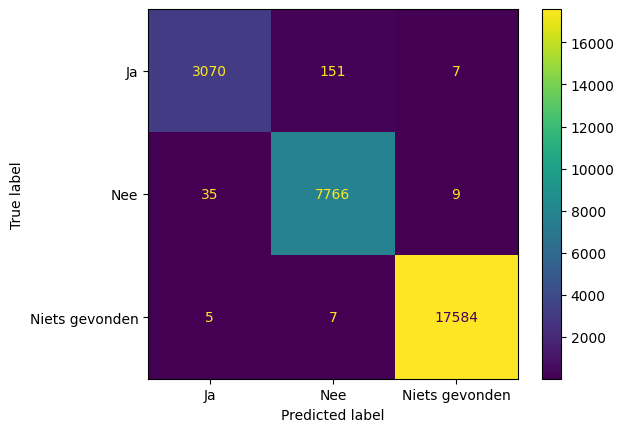

                precision    recall  f1-score   support

            Ja       0.99      0.95      0.97      3228
           Nee       0.98      0.99      0.99      7810
Niets gevonden       1.00      1.00      1.00     17596

      accuracy                           0.99     28634
     macro avg       0.99      0.98      0.99     28634
  weighted avg       0.99      0.99      0.99     28634



In [31]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# BEST MODEL

In [32]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus = Corpus_backup.copy()
Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.04, NNZs: 315, Bias: 0.000000, T: 68719, Avg. loss: 0.174775
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 148.41, NNZs: 142, Bias: 0.000000, T: 137438, Avg. loss: 0.122557
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 177.72, NNZs: 118, Bias: 0.000000, T: 206157, Avg. loss: 0.109684
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 202.36, NNZs: 108, Bias: 0.000000, T: 274876, Avg. loss: 0.102501
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 223.97, NNZs: 93, Bias: 0.000000, T: 343595, Avg. loss: 0.097365
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 243.56, NNZs: 85, Bias: 0.000000, T: 412314, Avg. loss: 0.093446
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 247.01, NNZs: 85, Bias: 0.000000, T: 481033, Avg. loss: 0.091315
Total training time: 2.34 seconds.
-- Epoch 8
Norm: 250.48, NNZs: 85, Bias: 0.000000, T: 549752, Avg. loss: 0.090868
Total training time: 2.67 seconds.
-- Epoch 9
Norm: 253.91, NNZs: 85, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


Norm: 128.25, NNZs: 469, Bias: 0.000000, T: 68719, Avg. loss: 0.241281
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 175.97, NNZs: 175, Bias: 0.000000, T: 137438, Avg. loss: 0.160486
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 211.21, NNZs: 136, Bias: 0.000000, T: 206157, Avg. loss: 0.139270
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 240.46, NNZs: 117, Bias: 0.000000, T: 274876, Avg. loss: 0.127801
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 265.80, NNZs: 106, Bias: 0.000000, T: 343595, Avg. loss: 0.119923
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 288.51, NNZs: 98, Bias: 0.000000, T: 412314, Avg. loss: 0.114505
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 292.59, NNZs: 94, Bias: 0.000000, T: 481033, Avg. loss: 0.111325
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 296.61, NNZs: 94, Bias: 0.000000, T: 549752, Avg. loss: 0.110651
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 300.57, NNZs: 93, Bias: 0.000000, T: 618471, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


Norm: 120.52, NNZs: 508, Bias: 0.000000, T: 68719, Avg. loss: 0.179218
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 164.13, NNZs: 187, Bias: 0.000000, T: 137438, Avg. loss: 0.120888
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 196.99, NNZs: 153, Bias: 0.000000, T: 206157, Avg. loss: 0.104944
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 224.56, NNZs: 138, Bias: 0.000000, T: 274876, Avg. loss: 0.096442
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 248.56, NNZs: 124, Bias: 0.000000, T: 343595, Avg. loss: 0.090775
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 270.09, NNZs: 110, Bias: 0.000000, T: 412314, Avg. loss: 0.086487
Total training time: 2.15 seconds.
-- Epoch 7
Norm: 274.00, NNZs: 107, Bias: 0.000000, T: 481033, Avg. loss: 0.084018
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 277.84, NNZs: 105, Bias: 0.000000, T: 549752, Avg. loss: 0.083373
Total training time: 2.86 seconds.
-- Epoch 9
Norm: 281.63, NNZs: 102, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.133 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.26, NNZs: 354, Bias: 0.000000, T: 68719, Avg. loss: 0.174383
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 148.72, NNZs: 144, Bias: 0.000000, T: 137438, Avg. loss: 0.122088
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 178.15, NNZs: 115, Bias: 0.000000, T: 206157, Avg. loss: 0.109186
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 202.68, NNZs: 101, Bias: 0.000000, T: 274876, Avg. loss: 0.101951
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 224.34, NNZs: 91, Bias: 0.000000, T: 343595, Avg. loss: 0.096831
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 243.88, NNZs: 86, Bias: 0.000000, T: 412314, Avg. loss: 0.092894
Total training time: 2.12 seconds.
-- Epoch 7
Norm: 247.39, NNZs: 84, Bias: 0.000000, T: 481033, Avg. loss: 0.091010
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 250.88, NNZs: 84, Bias: 0.000000, T: 549752, Avg. loss: 0.090470
Total training time: 2.77 seconds.
-- Epoch 9
Norm: 254.29, NNZs: 84, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 128.18, NNZs: 481, Bias: 0.000000, T: 68719, Avg. loss: 0.241727
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 175.84, NNZs: 181, Bias: 0.000000, T: 137438, Avg. loss: 0.160826
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 211.15, NNZs: 133, Bias: 0.000000, T: 206157, Avg. loss: 0.140016
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 240.38, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.128423
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 265.75, NNZs: 105, Bias: 0.000000, T: 343595, Avg. loss: 0.120873
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 288.44, NNZs: 97, Bias: 0.000000, T: 412314, Avg. loss: 0.115208
Total training time: 2.05 seconds.
-- Epoch 7
Norm: 292.53, NNZs: 96, Bias: 0.000000, T: 481033, Avg. loss: 0.112341
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 296.55, NNZs: 96, Bias: 0.000000, T: 549752, Avg. loss: 0.111558
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 300.50, NNZs: 93, Bias: 0.000000, T: 618471, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s


Norm: 120.57, NNZs: 460, Bias: 0.000000, T: 68719, Avg. loss: 0.179304
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 164.10, NNZs: 197, Bias: 0.000000, T: 137438, Avg. loss: 0.120701
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 197.13, NNZs: 156, Bias: 0.000000, T: 206157, Avg. loss: 0.105339
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 224.63, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.096676
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 248.59, NNZs: 121, Bias: 0.000000, T: 343595, Avg. loss: 0.090957
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 270.12, NNZs: 107, Bias: 0.000000, T: 412314, Avg. loss: 0.086762
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 274.03, NNZs: 106, Bias: 0.000000, T: 481033, Avg. loss: 0.084290
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 277.87, NNZs: 103, Bias: 0.000000, T: 549752, Avg. loss: 0.083667
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 281.66, NNZs: 101, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.128 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.04, NNZs: 380, Bias: 0.000000, T: 68719, Avg. loss: 0.175243
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 148.18, NNZs: 142, Bias: 0.000000, T: 137438, Avg. loss: 0.123310
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 177.50, NNZs: 115, Bias: 0.000000, T: 206157, Avg. loss: 0.110373
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 202.08, NNZs: 103, Bias: 0.000000, T: 274876, Avg. loss: 0.103008
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 223.78, NNZs: 95, Bias: 0.000000, T: 343595, Avg. loss: 0.097864
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 243.32, NNZs: 87, Bias: 0.000000, T: 412314, Avg. loss: 0.094095
Total training time: 2.14 seconds.
-- Epoch 7
Norm: 246.82, NNZs: 87, Bias: 0.000000, T: 481033, Avg. loss: 0.092042
Total training time: 2.48 seconds.
-- Epoch 8
Norm: 250.29, NNZs: 86, Bias: 0.000000, T: 549752, Avg. loss: 0.091466
Total training time: 2.83 seconds.
-- Epoch 9
Norm: 253.71, NNZs: 86, Bias: 0.000000, T: 618471,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 128.13, NNZs: 437, Bias: 0.000000, T: 68719, Avg. loss: 0.241116
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 175.80, NNZs: 180, Bias: 0.000000, T: 137438, Avg. loss: 0.160106
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 211.26, NNZs: 138, Bias: 0.000000, T: 206157, Avg. loss: 0.139664
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 240.43, NNZs: 119, Bias: 0.000000, T: 274876, Avg. loss: 0.127900
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 265.80, NNZs: 104, Bias: 0.000000, T: 343595, Avg. loss: 0.120396
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 288.42, NNZs: 98, Bias: 0.000000, T: 412314, Avg. loss: 0.114584
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 292.50, NNZs: 98, Bias: 0.000000, T: 481033, Avg. loss: 0.111802
Total training time: 2.32 seconds.
-- Epoch 8
Norm: 296.52, NNZs: 97, Bias: 0.000000, T: 549752, Avg. loss: 0.111037
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 300.48, NNZs: 96, Bias: 0.000000, T: 618471, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


Norm: 120.68, NNZs: 456, Bias: 0.000000, T: 68719, Avg. loss: 0.179782
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 164.33, NNZs: 191, Bias: 0.000000, T: 137438, Avg. loss: 0.120845
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 197.35, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.105214
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 225.00, NNZs: 138, Bias: 0.000000, T: 274876, Avg. loss: 0.096653
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 249.07, NNZs: 124, Bias: 0.000000, T: 343595, Avg. loss: 0.090768
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 270.60, NNZs: 111, Bias: 0.000000, T: 412314, Avg. loss: 0.086389
Total training time: 2.02 seconds.
-- Epoch 7
Norm: 274.53, NNZs: 108, Bias: 0.000000, T: 481033, Avg. loss: 0.084120
Total training time: 2.35 seconds.
-- Epoch 8
Norm: 278.39, NNZs: 106, Bias: 0.000000, T: 549752, Avg. loss: 0.083460
Total training time: 2.68 seconds.
-- Epoch 9
Norm: 282.19, NNZs: 104, Bias: 0.000000, T: 618471, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.134 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 108.93, NNZs: 346, Bias: 0.000000, T: 68720, Avg. loss: 0.175369
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 148.07, NNZs: 139, Bias: 0.000000, T: 137440, Avg. loss: 0.123176
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 177.43, NNZs: 116, Bias: 0.000000, T: 206160, Avg. loss: 0.110370
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 201.97, NNZs: 103, Bias: 0.000000, T: 274880, Avg. loss: 0.102775
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 223.62, NNZs: 93, Bias: 0.000000, T: 343600, Avg. loss: 0.097817
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 243.17, NNZs: 87, Bias: 0.000000, T: 412320, Avg. loss: 0.093990
Total training time: 2.16 seconds.
-- Epoch 7
Norm: 246.68, NNZs: 87, Bias: 0.000000, T: 481040, Avg. loss: 0.092003
Total training time: 2.52 seconds.
-- Epoch 8
Norm: 250.14, NNZs: 84, Bias: 0.000000, T: 549760, Avg. loss: 0.091436
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 253.54, NNZs: 84, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


Norm: 128.09, NNZs: 463, Bias: 0.000000, T: 68720, Avg. loss: 0.241140
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 175.95, NNZs: 173, Bias: 0.000000, T: 137440, Avg. loss: 0.160157
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 211.18, NNZs: 137, Bias: 0.000000, T: 206160, Avg. loss: 0.139333
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 240.27, NNZs: 122, Bias: 0.000000, T: 274880, Avg. loss: 0.127818
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 265.54, NNZs: 111, Bias: 0.000000, T: 343600, Avg. loss: 0.120408
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 288.14, NNZs: 98, Bias: 0.000000, T: 412320, Avg. loss: 0.114993
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 292.22, NNZs: 96, Bias: 0.000000, T: 481040, Avg. loss: 0.112232
Total training time: 2.53 seconds.
-- Epoch 8
Norm: 296.23, NNZs: 96, Bias: 0.000000, T: 549760, Avg. loss: 0.111388
Total training time: 2.90 seconds.
-- Epoch 9
Norm: 300.18, NNZs: 96, Bias: 0.000000, T: 618480, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


Norm: 120.47, NNZs: 450, Bias: 0.000000, T: 68720, Avg. loss: 0.179454
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 163.96, NNZs: 188, Bias: 0.000000, T: 137440, Avg. loss: 0.120346
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 196.96, NNZs: 162, Bias: 0.000000, T: 206160, Avg. loss: 0.105254
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 224.51, NNZs: 144, Bias: 0.000000, T: 274880, Avg. loss: 0.096861
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 248.51, NNZs: 126, Bias: 0.000000, T: 343600, Avg. loss: 0.091199
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 270.06, NNZs: 109, Bias: 0.000000, T: 412320, Avg. loss: 0.087070
Total training time: 2.29 seconds.
-- Epoch 7
Norm: 273.97, NNZs: 108, Bias: 0.000000, T: 481040, Avg. loss: 0.084611
Total training time: 2.64 seconds.
-- Epoch 8
Norm: 277.82, NNZs: 105, Bias: 0.000000, T: 549760, Avg. loss: 0.083913
Total training time: 3.00 seconds.
-- Epoch 9
Norm: 281.61, NNZs: 101, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.132 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 109.04, NNZs: 361, Bias: 0.000000, T: 68720, Avg. loss: 0.175480
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 148.42, NNZs: 142, Bias: 0.000000, T: 137440, Avg. loss: 0.123130
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 177.81, NNZs: 116, Bias: 0.000000, T: 206160, Avg. loss: 0.110326
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 202.53, NNZs: 100, Bias: 0.000000, T: 274880, Avg. loss: 0.102556
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 224.12, NNZs: 94, Bias: 0.000000, T: 343600, Avg. loss: 0.097557
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 243.69, NNZs: 86, Bias: 0.000000, T: 412320, Avg. loss: 0.093526
Total training time: 2.05 seconds.
-- Epoch 7
Norm: 247.23, NNZs: 85, Bias: 0.000000, T: 481040, Avg. loss: 0.091613
Total training time: 2.39 seconds.
-- Epoch 8
Norm: 250.70, NNZs: 85, Bias: 0.000000, T: 549760, Avg. loss: 0.091057
Total training time: 2.73 seconds.
-- Epoch 9
Norm: 254.12, NNZs: 84, Bias: 0.000000, T: 618480,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


Norm: 128.00, NNZs: 460, Bias: 0.000000, T: 68720, Avg. loss: 0.242451
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 175.88, NNZs: 175, Bias: 0.000000, T: 137440, Avg. loss: 0.161227
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 211.20, NNZs: 137, Bias: 0.000000, T: 206160, Avg. loss: 0.140128
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 240.47, NNZs: 122, Bias: 0.000000, T: 274880, Avg. loss: 0.128599
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 265.92, NNZs: 110, Bias: 0.000000, T: 343600, Avg. loss: 0.120999
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 288.67, NNZs: 101, Bias: 0.000000, T: 412320, Avg. loss: 0.115357
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 292.75, NNZs: 100, Bias: 0.000000, T: 481040, Avg. loss: 0.112407
Total training time: 2.55 seconds.
-- Epoch 8
Norm: 296.77, NNZs: 98, Bias: 0.000000, T: 549760, Avg. loss: 0.111601
Total training time: 2.91 seconds.
-- Epoch 9
Norm: 300.74, NNZs: 97, Bias: 0.000000, T: 618480, Avg. lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


Norm: 120.44, NNZs: 538, Bias: 0.000000, T: 68720, Avg. loss: 0.179958
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 164.29, NNZs: 189, Bias: 0.000000, T: 137440, Avg. loss: 0.121149
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 197.31, NNZs: 157, Bias: 0.000000, T: 206160, Avg. loss: 0.105249
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 224.92, NNZs: 141, Bias: 0.000000, T: 274880, Avg. loss: 0.096620
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 248.89, NNZs: 122, Bias: 0.000000, T: 343600, Avg. loss: 0.090755
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 270.42, NNZs: 109, Bias: 0.000000, T: 412320, Avg. loss: 0.086494
Total training time: 2.26 seconds.
-- Epoch 7
Norm: 274.35, NNZs: 106, Bias: 0.000000, T: 481040, Avg. loss: 0.084320
Total training time: 2.60 seconds.
-- Epoch 8
Norm: 278.22, NNZs: 104, Bias: 0.000000, T: 549760, Avg. loss: 0.083565
Total training time: 2.95 seconds.
-- Epoch 9
Norm: 282.01, NNZs: 101, Bias: 0.000000, T: 618480, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.131 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119747752829390.66, NNZs: 382355, Bias: 0.000000, T: 68719, Avg. loss: 149007418040909010305024.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 112971131293639.58, NNZs: 382355, Bias: 0.000000, T: 137438, Avg. loss: 123246445419358576443392.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 109510313607102.38, NNZs: 382355, Bias: 0.000000, T: 206157, Avg. loss: 101907750922912656261120.000000
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 107238518384944.75, NNZs: 382355, Bias: 0.000000, T: 274876, Avg. loss: 91967099973716844478464.000000
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 105561869775437.62, NNZs: 382355, Bias: 0.000000, T: 343595, Avg. loss: 85916373257905300832256.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 104242452266171.34, NNZs: 382355, Bias: 0.000000, T: 412314, Avg. loss: 81612304916064323502080.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 131643143336632.09, NNZs: 382354, Bias: 0.000000, T: 68719, Avg. loss: 180501329396548319051776.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 124482881769575.66, NNZs: 382355, Bias: 0.000000, T: 137438, Avg. loss: 151654942217438620549120.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 120846823329900.52, NNZs: 382355, Bias: 0.000000, T: 206157, Avg. loss: 126100959186257491001344.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 118456410545957.55, NNZs: 382355, Bias: 0.000000, T: 274876, Avg. loss: 114174728759935747751936.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 116694082304984.53, NNZs: 382355, Bias: 0.000000, T: 343595, Avg. loss: 106829728349170463408128.000000
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 115305863747880.97, NNZs: 382355, Bias: 0.000000, T: 412314, Avg. loss: 101658618414425549307904.000000
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 92959372411729.06, NNZs: 382352, Bias: 0.000000, T: 68719, Avg. loss: 87893893895990666067968.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 86952110859817.52, NNZs: 382355, Bias: 0.000000, T: 137438, Avg. loss: 71687240764198240649216.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 83893495817866.23, NNZs: 382355, Bias: 0.000000, T: 206157, Avg. loss: 57947487065628993388544.000000
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 81869435037406.91, NNZs: 382355, Bias: 0.000000, T: 274876, Avg. loss: 51697714394530456797184.000000
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 80373783369921.62, NNZs: 382355, Bias: 0.000000, T: 343595, Avg. loss: 47863893357546340089856.000000
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 79195438690213.42, NNZs: 382355, Bias: 0.000000, T: 412314, Avg. loss: 45153746068261562220544.000000
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.288 total time=  48.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 129357124928033.94, NNZs: 382653, Bias: 0.000000, T: 68719, Avg. loss: 171256652795330426830848.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 122247889320460.50, NNZs: 382653, Bias: 0.000000, T: 137438, Avg. loss: 146688925686429537796096.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 118641387750108.23, NNZs: 382653, Bias: 0.000000, T: 206157, Avg. loss: 121809383089673873653760.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 116262955578925.08, NNZs: 382653, Bias: 0.000000, T: 274876, Avg. loss: 110337912492437704540160.000000
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 114507534917672.06, NNZs: 382653, Bias: 0.000000, T: 343595, Avg. loss: 103194635324773774655488.000000
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 113126274838507.02, NNZs: 382653, Bias: 0.000000, T: 412314, Avg. loss: 98207148092289856831488.000000
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 116613413620902.56, NNZs: 382653, Bias: 0.000000, T: 68719, Avg. loss: 139275169888504324816896.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 109885859561253.56, NNZs: 382653, Bias: 0.000000, T: 137438, Avg. loss: 116563814743116724830208.000000
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 106459534588421.67, NNZs: 382653, Bias: 0.000000, T: 206157, Avg. loss: 95784738440328589082624.000000
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 104211754566385.06, NNZs: 382653, Bias: 0.000000, T: 274876, Avg. loss: 86293924589101947813888.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 102547754771027.38, NNZs: 382653, Bias: 0.000000, T: 343595, Avg. loss: 80489522637505925480448.000000
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 101237429423217.06, NNZs: 382653, Bias: 0.000000, T: 412314, Avg. loss: 76402308000553222799360.000000
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 109634852172730.64, NNZs: 382652, Bias: 0.000000, T: 68719, Avg. loss: 122601766408608274186240.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 103150770884999.34, NNZs: 382653, Bias: 0.000000, T: 137438, Avg. loss: 100885678758734545813504.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 99858975796693.75, NNZs: 382653, Bias: 0.000000, T: 206157, Avg. loss: 82773843944614070845440.000000
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 97681337939337.06, NNZs: 382653, Bias: 0.000000, T: 274876, Avg. loss: 74457340633952534134784.000000
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 96073874752250.14, NNZs: 382653, Bias: 0.000000, T: 343595, Avg. loss: 69336410149247382454272.000000
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 94806002495097.44, NNZs: 382653, Bias: 0.000000, T: 412314, Avg. loss: 65738809460170401251328.000000
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.87 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.299 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 122376717141129.81, NNZs: 382608, Bias: 0.000000, T: 68719, Avg. loss: 151285844327756619317248.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 115531218141709.77, NNZs: 382608, Bias: 0.000000, T: 137438, Avg. loss: 128099061829027221209088.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 112039706600623.52, NNZs: 382608, Bias: 0.000000, T: 206157, Avg. loss: 106396737057756264005632.000000
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 109740566260753.06, NNZs: 382608, Bias: 0.000000, T: 274876, Avg. loss: 96075649049814884155392.000000
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 108041907161973.66, NNZs: 382608, Bias: 0.000000, T: 343595, Avg. loss: 89816645121203868008448.000000
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 106703649062083.39, NNZs: 382608, Bias: 0.000000, T: 412314, Avg. loss: 85369970780921483231232.000000
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 128966387504878.09, NNZs: 382606, Bias: 0.000000, T: 68719, Avg. loss: 171426436026321952833536.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 121842720052664.84, NNZs: 382608, Bias: 0.000000, T: 137438, Avg. loss: 145489046942173028679680.000000
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 118227660220619.97, NNZs: 382608, Bias: 0.000000, T: 206157, Avg. loss: 120700546521419216846848.000000
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 115852409208246.64, NNZs: 382608, Bias: 0.000000, T: 274876, Avg. loss: 109198842434328629084160.000000
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 114098501756052.12, NNZs: 382608, Bias: 0.000000, T: 343595, Avg. loss: 102148077366942371938304.000000
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 112717636117904.62, NNZs: 382608, Bias: 0.000000, T: 412314, Avg. loss: 97162638002879211765760.000000
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 69448416825204.71, NNZs: 382596, Bias: 0.000000, T: 68719, Avg. loss: 48586319431899801452544.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 64316546989915.12, NNZs: 382608, Bias: 0.000000, T: 137438, Avg. loss: 38876522133369074483200.000000
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 61684186750876.06, NNZs: 382608, Bias: 0.000000, T: 206157, Avg. loss: 30598840802636468322304.000000
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 59954168258653.11, NNZs: 382608, Bias: 0.000000, T: 274876, Avg. loss: 26844656784829401006080.000000
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 58676513061008.38, NNZs: 382608, Bias: 0.000000, T: 343595, Avg. loss: 24562461859983835267072.000000
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 57667694370838.69, NNZs: 382608, Bias: 0.000000, T: 412314, Avg. loss: 22970355576062200512512.000000
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.85 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.294 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114936841853192.02, NNZs: 382923, Bias: 0.000000, T: 68720, Avg. loss: 135868932485234816974848.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 108231172449991.95, NNZs: 382923, Bias: 0.000000, T: 137440, Avg. loss: 112452842333299604979712.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 104823350911066.91, NNZs: 382923, Bias: 0.000000, T: 206160, Avg. loss: 92480222227273409888256.000000
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 102574429901166.03, NNZs: 382923, Bias: 0.000000, T: 274880, Avg. loss: 83414608947571622674432.000000
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 100916937933704.16, NNZs: 382923, Bias: 0.000000, T: 343600, Avg. loss: 77680116131699372326912.000000
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 99610517843256.38, NNZs: 382923, Bias: 0.000000, T: 412320, Avg. loss: 73721055507733024866304.000000
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 129933870616121.02, NNZs: 382923, Bias: 0.000000, T: 68720, Avg. loss: 172370055269227664769024.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 122799849267747.38, NNZs: 382923, Bias: 0.000000, T: 137440, Avg. loss: 149506283136862585356288.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 119157211254131.59, NNZs: 382923, Bias: 0.000000, T: 206160, Avg. loss: 124342456939596914622464.000000
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 116763810691425.55, NNZs: 382923, Bias: 0.000000, T: 274880, Avg. loss: 112528484542172352217088.000000
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 114995056457757.61, NNZs: 382923, Bias: 0.000000, T: 343600, Avg. loss: 105246518581590625353728.000000
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 113602949631010.16, NNZs: 382923, Bias: 0.000000, T: 412320, Avg. loss: 100152734993539332571136.000000
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 130306646113625.98, NNZs: 382922, Bias: 0.000000, T: 68720, Avg. loss: 177497959979314059411456.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 123168961431643.47, NNZs: 382923, Bias: 0.000000, T: 137440, Avg. loss: 149230776382665502228480.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 119540496406455.95, NNZs: 382923, Bias: 0.000000, T: 206160, Avg. loss: 123766723489470416420864.000000
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 117161687397656.84, NNZs: 382923, Bias: 0.000000, T: 274880, Avg. loss: 111992341418021226545152.000000
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 115404084263541.92, NNZs: 382923, Bias: 0.000000, T: 343600, Avg. loss: 104762005253752363155456.000000
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 114019627404729.45, NNZs: 382923, Bias: 0.000000, T: 412320, Avg. loss: 99637713103764739588096.000000
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.89 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.305 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 133234127615155.61, NNZs: 383196, Bias: 0.000000, T: 68720, Avg. loss: 181868809429902310768640.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 126079064439728.12, NNZs: 383196, Bias: 0.000000, T: 137440, Avg. loss: 156279371919401215328256.000000
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 122439851573241.67, NNZs: 383196, Bias: 0.000000, T: 206160, Avg. loss: 130210179452793402687488.000000
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 120050251476862.34, NNZs: 383196, Bias: 0.000000, T: 274880, Avg. loss: 118046565124909580681216.000000
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 118288963555243.14, NNZs: 383196, Bias: 0.000000, T: 343600, Avg. loss: 110493207690866916851712.000000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 116900108630823.89, NNZs: 383196, Bias: 0.000000, T: 412320, Avg. loss: 105220073482361566658560.000000
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 128848708075554.89, NNZs: 383196, Bias: 0.000000, T: 68720, Avg. loss: 171444553341682380177408.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 121718569893769.17, NNZs: 383196, Bias: 0.000000, T: 137440, Avg. loss: 146040617443805592813568.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 118096466237210.45, NNZs: 383196, Bias: 0.000000, T: 206160, Avg. loss: 121273509194869445230592.000000
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 115714836535835.98, NNZs: 383196, Bias: 0.000000, T: 274880, Avg. loss: 109675065932437161771008.000000
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 113957544712674.38, NNZs: 383196, Bias: 0.000000, T: 343600, Avg. loss: 102583113169912511594496.000000
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 112571259656994.69, NNZs: 383196, Bias: 0.000000, T: 412320, Avg. loss: 97576620327767772233728.000000
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 131516410221477.89, NNZs: 383196, Bias: 0.000000, T: 68720, Avg. loss: 183615653943988581302272.000000
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 124301100545022.52, NNZs: 383196, Bias: 0.000000, T: 137440, Avg. loss: 152540196015744479133696.000000
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 120643212258873.91, NNZs: 383196, Bias: 0.000000, T: 206160, Avg. loss: 126529930410352424517632.000000
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 118232819100716.97, NNZs: 383196, Bias: 0.000000, T: 274880, Avg. loss: 114621958650940534816768.000000
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 116456316341162.80, NNZs: 383196, Bias: 0.000000, T: 343600, Avg. loss: 107131069052586412736512.000000
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 115060900437477.81, NNZs: 383196, Bias: 0.000000, T: 412320, Avg. loss: 101924123880829065625600.000000
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.97 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.300 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 132.17, NNZs: 462, Bias: 0.000000, T: 68719, Avg. loss: 0.065050
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 170.72, NNZs: 180, Bias: 0.000000, T: 137438, Avg. loss: 0.035318
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 198.71, NNZs: 162, Bias: 0.000000, T: 206157, Avg. loss: 0.030794
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 222.09, NNZs: 152, Bias: 0.000000, T: 274876, Avg. loss: 0.028211
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 242.43, NNZs: 149, Bias: 0.000000, T: 343595, Avg. loss: 0.026889
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 260.62, NNZs: 142, Bias: 0.000000, T: 412314, Avg. loss: 0.026254
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 159.81, NNZs: 740, Bias: 0.000000, T: 68719, Avg. loss: 0.092994
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 203.73, NNZs: 206, Bias: 0.000000, T: 137438, Avg. loss: 0.047269
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 235.44, NNZs: 183, Bias: 0.000000, T: 206157, Avg. loss: 0.039652
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 261.70, NNZs: 176, Bias: 0.000000, T: 274876, Avg. loss: 0.036967
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 284.53, NNZs: 160, Bias: 0.000000, T: 343595, Avg. loss: 0.034820
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 305.11, NNZs: 154, Bias: 0.000000, T: 412314, Avg. loss: 0.033694
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 136.90, NNZs: 588, Bias: 0.000000, T: 68719, Avg. loss: 0.061472
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 175.32, NNZs: 178, Bias: 0.000000, T: 137438, Avg. loss: 0.031195
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 203.04, NNZs: 154, Bias: 0.000000, T: 206157, Avg. loss: 0.025616
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 225.74, NNZs: 143, Bias: 0.000000, T: 274876, Avg. loss: 0.022991
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 245.27, NNZs: 127, Bias: 0.000000, T: 343595, Avg. loss: 0.021098
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 262.60, NNZs: 121, Bias: 0.000000, T: 412314, Avg. loss: 0.019827
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.994 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.98, NNZs: 495, Bias: 0.000000, T: 68719, Avg. loss: 0.065364
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 170.58, NNZs: 180, Bias: 0.000000, T: 137438, Avg. loss: 0.035669
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 198.91, NNZs: 162, Bias: 0.000000, T: 206157, Avg. loss: 0.030641
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 222.37, NNZs: 150, Bias: 0.000000, T: 274876, Avg. loss: 0.028762
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 242.78, NNZs: 146, Bias: 0.000000, T: 343595, Avg. loss: 0.026989
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 261.07, NNZs: 140, Bias: 0.000000, T: 412314, Avg. loss: 0.025869
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 160.20, NNZs: 715, Bias: 0.000000, T: 68719, Avg. loss: 0.093862
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 204.25, NNZs: 218, Bias: 0.000000, T: 137438, Avg. loss: 0.048353
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 236.31, NNZs: 187, Bias: 0.000000, T: 206157, Avg. loss: 0.040920
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 262.62, NNZs: 180, Bias: 0.000000, T: 274876, Avg. loss: 0.037531
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 285.65, NNZs: 163, Bias: 0.000000, T: 343595, Avg. loss: 0.035984
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 306.39, NNZs: 161, Bias: 0.000000, T: 412314, Avg. loss: 0.034366
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.49 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 136.75, NNZs: 571, Bias: 0.000000, T: 68719, Avg. loss: 0.061390
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 175.47, NNZs: 187, Bias: 0.000000, T: 137438, Avg. loss: 0.031873
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 203.45, NNZs: 155, Bias: 0.000000, T: 206157, Avg. loss: 0.026300
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 226.30, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.023485
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 246.09, NNZs: 133, Bias: 0.000000, T: 343595, Avg. loss: 0.021872
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 263.64, NNZs: 133, Bias: 0.000000, T: 412314, Avg. loss: 0.020542
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.48 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  49.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.62, NNZs: 506, Bias: 0.000000, T: 68719, Avg. loss: 0.065145
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 169.95, NNZs: 183, Bias: 0.000000, T: 137438, Avg. loss: 0.035441
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 198.17, NNZs: 175, Bias: 0.000000, T: 206157, Avg. loss: 0.030685
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 221.50, NNZs: 156, Bias: 0.000000, T: 274876, Avg. loss: 0.028234
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 241.95, NNZs: 153, Bias: 0.000000, T: 343595, Avg. loss: 0.027010
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 260.27, NNZs: 147, Bias: 0.000000, T: 412314, Avg. loss: 0.026070
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 159.58, NNZs: 726, Bias: 0.000000, T: 68719, Avg. loss: 0.093503
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 203.55, NNZs: 202, Bias: 0.000000, T: 137438, Avg. loss: 0.047095
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 235.43, NNZs: 173, Bias: 0.000000, T: 206157, Avg. loss: 0.040109
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 261.63, NNZs: 173, Bias: 0.000000, T: 274876, Avg. loss: 0.036647
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 284.47, NNZs: 157, Bias: 0.000000, T: 343595, Avg. loss: 0.034775
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 305.02, NNZs: 158, Bias: 0.000000, T: 412314, Avg. loss: 0.033935
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 137.26, NNZs: 558, Bias: 0.000000, T: 68719, Avg. loss: 0.062048
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 175.95, NNZs: 183, Bias: 0.000000, T: 137438, Avg. loss: 0.031672
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 203.73, NNZs: 159, Bias: 0.000000, T: 206157, Avg. loss: 0.025992
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 226.45, NNZs: 141, Bias: 0.000000, T: 274876, Avg. loss: 0.023062
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 246.00, NNZs: 131, Bias: 0.000000, T: 343595, Avg. loss: 0.021409
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 263.41, NNZs: 130, Bias: 0.000000, T: 412314, Avg. loss: 0.019962
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.46 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.43, NNZs: 476, Bias: 0.000000, T: 68720, Avg. loss: 0.064779
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 169.90, NNZs: 178, Bias: 0.000000, T: 137440, Avg. loss: 0.035256
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 198.07, NNZs: 168, Bias: 0.000000, T: 206160, Avg. loss: 0.030862
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 221.37, NNZs: 148, Bias: 0.000000, T: 274880, Avg. loss: 0.028451
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 241.77, NNZs: 152, Bias: 0.000000, T: 343600, Avg. loss: 0.027347
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 260.13, NNZs: 148, Bias: 0.000000, T: 412320, Avg. loss: 0.026442
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 159.54, NNZs: 672, Bias: 0.000000, T: 68720, Avg. loss: 0.092929
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 203.74, NNZs: 205, Bias: 0.000000, T: 137440, Avg. loss: 0.047545
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 235.58, NNZs: 185, Bias: 0.000000, T: 206160, Avg. loss: 0.039842
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 261.67, NNZs: 168, Bias: 0.000000, T: 274880, Avg. loss: 0.036445
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 284.49, NNZs: 168, Bias: 0.000000, T: 343600, Avg. loss: 0.034603
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 304.95, NNZs: 152, Bias: 0.000000, T: 412320, Avg. loss: 0.033319
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 136.95, NNZs: 648, Bias: 0.000000, T: 68720, Avg. loss: 0.061821
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 175.63, NNZs: 176, Bias: 0.000000, T: 137440, Avg. loss: 0.031679
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 203.68, NNZs: 158, Bias: 0.000000, T: 206160, Avg. loss: 0.026218
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 226.48, NNZs: 152, Bias: 0.000000, T: 274880, Avg. loss: 0.023311
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 246.23, NNZs: 143, Bias: 0.000000, T: 343600, Avg. loss: 0.021574
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 263.66, NNZs: 133, Bias: 0.000000, T: 412320, Avg. loss: 0.020173
Total training time: 1.86 seconds.
Convergence after 6 epochs took 1.90 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.995 total time=  57.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.53, NNZs: 499, Bias: 0.000000, T: 68720, Avg. loss: 0.064739
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 169.63, NNZs: 189, Bias: 0.000000, T: 137440, Avg. loss: 0.034203
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 197.54, NNZs: 173, Bias: 0.000000, T: 206160, Avg. loss: 0.029493
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 220.59, NNZs: 156, Bias: 0.000000, T: 274880, Avg. loss: 0.026606
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 240.74, NNZs: 143, Bias: 0.000000, T: 343600, Avg. loss: 0.025766
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 258.81, NNZs: 144, Bias: 0.000000, T: 412320, Avg. loss: 0.024576
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 159.72, NNZs: 703, Bias: 0.000000, T: 68720, Avg. loss: 0.092753
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 203.56, NNZs: 206, Bias: 0.000000, T: 137440, Avg. loss: 0.047464
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 235.42, NNZs: 185, Bias: 0.000000, T: 206160, Avg. loss: 0.040171
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 261.78, NNZs: 174, Bias: 0.000000, T: 274880, Avg. loss: 0.036858
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 284.63, NNZs: 168, Bias: 0.000000, T: 343600, Avg. loss: 0.035042
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 305.17, NNZs: 152, Bias: 0.000000, T: 412320, Avg. loss: 0.033812
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 137.22, NNZs: 568, Bias: 0.000000, T: 68720, Avg. loss: 0.062234
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 175.79, NNZs: 181, Bias: 0.000000, T: 137440, Avg. loss: 0.031420
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 203.69, NNZs: 153, Bias: 0.000000, T: 206160, Avg. loss: 0.025790
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 226.35, NNZs: 143, Bias: 0.000000, T: 274880, Avg. loss: 0.022874
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 245.82, NNZs: 127, Bias: 0.000000, T: 343600, Avg. loss: 0.021111
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 263.21, NNZs: 132, Bias: 0.000000, T: 412320, Avg. loss: 0.019970
Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.33 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.994 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.06, NNZs: 501, Bias: 0.000000, T: 68719, Avg. loss: 0.073588
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 105.57, NNZs: 395, Bias: 0.000000, T: 137438, Avg. loss: 0.056245
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 124.56, NNZs: 365, Bias: 0.000000, T: 206157, Avg. loss: 0.054641
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 140.62, NNZs: 338, Bias: 0.000000, T: 274876, Avg. loss: 0.053971
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 155.02, NNZs: 332, Bias: 0.000000, T: 343595, Avg. loss: 0.053914
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 167.91, NNZs: 330, Bias: 0.000000, T: 412314, Avg. loss: 0.053534
Total training time: 2.21 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 71.04, NNZs: 474, Bias: 0.000000, T: 68719, Avg. loss: 0.112048
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 95.04, NNZs: 383, Bias: 0.000000, T: 137438, Avg. loss: 0.085273
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 112.87, NNZs: 345, Bias: 0.000000, T: 206157, Avg. loss: 0.080221
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 127.75, NNZs: 329, Bias: 0.000000, T: 274876, Avg. loss: 0.078123
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 140.42, NNZs: 320, Bias: 0.000000, T: 343595, Avg. loss: 0.077249
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 151.78, NNZs: 311, Bias: 0.000000, T: 412314, Avg. loss: 0.076575
Total training time: 2.09 seconds.
Convergence after 6 epochs took 2.12 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 50.96, NNZs: 376, Bias: 0.000000, T: 68719, Avg. loss: 0.110478
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 69.09, NNZs: 290, Bias: 0.000000, T: 137438, Avg. loss: 0.090845
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 82.61, NNZs: 261, Bias: 0.000000, T: 206157, Avg. loss: 0.087289
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 93.92, NNZs: 254, Bias: 0.000000, T: 274876, Avg. loss: 0.085970
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 103.91, NNZs: 245, Bias: 0.000000, T: 343595, Avg. loss: 0.085150
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 112.92, NNZs: 240, Bias: 0.000000, T: 412314, Avg. loss: 0.084465
Total training time: 2.14 seconds.
Convergence after 6 epochs took 2.17 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.08, NNZs: 474, Bias: 0.000000, T: 68719, Avg. loss: 0.073645
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 106.00, NNZs: 375, Bias: 0.000000, T: 137438, Avg. loss: 0.056378
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 125.24, NNZs: 347, Bias: 0.000000, T: 206157, Avg. loss: 0.054705
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 141.32, NNZs: 345, Bias: 0.000000, T: 274876, Avg. loss: 0.054276
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 155.44, NNZs: 332, Bias: 0.000000, T: 343595, Avg. loss: 0.053587
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 168.67, NNZs: 331, Bias: 0.000000, T: 412314, Avg. loss: 0.053812
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 70.88, NNZs: 493, Bias: 0.000000, T: 68719, Avg. loss: 0.113518
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 95.13, NNZs: 379, Bias: 0.000000, T: 137438, Avg. loss: 0.086458
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 113.13, NNZs: 339, Bias: 0.000000, T: 206157, Avg. loss: 0.081785
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 127.70, NNZs: 329, Bias: 0.000000, T: 274876, Avg. loss: 0.079687
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 140.62, NNZs: 322, Bias: 0.000000, T: 343595, Avg. loss: 0.078617
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 152.15, NNZs: 304, Bias: 0.000000, T: 412314, Avg. loss: 0.078270
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 51.01, NNZs: 372, Bias: 0.000000, T: 68719, Avg. loss: 0.111375
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 69.07, NNZs: 289, Bias: 0.000000, T: 137438, Avg. loss: 0.091472
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 82.66, NNZs: 263, Bias: 0.000000, T: 206157, Avg. loss: 0.088345
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 93.98, NNZs: 256, Bias: 0.000000, T: 274876, Avg. loss: 0.086963
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 103.83, NNZs: 252, Bias: 0.000000, T: 343595, Avg. loss: 0.086202
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 112.85, NNZs: 245, Bias: 0.000000, T: 412314, Avg. loss: 0.085737
Total training time: 1.98 seconds.
Convergence after 6 epochs took 2.01 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.026 total time=  53.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.17, NNZs: 486, Bias: 0.000000, T: 68719, Avg. loss: 0.073236
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 106.08, NNZs: 395, Bias: 0.000000, T: 137438, Avg. loss: 0.055813
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 125.00, NNZs: 366, Bias: 0.000000, T: 206157, Avg. loss: 0.053765
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 141.12, NNZs: 343, Bias: 0.000000, T: 274876, Avg. loss: 0.053250
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 155.17, NNZs: 332, Bias: 0.000000, T: 343595, Avg. loss: 0.052951
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 168.09, NNZs: 335, Bias: 0.000000, T: 412314, Avg. loss: 0.052631
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 71.17, NNZs: 493, Bias: 0.000000, T: 68719, Avg. loss: 0.111898
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 95.08, NNZs: 380, Bias: 0.000000, T: 137438, Avg. loss: 0.085060
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 112.79, NNZs: 351, Bias: 0.000000, T: 206157, Avg. loss: 0.079920
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 127.59, NNZs: 328, Bias: 0.000000, T: 274876, Avg. loss: 0.078159
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 140.33, NNZs: 320, Bias: 0.000000, T: 343595, Avg. loss: 0.076935
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 151.79, NNZs: 311, Bias: 0.000000, T: 412314, Avg. loss: 0.076621
Total training time: 1.95 seconds.
Convergence after 6 epochs took 1.98 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 51.09, NNZs: 372, Bias: 0.000000, T: 68719, Avg. loss: 0.111238
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 69.02, NNZs: 283, Bias: 0.000000, T: 137438, Avg. loss: 0.091346
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 82.55, NNZs: 260, Bias: 0.000000, T: 206157, Avg. loss: 0.088019
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 93.75, NNZs: 251, Bias: 0.000000, T: 274876, Avg. loss: 0.086580
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 103.69, NNZs: 249, Bias: 0.000000, T: 343595, Avg. loss: 0.086131
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 112.53, NNZs: 246, Bias: 0.000000, T: 412314, Avg. loss: 0.085415
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.05 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.52, NNZs: 478, Bias: 0.000000, T: 68720, Avg. loss: 0.073244
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 106.52, NNZs: 374, Bias: 0.000000, T: 137440, Avg. loss: 0.055781
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 125.11, NNZs: 359, Bias: 0.000000, T: 206160, Avg. loss: 0.053727
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 141.45, NNZs: 358, Bias: 0.000000, T: 274880, Avg. loss: 0.053485
Total training time: 1.49 seconds.
-- Epoch 5
Norm: 155.67, NNZs: 342, Bias: 0.000000, T: 343600, Avg. loss: 0.052751
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 168.49, NNZs: 329, Bias: 0.000000, T: 412320, Avg. loss: 0.052580
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 71.38, NNZs: 483, Bias: 0.000000, T: 68720, Avg. loss: 0.112063
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 95.31, NNZs: 361, Bias: 0.000000, T: 137440, Avg. loss: 0.085138
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 112.84, NNZs: 334, Bias: 0.000000, T: 206160, Avg. loss: 0.080250
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 127.53, NNZs: 317, Bias: 0.000000, T: 274880, Avg. loss: 0.078196
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 140.37, NNZs: 307, Bias: 0.000000, T: 343600, Avg. loss: 0.077149
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 151.86, NNZs: 306, Bias: 0.000000, T: 412320, Avg. loss: 0.076637
Total training time: 2.27 seconds.
Convergence after 6 epochs took 2.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 51.04, NNZs: 366, Bias: 0.000000, T: 68720, Avg. loss: 0.111373
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 69.10, NNZs: 290, Bias: 0.000000, T: 137440, Avg. loss: 0.091540
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 82.58, NNZs: 268, Bias: 0.000000, T: 206160, Avg. loss: 0.088208
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 93.91, NNZs: 252, Bias: 0.000000, T: 274880, Avg. loss: 0.086672
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 103.80, NNZs: 251, Bias: 0.000000, T: 343600, Avg. loss: 0.086060
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 112.76, NNZs: 247, Bias: 0.000000, T: 412320, Avg. loss: 0.085474
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.031 total time=  53.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 80.06, NNZs: 481, Bias: 0.000000, T: 68720, Avg. loss: 0.073099
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 105.67, NNZs: 381, Bias: 0.000000, T: 137440, Avg. loss: 0.055070
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 124.85, NNZs: 349, Bias: 0.000000, T: 206160, Avg. loss: 0.053166
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 140.58, NNZs: 331, Bias: 0.000000, T: 274880, Avg. loss: 0.052396
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 154.79, NNZs: 333, Bias: 0.000000, T: 343600, Avg. loss: 0.052114
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 167.54, NNZs: 325, Bias: 0.000000, T: 412320, Avg. loss: 0.051733
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 71.34, NNZs: 500, Bias: 0.000000, T: 68720, Avg. loss: 0.113272
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 95.13, NNZs: 380, Bias: 0.000000, T: 137440, Avg. loss: 0.086109
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 112.97, NNZs: 340, Bias: 0.000000, T: 206160, Avg. loss: 0.080572
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 127.83, NNZs: 322, Bias: 0.000000, T: 274880, Avg. loss: 0.078677
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 140.68, NNZs: 312, Bias: 0.000000, T: 343600, Avg. loss: 0.077444
Total training time: 1.95 seconds.
-- Epoch 6
Norm: 152.28, NNZs: 308, Bias: 0.000000, T: 412320, Avg. loss: 0.076903
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 51.06, NNZs: 375, Bias: 0.000000, T: 68720, Avg. loss: 0.112192
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 69.08, NNZs: 291, Bias: 0.000000, T: 137440, Avg. loss: 0.092366
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 82.70, NNZs: 265, Bias: 0.000000, T: 206160, Avg. loss: 0.088620
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 94.12, NNZs: 261, Bias: 0.000000, T: 274880, Avg. loss: 0.087303
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 104.06, NNZs: 250, Bias: 0.000000, T: 343600, Avg. loss: 0.086268
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 113.06, NNZs: 246, Bias: 0.000000, T: 412320, Avg. loss: 0.085983
Total training time: 2.16 seconds.
Convergence after 6 epochs took 2.19 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.028 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 652997, Bias: -0.409521, T: 68719, Avg. loss: 0.087791
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 652997, Bias: -0.469849, T: 137438, Avg. loss: 0.060916
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 652997, Bias: -0.503464, T: 206157, Avg. loss: 0.056550
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 652997, Bias: -0.526658, T: 274876, Avg. loss: 0.054396
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 652997, Bias: -0.544262, T: 343595, Avg. loss: 0.053031
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 652997, Bias: -0.558410, T: 412314, Avg. loss: 0.052046
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 3.67, NNZs: 652997, Bias: -0.328945, T: 68719, Avg. loss: 0.162636
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 652997, Bias: -0.410890, T: 137438, Avg. loss: 0.130237
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 652997, Bias: -0.451253, T: 206157, Avg. loss: 0.122448
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 652997, Bias: -0.477628, T: 274876, Avg. loss: 0.118332
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 652997, Bias: -0.497310, T: 343595, Avg. loss: 0.115468
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 5.27, NNZs: 652997, Bias: -0.513092, T: 412314, Avg. loss: 0.113230
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 4.33, NNZs: 652997, Bias: 0.221315, T: 68719, Avg. loss: 0.154111
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 652997, Bias: 0.317719, T: 137438, Avg. loss: 0.117486
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 652997, Bias: 0.377339, T: 206157, Avg. loss: 0.101864
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 6.77, NNZs: 652997, Bias: 0.417504, T: 274876, Avg. loss: 0.093047
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 7.15, NNZs: 652997, Bias: 0.445997, T: 343595, Avg. loss: 0.087370
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 7.45, NNZs: 652997, Bias: 0.467359, T: 412314, Avg. loss: 0.083308
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.597 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 654308, Bias: -0.406763, T: 68719, Avg. loss: 0.088518
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 654308, Bias: -0.467719, T: 137438, Avg. loss: 0.061150
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 654308, Bias: -0.501723, T: 206157, Avg. loss: 0.056688
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 654308, Bias: -0.525188, T: 274876, Avg. loss: 0.054492
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 654308, Bias: -0.542989, T: 343595, Avg. loss: 0.053105
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 654308, Bias: -0.557280, T: 412314, Avg. loss: 0.052107
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 3.68, NNZs: 654308, Bias: -0.325273, T: 68719, Avg. loss: 0.162810
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 654308, Bias: -0.407132, T: 137438, Avg. loss: 0.130544
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 654308, Bias: -0.448031, T: 206157, Avg. loss: 0.122657
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 4.91, NNZs: 654308, Bias: -0.474798, T: 274876, Avg. loss: 0.118482
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 654308, Bias: -0.494765, T: 343595, Avg. loss: 0.115588
Total training time: 1.15 seconds.
-- Epoch 6
Norm: 5.28, NNZs: 654308, Bias: -0.510762, T: 412314, Avg. loss: 0.113334
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 4.32, NNZs: 654308, Bias: 0.214495, T: 68719, Avg. loss: 0.154755
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 5.55, NNZs: 654308, Bias: 0.311905, T: 137438, Avg. loss: 0.117977
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 6.29, NNZs: 654308, Bias: 0.371710, T: 206157, Avg. loss: 0.102202
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 6.80, NNZs: 654308, Bias: 0.411995, T: 274876, Avg. loss: 0.093386
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 7.18, NNZs: 654308, Bias: 0.440681, T: 343595, Avg. loss: 0.087689
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 7.48, NNZs: 654308, Bias: 0.462262, T: 412314, Avg. loss: 0.083597
Total training time: 1.33 seconds.
Convergence after 6 epochs took 1.37 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.605 total time=  51.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 653746, Bias: -0.407238, T: 68719, Avg. loss: 0.088623
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 653746, Bias: -0.468456, T: 137438, Avg. loss: 0.061098
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 653746, Bias: -0.502541, T: 206157, Avg. loss: 0.056618
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 653746, Bias: -0.526038, T: 274876, Avg. loss: 0.054424
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 4.41, NNZs: 653746, Bias: -0.543867, T: 343595, Avg. loss: 0.053038
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 653746, Bias: -0.558189, T: 412314, Avg. loss: 0.052038
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 3.67, NNZs: 653746, Bias: -0.325185, T: 68719, Avg. loss: 0.163088
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 653746, Bias: -0.407761, T: 137438, Avg. loss: 0.130639
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 653746, Bias: -0.448819, T: 206157, Avg. loss: 0.122739
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 653746, Bias: -0.475657, T: 274876, Avg. loss: 0.118576
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 653746, Bias: -0.495671, T: 343595, Avg. loss: 0.115696
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 5.27, NNZs: 653746, Bias: -0.511711, T: 412314, Avg. loss: 0.113452
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 4.30, NNZs: 653746, Bias: 0.215396, T: 68719, Avg. loss: 0.154574
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 653746, Bias: 0.313202, T: 137438, Avg. loss: 0.117972
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 6.27, NNZs: 653746, Bias: 0.373403, T: 206157, Avg. loss: 0.102225
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 6.77, NNZs: 653746, Bias: 0.414002, T: 274876, Avg. loss: 0.093456
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 7.15, NNZs: 653746, Bias: 0.442923, T: 343595, Avg. loss: 0.087823
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 7.44, NNZs: 653746, Bias: 0.464678, T: 412314, Avg. loss: 0.083800
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.37 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.597 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 654388, Bias: -0.407548, T: 68720, Avg. loss: 0.088564
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 654388, Bias: -0.468362, T: 137440, Avg. loss: 0.061102
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 654388, Bias: -0.502305, T: 206160, Avg. loss: 0.056683
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 654388, Bias: -0.525754, T: 274880, Avg. loss: 0.054502
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 4.40, NNZs: 654388, Bias: -0.543567, T: 343600, Avg. loss: 0.053118
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 654388, Bias: -0.557886, T: 412320, Avg. loss: 0.052119
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 3.67, NNZs: 654388, Bias: -0.326127, T: 68720, Avg. loss: 0.162850
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 654388, Bias: -0.408184, T: 137440, Avg. loss: 0.130567
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 654388, Bias: -0.449064, T: 206160, Avg. loss: 0.122708
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 654388, Bias: -0.475809, T: 274880, Avg. loss: 0.118572
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 5.09, NNZs: 654388, Bias: -0.495763, T: 343600, Avg. loss: 0.115698
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 5.27, NNZs: 654388, Bias: -0.511761, T: 412320, Avg. loss: 0.113453
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 4.30, NNZs: 654388, Bias: 0.215782, T: 68720, Avg. loss: 0.154584
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 654388, Bias: 0.313638, T: 137440, Avg. loss: 0.117897
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 654388, Bias: 0.373769, T: 206160, Avg. loss: 0.102105
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 654388, Bias: 0.414244, T: 274880, Avg. loss: 0.093326
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 7.15, NNZs: 654388, Bias: 0.443041, T: 343600, Avg. loss: 0.087675
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 7.46, NNZs: 654388, Bias: 0.464702, T: 412320, Avg. loss: 0.083623
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.609 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 655226, Bias: -0.406810, T: 68720, Avg. loss: 0.088416
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 655226, Bias: -0.467634, T: 137440, Avg. loss: 0.060991
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 655226, Bias: -0.501549, T: 206160, Avg. loss: 0.056565
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 4.37, NNZs: 655226, Bias: -0.524955, T: 274880, Avg. loss: 0.054391
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 4.41, NNZs: 655226, Bias: -0.542722, T: 343600, Avg. loss: 0.053014
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 4.43, NNZs: 655226, Bias: -0.556997, T: 412320, Avg. loss: 0.052020
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 3.67, NNZs: 655226, Bias: -0.325611, T: 68720, Avg. loss: 0.162877
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4.36, NNZs: 655226, Bias: -0.407771, T: 137440, Avg. loss: 0.130453
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 4.68, NNZs: 655226, Bias: -0.448664, T: 206160, Avg. loss: 0.122558
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 4.91, NNZs: 655226, Bias: -0.475377, T: 274880, Avg. loss: 0.118420
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 5.11, NNZs: 655226, Bias: -0.495293, T: 343600, Avg. loss: 0.115550
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 5.28, NNZs: 655226, Bias: -0.511266, T: 412320, Avg. loss: 0.113308
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 4.31, NNZs: 655226, Bias: 0.215744, T: 68720, Avg. loss: 0.154579
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 655226, Bias: 0.313942, T: 137440, Avg. loss: 0.117727
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 6.28, NNZs: 655226, Bias: 0.374157, T: 206160, Avg. loss: 0.101872
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 6.79, NNZs: 655226, Bias: 0.414503, T: 274880, Avg. loss: 0.093116
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 7.16, NNZs: 655226, Bias: 0.443116, T: 343600, Avg. loss: 0.087519
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 7.46, NNZs: 655226, Bias: 0.464605, T: 412320, Avg. loss: 0.083517
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.30 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.611 total time=  50.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.84, NNZs: 433283, Bias: -0.888487, T: 68719, Avg. loss: 0.068346
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 21.63, NNZs: 473274, Bias: -0.850388, T: 137438, Avg. loss: 0.038159
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 21.34, NNZs: 488963, Bias: -0.830158, T: 206157, Avg. loss: 0.036465
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 21.25, NNZs: 497782, Bias: -0.821208, T: 274876, Avg. loss: 0.035453
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 21.23, NNZs: 503334, Bias: -0.817375, T: 343595, Avg. loss: 0.034955
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 21.22, NNZs: 506435, Bias: -0.806765, T: 412314, Avg. loss: 0.034563
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.46 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 32.82, NNZs: 565486, Bias: -1.096251, T: 68719, Avg. loss: 0.108129
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 31.23, NNZs: 586067, Bias: -1.061704, T: 137438, Avg. loss: 0.064076
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 30.96, NNZs: 591184, Bias: -1.048742, T: 206157, Avg. loss: 0.060449
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 30.82, NNZs: 593154, Bias: -1.047993, T: 274876, Avg. loss: 0.058755
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 30.75, NNZs: 593922, Bias: -1.043882, T: 343595, Avg. loss: 0.057679
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 30.73, NNZs: 594334, Bias: -1.041156, T: 412314, Avg. loss: 0.057067
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 26.34, NNZs: 514903, Bias: 1.093830, T: 68719, Avg. loss: 0.076525
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 24.64, NNZs: 539433, Bias: 1.073402, T: 137438, Avg. loss: 0.039548
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 24.30, NNZs: 545193, Bias: 1.062121, T: 206157, Avg. loss: 0.037201
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 24.17, NNZs: 547667, Bias: 1.051054, T: 274876, Avg. loss: 0.036016
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 24.09, NNZs: 548995, Bias: 1.051088, T: 343595, Avg. loss: 0.035319
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 24.05, NNZs: 549589, Bias: 1.042431, T: 412314, Avg. loss: 0.034855
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.36 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.946 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.84, NNZs: 432095, Bias: -0.900348, T: 68719, Avg. loss: 0.068858
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 21.60, NNZs: 473017, Bias: -0.859286, T: 137438, Avg. loss: 0.037530
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 21.38, NNZs: 490043, Bias: -0.835868, T: 206157, Avg. loss: 0.035756
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 21.23, NNZs: 497747, Bias: -0.836263, T: 274876, Avg. loss: 0.034850
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 21.24, NNZs: 502184, Bias: -0.820852, T: 343595, Avg. loss: 0.034308
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 21.22, NNZs: 505555, Bias: -0.814641, T: 412314, Avg. loss: 0.033922
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 32.75, NNZs: 567893, Bias: -1.087986, T: 68719, Avg. loss: 0.108631
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 31.29, NNZs: 588683, Bias: -1.061557, T: 137438, Avg. loss: 0.064147
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 30.81, NNZs: 593519, Bias: -1.050079, T: 206157, Avg. loss: 0.060576
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 30.75, NNZs: 595686, Bias: -1.043412, T: 274876, Avg. loss: 0.058986
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 30.68, NNZs: 596641, Bias: -1.041942, T: 343595, Avg. loss: 0.057811
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 30.70, NNZs: 597189, Bias: -1.034853, T: 412314, Avg. loss: 0.057241
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 26.45, NNZs: 517593, Bias: 1.098048, T: 68719, Avg. loss: 0.076554
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 24.73, NNZs: 542182, Bias: 1.074222, T: 137438, Avg. loss: 0.039926
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 24.37, NNZs: 548049, Bias: 1.061507, T: 206157, Avg. loss: 0.037555
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 24.26, NNZs: 550603, Bias: 1.053104, T: 274876, Avg. loss: 0.036223
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 24.13, NNZs: 551844, Bias: 1.050530, T: 343595, Avg. loss: 0.035476
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 24.12, NNZs: 552451, Bias: 1.047801, T: 412314, Avg. loss: 0.035111
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.946 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.02, NNZs: 427808, Bias: -0.888167, T: 68719, Avg. loss: 0.068451
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 21.59, NNZs: 467992, Bias: -0.859129, T: 137438, Avg. loss: 0.037166
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 21.37, NNZs: 485962, Bias: -0.836118, T: 206157, Avg. loss: 0.035389
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 21.24, NNZs: 495001, Bias: -0.831714, T: 274876, Avg. loss: 0.034351
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 21.17, NNZs: 499909, Bias: -0.824246, T: 343595, Avg. loss: 0.033851
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 21.18, NNZs: 502981, Bias: -0.817087, T: 412314, Avg. loss: 0.033634
Total training time: 1.36 seconds.
Convergence after 6 epochs took 1.39 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 32.77, NNZs: 566227, Bias: -1.088215, T: 68719, Avg. loss: 0.107829
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 31.29, NNZs: 587709, Bias: -1.066176, T: 137438, Avg. loss: 0.063644
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 31.02, NNZs: 592554, Bias: -1.053529, T: 206157, Avg. loss: 0.059717
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 30.86, NNZs: 594136, Bias: -1.041326, T: 274876, Avg. loss: 0.058093
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 30.86, NNZs: 595162, Bias: -1.037155, T: 343595, Avg. loss: 0.057098
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 30.80, NNZs: 595625, Bias: -1.034440, T: 412314, Avg. loss: 0.056362
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 26.39, NNZs: 516387, Bias: 1.104673, T: 68719, Avg. loss: 0.077088
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 24.83, NNZs: 540794, Bias: 1.061141, T: 137438, Avg. loss: 0.039867
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 24.47, NNZs: 546291, Bias: 1.057291, T: 206157, Avg. loss: 0.037253
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 24.36, NNZs: 548637, Bias: 1.049756, T: 274876, Avg. loss: 0.036100
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 24.32, NNZs: 549975, Bias: 1.039532, T: 343595, Avg. loss: 0.035440
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 24.26, NNZs: 550830, Bias: 1.041854, T: 412314, Avg. loss: 0.034979
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.38 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.943 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.09, NNZs: 431976, Bias: -0.896516, T: 68720, Avg. loss: 0.068961
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 21.62, NNZs: 473049, Bias: -0.845310, T: 137440, Avg. loss: 0.037650
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 21.44, NNZs: 490194, Bias: -0.829289, T: 206160, Avg. loss: 0.035845
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 21.24, NNZs: 499119, Bias: -0.825927, T: 274880, Avg. loss: 0.034906
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 21.23, NNZs: 504433, Bias: -0.818069, T: 343600, Avg. loss: 0.034458
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 21.21, NNZs: 507367, Bias: -0.814881, T: 412320, Avg. loss: 0.034120
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 32.94, NNZs: 567765, Bias: -1.107618, T: 68720, Avg. loss: 0.108205
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 31.48, NNZs: 588631, Bias: -1.074438, T: 137440, Avg. loss: 0.063862
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 31.09, NNZs: 593016, Bias: -1.051053, T: 206160, Avg. loss: 0.060092
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 30.90, NNZs: 594859, Bias: -1.058407, T: 274880, Avg. loss: 0.058552
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 30.92, NNZs: 595693, Bias: -1.049481, T: 343600, Avg. loss: 0.057563
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 30.88, NNZs: 596287, Bias: -1.045723, T: 412320, Avg. loss: 0.056922
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 26.49, NNZs: 515809, Bias: 1.109127, T: 68720, Avg. loss: 0.076762
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 24.80, NNZs: 541013, Bias: 1.083908, T: 137440, Avg. loss: 0.040007
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 24.48, NNZs: 547141, Bias: 1.075658, T: 206160, Avg. loss: 0.037555
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 24.32, NNZs: 549793, Bias: 1.061410, T: 274880, Avg. loss: 0.036409
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 24.29, NNZs: 550857, Bias: 1.055148, T: 343600, Avg. loss: 0.035669
Total training time: 1.17 seconds.
-- Epoch 6
Norm: 24.25, NNZs: 551302, Bias: 1.055718, T: 412320, Avg. loss: 0.035190
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.45 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.945 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.96, NNZs: 432223, Bias: -0.888221, T: 68720, Avg. loss: 0.066948
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 21.70, NNZs: 472269, Bias: -0.850658, T: 137440, Avg. loss: 0.037189
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 21.41, NNZs: 489089, Bias: -0.841527, T: 206160, Avg. loss: 0.035254
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 21.32, NNZs: 497930, Bias: -0.827900, T: 274880, Avg. loss: 0.034539
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 21.27, NNZs: 503085, Bias: -0.820140, T: 343600, Avg. loss: 0.034006
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 21.23, NNZs: 505928, Bias: -0.814044, T: 412320, Avg. loss: 0.033779
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 32.59, NNZs: 566648, Bias: -1.103775, T: 68720, Avg. loss: 0.107968
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 31.18, NNZs: 588179, Bias: -1.061371, T: 137440, Avg. loss: 0.064095
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 30.80, NNZs: 592772, Bias: -1.061376, T: 206160, Avg. loss: 0.060457
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 30.73, NNZs: 594931, Bias: -1.052605, T: 274880, Avg. loss: 0.058604
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 30.69, NNZs: 595917, Bias: -1.049251, T: 343600, Avg. loss: 0.057641
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 30.66, NNZs: 596490, Bias: -1.045453, T: 412320, Avg. loss: 0.056992
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


Norm: 26.40, NNZs: 516308, Bias: 1.106678, T: 68720, Avg. loss: 0.076618
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 24.68, NNZs: 540984, Bias: 1.075739, T: 137440, Avg. loss: 0.040105
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 24.33, NNZs: 546932, Bias: 1.070463, T: 206160, Avg. loss: 0.037547
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 24.19, NNZs: 549291, Bias: 1.061680, T: 274880, Avg. loss: 0.036387
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 24.15, NNZs: 550583, Bias: 1.053098, T: 343600, Avg. loss: 0.035733
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 24.11, NNZs: 551226, Bias: 1.049294, T: 412320, Avg. loss: 0.035311
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.39 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.946 total time=  51.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 198.40, NNZs: 260, Bias: 0.000000, T: 68719, Avg. loss: 0.057661
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 259.40, NNZs: 193, Bias: 0.000000, T: 137438, Avg. loss: 0.027947
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 302.27, NNZs: 169, Bias: 0.000000, T: 206157, Avg. loss: 0.023697
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 337.12, NNZs: 148, Bias: 0.000000, T: 274876, Avg. loss: 0.021959
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 366.86, NNZs: 139, Bias: 0.000000, T: 343595, Avg. loss: 0.020995
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 393.72, NNZs: 139, Bias: 0.000000, T: 412314, Avg. loss: 0.020278
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 185.63, NNZs: 263, Bias: 0.000000, T: 68719, Avg. loss: 0.105133
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 244.26, NNZs: 187, Bias: 0.000000, T: 137438, Avg. loss: 0.056686
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 287.29, NNZs: 171, Bias: 0.000000, T: 206157, Avg. loss: 0.045565
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 322.53, NNZs: 154, Bias: 0.000000, T: 274876, Avg. loss: 0.040444
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 352.86, NNZs: 148, Bias: 0.000000, T: 343595, Avg. loss: 0.037667
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 379.87, NNZs: 139, Bias: 0.000000, T: 412314, Avg. loss: 0.035947
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 135.15, NNZs: 198, Bias: 0.000000, T: 68719, Avg. loss: 0.098184
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 180.31, NNZs: 138, Bias: 0.000000, T: 137438, Avg. loss: 0.054433
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 213.61, NNZs: 126, Bias: 0.000000, T: 206157, Avg. loss: 0.044872
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 240.87, NNZs: 112, Bias: 0.000000, T: 274876, Avg. loss: 0.040054
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 264.51, NNZs: 105, Bias: 0.000000, T: 343595, Avg. loss: 0.037103
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 285.61, NNZs: 101, Bias: 0.000000, T: 412314, Avg. loss: 0.035018
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.994 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.31, NNZs: 268, Bias: 0.000000, T: 68719, Avg. loss: 0.057773
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 260.53, NNZs: 196, Bias: 0.000000, T: 137438, Avg. loss: 0.027830
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 303.67, NNZs: 178, Bias: 0.000000, T: 206157, Avg. loss: 0.023466
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 338.41, NNZs: 157, Bias: 0.000000, T: 274876, Avg. loss: 0.021617
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 368.22, NNZs: 153, Bias: 0.000000, T: 343595, Avg. loss: 0.020687
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 394.89, NNZs: 141, Bias: 0.000000, T: 412314, Avg. loss: 0.020081
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 186.24, NNZs: 268, Bias: 0.000000, T: 68719, Avg. loss: 0.107127
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 245.43, NNZs: 184, Bias: 0.000000, T: 137438, Avg. loss: 0.057530
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 288.63, NNZs: 166, Bias: 0.000000, T: 206157, Avg. loss: 0.046155
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 324.12, NNZs: 161, Bias: 0.000000, T: 274876, Avg. loss: 0.040985
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 354.68, NNZs: 152, Bias: 0.000000, T: 343595, Avg. loss: 0.038126
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 381.89, NNZs: 147, Bias: 0.000000, T: 412314, Avg. loss: 0.036344
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 135.79, NNZs: 210, Bias: 0.000000, T: 68719, Avg. loss: 0.099627
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 181.31, NNZs: 136, Bias: 0.000000, T: 137438, Avg. loss: 0.054220
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 214.52, NNZs: 124, Bias: 0.000000, T: 206157, Avg. loss: 0.045081
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 241.73, NNZs: 108, Bias: 0.000000, T: 274876, Avg. loss: 0.040493
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 265.33, NNZs: 102, Bias: 0.000000, T: 343595, Avg. loss: 0.037609
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 286.38, NNZs: 99, Bias: 0.000000, T: 412314, Avg. loss: 0.035412
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.996 total time=  48.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 198.26, NNZs: 256, Bias: 0.000000, T: 68719, Avg. loss: 0.058070
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 259.98, NNZs: 196, Bias: 0.000000, T: 137438, Avg. loss: 0.028493
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 302.72, NNZs: 174, Bias: 0.000000, T: 206157, Avg. loss: 0.023790
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 337.67, NNZs: 155, Bias: 0.000000, T: 274876, Avg. loss: 0.021987
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 367.65, NNZs: 150, Bias: 0.000000, T: 343595, Avg. loss: 0.021077
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 394.39, NNZs: 142, Bias: 0.000000, T: 412314, Avg. loss: 0.020339
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 185.90, NNZs: 263, Bias: 0.000000, T: 68719, Avg. loss: 0.105541
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 244.87, NNZs: 184, Bias: 0.000000, T: 137438, Avg. loss: 0.056412
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 287.98, NNZs: 159, Bias: 0.000000, T: 206157, Avg. loss: 0.045413
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 322.99, NNZs: 152, Bias: 0.000000, T: 274876, Avg. loss: 0.040564
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 353.41, NNZs: 143, Bias: 0.000000, T: 343595, Avg. loss: 0.037823
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 380.66, NNZs: 137, Bias: 0.000000, T: 412314, Avg. loss: 0.036153
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 136.06, NNZs: 206, Bias: 0.000000, T: 68719, Avg. loss: 0.099985
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 181.69, NNZs: 140, Bias: 0.000000, T: 137438, Avg. loss: 0.054448
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 214.91, NNZs: 121, Bias: 0.000000, T: 206157, Avg. loss: 0.045015
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 242.19, NNZs: 113, Bias: 0.000000, T: 274876, Avg. loss: 0.040417
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 265.87, NNZs: 104, Bias: 0.000000, T: 343595, Avg. loss: 0.037447
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 286.97, NNZs: 98, Bias: 0.000000, T: 412314, Avg. loss: 0.035317
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.88, NNZs: 266, Bias: 0.000000, T: 68720, Avg. loss: 0.057951
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 260.69, NNZs: 192, Bias: 0.000000, T: 137440, Avg. loss: 0.027936
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 303.14, NNZs: 162, Bias: 0.000000, T: 206160, Avg. loss: 0.023642
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 337.58, NNZs: 149, Bias: 0.000000, T: 274880, Avg. loss: 0.021889
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 367.00, NNZs: 140, Bias: 0.000000, T: 343600, Avg. loss: 0.021105
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 393.59, NNZs: 139, Bias: 0.000000, T: 412320, Avg. loss: 0.020413
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 186.29, NNZs: 277, Bias: 0.000000, T: 68720, Avg. loss: 0.107037
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 245.59, NNZs: 193, Bias: 0.000000, T: 137440, Avg. loss: 0.057149
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 288.70, NNZs: 171, Bias: 0.000000, T: 206160, Avg. loss: 0.046049
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 323.87, NNZs: 162, Bias: 0.000000, T: 274880, Avg. loss: 0.041096
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 354.33, NNZs: 155, Bias: 0.000000, T: 343600, Avg. loss: 0.038338
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 381.55, NNZs: 148, Bias: 0.000000, T: 412320, Avg. loss: 0.036467
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.32 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 1
Norm: 136.23, NNZs: 214, Bias: 0.000000, T: 68720, Avg. loss: 0.099952
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 181.93, NNZs: 140, Bias: 0.000000, T: 137440, Avg. loss: 0.054563
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 215.37, NNZs: 121, Bias: 0.000000, T: 206160, Avg. loss: 0.045320
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 242.76, NNZs: 115, Bias: 0.000000, T: 274880, Avg. loss: 0.040474
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 266.36, NNZs: 108, Bias: 0.000000, T: 343600, Avg. loss: 0.037542
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 287.41, NNZs: 101, Bias: 0.000000, T: 412320, Avg. loss: 0.035411
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.18, NNZs: 247, Bias: 0.000000, T: 68720, Avg. loss: 0.058307
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 260.63, NNZs: 185, Bias: 0.000000, T: 137440, Avg. loss: 0.028029
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 303.41, NNZs: 168, Bias: 0.000000, T: 206160, Avg. loss: 0.023824
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 338.03, NNZs: 150, Bias: 0.000000, T: 274880, Avg. loss: 0.021983
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 367.72, NNZs: 142, Bias: 0.000000, T: 343600, Avg. loss: 0.021115
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 394.28, NNZs: 136, Bias: 0.000000, T: 412320, Avg. loss: 0.020563
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 186.14, NNZs: 265, Bias: 0.000000, T: 68720, Avg. loss: 0.107034
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 245.46, NNZs: 188, Bias: 0.000000, T: 137440, Avg. loss: 0.057161
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 288.59, NNZs: 168, Bias: 0.000000, T: 206160, Avg. loss: 0.045802
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 323.74, NNZs: 162, Bias: 0.000000, T: 274880, Avg. loss: 0.040932
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 354.21, NNZs: 152, Bias: 0.000000, T: 343600, Avg. loss: 0.038059
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 381.45, NNZs: 147, Bias: 0.000000, T: 412320, Avg. loss: 0.036267
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 135.82, NNZs: 212, Bias: 0.000000, T: 68720, Avg. loss: 0.099696
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 181.58, NNZs: 148, Bias: 0.000000, T: 137440, Avg. loss: 0.054561
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 214.98, NNZs: 126, Bias: 0.000000, T: 206160, Avg. loss: 0.045009
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 242.25, NNZs: 110, Bias: 0.000000, T: 274880, Avg. loss: 0.040213
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 265.82, NNZs: 106, Bias: 0.000000, T: 343600, Avg. loss: 0.037230
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 286.85, NNZs: 98, Bias: 0.000000, T: 412320, Avg. loss: 0.035067
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  49.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.11, NNZs: 382371, Bias: 0.000000, T: 68719, Avg. loss: 0.666132
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.50, NNZs: 382371, Bias: 0.000000, T: 137438, Avg. loss: 0.629373
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 382371, Bias: 0.000000, T: 206157, Avg. loss: 0.606329
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 2.04, NNZs: 382371, Bias: 0.000000, T: 274876, Avg. loss: 0.588125
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 2.25, NNZs: 382371, Bias: 0.000000, T: 343595, Avg. loss: 0.572850
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 2.43, NNZs: 382371, Bias: 0.000000, T: 412314, Avg. loss: 0.558929
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 0.62, NNZs: 382371, Bias: 0.000000, T: 68719, Avg. loss: 0.690921
Total training time: 0.11 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.84, NNZs: 382371, Bias: 0.000000, T: 137438, Avg. loss: 0.674683
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 382371, Bias: 0.000000, T: 206157, Avg. loss: 0.664607
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 382371, Bias: 0.000000, T: 274876, Avg. loss: 0.656624
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 1.26, NNZs: 382371, Bias: 0.000000, T: 343595, Avg. loss: 0.649864
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.37, NNZs: 382371, Bias: 0.000000, T: 412314, Avg. loss: 0.643869
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 0.99, NNZs: 382371, Bias: 0.000000, T: 68719, Avg. loss: 0.661086
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 382371, Bias: 0.000000, T: 137438, Avg. loss: 0.621710
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 382371, Bias: 0.000000, T: 206157, Avg. loss: 0.603472
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 382371, Bias: 0.000000, T: 274876, Avg. loss: 0.594707
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 382371, Bias: 0.000000, T: 343595, Avg. loss: 0.588997
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 382371, Bias: 0.000000, T: 412314, Avg. loss: 0.584693
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.657 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.06, NNZs: 382654, Bias: 0.000000, T: 68719, Avg. loss: 0.660915
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 382654, Bias: 0.000000, T: 137438, Avg. loss: 0.623763
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 382654, Bias: 0.000000, T: 206157, Avg. loss: 0.600791
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 1.99, NNZs: 382654, Bias: 0.000000, T: 274876, Avg. loss: 0.582441
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 382654, Bias: 0.000000, T: 343595, Avg. loss: 0.567155
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 382654, Bias: 0.000000, T: 412314, Avg. loss: 0.553195
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 0.60, NNZs: 382654, Bias: 0.000000, T: 68719, Avg. loss: 0.692621
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.82, NNZs: 382654, Bias: 0.000000, T: 137438, Avg. loss: 0.676293
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 382654, Bias: 0.000000, T: 206157, Avg. loss: 0.666203
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 382654, Bias: 0.000000, T: 274876, Avg. loss: 0.658183
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 382654, Bias: 0.000000, T: 343595, Avg. loss: 0.651364
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 382654, Bias: 0.000000, T: 412314, Avg. loss: 0.645360
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.91 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.04, NNZs: 382654, Bias: 0.000000, T: 68719, Avg. loss: 0.658530
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.39, NNZs: 382654, Bias: 0.000000, T: 137438, Avg. loss: 0.619450
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 382654, Bias: 0.000000, T: 206157, Avg. loss: 0.602662
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 382654, Bias: 0.000000, T: 274876, Avg. loss: 0.594570
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 382654, Bias: 0.000000, T: 343595, Avg. loss: 0.589140
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 382654, Bias: 0.000000, T: 412314, Avg. loss: 0.584993
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.649 total time=  48.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 382623, Bias: 0.000000, T: 68719, Avg. loss: 0.661753
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.47, NNZs: 382623, Bias: 0.000000, T: 137438, Avg. loss: 0.625264
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 382623, Bias: 0.000000, T: 206157, Avg. loss: 0.602265
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 2.01, NNZs: 382623, Bias: 0.000000, T: 274876, Avg. loss: 0.584077
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 382623, Bias: 0.000000, T: 343595, Avg. loss: 0.568718
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 2.41, NNZs: 382623, Bias: 0.000000, T: 412314, Avg. loss: 0.555223
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 0.60, NNZs: 382623, Bias: 0.000000, T: 68719, Avg. loss: 0.691798
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 0.82, NNZs: 382623, Bias: 0.000000, T: 137438, Avg. loss: 0.675576
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 382623, Bias: 0.000000, T: 206157, Avg. loss: 0.665594
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 382623, Bias: 0.000000, T: 274876, Avg. loss: 0.657657
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 1.24, NNZs: 382623, Bias: 0.000000, T: 343595, Avg. loss: 0.650894
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 382623, Bias: 0.000000, T: 412314, Avg. loss: 0.644935
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 1.02, NNZs: 382623, Bias: 0.000000, T: 68719, Avg. loss: 0.659828
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 382623, Bias: 0.000000, T: 137438, Avg. loss: 0.620769
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 382623, Bias: 0.000000, T: 206157, Avg. loss: 0.603510
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 382623, Bias: 0.000000, T: 274876, Avg. loss: 0.595274
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 382623, Bias: 0.000000, T: 343595, Avg. loss: 0.589805
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 382623, Bias: 0.000000, T: 412314, Avg. loss: 0.585618
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.93 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.661 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.07, NNZs: 382919, Bias: 0.000000, T: 68720, Avg. loss: 0.663420
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.46, NNZs: 382919, Bias: 0.000000, T: 137440, Avg. loss: 0.626869
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 382919, Bias: 0.000000, T: 206160, Avg. loss: 0.604106
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 1.99, NNZs: 382919, Bias: 0.000000, T: 274880, Avg. loss: 0.586274
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 382919, Bias: 0.000000, T: 343600, Avg. loss: 0.570826
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 382919, Bias: 0.000000, T: 412320, Avg. loss: 0.557215
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 1
Norm: 0.61, NNZs: 382919, Bias: 0.000000, T: 68720, Avg. loss: 0.691490
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 382919, Bias: 0.000000, T: 137440, Avg. loss: 0.675298
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 382919, Bias: 0.000000, T: 206160, Avg. loss: 0.665228
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 382919, Bias: 0.000000, T: 274880, Avg. loss: 0.657293
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 382919, Bias: 0.000000, T: 343600, Avg. loss: 0.650514
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 382919, Bias: 0.000000, T: 412320, Avg. loss: 0.644562
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 1.03, NNZs: 382919, Bias: 0.000000, T: 68720, Avg. loss: 0.659299
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.38, NNZs: 382919, Bias: 0.000000, T: 137440, Avg. loss: 0.620176
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 382919, Bias: 0.000000, T: 206160, Avg. loss: 0.602950
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 382919, Bias: 0.000000, T: 274880, Avg. loss: 0.594723
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 382919, Bias: 0.000000, T: 343600, Avg. loss: 0.589225
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 382919, Bias: 0.000000, T: 412320, Avg. loss: 0.585037
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.97 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.658 total time=  48.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.06, NNZs: 383178, Bias: 0.000000, T: 68720, Avg. loss: 0.660788
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 383178, Bias: 0.000000, T: 137440, Avg. loss: 0.624010
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 383178, Bias: 0.000000, T: 206160, Avg. loss: 0.600949
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 1.99, NNZs: 383178, Bias: 0.000000, T: 274880, Avg. loss: 0.582684
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 2.21, NNZs: 383178, Bias: 0.000000, T: 343600, Avg. loss: 0.567205
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 383178, Bias: 0.000000, T: 412320, Avg. loss: 0.553454
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 1
Norm: 0.60, NNZs: 383178, Bias: 0.000000, T: 68720, Avg. loss: 0.692165
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 383178, Bias: 0.000000, T: 137440, Avg. loss: 0.675813
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 383178, Bias: 0.000000, T: 206160, Avg. loss: 0.665732
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 383178, Bias: 0.000000, T: 274880, Avg. loss: 0.657728
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 383178, Bias: 0.000000, T: 343600, Avg. loss: 0.650927
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 383178, Bias: 0.000000, T: 412320, Avg. loss: 0.644916
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


-- Epoch 1
Norm: 1.00, NNZs: 383178, Bias: 0.000000, T: 68720, Avg. loss: 0.660586
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 383178, Bias: 0.000000, T: 137440, Avg. loss: 0.621623
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 383178, Bias: 0.000000, T: 206160, Avg. loss: 0.603671
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 383178, Bias: 0.000000, T: 274880, Avg. loss: 0.595196
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 1.80, NNZs: 383178, Bias: 0.000000, T: 343600, Avg. loss: 0.589573
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 383178, Bias: 0.000000, T: 412320, Avg. loss: 0.585297
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.00 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.659 total time=  48.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47.80, NNZs: 382362, Bias: 0.000000, T: 68719, Avg. loss: 0.197620
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 47.84, NNZs: 382362, Bias: 0.000000, T: 137438, Avg. loss: 0.180924
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 47.85, NNZs: 382362, Bias: 0.000000, T: 206157, Avg. loss: 0.180928
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 47.85, NNZs: 382362, Bias: 0.000000, T: 274876, Avg. loss: 0.180928
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 47.85, NNZs: 382362, Bias: 0.000000, T: 343595, Avg. loss: 0.180928
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 47.85, NNZs: 382362, Bias: 0.000000, T: 412314, Avg. loss: 0.180928
Total training time: 1.02 seconds.
-- Epoch 7
Norm: 45.75, NNZs: 382362, Bias: 0.000000, T: 481033, Avg. loss: 0.176179
Total training time: 1.20 seconds.
-- Epoch 8
Norm: 45.35, NNZs: 382362, Bias: 0.000000, T: 549752, Avg. loss: 0.175525
Total training time: 1.39 seconds.
-- Epoch 9
Norm: 45.26, NNZs: 382362, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


-- Epoch 1
Norm: 46.27, NNZs: 382362, Bias: 0.000000, T: 68719, Avg. loss: 0.262134
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 46.30, NNZs: 382362, Bias: 0.000000, T: 137438, Avg. loss: 0.241463
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 46.30, NNZs: 382362, Bias: 0.000000, T: 206157, Avg. loss: 0.241462
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 46.30, NNZs: 382362, Bias: 0.000000, T: 274876, Avg. loss: 0.241462
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 46.30, NNZs: 382362, Bias: 0.000000, T: 343595, Avg. loss: 0.241462
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 46.30, NNZs: 382362, Bias: 0.000000, T: 412314, Avg. loss: 0.241462
Total training time: 1.21 seconds.
-- Epoch 7
Norm: 44.89, NNZs: 382362, Bias: 0.000000, T: 481033, Avg. loss: 0.237021
Total training time: 1.40 seconds.
-- Epoch 8
Norm: 44.67, NNZs: 382362, Bias: 0.000000, T: 549752, Avg. loss: 0.237110
Total training time: 1.59 seconds.
-- Epoch 9
Norm: 44.63, NNZs: 382362, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


Norm: 35.22, NNZs: 382362, Bias: 0.000000, T: 68719, Avg. loss: 0.224082
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 35.24, NNZs: 382362, Bias: 0.000000, T: 137438, Avg. loss: 0.204899
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 35.24, NNZs: 382362, Bias: 0.000000, T: 206157, Avg. loss: 0.204895
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 35.24, NNZs: 382362, Bias: 0.000000, T: 274876, Avg. loss: 0.204895
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 35.24, NNZs: 382362, Bias: 0.000000, T: 343595, Avg. loss: 0.204895
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 35.24, NNZs: 382362, Bias: 0.000000, T: 412314, Avg. loss: 0.204895
Total training time: 1.17 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 382362, Bias: 0.000000, T: 481033, Avg. loss: 0.202952
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 382362, Bias: 0.000000, T: 549752, Avg. loss: 0.202869
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 34.58, NNZs: 382362, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time=  57.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.46, NNZs: 382652, Bias: 0.000000, T: 68719, Avg. loss: 0.198355
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 48.50, NNZs: 382652, Bias: 0.000000, T: 137438, Avg. loss: 0.181491
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 48.50, NNZs: 382652, Bias: 0.000000, T: 206157, Avg. loss: 0.181495
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 48.50, NNZs: 382652, Bias: 0.000000, T: 274876, Avg. loss: 0.181495
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 48.50, NNZs: 382652, Bias: 0.000000, T: 343595, Avg. loss: 0.181495
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 48.50, NNZs: 382652, Bias: 0.000000, T: 412314, Avg. loss: 0.181495
Total training time: 1.13 seconds.
-- Epoch 7
Norm: 45.93, NNZs: 382652, Bias: 0.000000, T: 481033, Avg. loss: 0.175966
Total training time: 1.32 seconds.
-- Epoch 8
Norm: 45.47, NNZs: 382652, Bias: 0.000000, T: 549752, Avg. loss: 0.175983
Total training time: 1.50 seconds.
-- Epoch 9
Norm: 45.37, NNZs: 382652, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Norm: 46.23, NNZs: 382652, Bias: 0.000000, T: 68719, Avg. loss: 0.262887
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 46.26, NNZs: 382652, Bias: 0.000000, T: 137438, Avg. loss: 0.242355
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 46.26, NNZs: 382652, Bias: 0.000000, T: 206157, Avg. loss: 0.242353
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 46.26, NNZs: 382652, Bias: 0.000000, T: 274876, Avg. loss: 0.242353
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 46.26, NNZs: 382652, Bias: 0.000000, T: 343595, Avg. loss: 0.242353
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 46.26, NNZs: 382652, Bias: 0.000000, T: 412314, Avg. loss: 0.242353
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 44.76, NNZs: 382652, Bias: 0.000000, T: 481033, Avg. loss: 0.237811
Total training time: 1.36 seconds.
-- Epoch 8
Norm: 44.52, NNZs: 382652, Bias: 0.000000, T: 549752, Avg. loss: 0.237977
Total training time: 1.56 seconds.
-- Epoch 9
Norm: 44.47, NNZs: 382652, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


Norm: 35.22, NNZs: 382652, Bias: 0.000000, T: 68719, Avg. loss: 0.224176
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 35.24, NNZs: 382652, Bias: 0.000000, T: 137438, Avg. loss: 0.205015
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 35.24, NNZs: 382652, Bias: 0.000000, T: 206157, Avg. loss: 0.205012
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 35.24, NNZs: 382652, Bias: 0.000000, T: 274876, Avg. loss: 0.205012
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 35.24, NNZs: 382652, Bias: 0.000000, T: 343595, Avg. loss: 0.205012
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 35.24, NNZs: 382652, Bias: 0.000000, T: 412314, Avg. loss: 0.205012
Total training time: 1.26 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 382652, Bias: 0.000000, T: 481033, Avg. loss: 0.202964
Total training time: 1.44 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 382652, Bias: 0.000000, T: 549752, Avg. loss: 0.202971
Total training time: 1.63 seconds.
-- Epoch 9
Norm: 34.57, NNZs: 382652, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.926 total time=  57.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.34, NNZs: 382606, Bias: 0.000000, T: 68719, Avg. loss: 0.198852
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 48.39, NNZs: 382606, Bias: 0.000000, T: 137438, Avg. loss: 0.181987
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 48.39, NNZs: 382606, Bias: 0.000000, T: 206157, Avg. loss: 0.181991
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 48.39, NNZs: 382606, Bias: 0.000000, T: 274876, Avg. loss: 0.181991
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 48.39, NNZs: 382606, Bias: 0.000000, T: 343595, Avg. loss: 0.181991
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 48.39, NNZs: 382606, Bias: 0.000000, T: 412314, Avg. loss: 0.181991
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 45.88, NNZs: 382606, Bias: 0.000000, T: 481033, Avg. loss: 0.176533
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 45.44, NNZs: 382606, Bias: 0.000000, T: 549752, Avg. loss: 0.176372
Total training time: 1.48 seconds.
-- Epoch 9
Norm: 45.34, NNZs: 382606, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


-- Epoch 1
Norm: 46.26, NNZs: 382606, Bias: 0.000000, T: 68719, Avg. loss: 0.263924
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 46.29, NNZs: 382606, Bias: 0.000000, T: 137438, Avg. loss: 0.243323
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 46.29, NNZs: 382606, Bias: 0.000000, T: 206157, Avg. loss: 0.243322
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 46.29, NNZs: 382606, Bias: 0.000000, T: 274876, Avg. loss: 0.243322
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 46.29, NNZs: 382606, Bias: 0.000000, T: 343595, Avg. loss: 0.243322
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 46.29, NNZs: 382606, Bias: 0.000000, T: 412314, Avg. loss: 0.243322
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 44.87, NNZs: 382606, Bias: 0.000000, T: 481033, Avg. loss: 0.238817
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 44.65, NNZs: 382606, Bias: 0.000000, T: 549752, Avg. loss: 0.238904
Total training time: 1.60 seconds.
-- Epoch 9
Norm: 44.61, NNZs: 382606, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


-- Epoch 1
Norm: 35.22, NNZs: 382606, Bias: 0.000000, T: 68719, Avg. loss: 0.226792
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 35.23, NNZs: 382606, Bias: 0.000000, T: 137438, Avg. loss: 0.207510
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 35.23, NNZs: 382606, Bias: 0.000000, T: 206157, Avg. loss: 0.207506
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 35.23, NNZs: 382606, Bias: 0.000000, T: 274876, Avg. loss: 0.207506
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 35.23, NNZs: 382606, Bias: 0.000000, T: 343595, Avg. loss: 0.207506
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 35.23, NNZs: 382606, Bias: 0.000000, T: 412314, Avg. loss: 0.207506
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 34.66, NNZs: 382606, Bias: 0.000000, T: 481033, Avg. loss: 0.205446
Total training time: 1.42 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 382606, Bias: 0.000000, T: 549752, Avg. loss: 0.205446
Total training time: 1.64 seconds.
-- Epoch 9
Norm: 34.58, NNZs: 382606, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.925 total time=  57.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.05, NNZs: 382902, Bias: 0.000000, T: 68720, Avg. loss: 0.198923
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 48.09, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.182062
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 48.09, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.182066
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 48.09, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.182066
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 48.09, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.182066
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 48.09, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.182066
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 45.82, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.177076
Total training time: 1.47 seconds.
-- Epoch 8
Norm: 45.39, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.176587
Total training time: 1.65 seconds.
-- Epoch 9
Norm: 45.29, NNZs: 382902, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


Norm: 46.26, NNZs: 382902, Bias: 0.000000, T: 68720, Avg. loss: 0.263890
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 46.29, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.243196
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 46.29, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.243195
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 46.29, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.243195
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 46.29, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.243195
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 46.29, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.243195
Total training time: 1.24 seconds.
-- Epoch 7
Norm: 44.82, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.238949
Total training time: 1.44 seconds.
-- Epoch 8
Norm: 44.61, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.238929
Total training time: 1.70 seconds.
-- Epoch 9
Norm: 44.56, NNZs: 382902, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


Norm: 35.26, NNZs: 382902, Bias: 0.000000, T: 68720, Avg. loss: 0.226212
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 35.27, NNZs: 382902, Bias: 0.000000, T: 137440, Avg. loss: 0.206908
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 35.27, NNZs: 382902, Bias: 0.000000, T: 206160, Avg. loss: 0.206904
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 35.27, NNZs: 382902, Bias: 0.000000, T: 274880, Avg. loss: 0.206904
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 35.27, NNZs: 382902, Bias: 0.000000, T: 343600, Avg. loss: 0.206904
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 35.27, NNZs: 382902, Bias: 0.000000, T: 412320, Avg. loss: 0.206904
Total training time: 1.17 seconds.
-- Epoch 7
Norm: 34.66, NNZs: 382902, Bias: 0.000000, T: 481040, Avg. loss: 0.204933
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 34.58, NNZs: 382902, Bias: 0.000000, T: 549760, Avg. loss: 0.204806
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 34.56, NNZs: 382902, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.926 total time=  58.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 48.26, NNZs: 383192, Bias: 0.000000, T: 68720, Avg. loss: 0.197586
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 48.30, NNZs: 383192, Bias: 0.000000, T: 137440, Avg. loss: 0.181065
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 48.30, NNZs: 383192, Bias: 0.000000, T: 206160, Avg. loss: 0.181069
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 48.30, NNZs: 383192, Bias: 0.000000, T: 274880, Avg. loss: 0.181069
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 48.30, NNZs: 383192, Bias: 0.000000, T: 343600, Avg. loss: 0.181069
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 48.30, NNZs: 383192, Bias: 0.000000, T: 412320, Avg. loss: 0.181069
Total training time: 1.29 seconds.
-- Epoch 7
Norm: 45.80, NNZs: 383192, Bias: 0.000000, T: 481040, Avg. loss: 0.176964
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 45.26, NNZs: 383192, Bias: 0.000000, T: 549760, Avg. loss: 0.175530
Total training time: 1.69 seconds.
-- Epoch 9
Norm: 45.14, NNZs: 383192, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 45.93, NNZs: 383192, Bias: 0.000000, T: 68720, Avg. loss: 0.262715
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 45.96, NNZs: 383192, Bias: 0.000000, T: 137440, Avg. loss: 0.242269
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 45.96, NNZs: 383192, Bias: 0.000000, T: 206160, Avg. loss: 0.242267
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 45.96, NNZs: 383192, Bias: 0.000000, T: 274880, Avg. loss: 0.242267
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 45.96, NNZs: 383192, Bias: 0.000000, T: 343600, Avg. loss: 0.242267
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 45.96, NNZs: 383192, Bias: 0.000000, T: 412320, Avg. loss: 0.242267
Total training time: 1.26 seconds.
-- Epoch 7
Norm: 44.78, NNZs: 383192, Bias: 0.000000, T: 481040, Avg. loss: 0.238351
Total training time: 1.44 seconds.
-- Epoch 8
Norm: 44.57, NNZs: 383192, Bias: 0.000000, T: 549760, Avg. loss: 0.237937
Total training time: 1.61 seconds.
-- Epoch 9
Norm: 44.52, NNZs: 383192, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


-- Epoch 1
Norm: 35.24, NNZs: 383192, Bias: 0.000000, T: 68720, Avg. loss: 0.225902
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 35.26, NNZs: 383192, Bias: 0.000000, T: 137440, Avg. loss: 0.206716
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 35.26, NNZs: 383192, Bias: 0.000000, T: 206160, Avg. loss: 0.206713
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 35.26, NNZs: 383192, Bias: 0.000000, T: 274880, Avg. loss: 0.206713
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 35.26, NNZs: 383192, Bias: 0.000000, T: 343600, Avg. loss: 0.206713
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 35.26, NNZs: 383192, Bias: 0.000000, T: 412320, Avg. loss: 0.206713
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 34.67, NNZs: 383192, Bias: 0.000000, T: 481040, Avg. loss: 0.204916
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 34.59, NNZs: 383192, Bias: 0.000000, T: 549760, Avg. loss: 0.204690
Total training time: 1.45 seconds.
-- Epoch 9
Norm: 34.57, NNZs: 383192, Bia

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.927 total time=  57.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.87, NNZs: 175925, Bias: -0.279447, T: 68719, Avg. loss: 0.006589
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6.21, NNZs: 194849, Bias: -0.204411, T: 137438, Avg. loss: 0.000115
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 4.43, NNZs: 202476, Bias: -0.170598, T: 206157, Avg. loss: 0.000028
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 3.50, NNZs: 207922, Bias: -0.150900, T: 274876, Avg. loss: 0.000015
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 2.92, NNZs: 211723, Bias: -0.136247, T: 343595, Avg. loss: 0.000007
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 2.51, NNZs: 214019, Bias: -0.127416, T: 412314, Avg. loss: 0.000003
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 7.22, NNZs: 179913, Bias: -0.160811, T: 68719, Avg. loss: 0.004430
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 2
Norm: 4.09, NNZs: 198961, Bias: -0.108913, T: 137438, Avg. loss: 0.000082
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.89, NNZs: 206243, Bias: -0.086467, T: 206157, Avg. loss: 0.000020
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 211099, Bias: -0.074245, T: 274876, Avg. loss: 0.000008
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 1.87, NNZs: 214182, Bias: -0.065940, T: 343595, Avg. loss: 0.000004
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.60, NNZs: 216806, Bias: -0.060646, T: 412314, Avg. loss: 0.000003
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 3.76, NNZs: 111506, Bias: 0.119929, T: 68719, Avg. loss: 0.001360
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 124745, Bias: 0.084642, T: 137438, Avg. loss: 0.000026
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 130878, Bias: 0.068990, T: 206157, Avg. loss: 0.000007
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 133698, Bias: 0.059466, T: 274876, Avg. loss: 0.000003
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 136055, Bias: 0.053179, T: 343595, Avg. loss: 0.000002
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 137978, Bias: 0.048251, T: 412314, Avg. loss: 0.000001
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.73 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.981 total time=  47.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.91, NNZs: 173353, Bias: -0.271952, T: 68719, Avg. loss: 0.007830
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6.28, NNZs: 195364, Bias: -0.198236, T: 137438, Avg. loss: 0.000131
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 4.48, NNZs: 203695, Bias: -0.166747, T: 206157, Avg. loss: 0.000032
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 3.53, NNZs: 208590, Bias: -0.145022, T: 274876, Avg. loss: 0.000015
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 2.94, NNZs: 212167, Bias: -0.132232, T: 343595, Avg. loss: 0.000007
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 2.53, NNZs: 214586, Bias: -0.121331, T: 412314, Avg. loss: 0.000004
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 7.32, NNZs: 182341, Bias: -0.163594, T: 68719, Avg. loss: 0.004922
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 2
Norm: 4.12, NNZs: 199611, Bias: -0.109537, T: 137438, Avg. loss: 0.000077
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.90, NNZs: 206295, Bias: -0.089399, T: 206157, Avg. loss: 0.000014
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 210388, Bias: -0.076620, T: 274876, Avg. loss: 0.000006
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 1.87, NNZs: 213160, Bias: -0.068219, T: 343595, Avg. loss: 0.000003
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 215665, Bias: -0.061092, T: 412314, Avg. loss: 0.000003
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 3.78, NNZs: 115675, Bias: 0.114888, T: 68719, Avg. loss: 0.001503
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 129468, Bias: 0.081740, T: 137438, Avg. loss: 0.000025
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 135849, Bias: 0.067295, T: 206157, Avg. loss: 0.000007
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 138574, Bias: 0.058529, T: 274876, Avg. loss: 0.000002
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 141011, Bias: 0.052669, T: 343595, Avg. loss: 0.000001
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 143268, Bias: 0.047702, T: 412314, Avg. loss: 0.000001
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.985 total time=  48.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.92, NNZs: 173491, Bias: -0.278055, T: 68719, Avg. loss: 0.007796
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 6.26, NNZs: 194160, Bias: -0.210320, T: 137438, Avg. loss: 0.000126
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 4.47, NNZs: 202226, Bias: -0.176538, T: 206157, Avg. loss: 0.000031
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 3.53, NNZs: 207337, Bias: -0.154856, T: 274876, Avg. loss: 0.000011
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 2.95, NNZs: 211404, Bias: -0.141021, T: 343595, Avg. loss: 0.000009
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 2.55, NNZs: 214584, Bias: -0.129891, T: 412314, Avg. loss: 0.000006
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 7.29, NNZs: 181985, Bias: -0.161362, T: 68719, Avg. loss: 0.004997
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 2
Norm: 4.12, NNZs: 200234, Bias: -0.110309, T: 137438, Avg. loss: 0.000079
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.91, NNZs: 207563, Bias: -0.089318, T: 206157, Avg. loss: 0.000018
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 211033, Bias: -0.076911, T: 274876, Avg. loss: 0.000007
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.87, NNZs: 214099, Bias: -0.068341, T: 343595, Avg. loss: 0.000004
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 216233, Bias: -0.061205, T: 412314, Avg. loss: 0.000002
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 3.74, NNZs: 111709, Bias: 0.114682, T: 68719, Avg. loss: 0.001364
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 125811, Bias: 0.082008, T: 137438, Avg. loss: 0.000027
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 131640, Bias: 0.066046, T: 206157, Avg. loss: 0.000005
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 135215, Bias: 0.057935, T: 274876, Avg. loss: 0.000003
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 137440, Bias: 0.052229, T: 343595, Avg. loss: 0.000001
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 139811, Bias: 0.047596, T: 412314, Avg. loss: 0.000001
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.69 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.983 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.98, NNZs: 177163, Bias: -0.269403, T: 68720, Avg. loss: 0.007949
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 6.27, NNZs: 197822, Bias: -0.197937, T: 137440, Avg. loss: 0.000135
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 4.44, NNZs: 204815, Bias: -0.167658, T: 206160, Avg. loss: 0.000028
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 3.51, NNZs: 209602, Bias: -0.145047, T: 274880, Avg. loss: 0.000013
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 2.92, NNZs: 212969, Bias: -0.131486, T: 343600, Avg. loss: 0.000007
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 2.52, NNZs: 215530, Bias: -0.121686, T: 412320, Avg. loss: 0.000005
Total training time: 0.67 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 7.28, NNZs: 181257, Bias: -0.163883, T: 68720, Avg. loss: 0.004957
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 2
Norm: 4.14, NNZs: 200990, Bias: -0.112832, T: 137440, Avg. loss: 0.000085
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.93, NNZs: 208690, Bias: -0.092002, T: 206160, Avg. loss: 0.000017
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 212650, Bias: -0.078558, T: 274880, Avg. loss: 0.000007
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.89, NNZs: 215538, Bias: -0.069218, T: 343600, Avg. loss: 0.000004
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 217784, Bias: -0.062526, T: 412320, Avg. loss: 0.000002
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 3.77, NNZs: 114585, Bias: 0.117725, T: 68720, Avg. loss: 0.001458
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 128692, Bias: 0.084029, T: 137440, Avg. loss: 0.000028
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 135511, Bias: 0.068798, T: 206160, Avg. loss: 0.000007
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 139163, Bias: 0.058729, T: 274880, Avg. loss: 0.000004
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 141732, Bias: 0.053188, T: 343600, Avg. loss: 0.000002
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 143319, Bias: 0.048394, T: 412320, Avg. loss: 0.000001
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.72 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.983 total time=  47.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 10.99, NNZs: 175897, Bias: -0.290580, T: 68720, Avg. loss: 0.007848
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 6.32, NNZs: 196752, Bias: -0.215014, T: 137440, Avg. loss: 0.000133
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.53, NNZs: 205087, Bias: -0.182029, T: 206160, Avg. loss: 0.000033
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 3.58, NNZs: 210181, Bias: -0.159931, T: 274880, Avg. loss: 0.000016
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 2.99, NNZs: 213551, Bias: -0.144330, T: 343600, Avg. loss: 0.000007
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 2.59, NNZs: 216167, Bias: -0.133666, T: 412320, Avg. loss: 0.000005
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 7.28, NNZs: 183719, Bias: -0.162245, T: 68720, Avg. loss: 0.004805
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 4.12, NNZs: 202870, Bias: -0.111510, T: 137440, Avg. loss: 0.000079
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 209959, Bias: -0.089332, T: 206160, Avg. loss: 0.000016
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 213117, Bias: -0.076895, T: 274880, Avg. loss: 0.000005
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 216334, Bias: -0.067035, T: 343600, Avg. loss: 0.000004
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 218908, Bias: -0.061294, T: 412320, Avg. loss: 0.000002
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 3.72, NNZs: 113350, Bias: 0.104879, T: 68720, Avg. loss: 0.001386
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.13, NNZs: 127157, Bias: 0.077013, T: 137440, Avg. loss: 0.000027
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 132258, Bias: 0.063651, T: 206160, Avg. loss: 0.000005
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 136430, Bias: 0.054721, T: 274880, Avg. loss: 0.000002
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 139557, Bias: 0.048572, T: 343600, Avg. loss: 0.000002
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 140792, Bias: 0.044409, T: 412320, Avg. loss: 0.000001
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.983 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 219.84, NNZs: 240, Bias: 0.000000, T: 85899, Avg. loss: 0.053065
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 285.47, NNZs: 185, Bias: 0.000000, T: 171798, Avg. loss: 0.026241
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 332.43, NNZs: 157, Bias: 0.000000, T: 257697, Avg. loss: 0.022868
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 370.89, NNZs: 150, Bias: 0.000000, T: 343596, Avg. loss: 0.021464
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 404.15, NNZs: 134, Bias: 0.000000, T: 429495, Avg. loss: 0.020589
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 433.83, NNZs: 130, Bias: 0.000000, T: 515394, Avg. loss: 0.020015
Total training time: 1.52 seconds.
Convergence after 6 epochs took 1.56 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 204.39, NNZs: 228, Bias: 0.000000, T: 85899, Avg. loss: 0.100262
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 269.84, NNZs: 173, Bias: 0.000000, T: 171798, Avg. loss: 0.053326
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 317.46, NNZs: 158, Bias: 0.000000, T: 257697, Avg. loss: 0.043496
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 356.58, NNZs: 145, Bias: 0.000000, T: 343596, Avg. loss: 0.039273
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 390.44, NNZs: 139, Bias: 0.000000, T: 429495, Avg. loss: 0.037004
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 420.87, NNZs: 134, Bias: 0.000000, T: 515394, Avg. loss: 0.035581
Total training time: 1.54 seconds.
Convergence after 6 epochs took 1.58 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


Norm: 149.74, NNZs: 186, Bias: 0.000000, T: 85899, Avg. loss: 0.093860
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 200.19, NNZs: 133, Bias: 0.000000, T: 171798, Avg. loss: 0.052031
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 237.11, NNZs: 112, Bias: 0.000000, T: 257697, Avg. loss: 0.043150
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 267.33, NNZs: 101, Bias: 0.000000, T: 343596, Avg. loss: 0.038843
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 293.44, NNZs: 97, Bias: 0.000000, T: 429495, Avg. loss: 0.036085
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 316.90, NNZs: 92, Bias: 0.000000, T: 515394, Avg. loss: 0.034178
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.67 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s finished


0.9971711950827687


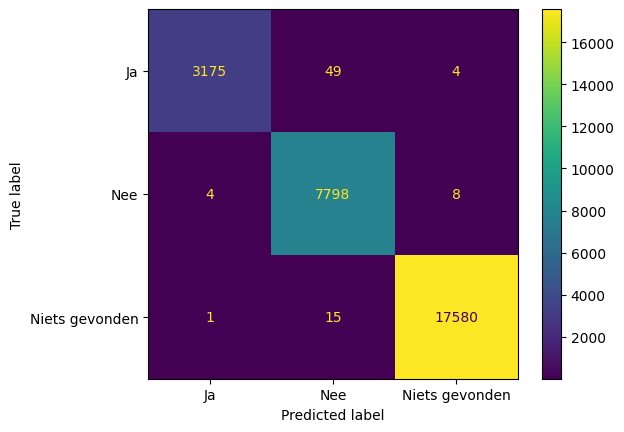

                precision    recall  f1-score   support

            Ja       1.00      0.98      0.99      3228
           Nee       0.99      1.00      1.00      7810
Niets gevonden       1.00      1.00      1.00     17596

      accuracy                           1.00     28634
     macro avg       1.00      0.99      1.00     28634
  weighted avg       1.00      1.00      1.00     28634



In [33]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

In [34]:
from pickle import dump

dump(random_search, open('best_models/best_drinking_ex1.pkl', 'wb'))